In [1]:
image_path = '/Users/aichah/Desktop/TLI/data/test_lifetime/seg_1_211104_P36_N1_GFP.tif'
##you either run the stable_branch func or you define the path for stable neuron
stable_path = '/Users/aichah/Desktop/TLI/data/test_lifetime/stable_seg_1_211104_P36_N1_GFP.tif'
# cols_path = '/home/tli_project/Desktop/Data/T4/stage1/211121/211121_P3630_N1/211104_neuron1_rot(-15)_Cols.tif'
save_path = '/'

save_name = '211104_P36_N1_stable2.tif'

##
start_age = 36
stab_limit = 4 #(No. of timepoints for stable branches calculation)
nor_fact = 1 #this is for normalizing Col_occpancy. for now there is no other option, like neuron max

if save_path[-1] != '/':
    save_path += '/'

In [2]:
#imports
import utils.analysis as analysis
import matplotlib.pyplot as plt
import tifffile as tif
import numpy as np
from tqdm import tqdm

In [3]:
neuron = tif.imread(image_path)
# Cols = tif.imread(cols_path)
## you might want to subset either neuron, Columns or both


In [4]:
# run this if you already calculated stable_neuron
# stable_n = tif.imread(stable_path)

In [5]:
# neuron.shape, Cols.shape

In [6]:
# run this if you did not calculate stable neuron yet
# old function (slow)
# stable_n = analysis.stable_branch(neuron, stab_limit=stab_limit, save=True, 
#                                         save_path=save_path, save_file=save_name, 
#                                         xy_pixel=0.076, z_pixel=0.4)

In [8]:
stable_n = analysis.stable_px(neuron, 
                            st_limit = 4, 
                            save=False, 
                            save_path=save_path, 
                            save_file=save_name, 
                            xy_pixel=0.076, 
                            z_pixel=0.4)

In [9]:
lifetimes = analysis.px_lifetimes(neuron)

In [4]:
# img_PC = analysis._4D_to_PC(neuron)
img_PC = np.argwhere(neuron==1)

In [5]:
img_PC[:5]

array([[  0,   0, 206, 176],
       [  0,   0, 206, 177],
       [  0,   0, 206, 178],
       [  0,   0, 207, 177],
       [  0,   0, 207, 178]])

In [16]:
test = img_PC[:5]
result = []
for px in tqdm(test):
    t_con = test[:,0]==px[0]
    z_con = (test[:,1]<px[1]+2) & (test[:,1]>px[1]-2)
    compare = test[t_con & z_con]
    compare_dist = compare - px
    compare_len = np.linalg.norm(compare_dist, axis=1)
    compare_len[compare_len == 0] = float('inf')
    ind = np.argwhere(compare_len == compare_len.min())
    closest = test[ind]
    result.append([px, closest, compare_len.min()])

    # print(type(compare_len), compare_len[:5])

100%|██████████| 5/5 [00:00<00:00, 4121.76it/s]


In [1]:
closest

NameError: name 'closest' is not defined

In [26]:
ind

array([[2],
       [3]])

In [10]:
test = img_PC[img_PC[:,0] == 6]
result = []
for px in tqdm(test):
    t_con = test[:,0]==px[0]
    z_con = (test[:,1]<px[1]+2) & (test[:,1]>px[1]-2)
    compare = test[t_con & z_con]
    compare_dist = compare - px
    compare_len = np.linalg.norm(compare_dist, axis=1)
    print(type(compare_len), compare_len[:5])

  0%|          | 75/175512 [00:00<07:52, 371.00it/s]

<class 'numpy.ndarray'> [0.         2.23606798 1.41421356 1.         1.41421356]
<class 'numpy.ndarray'> [2.23606798 0.         1.         2.         3.        ]
<class 'numpy.ndarray'> [1.41421356 1.         0.         1.         2.        ]
<class 'numpy.ndarray'> [1. 2. 1. 0. 1.]
<class 'numpy.ndarray'> [1.41421356 3.         2.         1.         0.        ]
<class 'numpy.ndarray'> [3.60555128 1.41421356 2.23606798 3.16227766 4.12310563]
<class 'numpy.ndarray'> [2.82842712 1.         1.41421356 2.23606798 3.16227766]
<class 'numpy.ndarray'> [2.23606798 1.41421356 1.         1.41421356 2.23606798]
<class 'numpy.ndarray'> [2.         2.23606798 1.41421356 1.         1.41421356]
<class 'numpy.ndarray'> [2.23606798 3.16227766 2.23606798 1.41421356 1.        ]
<class 'numpy.ndarray'> [2.82842712 4.12310563 3.16227766 2.23606798 1.41421356]
<class 'numpy.ndarray'> [3.60555128 5.09901951 4.12310563 3.16227766 2.23606798]
<class 'numpy.ndarray'> [4.24264069 2.23606798 2.82842712 3.60555128

  0%|          | 158/175512 [00:00<07:19, 398.84it/s]

<class 'numpy.ndarray'> [3.31662479 1.41421356 2.23606798 3.16227766 4.12310563]
<class 'numpy.ndarray'> [2.44948974 1.         1.41421356 2.23606798 3.16227766]
<class 'numpy.ndarray'> [1.73205081 1.41421356 1.         1.41421356 2.23606798]
<class 'numpy.ndarray'> [1.41421356 2.23606798 1.41421356 1.         1.41421356]
<class 'numpy.ndarray'> [1.73205081 3.16227766 2.23606798 1.41421356 1.        ]
<class 'numpy.ndarray'> [2.44948974 4.12310563 3.16227766 2.23606798 1.41421356]
<class 'numpy.ndarray'> [3.31662479 5.09901951 4.12310563 3.16227766 2.23606798]
<class 'numpy.ndarray'> [5.47722558 3.31662479 4.24264069 5.19615242 6.164414  ]
<class 'numpy.ndarray'> [4.58257569 2.44948974 3.31662479 4.24264069 5.19615242]
<class 'numpy.ndarray'> [3.74165739 1.73205081 2.44948974 3.31662479 4.24264069]
<class 'numpy.ndarray'> [3.         1.41421356 1.73205081 2.44948974 3.31662479]
<class 'numpy.ndarray'> [2.44948974 1.73205081 1.41421356 1.73205081 2.44948974]
<class 'numpy.ndarray'> [2.2

  0%|          | 252/175512 [00:00<06:39, 438.64it/s]

<class 'numpy.ndarray'> [12.84523258 13.49073756 12.76714533 12.08304597 11.44552314]
<class 'numpy.ndarray'> [13.49073756 14.24780685 13.49073756 12.76714533 12.08304597]
<class 'numpy.ndarray'> [13.07669683 13.49073756 12.84523258 12.24744871 11.70469991]
<class 'numpy.ndarray'> [13.6381817  14.17744688 13.49073756 12.84523258 12.24744871]
<class 'numpy.ndarray'> [14.24780685 14.89966443 14.17744688 13.49073756 12.84523258]
<class 'numpy.ndarray'> [13.45362405 13.6381817  13.07669683 12.56980509 12.12435565]
<class 'numpy.ndarray'> [13.92838828 14.24780685 13.6381817  13.07669683 12.56980509]
<class 'numpy.ndarray'> [14.45683229 14.89966443 14.24780685 13.6381817  13.07669683]
<class 'numpy.ndarray'> [15.03329638 15.58845727 14.89966443 14.24780685 13.6381817 ]
<class 'numpy.ndarray'> [15.65247584 16.30950643 15.58845727 14.89966443 14.24780685]
<class 'numpy.ndarray'> [13.96424004 13.92838828 13.45362405 13.03840481 12.68857754]
<class 'numpy.ndarray'> [14.35270009 14.45683229 13.92

  0%|          | 346/175512 [00:00<06:25, 454.27it/s]

<class 'numpy.ndarray'> [75.96709814 77.62731478 76.66159404 75.69676347 74.73285757]
<class 'numpy.ndarray'> [76.92853827 78.59389289 77.62731478 76.66159404 75.69676347]
<class 'numpy.ndarray'> [77.89094941 79.56129712 78.59389289 77.62731478 76.66159404]
<class 'numpy.ndarray'> [78.85429601 80.5294977  79.56129712 78.59389289 77.62731478]
<class 'numpy.ndarray'> [84.65222974 86.3539229  85.38149682 84.40971508 83.43860018]
<class 'numpy.ndarray'> [85.62125904 87.32697178 86.3539229  85.38149682 84.40971508]
<class 'numpy.ndarray'> [69.57729515 71.1758386  70.22107946 69.26759704 68.31544481]
<class 'numpy.ndarray'> [70.52659073 72.13182377 71.1758386  70.22107946 69.26759704]
<class 'numpy.ndarray'> [71.47726911 73.08898686 72.13182377 71.1758386  70.22107946]
<class 'numpy.ndarray'> [72.42927585 74.04728219 73.08898686 72.13182377 71.1758386 ]
<class 'numpy.ndarray'> [73.38255924 75.00666637 74.04728219 73.08898686 72.13182377]
<class 'numpy.ndarray'> [74.33707016 75.96709814 75.00

  0%|          | 392/175512 [00:00<06:24, 455.76it/s]

<class 'numpy.ndarray'> [68.82586723 69.89992847 69.07242576 68.24954212 67.43144667]
<class 'numpy.ndarray'> [41.06093034 40.06245125 39.06404997 43.11612227 42.11887938]
<class 'numpy.ndarray'> [42.05948169 41.06093034 40.06245125 44.11349    43.11612227]
<class 'numpy.ndarray'> [43.05810028 42.05948169 41.06093034 45.11097427 44.11349   ]
<class 'numpy.ndarray'> [41.02438299 40.02499219 39.0256326  43.05810028 42.05948169]
<class 'numpy.ndarray'> [42.02380278 41.02438299 40.02499219 44.05678154 43.05810028]
<class 'numpy.ndarray'> [43.02324953 42.02380278 41.02438299 45.0555213  44.05678154]
<class 'numpy.ndarray'> [44.02272141 43.02324953 42.02380278 46.05431576 45.0555213 ]
<class 'numpy.ndarray'> [1.41421356 2.23606798 3.16227766 1.73205081 1.41421356]
<class 'numpy.ndarray'> [1.         1.41421356 2.23606798 2.44948974 1.73205081]
<class 'numpy.ndarray'> [1.41421356 1.         1.41421356 3.31662479 2.44948974]
<class 'numpy.ndarray'> [2.23606798 1.41421356 1.         4.24264069 

  0%|          | 483/175512 [00:01<06:34, 444.04it/s]

<class 'numpy.ndarray'> [12.56980509 11.70469991 10.86278049 13.96424004 13.03840481]
<class 'numpy.ndarray'> [7.68114575 8.1240384  8.66025404 6.164414   6.40312424]
<class 'numpy.ndarray'> [7.34846923 7.68114575 8.1240384  6.08276253 6.164414  ]
<class 'numpy.ndarray'> [7.14142843 7.34846923 7.68114575 6.164414   6.08276253]
<class 'numpy.ndarray'> [7.07106781 7.14142843 7.34846923 6.40312424 6.164414  ]
<class 'numpy.ndarray'> [7.14142843 7.07106781 7.14142843 6.78232998 6.40312424]
<class 'numpy.ndarray'> [7.34846923 7.14142843 7.07106781 7.28010989 6.78232998]
<class 'numpy.ndarray'> [7.68114575 7.34846923 7.14142843 7.87400787 7.28010989]
<class 'numpy.ndarray'> [8.1240384  7.68114575 7.34846923 8.54400375 7.87400787]
<class 'numpy.ndarray'> [8.66025404 8.1240384  7.68114575 9.2736185  8.54400375]
<class 'numpy.ndarray'> [ 9.2736185   8.66025404  8.1240384  10.04987562  9.2736185 ]
<class 'numpy.ndarray'> [ 9.94987437  9.2736185   8.66025404 10.86278049 10.04987562]
<class 'numpy

  0%|          | 574/175512 [00:01<06:31, 447.18it/s]

<class 'numpy.ndarray'> [12.68857754 12.40967365 12.20655562 12.56980509 12.12435565]
<class 'numpy.ndarray'> [13.03840481 12.68857754 12.40967365 13.07669683 12.56980509]
<class 'numpy.ndarray'> [13.45362405 13.03840481 12.68857754 13.6381817  13.07669683]
<class 'numpy.ndarray'> [13.92838828 13.45362405 13.03840481 14.24780685 13.6381817 ]
<class 'numpy.ndarray'> [14.45683229 13.92838828 13.45362405 14.89966443 14.24780685]
<class 'numpy.ndarray'> [15.03329638 14.45683229 13.92838828 15.58845727 14.89966443]
<class 'numpy.ndarray'> [15.65247584 15.03329638 14.45683229 16.30950643 15.58845727]
<class 'numpy.ndarray'> [16.30950643 15.65247584 15.03329638 17.05872211 16.30950643]
<class 'numpy.ndarray'> [17.         16.30950643 15.65247584 17.8325545  17.05872211]
<class 'numpy.ndarray'> [17.72004515 17.         16.30950643 18.62793601 17.8325545 ]
<class 'numpy.ndarray'> [13.96424004 14.35270009 14.79864859 12.40967365 12.68857754]
<class 'numpy.ndarray'> [13.6381817  13.96424004 14.35

  0%|          | 665/175512 [00:01<06:31, 446.62it/s]

<class 'numpy.ndarray'> [21.65640783 21.11871208 20.61552813 22.04540769 21.42428529]
<class 'numpy.ndarray'> [22.22611077 21.65640783 21.11871208 22.69361144 22.04540769]
<class 'numpy.ndarray'> [72.28416147 71.31619732 70.34912935 73.98648525 73.01369735]
<class 'numpy.ndarray'> [73.25298629 72.28416147 71.31619732 74.95998933 73.98648525]
<class 'numpy.ndarray'> [74.22263806 73.25298629 72.28416147 75.93418203 74.95998933]
<class 'numpy.ndarray'> [75.19308479 74.22263806 73.25298629 76.90903718 75.93418203]
<class 'numpy.ndarray'> [76.1642961  75.19308479 74.22263806 77.88452991 76.90903718]
<class 'numpy.ndarray'> [77.1362431  76.1642961  75.19308479 78.86063657 77.88452991]
<class 'numpy.ndarray'> [78.10889834 77.1362431  76.1642961  79.83733462 78.86063657]
<class 'numpy.ndarray'> [79.08223568 78.10889834 77.1362431  80.81460264 79.83733462]
<class 'numpy.ndarray'> [80.05623024 79.08223568 78.10889834 81.79242019 80.81460264]
<class 'numpy.ndarray'> [81.03085832 80.05623024 79.08

  0%|          | 756/175512 [00:01<06:32, 445.58it/s]

<class 'numpy.ndarray'> [74.33707016 73.38255924 72.42927585 75.96709814 75.00666637]
<class 'numpy.ndarray'> [75.29276194 74.33707016 73.38255924 76.92853827 75.96709814]
<class 'numpy.ndarray'> [76.24959016 75.29276194 74.33707016 77.89094941 76.92853827]
<class 'numpy.ndarray'> [77.20751259 76.24959016 75.29276194 78.85429601 77.89094941]
<class 'numpy.ndarray'> [78.16648898 77.20751259 76.24959016 79.81854421 78.85429601]
<class 'numpy.ndarray'> [79.12648103 78.16648898 77.20751259 80.78366171 79.81854421]
<class 'numpy.ndarray'> [80.0874522  79.12648103 78.16648898 81.74961774 80.78366171]
<class 'numpy.ndarray'> [81.04936767 80.0874522  79.12648103 82.7163829  81.74961774]
<class 'numpy.ndarray'> [82.01219422 81.04936767 80.0874522  83.68392916 82.7163829 ]
<class 'numpy.ndarray'> [82.97590012 82.01219422 81.04936767 84.65222974 83.68392916]
<class 'numpy.ndarray'> [83.94045509 82.97590012 82.01219422 85.62125904 84.65222974]
<class 'numpy.ndarray'> [84.90583019 83.94045509 82.97

  0%|          | 849/175512 [00:01<06:27, 451.14it/s]

<class 'numpy.ndarray'> [84.12490713 83.17451533 82.22530024 85.732141   84.7761759 ]
<class 'numpy.ndarray'> [85.07643622 84.12490713 83.17451533 86.68909966 85.732141  ]
<class 'numpy.ndarray'> [86.02906486 85.07643622 84.12490713 87.64701934 86.68909966]
<class 'numpy.ndarray'> [86.98275691 86.02906486 85.07643622 88.60586888 87.64701934]
<class 'numpy.ndarray'> [87.93747779 86.98275691 86.02906486 89.5656184  88.60586888]
<class 'numpy.ndarray'> [88.89319434 87.93747779 86.98275691 90.52623929 89.5656184 ]
<class 'numpy.ndarray'> [89.84987479 88.89319434 87.93747779 91.48770409 90.52623929]
<class 'numpy.ndarray'> [90.80748868 89.84987479 88.89319434 92.44998648 91.48770409]
<class 'numpy.ndarray'> [91.76600678 90.80748868 89.84987479 93.41306119 92.44998648]
<class 'numpy.ndarray'> [92.72540105 91.76600678 90.80748868 94.37690395 93.41306119]
<class 'numpy.ndarray'> [45.81484476 45.01110974 44.21538194 46.88283268 46.05431576]
<class 'numpy.ndarray'> [46.62617291 45.81484476 45.01

  1%|          | 942/175512 [00:02<06:29, 448.20it/s]

<class 'numpy.ndarray'> [91.71150419 90.76342876 89.81647956 93.30594836 92.35258524]
<class 'numpy.ndarray'> [92.66067127 91.71150419 90.76342876 94.26027795 93.30594836]
<class 'numpy.ndarray'> [93.6108968  92.66067127 91.71150419 95.21554495 94.26027795]
<class 'numpy.ndarray'> [48.42520005 47.644517   46.87216658 49.4165964  48.61069841]
<class 'numpy.ndarray'> [49.2138192  48.42520005 47.644517   50.22947342 49.4165964 ]
<class 'numpy.ndarray'> [50.009999   49.2138192  48.42520005 51.04899607 50.22947342]
<class 'numpy.ndarray'> [50.81338406 50.009999   49.2138192  51.8748494  51.04899607]
<class 'numpy.ndarray'> [51.623638   50.81338406 50.009999   52.70673581 51.8748494 ]
<class 'numpy.ndarray'> [52.44044241 51.623638   50.81338406 53.54437412 52.70673581]
<class 'numpy.ndarray'> [53.26349594 52.44044241 51.623638   54.38749856 53.54437412]
<class 'numpy.ndarray'> [54.09251335 53.26349594 52.44044241 55.23585792 54.38749856]
<class 'numpy.ndarray'> [54.92722458 54.09251335 53.26

  1%|          | 1034/175512 [00:02<06:34, 442.59it/s]

<class 'numpy.ndarray'> [66.03786792 65.22269544 64.41273166 67.12674579 66.29479618]
<class 'numpy.ndarray'> [66.8580586  66.03786792 65.22269544 67.96322535 67.12674579]
<class 'numpy.ndarray'> [67.68308504 66.8580586  66.03786792 68.80406965 67.96322535]
<class 'numpy.ndarray'> [68.51277253 67.68308504 66.8580586  69.6491206  68.80406965]
<class 'numpy.ndarray'> [64.21059103 63.41923998 62.63385666 65.22269544 64.41273166]
<class 'numpy.ndarray'> [65.00769185 64.21059103 63.41923998 66.03786792 65.22269544]
<class 'numpy.ndarray'> [65.81033354 65.00769185 64.21059103 66.8580586  66.03786792]
<class 'numpy.ndarray'> [66.6183158  65.81033354 65.00769185 67.68308504 66.8580586 ]
<class 'numpy.ndarray'> [67.43144667 66.6183158  65.81033354 68.51277253 67.68308504]
<class 'numpy.ndarray'> [68.24954212 67.43144667 66.6183158  69.34695379 68.51277253]
<class 'numpy.ndarray'> [69.07242576 68.24954212 67.43144667 70.18546858 69.34695379]
<class 'numpy.ndarray'> [69.89992847 69.07242576 68.24

  1%|          | 1123/175512 [00:02<06:43, 432.41it/s]

<class 'numpy.ndarray'> [4.58257569 3.74165739 3.         4.24264069 3.31662479]
<class 'numpy.ndarray'> [5.47722558 4.58257569 3.74165739 5.19615242 4.24264069]
<class 'numpy.ndarray'> [6.40312424 5.47722558 4.58257569 6.164414   5.19615242]
<class 'numpy.ndarray'> [7.34846923 6.40312424 5.47722558 7.14142843 6.164414  ]
<class 'numpy.ndarray'> [8.30662386 7.34846923 6.40312424 8.1240384  7.14142843]
<class 'numpy.ndarray'> [9.2736185  8.30662386 7.34846923 9.11043358 8.1240384 ]
<class 'numpy.ndarray'> [10.24695077  9.2736185   8.30662386 10.09950494  9.11043358]
<class 'numpy.ndarray'> [11.22497216 10.24695077  9.2736185  11.09053651 10.09950494]
<class 'numpy.ndarray'> [44.11349    45.11097427 46.10856753 44.05678154 45.0555213 ]
<class 'numpy.ndarray'> [43.11612227 44.11349    45.11097427 43.05810028 44.05678154]
<class 'numpy.ndarray'> [42.11887938 43.11612227 44.11349    42.05948169 43.05810028]
<class 'numpy.ndarray'> [41.12177039 42.11887938 43.11612227 41.06093034 42.05948169

  1%|          | 1167/175512 [00:02<06:45, 430.34it/s]

<class 'numpy.ndarray'> [43.57751714 44.56455991 45.5521679  43.4281015  44.41846463]
<class 'numpy.ndarray'> [42.59107888 43.57751714 44.56455991 42.43819035 43.4281015 ]
<class 'numpy.ndarray'> [41.60528813 42.59107888 43.57751714 41.44876355 42.43819035]
<class 'numpy.ndarray'> [40.62019202 41.60528813 42.59107888 40.45985665 41.44876355]
<class 'numpy.ndarray'> [39.63584237 40.62019202 41.60528813 39.47150871 40.45985665]
<class 'numpy.ndarray'> [38.65229618 39.63584237 40.62019202 38.48376281 39.47150871]
<class 'numpy.ndarray'> [37.6696164  38.65229618 39.63584237 37.49666652 38.48376281]
<class 'numpy.ndarray'> [36.68787266 37.6696164  38.65229618 36.51027253 37.49666652]
<class 'numpy.ndarray'> [35.70714214 36.68787266 37.6696164  35.52463934 36.51027253]
<class 'numpy.ndarray'> [34.72751071 35.70714214 36.68787266 34.53983208 35.52463934]
<class 'numpy.ndarray'> [33.74907406 34.72751071 35.70714214 33.55592347 34.53983208]
<class 'numpy.ndarray'> [32.77193922 33.74907406 34.72

  1%|          | 1250/175512 [00:02<08:03, 360.49it/s]

<class 'numpy.ndarray'> [41.24318125 42.21374184 43.18564576 41.01219331 41.98809355]
<class 'numpy.ndarray'> [40.27406113 41.24318125 42.21374184 40.03748244 41.01219331]
<class 'numpy.ndarray'> [39.30648801 40.27406113 41.24318125 39.06404997 40.03748244]
<class 'numpy.ndarray'> [38.34057903 39.30648801 40.27406113 38.09199391 39.06404997]
<class 'numpy.ndarray'> [37.37646318 38.34057903 39.30648801 37.12142239 38.09199391]
<class 'numpy.ndarray'> [36.41428291 37.37646318 38.34057903 36.15245497 37.12142239]
<class 'numpy.ndarray'> [35.4541958  36.41428291 37.37646318 35.18522417 36.15245497]
<class 'numpy.ndarray'> [34.49637662 35.4541958  36.41428291 34.21987726 35.18522417]
<class 'numpy.ndarray'> [33.54101966 34.49637662 35.4541958  33.2565783  34.21987726]
<class 'numpy.ndarray'> [32.58834147 33.54101966 34.49637662 32.29551052 33.2565783 ]
<class 'numpy.ndarray'> [31.63858404 32.58834147 33.54101966 31.33687923 32.29551052]
<class 'numpy.ndarray'> [30.69201851 31.63858404 32.58

  1%|          | 1329/175512 [00:03<07:47, 372.96it/s]

<class 'numpy.ndarray'> [29.9833287  30.88689042 31.79622619 29.563491   30.47950131]
<class 'numpy.ndarray'> [29.08607914 29.9833287  30.88689042 28.65309756 29.563491  ]
<class 'numpy.ndarray'> [28.19574436 29.08607914 29.9833287  27.74887385 28.65309756]
<class 'numpy.ndarray'> [49.05099387 50.009999   50.97057975 48.77499359 49.73932046]
<class 'numpy.ndarray'> [48.09365863 49.05099387 50.009999   47.81213235 48.77499359]
<class 'numpy.ndarray'> [47.138095   48.09365863 49.05099387 46.8508271  47.81213235]
<class 'numpy.ndarray'> [46.18441296 47.138095   48.09365863 45.89117562 46.8508271 ]
<class 'numpy.ndarray'> [45.23273151 46.18441296 47.138095   44.93328388 45.89117562]
<class 'numpy.ndarray'> [44.28317965 45.23273151 46.18441296 43.97726685 44.93328388]
<class 'numpy.ndarray'> [43.33589736 44.28317965 45.23273151 43.02324953 43.97726685]
<class 'numpy.ndarray'> [42.39103679 43.33589736 44.28317965 42.07136794 43.02324953]
<class 'numpy.ndarray'> [41.44876355 42.39103679 43.33

  1%|          | 1416/175512 [00:03<07:15, 399.55it/s]

<class 'numpy.ndarray'> [39.8246155  40.73082371 41.64132563 39.40812099 40.32369031]
<class 'numpy.ndarray'> [38.92300091 39.8246155  40.73082371 38.49675311 39.40812099]
<class 'numpy.ndarray'> [38.02630668 38.92300091 39.8246155  37.58989226 38.49675311]
<class 'numpy.ndarray'> [37.13488926 38.02630668 38.92300091 36.68787266 37.58989226]
<class 'numpy.ndarray'> [36.24913792 37.13488926 38.02630668 35.79106034 36.68787266]
<class 'numpy.ndarray'> [35.36947837 36.24913792 37.13488926 34.89985673 35.79106034]
<class 'numpy.ndarray'> [34.49637662 35.36947837 36.24913792 34.0147027  34.89985673]
<class 'numpy.ndarray'> [33.63034344 34.49637662 35.36947837 33.13608305 34.0147027 ]
<class 'numpy.ndarray'> [32.77193922 33.63034344 34.49637662 32.26453161 33.13608305]
<class 'numpy.ndarray'> [31.9217794  32.77193922 33.63034344 31.40063694 32.26453161]
<class 'numpy.ndarray'> [17.1464282  17.05872211 17.02938637 16.15549442 16.0623784 ]
<class 'numpy.ndarray'> [17.29161647 17.1464282  17.05

  1%|          | 1502/175512 [00:03<07:01, 413.07it/s]

<class 'numpy.ndarray'> [40.32369031 39.45883931 38.60051813 39.83716857 38.96151948]
<class 'numpy.ndarray'> [41.19465985 40.32369031 39.45883931 40.71854614 39.83716857]
<class 'numpy.ndarray'> [42.07136794 41.19465985 40.32369031 41.60528813 40.71854614]
<class 'numpy.ndarray'> [42.95346319 42.07136794 41.19465985 42.49705872 41.60528813]
<class 'numpy.ndarray'> [43.84062043 42.95346319 42.07136794 43.39354791 42.49705872]
<class 'numpy.ndarray'> [44.73253849 43.84062043 42.95346319 44.29446918 43.39354791]
<class 'numpy.ndarray'> [45.62893819 44.73253849 43.84062043 45.19955752 44.29446918]
<class 'numpy.ndarray'> [41.68932717 42.55584566 43.4281015  41.19465985 42.07136794]
<class 'numpy.ndarray'> [40.82891133 41.68932717 42.55584566 40.32369031 41.19465985]
<class 'numpy.ndarray'> [39.97499218 40.82891133 41.68932717 39.45883931 40.32369031]
<class 'numpy.ndarray'> [39.12799509 39.97499218 40.82891133 38.60051813 39.45883931]
<class 'numpy.ndarray'> [38.28837944 39.12799509 39.97

  1%|          | 1589/175512 [00:03<06:52, 421.86it/s]

<class 'numpy.ndarray'> [35.48239    34.72751071 33.98529094 34.84250278 34.07345007]
<class 'numpy.ndarray'> [36.24913792 35.48239    34.72751071 35.62302626 34.84250278]
<class 'numpy.ndarray'> [37.02701716 36.24913792 35.48239    36.41428291 35.62302626]
<class 'numpy.ndarray'> [37.8153408  37.02701716 36.24913792 37.21558813 36.41428291]
<class 'numpy.ndarray'> [38.61346915 37.8153408  37.02701716 38.02630668 37.21558813]
<class 'numpy.ndarray'> [39.42080669 38.61346915 37.8153408  38.8458492  38.02630668]
<class 'numpy.ndarray'> [40.23679908 39.42080669 38.61346915 39.67366885 38.8458492 ]
<class 'numpy.ndarray'> [41.06093034 40.23679908 39.42080669 40.5092582  39.67366885]
<class 'numpy.ndarray'> [41.89272013 41.06093034 40.23679908 41.35214626 40.5092582 ]
<class 'numpy.ndarray'> [42.73172124 41.89272013 41.06093034 42.20189569 41.35214626]
<class 'numpy.ndarray'> [43.57751714 42.73172124 41.89272013 43.05810028 42.20189569]
<class 'numpy.ndarray'> [44.42971978 43.57751714 42.73

  1%|          | 1679/175512 [00:03<06:42, 431.96it/s]

<class 'numpy.ndarray'> [40.47221269 41.24318125 42.02380278 39.83716857 40.62019202]
<class 'numpy.ndarray'> [39.7114593  40.47221269 41.24318125 39.06404997 39.83716857]
<class 'numpy.ndarray'> [38.96151948 39.7114593  40.47221269 38.301436   39.06404997]
<class 'numpy.ndarray'> [38.22302971 38.96151948 39.7114593  37.54996671 38.301436  ]
<class 'numpy.ndarray'> [37.49666652 38.22302971 38.96151948 36.81032464 37.54996671]
<class 'numpy.ndarray'> [34.72751071 34.07345007 33.43650699 33.98529094 33.3166625 ]
<class 'numpy.ndarray'> [35.39774004 34.72751071 34.07345007 34.66987165 33.98529094]
<class 'numpy.ndarray'> [36.08323711 35.39774004 34.72751071 35.36947837 34.66987165]
<class 'numpy.ndarray'> [36.78314832 36.08323711 35.39774004 36.08323711 35.36947837]
<class 'numpy.ndarray'> [37.49666652 36.78314832 36.08323711 36.81032464 36.08323711]
<class 'numpy.ndarray'> [38.22302971 37.49666652 36.78314832 37.54996671 36.81032464]
<class 'numpy.ndarray'> [38.96151948 38.22302971 37.49

  1%|          | 1767/175512 [00:04<06:43, 430.85it/s]

<class 'numpy.ndarray'> [50.48762225 49.65883607 48.83646179 49.93996396 49.10193479]
<class 'numpy.ndarray'> [51.32250968 50.48762225 49.65883607 50.7838557  49.93996396]
<class 'numpy.ndarray'> [52.16320542 51.32250968 50.48762225 51.63332257 50.7838557 ]
<class 'numpy.ndarray'> [53.00943312 52.16320542 51.32250968 52.48809389 51.63332257]
<class 'numpy.ndarray'> [53.86093204 53.00943312 52.16320542 53.34791467 52.48809389]
<class 'numpy.ndarray'> [54.71745608 53.86093204 53.00943312 54.21254467 53.34791467]
<class 'numpy.ndarray'> [55.57877293 54.71745608 53.86093204 55.08175742 54.21254467]
<class 'numpy.ndarray'> [56.44466317 55.57877293 54.71745608 55.95533933 55.08175742]
<class 'numpy.ndarray'> [57.31491952 56.44466317 55.57877293 56.83308895 55.95533933]
<class 'numpy.ndarray'> [58.1893461  57.31491952 56.44466317 57.71481612 56.83308895]
<class 'numpy.ndarray'> [59.0677577  58.1893461  57.31491952 58.6003413  57.71481612]
<class 'numpy.ndarray'> [59.94997915 59.0677577  58.18

  1%|          | 1855/175512 [00:04<06:46, 427.22it/s]

<class 'numpy.ndarray'> [54.92722458 54.09251335 53.26349594 54.38749856 53.54437412]
<class 'numpy.ndarray'> [55.76737397 54.92722458 54.09251335 55.23585792 54.38749856]
<class 'numpy.ndarray'> [56.61271942 55.76737397 54.92722458 56.08921465 55.23585792]
<class 'numpy.ndarray'> [57.46303159 56.61271942 55.76737397 56.9473441  56.08921465]
<class 'numpy.ndarray'> [58.31809325 57.46303159 56.61271942 57.81003373 56.9473441 ]
<class 'numpy.ndarray'> [59.1776985  58.31809325 57.46303159 58.67708241 57.81003373]
<class 'numpy.ndarray'> [60.04165221 59.1776985  58.31809325 59.54829972 58.67708241]
<class 'numpy.ndarray'> [60.90976933 60.04165221 59.1776985  60.42350536 59.54829972]
<class 'numpy.ndarray'> [31.591138   31.79622619 32.03123476 30.61045573 30.82207001]
<class 'numpy.ndarray'> [31.41655614 31.591138   31.79622619 30.43024811 30.61045573]
<class 'numpy.ndarray'> [31.27299154 31.41655614 31.591138   30.28200786 30.43024811]
<class 'numpy.ndarray'> [31.1608729  31.27299154 31.41

  1%|          | 1940/175512 [00:04<06:58, 414.47it/s]

<class 'numpy.ndarray'> [45.97825573 45.26588119 44.56455991 45.2879675  44.56455991]
<class 'numpy.ndarray'> [46.70117772 45.97825573 45.26588119 46.021734   45.2879675 ]
<class 'numpy.ndarray'> [47.4341649  46.70117772 45.97825573 46.7653718  46.021734  ]
<class 'numpy.ndarray'> [48.17675788 47.4341649  46.70117772 47.51841748 46.7653718 ]
<class 'numpy.ndarray'> [48.92851929 48.17675788 47.4341649  48.28043082 47.51841748]
<class 'numpy.ndarray'> [49.689033   48.92851929 48.17675788 49.05099387 48.28043082]
<class 'numpy.ndarray'> [50.45790325 49.689033   48.92851929 49.82971001 49.05099387]
<class 'numpy.ndarray'> [51.23475383 50.45790325 49.689033   50.61620294 49.82971001]
<class 'numpy.ndarray'> [52.01922721 51.23475383 50.45790325 51.41011574 50.61620294]
<class 'numpy.ndarray'> [52.81098371 52.01922721 51.23475383 52.21110993 51.41011574]
<class 'numpy.ndarray'> [53.60970061 52.81098371 52.01922721 53.01886457 52.21110993]
<class 'numpy.ndarray'> [54.41507144 53.60970061 52.81

  1%|          | 2027/175512 [00:04<06:52, 420.92it/s]

<class 'numpy.ndarray'> [44.05678154 43.4281015  42.81354926 43.28972164 42.64973622]
<class 'numpy.ndarray'> [44.69899328 44.05678154 43.4281015  43.94314509 43.28972164]
<class 'numpy.ndarray'> [45.35416188 44.69899328 44.05678154 44.60941605 43.94314509]
<class 'numpy.ndarray'> [46.021734   45.35416188 44.69899328 45.2879675  44.60941605]
<class 'numpy.ndarray'> [46.70117772 46.021734   45.35416188 45.97825573 45.2879675 ]
<class 'numpy.ndarray'> [47.39198244 46.70117772 46.021734   46.67976007 45.97825573]
<class 'numpy.ndarray'> [51.         50.25932749 49.52776999 50.33885179 49.58830507]
<class 'numpy.ndarray'> [51.74939613 51.         50.25932749 51.09794516 50.33885179]
<class 'numpy.ndarray'> [52.50714237 51.74939613 51.         51.86520992 51.09794516]
<class 'numpy.ndarray'> [53.27288241 52.50714237 51.74939613 52.64028875 51.86520992]
<class 'numpy.ndarray'> [54.04627647 53.27288241 52.50714237 53.42284156 52.64028875]
<class 'numpy.ndarray'> [54.82700065 54.04627647 53.27

  1%|          | 2114/175512 [00:04<06:48, 424.24it/s]

<class 'numpy.ndarray'> [37.86819246 37.6696164  37.49666652 36.89173349 36.68787266]
<class 'numpy.ndarray'> [38.09199391 37.86819246 37.6696164  37.12142239 36.89173349]
<class 'numpy.ndarray'> [38.34057903 38.09199391 37.86819246 37.37646318 37.12142239]
<class 'numpy.ndarray'> [38.61346915 38.34057903 38.09199391 37.65634077 37.37646318]
<class 'numpy.ndarray'> [38.91015292 38.61346915 38.34057903 37.96050579 37.65634077]
<class 'numpy.ndarray'> [39.23009049 38.91015292 38.61346915 38.28837944 37.96050579]
<class 'numpy.ndarray'> [39.57271787 39.23009049 38.91015292 38.63935817 38.28837944]
<class 'numpy.ndarray'> [39.9374511  39.57271787 39.23009049 39.01281841 38.63935817]
<class 'numpy.ndarray'> [40.32369031 39.9374511  39.57271787 39.40812099 39.01281841]
<class 'numpy.ndarray'> [40.73082371 40.32369031 39.9374511  39.8246155  39.40812099]
<class 'numpy.ndarray'> [41.15823125 40.73082371 40.32369031 40.26164428 39.8246155 ]
<class 'numpy.ndarray'> [41.60528813 41.15823125 40.73

  1%|▏         | 2200/175512 [00:05<06:47, 425.07it/s]

<class 'numpy.ndarray'> [49.40647731 48.88762625 48.38388161 48.55924217 48.03123983]
<class 'numpy.ndarray'> [49.93996396 49.40647731 48.88762625 49.10193479 48.55924217]
<class 'numpy.ndarray'> [50.48762225 49.93996396 49.40647731 49.65883607 49.10193479]
<class 'numpy.ndarray'> [51.04899607 50.48762225 49.93996396 50.22947342 49.65883607]
<class 'numpy.ndarray'> [44.65422712 44.39594576 44.15880433 43.69210455 43.4281015 ]
<class 'numpy.ndarray'> [44.93328388 44.65422712 44.39594576 43.97726685 43.69210455]
<class 'numpy.ndarray'> [45.23273151 44.93328388 44.65422712 44.28317965 43.97726685]
<class 'numpy.ndarray'> [45.5521679  45.23273151 44.93328388 44.60941605 44.28317965]
<class 'numpy.ndarray'> [45.89117562 45.5521679  45.23273151 44.95553359 44.60941605]
<class 'numpy.ndarray'> [46.24932432 45.89117562 45.5521679  45.32107677 44.95553359]
<class 'numpy.ndarray'> [46.62617291 46.24932432 45.89117562 45.70557953 45.32107677]
<class 'numpy.ndarray'> [46.18441296 45.89117562 45.61

  1%|▏         | 2285/175512 [00:05<06:54, 417.65it/s]

<class 'numpy.ndarray'> [3.31662479 3.74165739 4.35889894 2.44948974 2.23606798]
<class 'numpy.ndarray'> [3.16227766 3.31662479 3.74165739 3.         2.44948974]
<class 'numpy.ndarray'> [3.31662479 3.16227766 3.31662479 3.74165739 3.        ]
<class 'numpy.ndarray'> [3.74165739 3.31662479 3.16227766 4.58257569 3.74165739]
<class 'numpy.ndarray'> [4.35889894 3.74165739 3.31662479 5.47722558 4.58257569]
<class 'numpy.ndarray'> [5.09901951 4.35889894 3.74165739 6.40312424 5.47722558]
<class 'numpy.ndarray'> [5.91607978 5.09901951 4.35889894 7.34846923 6.40312424]
<class 'numpy.ndarray'> [6.78232998 5.91607978 5.09901951 8.30662386 7.34846923]
<class 'numpy.ndarray'> [7.68114575 6.78232998 5.91607978 9.2736185  8.30662386]
<class 'numpy.ndarray'> [ 8.60232527  7.68114575  6.78232998 10.24695077  9.2736185 ]
<class 'numpy.ndarray'> [ 9.53939201  8.60232527  7.68114575 11.22497216 10.24695077]
<class 'numpy.ndarray'> [10.48808848  9.53939201  8.60232527 12.20655562 11.22497216]
<class 'numpy

  1%|▏         | 2369/175512 [00:05<06:58, 413.29it/s]

<class 'numpy.ndarray'> [31.591138   32.57299495 33.55592347 29.44486373 30.43024811]
<class 'numpy.ndarray'> [30.61045573 31.591138   32.57299495 28.46049894 29.44486373]
<class 'numpy.ndarray'> [6.08276253 6.164414   6.40312424 5.47722558 5.19615242]
<class 'numpy.ndarray'> [6.164414   6.08276253 6.164414   5.91607978 5.47722558]
<class 'numpy.ndarray'> [6.40312424 6.164414   6.08276253 6.4807407  5.91607978]
<class 'numpy.ndarray'> [6.78232998 6.40312424 6.164414   7.14142843 6.4807407 ]
<class 'numpy.ndarray'> [7.28010989 6.78232998 6.40312424 7.87400787 7.14142843]
<class 'numpy.ndarray'> [7.87400787 7.28010989 6.78232998 8.66025404 7.87400787]
<class 'numpy.ndarray'> [8.54400375 7.87400787 7.28010989 9.48683298 8.66025404]
<class 'numpy.ndarray'> [ 9.2736185   8.54400375  7.87400787 10.34408043  9.48683298]
<class 'numpy.ndarray'> [10.04987562  9.2736185   8.54400375 11.22497216 10.34408043]
<class 'numpy.ndarray'> [10.86278049 10.04987562  9.2736185  12.12435565 11.22497216]
<cl

  1%|▏         | 2453/175512 [00:05<07:02, 409.79it/s]

<class 'numpy.ndarray'> [34.21987726 35.18522417 36.15245497 32.03123476 33.        ]
<class 'numpy.ndarray'> [33.2565783  34.21987726 35.18522417 31.06444913 32.03123476]
<class 'numpy.ndarray'> [32.29551052 33.2565783  34.21987726 30.09983389 31.06444913]
<class 'numpy.ndarray'> [31.33687923 32.29551052 33.2565783  29.13760457 30.09983389]
<class 'numpy.ndarray'> [30.38091506 31.33687923 32.29551052 28.17800561 29.13760457]
<class 'numpy.ndarray'> [29.42787794 30.38091506 31.33687923 27.22131518 28.17800561]
<class 'numpy.ndarray'> [28.47806173 29.42787794 30.38091506 26.26785107 27.22131518]
<class 'numpy.ndarray'> [ 9.89949494  9.53939201  9.2736185  10.04987562  9.48683298]
<class 'numpy.ndarray'> [10.34408043  9.89949494  9.53939201 10.67707825 10.04987562]
<class 'numpy.ndarray'> [10.86278049 10.34408043  9.89949494 11.35781669 10.67707825]
<class 'numpy.ndarray'> [11.44552314 10.86278049 10.34408043 12.08304597 11.35781669]
<class 'numpy.ndarray'> [12.08304597 11.44552314 10.86

  1%|▏         | 2538/175512 [00:06<06:59, 412.30it/s]

<class 'numpy.ndarray'> [32.32645975 33.2565783  34.19064199 30.09983389 31.0322413 ]
<class 'numpy.ndarray'> [31.40063694 32.32645975 33.2565783  29.17190429 30.09983389]
<class 'numpy.ndarray'> [30.47950131 31.40063694 32.32645975 28.24889378 29.17190429]
<class 'numpy.ndarray'> [29.563491   30.47950131 31.40063694 27.33130074 28.24889378]
<class 'numpy.ndarray'> [28.65309756 29.563491   30.47950131 26.41968963 27.33130074]
<class 'numpy.ndarray'> [27.74887385 28.65309756 29.563491   25.51470164 26.41968963]
<class 'numpy.ndarray'> [26.85144316 27.74887385 28.65309756 24.61706725 25.51470164]
<class 'numpy.ndarray'> [12.68857754 12.40967365 12.20655562 12.56980509 12.12435565]
<class 'numpy.ndarray'> [13.03840481 12.68857754 12.40967365 13.07669683 12.56980509]
<class 'numpy.ndarray'> [13.45362405 13.03840481 12.68857754 13.6381817  13.07669683]
<class 'numpy.ndarray'> [46.8508271  47.81213235 48.77499359 44.65422712 45.61797891]
<class 'numpy.ndarray'> [45.89117562 46.8508271  47.81

  1%|▏         | 2622/175512 [00:06<06:59, 412.61it/s]

<class 'numpy.ndarray'> [31.78049716 32.66496594 33.55592347 29.54657341 30.43024811]
<class 'numpy.ndarray'> [30.90307428 31.78049716 32.66496594 28.67054237 29.54657341]
<class 'numpy.ndarray'> [30.03331484 30.90307428 31.78049716 27.80287755 28.67054237]
<class 'numpy.ndarray'> [29.17190429 30.03331484 30.90307428 26.94438717 27.80287755]
<class 'numpy.ndarray'> [28.31960452 29.17190429 30.03331484 26.0959767  26.94438717]
<class 'numpy.ndarray'> [27.47726333 28.31960452 29.17190429 25.25866188 26.0959767 ]
<class 'numpy.ndarray'> [26.64582519 27.47726333 28.31960452 24.43358345 25.25866188]
<class 'numpy.ndarray'> [15.06651917 15.03329638 15.06651917 14.35270009 14.17744688]
<class 'numpy.ndarray'> [15.16575089 15.06651917 15.03329638 14.59451952 14.35270009]
<class 'numpy.ndarray'> [15.32970972 15.16575089 15.06651917 14.89966443 14.59451952]
<class 'numpy.ndarray'> [15.55634919 15.32970972 15.16575089 15.26433752 14.89966443]
<class 'numpy.ndarray'> [15.84297952 15.55634919 15.32

  2%|▏         | 2706/175512 [00:06<07:01, 409.86it/s]

<class 'numpy.ndarray'> [41.15823125 42.05948169 42.96510212 38.92300091 39.8246155 ]
<class 'numpy.ndarray'> [40.26164428 41.15823125 42.05948169 38.02630668 38.92300091]
<class 'numpy.ndarray'> [39.37003937 40.26164428 41.15823125 37.13488926 38.02630668]
<class 'numpy.ndarray'> [38.48376281 39.37003937 40.26164428 36.24913792 37.13488926]
<class 'numpy.ndarray'> [37.60319135 38.48376281 39.37003937 35.36947837 36.24913792]
<class 'numpy.ndarray'> [36.72873534 37.60319135 38.48376281 34.49637662 35.36947837]
<class 'numpy.ndarray'> [35.86084215 36.72873534 37.60319135 33.63034344 34.49637662]
<class 'numpy.ndarray'> [35.         35.86084215 36.72873534 32.77193922 33.63034344]
<class 'numpy.ndarray'> [34.14674216 35.         35.86084215 31.9217794  32.77193922]
<class 'numpy.ndarray'> [33.30165161 34.14674216 35.         31.08054054 31.9217794 ]
<class 'numpy.ndarray'> [32.46536616 33.30165161 34.14674216 30.24896692 31.08054054]
<class 'numpy.ndarray'> [31.63858404 32.46536616 33.30

  2%|▏         | 2790/175512 [00:06<07:02, 409.27it/s]

<class 'numpy.ndarray'> [34.42382896 35.24202037 36.06937759 32.21800739 33.03028913]
<class 'numpy.ndarray'> [33.61547263 34.42382896 35.24202037 31.41655614 32.21800739]
<class 'numpy.ndarray'> [32.81767816 33.61547263 34.42382896 30.62678566 31.41655614]
<class 'numpy.ndarray'> [32.03123476 32.81767816 33.61547263 29.84962311 30.62678566]
<class 'numpy.ndarray'> [20.24845673 20.1246118  20.04993766 19.67231557 19.4422221 ]
<class 'numpy.ndarray'> [20.42057786 20.24845673 20.1246118  19.94993734 19.67231557]
<class 'numpy.ndarray'> [23.87467277 23.34523506 22.84731932 24.22808288 23.62202362]
<class 'numpy.ndarray'> [24.43358345 23.87467277 23.34523506 24.85960579 24.22808288]
<class 'numpy.ndarray'> [34.42382896 33.61547263 32.81767816 35.52463934 34.68429039]
<class 'numpy.ndarray'> [35.24202037 34.42382896 33.61547263 36.37306696 35.52463934]
<class 'numpy.ndarray'> [36.06937759 35.24202037 34.42382896 37.22902094 36.37306696]
<class 'numpy.ndarray'> [36.90528417 36.06937759 35.24

  2%|▏         | 2872/175512 [00:06<07:07, 404.30it/s]

<class 'numpy.ndarray'> [43.05810028 42.20189569 41.35214626 44.30575583 43.4281015 ]
<class 'numpy.ndarray'> [43.92038251 43.05810028 42.20189569 45.18849411 44.30575583]
<class 'numpy.ndarray'> [44.78839135 43.92038251 43.05810028 46.07602413 45.18849411]
<class 'numpy.ndarray'> [45.66180023 44.78839135 43.92038251 46.96807426 46.07602413]
<class 'numpy.ndarray'> [46.54030511 45.66180023 44.78839135 47.86439178 46.96807426]
<class 'numpy.ndarray'> [47.42362281 46.54030511 45.66180023 48.76474136 47.86439178]
<class 'numpy.ndarray'> [48.31148932 47.42362281 46.54030511 49.66890375 48.76474136]
<class 'numpy.ndarray'> [45.2879675  46.15192304 47.02127178 43.05810028 43.92038251]
<class 'numpy.ndarray'> [44.42971978 45.2879675  46.15192304 42.20189569 43.05810028]
<class 'numpy.ndarray'> [43.57751714 44.42971978 45.2879675  41.35214626 42.20189569]
<class 'numpy.ndarray'> [42.73172124 43.57751714 44.42971978 40.5092582  41.35214626]
<class 'numpy.ndarray'> [41.89272013 42.73172124 43.57

  2%|▏         | 2957/175512 [00:07<06:58, 412.54it/s]

<class 'numpy.ndarray'> [41.62931659 40.81666326 40.01249805 42.73172124 41.89272013]
<class 'numpy.ndarray'> [42.44997055 41.62931659 40.81666326 43.57751714 42.73172124]
<class 'numpy.ndarray'> [43.27817002 42.44997055 41.62931659 44.42971978 43.57751714]
<class 'numpy.ndarray'> [44.11349    43.27817002 42.44997055 45.2879675  44.42971978]
<class 'numpy.ndarray'> [44.95553359 44.11349    43.27817002 46.15192304 45.2879675 ]
<class 'numpy.ndarray'> [45.80392996 44.95553359 44.11349    47.02127178 46.15192304]
<class 'numpy.ndarray'> [46.65833259 45.80392996 44.95553359 47.89572006 47.02127178]
<class 'numpy.ndarray'> [47.51841748 46.65833259 45.80392996 48.77499359 47.89572006]
<class 'numpy.ndarray'> [48.38388161 47.51841748 46.65833259 49.65883607 48.77499359]
<class 'numpy.ndarray'> [49.25444142 48.38388161 47.51841748 50.54700782 49.65883607]
<class 'numpy.ndarray'> [50.12983144 49.25444142 48.38388161 51.4392846  50.54700782]
<class 'numpy.ndarray'> [51.00980298 50.12983144 49.25

  2%|▏         | 3040/175512 [00:07<07:04, 406.54it/s]

<class 'numpy.ndarray'> [35.39774004 34.72751071 34.07345007 36.08323711 35.36947837]
<class 'numpy.ndarray'> [36.08323711 35.39774004 34.72751071 36.81032464 36.08323711]
<class 'numpy.ndarray'> [36.78314832 36.08323711 35.39774004 37.54996671 36.81032464]
<class 'numpy.ndarray'> [37.49666652 36.78314832 36.08323711 38.301436   37.54996671]
<class 'numpy.ndarray'> [38.22302971 37.49666652 36.78314832 39.06404997 38.301436  ]
<class 'numpy.ndarray'> [38.96151948 38.22302971 37.49666652 39.83716857 39.06404997]
<class 'numpy.ndarray'> [39.7114593  38.96151948 38.22302971 40.62019202 39.83716857]
<class 'numpy.ndarray'> [40.47221269 39.7114593  38.96151948 41.41255848 40.62019202]
<class 'numpy.ndarray'> [41.24318125 40.47221269 39.7114593  42.21374184 41.41255848]
<class 'numpy.ndarray'> [42.02380278 41.24318125 40.47221269 43.02324953 42.21374184]
<class 'numpy.ndarray'> [42.81354926 42.02380278 41.24318125 43.84062043 43.02324953]
<class 'numpy.ndarray'> [43.61192497 42.81354926 42.02

  2%|▏         | 3123/175512 [00:07<07:02, 407.60it/s]

<class 'numpy.ndarray'> [41.0487515  41.78516483 42.53234064 38.91015292 39.63584237]
<class 'numpy.ndarray'> [40.32369031 41.0487515  41.78516483 38.19685851 38.91015292]
<class 'numpy.ndarray'> [39.61060464 40.32369031 41.0487515  37.49666652 38.19685851]
<class 'numpy.ndarray'> [38.91015292 39.61060464 40.32369031 36.81032464 37.49666652]
<class 'numpy.ndarray'> [38.22302971 38.91015292 39.61060464 36.138622   36.81032464]
<class 'numpy.ndarray'> [37.54996671 38.22302971 38.91015292 35.48239    36.138622  ]
<class 'numpy.ndarray'> [36.89173349 37.54996671 38.22302971 34.84250278 35.48239   ]
<class 'numpy.ndarray'> [36.89173349 36.24913792 35.62302626 37.49666652 36.81032464]
<class 'numpy.ndarray'> [37.54996671 36.89173349 36.24913792 38.19685851 37.49666652]
<class 'numpy.ndarray'> [38.22302971 37.54996671 36.89173349 38.91015292 38.19685851]
<class 'numpy.ndarray'> [38.91015292 38.22302971 37.54996671 39.63584237 38.91015292]
<class 'numpy.ndarray'> [39.61060464 38.91015292 38.22

  2%|▏         | 3206/175512 [00:07<07:02, 407.39it/s]

<class 'numpy.ndarray'> [62.18520724 61.3025285  60.42350536 63.51377803 62.61788882]
<class 'numpy.ndarray'> [41.73727351 42.43819035 43.15089802 39.63584237 40.32369031]
<class 'numpy.ndarray'> [41.0487515  41.73727351 42.43819035 38.96151948 39.63584237]
<class 'numpy.ndarray'> [40.37325848 41.0487515  41.73727351 38.301436   38.96151948]
<class 'numpy.ndarray'> [39.7114593  40.37325848 41.0487515  37.65634077 38.301436  ]
<class 'numpy.ndarray'> [39.06404997 39.7114593  40.37325848 37.02701716 37.65634077]
<class 'numpy.ndarray'> [38.4317577  39.06404997 39.7114593  36.41428291 37.02701716]
<class 'numpy.ndarray'> [37.8153408  38.4317577  39.06404997 35.81898938 36.41428291]
<class 'numpy.ndarray'> [30.43024811 30.61045573 30.82207001 29.17190429 29.29163703]
<class 'numpy.ndarray'> [30.28200786 30.43024811 30.61045573 29.08607914 29.17190429]
<class 'numpy.ndarray'> [30.16620626 30.28200786 30.43024811 29.03446228 29.08607914]
<class 'numpy.ndarray'> [30.08321791 30.16620626 30.28

  2%|▏         | 3289/175512 [00:07<07:00, 410.02it/s]

<class 'numpy.ndarray'> [49.82971001 49.05099387 48.28043082 50.81338406 50.009999  ]
<class 'numpy.ndarray'> [50.61620294 49.82971001 49.05099387 51.623638   50.81338406]
<class 'numpy.ndarray'> [51.41011574 50.61620294 49.82971001 52.44044241 51.623638  ]
<class 'numpy.ndarray'> [52.21110993 51.41011574 50.61620294 53.26349594 52.44044241]
<class 'numpy.ndarray'> [53.01886457 52.21110993 51.41011574 54.09251335 53.26349594]
<class 'numpy.ndarray'> [53.83307533 53.01886457 52.21110993 54.92722458 54.09251335]
<class 'numpy.ndarray'> [54.65345369 53.83307533 53.01886457 55.76737397 54.92722458]
<class 'numpy.ndarray'> [55.47972603 54.65345369 53.83307533 56.61271942 55.76737397]
<class 'numpy.ndarray'> [56.3116329  55.47972603 54.65345369 57.46303159 56.61271942]
<class 'numpy.ndarray'> [57.14892825 56.3116329  55.47972603 58.31809325 57.46303159]
<class 'numpy.ndarray'> [57.99137867 57.14892825 56.3116329  59.1776985  58.31809325]
<class 'numpy.ndarray'> [58.83876273 57.99137867 57.14

  2%|▏         | 3374/175512 [00:08<06:54, 415.24it/s]

<class 'numpy.ndarray'> [33.03028913 33.07567082 33.15116891 32.03123476 32.01562119]
<class 'numpy.ndarray'> [33.01514804 33.03028913 33.07567082 32.07802986 32.03123476]
<class 'numpy.ndarray'> [33.03028913 33.01514804 33.03028913 32.15587038 32.07802986]
<class 'numpy.ndarray'> [33.07567082 33.03028913 33.01514804 32.26453161 32.15587038]
<class 'numpy.ndarray'> [33.15116891 33.07567082 33.03028913 32.40370349 32.26453161]
<class 'numpy.ndarray'> [33.2565783  33.15116891 33.07567082 32.57299495 32.40370349]
<class 'numpy.ndarray'> [33.39161571 33.2565783  33.15116891 32.77193922 32.57299495]
<class 'numpy.ndarray'> [33.55592347 33.39161571 33.2565783  33.         32.77193922]
<class 'numpy.ndarray'> [33.74907406 33.55592347 33.39161571 33.2565783  33.        ]
<class 'numpy.ndarray'> [33.9705755  33.74907406 33.55592347 33.54101966 33.2565783 ]
<class 'numpy.ndarray'> [34.21987726 33.9705755  33.74907406 33.85262176 33.54101966]
<class 'numpy.ndarray'> [34.49637662 34.21987726 33.97

  2%|▏         | 3457/175512 [00:08<07:05, 404.05it/s]

<class 'numpy.ndarray'> [43.4281015  42.81354926 42.21374184 43.94314509 43.28972164]
<class 'numpy.ndarray'> [44.05678154 43.4281015  42.81354926 44.60941605 43.94314509]
<class 'numpy.ndarray'> [44.69899328 44.05678154 43.4281015  45.2879675  44.60941605]
<class 'numpy.ndarray'> [45.35416188 44.69899328 44.05678154 45.97825573 45.2879675 ]
<class 'numpy.ndarray'> [46.021734   45.35416188 44.69899328 46.67976007 45.97825573]
<class 'numpy.ndarray'> [46.70117772 46.021734   45.35416188 47.39198244 46.67976007]
<class 'numpy.ndarray'> [47.39198244 46.70117772 46.021734   48.11444689 47.39198244]
<class 'numpy.ndarray'> [48.09365863 47.39198244 46.70117772 48.84669897 48.11444689]
<class 'numpy.ndarray'> [48.80573737 48.09365863 47.39198244 49.58830507 48.84669897]
<class 'numpy.ndarray'> [49.52776999 48.80573737 48.09365863 50.33885179 49.58830507]
<class 'numpy.ndarray'> [50.25932749 49.52776999 48.80573737 51.09794516 50.33885179]
<class 'numpy.ndarray'> [51.         50.25932749 49.52

  2%|▏         | 3539/175512 [00:08<07:05, 403.92it/s]

<class 'numpy.ndarray'> [53.91660227 53.16013544 52.41183073 54.82700065 54.04627647]
<class 'numpy.ndarray'> [54.68089246 53.91660227 53.16013544 55.61474625 54.82700065]
<class 'numpy.ndarray'> [55.45268253 54.68089246 53.91660227 56.4092191  55.61474625]
<class 'numpy.ndarray'> [56.23166368 55.45268253 54.68089246 57.21013896 56.4092191 ]
<class 'numpy.ndarray'> [57.01754116 56.23166368 55.45268253 58.01723882 57.21013896]
<class 'numpy.ndarray'> [57.81003373 57.01754116 56.23166368 58.83026432 58.01723882]
<class 'numpy.ndarray'> [58.60887305 57.81003373 57.01754116 59.64897317 58.83026432]
<class 'numpy.ndarray'> [59.41380311 58.60887305 57.81003373 60.47313453 59.64897317]
<class 'numpy.ndarray'> [60.2245797  59.41380311 58.60887305 61.3025285  60.47313453]
<class 'numpy.ndarray'> [61.04096985 60.2245797  59.41380311 62.13694553 61.3025285 ]
<class 'numpy.ndarray'> [61.86275131 61.04096985 60.2245797  62.97618598 62.13694553]
<class 'numpy.ndarray'> [62.68971207 61.86275131 61.04

  2%|▏         | 3580/175512 [00:08<07:07, 401.79it/s]

<class 'numpy.ndarray'> [38.61346915 38.91015292 39.23009049 37.12142239 37.37646318]
<class 'numpy.ndarray'> [38.34057903 38.61346915 38.91015292 36.89173349 37.12142239]
<class 'numpy.ndarray'> [38.09199391 38.34057903 38.61346915 36.68787266 36.89173349]
<class 'numpy.ndarray'> [37.86819246 38.09199391 38.34057903 36.51027253 36.68787266]
<class 'numpy.ndarray'> [37.6696164  37.86819246 38.09199391 36.35931793 36.51027253]
<class 'numpy.ndarray'> [37.49666652 37.6696164  37.86819246 36.23534186 36.35931793]
<class 'numpy.ndarray'> [37.34969879 37.49666652 37.6696164  36.138622   36.23534186]
<class 'numpy.ndarray'> [37.22902094 37.34969879 37.49666652 36.06937759 36.138622  ]
<class 'numpy.ndarray'> [37.13488926 37.22902094 37.34969879 36.02776707 36.06937759]
<class 'numpy.ndarray'> [37.06750599 37.13488926 37.22902094 36.01388621 36.02776707]
<class 'numpy.ndarray'> [37.02701716 37.06750599 37.13488926 36.02776707 36.01388621]
<class 'numpy.ndarray'> [37.01351105 37.02701716 37.06

  2%|▏         | 3661/175512 [00:08<07:46, 368.20it/s]

<class 'numpy.ndarray'> [38.65229618 38.8458492  39.06404997 37.34969879 37.49666652]
<class 'numpy.ndarray'> [38.48376281 38.65229618 38.8458492  37.22902094 37.34969879]
<class 'numpy.ndarray'> [38.34057903 38.48376281 38.65229618 37.13488926 37.22902094]
<class 'numpy.ndarray'> [38.22302971 38.34057903 38.48376281 37.06750599 37.13488926]
<class 'numpy.ndarray'> [38.13135193 38.22302971 38.34057903 37.02701716 37.06750599]
<class 'numpy.ndarray'> [38.06573262 38.13135193 38.22302971 37.01351105 37.02701716]
<class 'numpy.ndarray'> [38.02630668 38.06573262 38.13135193 37.02701716 37.01351105]
<class 'numpy.ndarray'> [38.01315562 38.02630668 38.06573262 37.06750599 37.02701716]
<class 'numpy.ndarray'> [38.02630668 38.01315562 38.02630668 37.13488926 37.06750599]
<class 'numpy.ndarray'> [38.06573262 38.02630668 38.01315562 37.22902094 37.13488926]
<class 'numpy.ndarray'> [38.13135193 38.06573262 38.02630668 37.34969879 37.22902094]
<class 'numpy.ndarray'> [38.22302971 38.13135193 38.06

  2%|▏         | 3746/175512 [00:09<07:16, 393.61it/s]

<class 'numpy.ndarray'> [51.09794516 50.45790325 49.82971001 51.67204273 51.        ]
<class 'numpy.ndarray'> [56.59505279 55.87486018 55.16339366 57.39337941 56.64803615]
<class 'numpy.ndarray'> [57.32364259 56.59505279 55.87486018 58.14636704 57.39337941]
<class 'numpy.ndarray'> [58.06031347 57.32364259 56.59505279 58.9067059  58.14636704]
<class 'numpy.ndarray'> [40.1248053  40.21193853 40.32369031 39.0256326  39.06404997]
<class 'numpy.ndarray'> [40.06245125 40.1248053  40.21193853 39.01281841 39.0256326 ]
<class 'numpy.ndarray'> [40.02499219 40.06245125 40.1248053  39.0256326  39.01281841]
<class 'numpy.ndarray'> [40.01249805 40.02499219 40.06245125 39.06404997 39.0256326 ]
<class 'numpy.ndarray'> [40.1248053  40.06245125 40.02499219 39.33192088 39.2173431 ]
<class 'numpy.ndarray'> [40.21193853 40.1248053  40.06245125 39.47150871 39.33192088]
<class 'numpy.ndarray'> [40.32369031 40.21193853 40.1248053  39.63584237 39.47150871]
<class 'numpy.ndarray'> [40.45985665 40.32369031 40.21

  2%|▏         | 3830/175512 [00:09<07:07, 401.25it/s]

<class 'numpy.ndarray'> [51.623638   51.04899607 50.48762225 52.01922721 51.41011574]
<class 'numpy.ndarray'> [52.21110993 51.623638   51.04899607 52.64028875 52.01922721]
<class 'numpy.ndarray'> [43.94314509 43.74928571 43.57751714 43.4281015  43.18564576]
<class 'numpy.ndarray'> [44.15880433 43.94314509 43.74928571 43.69210455 43.4281015 ]
<class 'numpy.ndarray'> [44.39594576 44.15880433 43.94314509 43.97726685 43.69210455]
<class 'numpy.ndarray'> [44.65422712 44.39594576 44.15880433 44.28317965 43.97726685]
<class 'numpy.ndarray'> [44.93328388 44.65422712 44.39594576 44.60941605 44.28317965]
<class 'numpy.ndarray'> [45.23273151 44.93328388 44.65422712 44.95553359 44.60941605]
<class 'numpy.ndarray'> [45.5521679  45.23273151 44.93328388 45.32107677 44.95553359]
<class 'numpy.ndarray'> [45.89117562 45.5521679  45.23273151 45.70557953 45.32107677]
<class 'numpy.ndarray'> [46.24932432 45.89117562 45.5521679  46.10856753 45.70557953]
<class 'numpy.ndarray'> [46.62617291 46.24932432 45.89

  2%|▏         | 3914/175512 [00:09<07:01, 407.43it/s]

<class 'numpy.ndarray'> [57.21013896 56.62155067 56.04462508 57.6367938  57.01754116]
<class 'numpy.ndarray'> [57.81003373 57.21013896 56.62155067 58.26662853 57.6367938 ]
<class 'numpy.ndarray'> [58.42088668 57.81003373 57.21013896 58.9067059  58.26662853]
<class 'numpy.ndarray'> [59.04235768 58.42088668 57.81003373 59.55669568 58.9067059 ]
<class 'numpy.ndarray'> [49.34571917 49.05099387 48.77499359 49.05099387 48.71344784]
<class 'numpy.ndarray'> [49.65883607 49.34571917 49.05099387 49.40647731 49.05099387]
<class 'numpy.ndarray'> [49.989999   49.65883607 49.34571917 49.77951386 49.40647731]
<class 'numpy.ndarray'> [50.33885179 49.989999   49.65883607 50.16971198 49.77951386]
<class 'numpy.ndarray'> [50.70502934 50.33885179 49.989999   50.57667447 50.16971198]
<class 'numpy.ndarray'> [51.0881591  50.70502934 50.33885179 51.         50.57667447]
<class 'numpy.ndarray'> [51.48786265 51.0881591  50.70502934 51.4392846  51.        ]
<class 'numpy.ndarray'> [51.90375709 51.48786265 51.08

  2%|▏         | 3996/175512 [00:09<07:02, 405.54it/s]

<class 'numpy.ndarray'> [62.13694553 61.59545438 61.06553856 62.43396512 61.86275131]
<class 'numpy.ndarray'> [62.68971207 62.13694553 61.59545438 63.01587102 62.43396512]
<class 'numpy.ndarray'> [63.2534584  62.68971207 62.13694553 63.60817558 63.01587102]
<class 'numpy.ndarray'> [63.82789359 63.2534584  62.68971207 64.21059103 63.60817558]
<class 'numpy.ndarray'> [64.41273166 63.82789359 63.2534584  64.82283548 64.21059103]
<class 'numpy.ndarray'> [65.00769185 64.41273166 63.82789359 65.44463309 64.82283548]
<class 'numpy.ndarray'> [65.61249881 65.00769185 64.41273166 66.07571415 65.44463309]
<class 'numpy.ndarray'> [66.22688276 65.61249881 65.00769185 66.71581522 66.07571415]
<class 'numpy.ndarray'> [59.94997915 59.48949487 59.04235768 60.04165221 59.54829972]
<class 'numpy.ndarray'> [60.42350536 59.94997915 59.48949487 60.54750201 60.04165221]
<class 'numpy.ndarray'> [60.90976933 60.42350536 59.94997915 61.06553856 60.54750201]
<class 'numpy.ndarray'> [61.40846847 60.90976933 60.42

  2%|▏         | 4078/175512 [00:09<07:14, 394.58it/s]

<class 'numpy.ndarray'> [12.08304597 11.09053651 10.09950494  9.11043358  8.1240384 ]
<class 'numpy.ndarray'> [13.07669683 12.08304597 11.09053651 10.09950494  9.11043358]
<class 'numpy.ndarray'> [14.07124728 13.07669683 12.08304597 11.09053651 10.09950494]
<class 'numpy.ndarray'> [15.06651917 14.07124728 13.07669683 12.08304597 11.09053651]
<class 'numpy.ndarray'> [16.0623784  15.06651917 14.07124728 13.07669683 12.08304597]
<class 'numpy.ndarray'> [17.05872211 16.0623784  15.06651917 14.07124728 13.07669683]
<class 'numpy.ndarray'> [18.05547009 17.05872211 16.0623784  15.06651917 14.07124728]
<class 'numpy.ndarray'> [2.44948974 3.         3.74165739 4.58257569 5.47722558]
<class 'numpy.ndarray'> [2.23606798 2.44948974 3.         3.74165739 4.58257569]
<class 'numpy.ndarray'> [2.44948974 2.23606798 2.44948974 3.         3.74165739]
<class 'numpy.ndarray'> [3.         2.44948974 2.23606798 2.44948974 3.        ]
<class 'numpy.ndarray'> [3.74165739 3.         2.44948974 2.23606798 2.449

  2%|▏         | 4158/175512 [00:10<07:13, 395.27it/s]

<class 'numpy.ndarray'> [18.46618531 17.49285568 16.52271164 15.55634919 14.59451952]
<class 'numpy.ndarray'> [19.4422221  18.46618531 17.49285568 16.52271164 15.55634919]
<class 'numpy.ndarray'> [41.31585652 42.3083916  43.30127019 44.29446918 45.2879675 ]
<class 'numpy.ndarray'> [40.32369031 41.31585652 42.3083916  43.30127019 44.29446918]
<class 'numpy.ndarray'> [39.33192088 40.32369031 41.31585652 42.3083916  43.30127019]
<class 'numpy.ndarray'> [38.34057903 39.33192088 40.32369031 41.31585652 42.3083916 ]
<class 'numpy.ndarray'> [37.34969879 38.34057903 39.33192088 40.32369031 41.31585652]
<class 'numpy.ndarray'> [36.35931793 37.34969879 38.34057903 39.33192088 40.32369031]
<class 'numpy.ndarray'> [35.36947837 36.35931793 37.34969879 38.34057903 39.33192088]
<class 'numpy.ndarray'> [34.38022688 35.36947837 36.35931793 37.34969879 38.34057903]
<class 'numpy.ndarray'> [33.39161571 34.38022688 35.36947837 36.35931793 37.34969879]
<class 'numpy.ndarray'> [32.40370349 33.39161571 34.38

  2%|▏         | 4238/175512 [00:10<07:16, 392.63it/s]

<class 'numpy.ndarray'> [33.74907406 34.72751071 35.70714214 36.68787266 37.6696164 ]
<class 'numpy.ndarray'> [32.77193922 33.74907406 34.72751071 35.70714214 36.68787266]
<class 'numpy.ndarray'> [31.79622619 32.77193922 33.74907406 34.72751071 35.70714214]
<class 'numpy.ndarray'> [30.82207001 31.79622619 32.77193922 33.74907406 34.72751071]
<class 'numpy.ndarray'> [29.84962311 30.82207001 31.79622619 32.77193922 33.74907406]
<class 'numpy.ndarray'> [28.87905816 29.84962311 30.82207001 31.79622619 32.77193922]
<class 'numpy.ndarray'> [27.91057147 28.87905816 29.84962311 30.82207001 31.79622619]
<class 'numpy.ndarray'> [26.94438717 27.91057147 28.87905816 29.84962311 30.82207001]
<class 'numpy.ndarray'> [25.98076211 26.94438717 27.91057147 28.87905816 29.84962311]
<class 'numpy.ndarray'> [25.01999201 25.98076211 26.94438717 27.91057147 28.87905816]
<class 'numpy.ndarray'> [7.68114575 7.34846923 7.14142843 7.07106781 7.14142843]
<class 'numpy.ndarray'> [8.1240384  7.68114575 7.34846923 7

  2%|▏         | 4318/175512 [00:10<07:20, 388.51it/s]

<class 'numpy.ndarray'> [31.33687923 32.29551052 33.2565783  34.21987726 35.18522417]
<class 'numpy.ndarray'> [30.38091506 31.33687923 32.29551052 33.2565783  34.21987726]
<class 'numpy.ndarray'> [29.42787794 30.38091506 31.33687923 32.29551052 33.2565783 ]
<class 'numpy.ndarray'> [28.47806173 29.42787794 30.38091506 31.33687923 32.29551052]
<class 'numpy.ndarray'> [27.5317998  28.47806173 29.42787794 30.38091506 31.33687923]
<class 'numpy.ndarray'> [26.5894716  27.5317998  28.47806173 29.42787794 30.38091506]
<class 'numpy.ndarray'> [25.65151068 26.5894716  27.5317998  28.47806173 29.42787794]
<class 'numpy.ndarray'> [24.71841419 25.65151068 26.5894716  27.5317998  28.47806173]
<class 'numpy.ndarray'> [23.79075451 24.71841419 25.65151068 26.5894716  27.5317998 ]
<class 'numpy.ndarray'> [10.34408043  9.89949494  9.53939201  9.2736185   9.11043358]
<class 'numpy.ndarray'> [10.86278049 10.34408043  9.89949494  9.53939201  9.2736185 ]
<class 'numpy.ndarray'> [11.44552314 10.86278049 10.34

  3%|▎         | 4397/175512 [00:10<07:20, 388.36it/s]

<class 'numpy.ndarray'> [33.85262176 34.79942528 35.74912586 36.70149861 37.65634077]
<class 'numpy.ndarray'> [32.90896534 33.85262176 34.79942528 35.74912586 36.70149861]
<class 'numpy.ndarray'> [31.96873473 32.90896534 33.85262176 34.79942528 35.74912586]
<class 'numpy.ndarray'> [31.0322413  31.96873473 32.90896534 33.85262176 34.79942528]
<class 'numpy.ndarray'> [30.09983389 31.0322413  31.96873473 32.90896534 33.85262176]
<class 'numpy.ndarray'> [29.17190429 30.09983389 31.0322413  31.96873473 32.90896534]
<class 'numpy.ndarray'> [28.24889378 29.17190429 30.09983389 31.0322413  31.96873473]
<class 'numpy.ndarray'> [27.33130074 28.24889378 29.17190429 30.09983389 31.0322413 ]
<class 'numpy.ndarray'> [26.41968963 27.33130074 28.24889378 29.17190429 30.09983389]
<class 'numpy.ndarray'> [25.51470164 26.41968963 27.33130074 28.24889378 29.17190429]
<class 'numpy.ndarray'> [24.61706725 25.51470164 26.41968963 27.33130074 28.24889378]
<class 'numpy.ndarray'> [23.72762104 24.61706725 25.51

  3%|▎         | 4475/175512 [00:10<07:20, 388.50it/s]

<class 'numpy.ndarray'> [29.08607914 29.9833287  30.88689042 31.79622619 32.71085447]
<class 'numpy.ndarray'> [28.19574436 29.08607914 29.9833287  30.88689042 31.79622619]
<class 'numpy.ndarray'> [27.31300057 28.19574436 29.08607914 29.9833287  30.88689042]
<class 'numpy.ndarray'> [26.43860813 27.31300057 28.19574436 29.08607914 29.9833287 ]
<class 'numpy.ndarray'> [25.57342371 26.43860813 27.31300057 28.19574436 29.08607914]
<class 'numpy.ndarray'> [24.71841419 25.57342371 26.43860813 27.31300057 28.19574436]
<class 'numpy.ndarray'> [23.87467277 24.71841419 25.57342371 26.43860813 27.31300057]
<class 'numpy.ndarray'> [23.04343724 23.87467277 24.71841419 25.57342371 26.43860813]
<class 'numpy.ndarray'> [22.22611077 23.04343724 23.87467277 24.71841419 25.57342371]
<class 'numpy.ndarray'> [13.37908816 13.19090596 13.07669683 13.03840481 13.07669683]
<class 'numpy.ndarray'> [13.6381817  13.37908816 13.19090596 13.07669683 13.03840481]
<class 'numpy.ndarray'> [13.96424004 13.6381817  13.37

  3%|▎         | 4514/175512 [00:11<08:24, 338.67it/s]

<class 'numpy.ndarray'> [28.31960452 29.17190429 30.03331484 30.90307428 31.78049716]
<class 'numpy.ndarray'> [27.47726333 28.31960452 29.17190429 30.03331484 30.90307428]
<class 'numpy.ndarray'> [26.64582519 27.47726333 28.31960452 29.17190429 30.03331484]
<class 'numpy.ndarray'> [25.82634314 26.64582519 27.47726333 28.31960452 29.17190429]
<class 'numpy.ndarray'> [25.01999201 25.82634314 26.64582519 27.47726333 28.31960452]
<class 'numpy.ndarray'> [24.22808288 25.01999201 25.82634314 26.64582519 27.47726333]
<class 'numpy.ndarray'> [23.4520788  24.22808288 25.01999201 25.82634314 26.64582519]
<class 'numpy.ndarray'> [15.16575089 15.06651917 15.03329638 15.06651917 15.16575089]
<class 'numpy.ndarray'> [15.32970972 15.16575089 15.06651917 15.03329638 15.06651917]
<class 'numpy.ndarray'> [15.55634919 15.32970972 15.16575089 15.06651917 15.03329638]
<class 'numpy.ndarray'> [15.84297952 15.55634919 15.32970972 15.16575089 15.06651917]
<class 'numpy.ndarray'> [16.18641406 15.84297952 15.55

  3%|▎         | 4584/175512 [00:11<08:33, 332.89it/s]

<class 'numpy.ndarray'> [17.49285568 17.11724277 16.79285562 16.52271164 16.30950643]
<class 'numpy.ndarray'> [17.91647287 17.49285568 17.11724277 16.79285562 16.52271164]
<class 'numpy.ndarray'> [18.38477631 17.91647287 17.49285568 17.11724277 16.79285562]
<class 'numpy.ndarray'> [48.11444689 49.05099387 49.989999   50.93132631 51.8748494 ]
<class 'numpy.ndarray'> [47.18050445 48.11444689 49.05099387 49.989999   50.93132631]
<class 'numpy.ndarray'> [46.24932432 47.18050445 48.11444689 49.05099387 49.989999  ]
<class 'numpy.ndarray'> [45.32107677 46.24932432 47.18050445 48.11444689 49.05099387]
<class 'numpy.ndarray'> [44.39594576 45.32107677 46.24932432 47.18050445 48.11444689]
<class 'numpy.ndarray'> [43.47413024 44.39594576 45.32107677 46.24932432 47.18050445]
<class 'numpy.ndarray'> [42.55584566 43.47413024 44.39594576 45.32107677 46.24932432]
<class 'numpy.ndarray'> [41.64132563 42.55584566 43.47413024 44.39594576 45.32107677]
<class 'numpy.ndarray'> [40.73082371 41.64132563 42.55

  3%|▎         | 4654/175512 [00:11<08:29, 335.06it/s]

<class 'numpy.ndarray'> [18.27566688 18.13835715 18.05547009 18.02775638 18.05547009]
<class 'numpy.ndarray'> [18.46618531 18.27566688 18.13835715 18.05547009 18.02775638]
<class 'numpy.ndarray'> [18.70828693 18.46618531 18.27566688 18.13835715 18.05547009]
<class 'numpy.ndarray'> [19.         18.70828693 18.46618531 18.27566688 18.13835715]
<class 'numpy.ndarray'> [19.33907961 19.         18.70828693 18.46618531 18.27566688]
<class 'numpy.ndarray'> [19.72308292 19.33907961 19.         18.70828693 18.46618531]
<class 'numpy.ndarray'> [22.82542442 22.22611077 21.65640783 21.11871208 20.61552813]
<class 'numpy.ndarray'> [23.4520788  22.82542442 22.22611077 21.65640783 21.11871208]
<class 'numpy.ndarray'> [24.10394159 23.4520788  22.82542442 22.22611077 21.65640783]
<class 'numpy.ndarray'> [24.77902339 24.10394159 23.4520788  22.82542442 22.22611077]
<class 'numpy.ndarray'> [35.86084215 35.         34.14674216 33.30165161 32.46536616]
<class 'numpy.ndarray'> [36.72873534 35.86084215 35.  

  3%|▎         | 4731/175512 [00:11<07:56, 358.30it/s]

<class 'numpy.ndarray'> [42.07136794 42.95346319 43.84062043 44.73253849 45.62893819]
<class 'numpy.ndarray'> [41.19465985 42.07136794 42.95346319 43.84062043 44.73253849]
<class 'numpy.ndarray'> [40.32369031 41.19465985 42.07136794 42.95346319 43.84062043]
<class 'numpy.ndarray'> [39.45883931 40.32369031 41.19465985 42.07136794 42.95346319]
<class 'numpy.ndarray'> [38.60051813 39.45883931 40.32369031 41.19465985 42.07136794]
<class 'numpy.ndarray'> [37.74917218 38.60051813 39.45883931 40.32369031 41.19465985]
<class 'numpy.ndarray'> [36.90528417 37.74917218 38.60051813 39.45883931 40.32369031]
<class 'numpy.ndarray'> [36.06937759 36.90528417 37.74917218 38.60051813 39.45883931]
<class 'numpy.ndarray'> [35.24202037 36.06937759 36.90528417 37.74917218 38.60051813]
<class 'numpy.ndarray'> [34.42382896 35.24202037 36.06937759 36.90528417 37.74917218]
<class 'numpy.ndarray'> [33.61547263 34.42382896 35.24202037 36.06937759 36.90528417]
<class 'numpy.ndarray'> [32.81767816 33.61547263 34.42

  3%|▎         | 4809/175512 [00:11<07:38, 372.01it/s]

<class 'numpy.ndarray'> [36.63331817 35.81898938 35.0142828  34.21987726 33.43650699]
<class 'numpy.ndarray'> [37.4566416  36.63331817 35.81898938 35.0142828  34.21987726]
<class 'numpy.ndarray'> [38.28837944 37.4566416  36.63331817 35.81898938 35.0142828 ]
<class 'numpy.ndarray'> [39.12799509 38.28837944 37.4566416  36.63331817 35.81898938]
<class 'numpy.ndarray'> [39.97499218 39.12799509 38.28837944 37.4566416  36.63331817]
<class 'numpy.ndarray'> [40.82891133 39.97499218 39.12799509 38.28837944 37.4566416 ]
<class 'numpy.ndarray'> [41.68932717 40.82891133 39.97499218 39.12799509 38.28837944]
<class 'numpy.ndarray'> [42.55584566 41.68932717 40.82891133 39.97499218 39.12799509]
<class 'numpy.ndarray'> [43.4281015  42.55584566 41.68932717 40.82891133 39.97499218]
<class 'numpy.ndarray'> [44.30575583 43.4281015  42.55584566 41.68932717 40.82891133]
<class 'numpy.ndarray'> [45.18849411 44.30575583 43.4281015  42.55584566 41.68932717]
<class 'numpy.ndarray'> [46.07602413 45.18849411 44.30

  3%|▎         | 4890/175512 [00:12<07:22, 385.77it/s]

<class 'numpy.ndarray'> [41.06093034 41.89272013 42.73172124 43.57751714 44.42971978]
<class 'numpy.ndarray'> [40.23679908 41.06093034 41.89272013 42.73172124 43.57751714]
<class 'numpy.ndarray'> [39.42080669 40.23679908 41.06093034 41.89272013 42.73172124]
<class 'numpy.ndarray'> [38.61346915 39.42080669 40.23679908 41.06093034 41.89272013]
<class 'numpy.ndarray'> [37.8153408  38.61346915 39.42080669 40.23679908 41.06093034]
<class 'numpy.ndarray'> [37.02701716 37.8153408  38.61346915 39.42080669 40.23679908]
<class 'numpy.ndarray'> [36.24913792 37.02701716 37.8153408  38.61346915 39.42080669]
<class 'numpy.ndarray'> [35.48239    36.24913792 37.02701716 37.8153408  38.61346915]
<class 'numpy.ndarray'> [34.72751071 35.48239    36.24913792 37.02701716 37.8153408 ]
<class 'numpy.ndarray'> [33.98529094 34.72751071 35.48239    36.24913792 37.02701716]
<class 'numpy.ndarray'> [33.2565783  33.98529094 34.72751071 35.48239    36.24913792]
<class 'numpy.ndarray'> [32.54228019 33.2565783  33.98

  3%|▎         | 4968/175512 [00:12<07:25, 382.96it/s]

<class 'numpy.ndarray'> [35.39774004 34.66987165 33.95585369 33.2565783  32.57299495]
<class 'numpy.ndarray'> [36.138622   35.39774004 34.66987165 33.95585369 33.2565783 ]
<class 'numpy.ndarray'> [36.89173349 36.138622   35.39774004 34.66987165 33.95585369]
<class 'numpy.ndarray'> [37.65634077 36.89173349 36.138622   35.39774004 34.66987165]
<class 'numpy.ndarray'> [38.4317577  37.65634077 36.89173349 36.138622   35.39774004]
<class 'numpy.ndarray'> [39.2173431  38.4317577  37.65634077 36.89173349 36.138622  ]
<class 'numpy.ndarray'> [40.01249805 39.2173431  38.4317577  37.65634077 36.89173349]
<class 'numpy.ndarray'> [40.81666326 40.01249805 39.2173431  38.4317577  37.65634077]
<class 'numpy.ndarray'> [41.62931659 40.81666326 40.01249805 39.2173431  38.4317577 ]
<class 'numpy.ndarray'> [42.44997055 41.62931659 40.81666326 40.01249805 39.2173431 ]
<class 'numpy.ndarray'> [43.27817002 42.44997055 41.62931659 40.81666326 40.01249805]
<class 'numpy.ndarray'> [44.11349    43.27817002 42.44

  3%|▎         | 5046/175512 [00:12<07:24, 383.81it/s]

<class 'numpy.ndarray'> [50.61620294 49.74937186 48.88762625 48.03123983 47.18050445]
<class 'numpy.ndarray'> [51.48786265 50.61620294 49.74937186 48.88762625 48.03123983]
<class 'numpy.ndarray'> [52.36410985 51.48786265 50.61620294 49.74937186 48.88762625]
<class 'numpy.ndarray'> [53.24471805 52.36410985 51.48786265 50.61620294 49.74937186]
<class 'numpy.ndarray'> [54.12947441 53.24471805 52.36410985 51.48786265 50.61620294]
<class 'numpy.ndarray'> [55.01817881 54.12947441 53.24471805 52.36410985 51.48786265]
<class 'numpy.ndarray'> [55.91064299 55.01817881 54.12947441 53.24471805 52.36410985]
<class 'numpy.ndarray'> [56.80668975 55.91064299 55.01817881 54.12947441 53.24471805]
<class 'numpy.ndarray'> [57.70615219 56.80668975 55.91064299 55.01817881 54.12947441]
<class 'numpy.ndarray'> [58.60887305 57.70615219 56.80668975 55.91064299 55.01817881]
<class 'numpy.ndarray'> [59.51470407 58.60887305 57.70615219 56.80668975 55.91064299]
<class 'numpy.ndarray'> [60.42350536 59.51470407 58.60

  3%|▎         | 5126/175512 [00:12<07:24, 383.15it/s]

<class 'numpy.ndarray'> [43.4281015  44.21538194 45.01110974 45.81484476 46.62617291]
<class 'numpy.ndarray'> [42.64973622 43.4281015  44.21538194 45.01110974 45.81484476]
<class 'numpy.ndarray'> [41.88078318 42.64973622 43.4281015  44.21538194 45.01110974]
<class 'numpy.ndarray'> [41.12177039 41.88078318 42.64973622 43.4281015  44.21538194]
<class 'numpy.ndarray'> [40.37325848 41.12177039 41.88078318 42.64973622 43.4281015 ]
<class 'numpy.ndarray'> [39.63584237 40.37325848 41.12177039 41.88078318 42.64973622]
<class 'numpy.ndarray'> [38.91015292 39.63584237 40.37325848 41.12177039 41.88078318]
<class 'numpy.ndarray'> [38.19685851 38.91015292 39.63584237 40.37325848 41.12177039]
<class 'numpy.ndarray'> [37.49666652 38.19685851 38.91015292 39.63584237 40.37325848]
<class 'numpy.ndarray'> [36.81032464 37.49666652 38.19685851 38.91015292 39.63584237]
<class 'numpy.ndarray'> [36.138622   36.81032464 37.49666652 38.19685851 38.91015292]
<class 'numpy.ndarray'> [35.48239    36.138622   36.81

  3%|▎         | 5204/175512 [00:12<07:25, 382.47it/s]

<class 'numpy.ndarray'> [33.30165161 32.77193922 32.26453161 31.78049716 31.32091953]
<class 'numpy.ndarray'> [33.85262176 33.30165161 32.77193922 32.26453161 31.78049716]
<class 'numpy.ndarray'> [34.42382896 33.85262176 33.30165161 32.77193922 32.26453161]
<class 'numpy.ndarray'> [35.0142828  34.42382896 33.85262176 33.30165161 32.77193922]
<class 'numpy.ndarray'> [38.22302971 37.54996671 36.89173349 36.24913792 35.62302626]
<class 'numpy.ndarray'> [38.91015292 38.22302971 37.54996671 36.89173349 36.24913792]
<class 'numpy.ndarray'> [39.61060464 38.91015292 38.22302971 37.54996671 36.89173349]
<class 'numpy.ndarray'> [40.32369031 39.61060464 38.91015292 38.22302971 37.54996671]
<class 'numpy.ndarray'> [41.0487515  40.32369031 39.61060464 38.91015292 38.22302971]
<class 'numpy.ndarray'> [41.78516483 41.0487515  40.32369031 39.61060464 38.91015292]
<class 'numpy.ndarray'> [42.53234064 41.78516483 41.0487515  40.32369031 39.61060464]
<class 'numpy.ndarray'> [43.28972164 42.53234064 41.78

  3%|▎         | 5244/175512 [00:12<07:19, 387.10it/s]

<class 'numpy.ndarray'> [47.81213235 47.02127178 46.23851209 45.46427169 44.69899328]
<class 'numpy.ndarray'> [48.61069841 47.81213235 47.02127178 46.23851209 45.46427169]
<class 'numpy.ndarray'> [49.4165964  48.61069841 47.81213235 47.02127178 46.23851209]
<class 'numpy.ndarray'> [50.22947342 49.4165964  48.61069841 47.81213235 47.02127178]
<class 'numpy.ndarray'> [51.04899607 50.22947342 49.4165964  48.61069841 47.81213235]
<class 'numpy.ndarray'> [51.8748494  51.04899607 50.22947342 49.4165964  48.61069841]
<class 'numpy.ndarray'> [52.70673581 51.8748494  51.04899607 50.22947342 49.4165964 ]
<class 'numpy.ndarray'> [53.54437412 52.70673581 51.8748494  51.04899607 50.22947342]
<class 'numpy.ndarray'> [54.38749856 53.54437412 52.70673581 51.8748494  51.04899607]
<class 'numpy.ndarray'> [55.23585792 54.38749856 53.54437412 52.70673581 51.8748494 ]
<class 'numpy.ndarray'> [56.08921465 55.23585792 54.38749856 53.54437412 52.70673581]
<class 'numpy.ndarray'> [56.9473441  56.08921465 55.23

  3%|▎         | 5318/175512 [00:13<08:56, 317.48it/s]

<class 'numpy.ndarray'> [30.08321791 30.03331484 30.01666204 30.03331484 30.08321791]
<class 'numpy.ndarray'> [30.16620626 30.08321791 30.03331484 30.01666204 30.03331484]
<class 'numpy.ndarray'> [30.28200786 30.16620626 30.08321791 30.03331484 30.01666204]
<class 'numpy.ndarray'> [30.43024811 30.28200786 30.16620626 30.08321791 30.03331484]
<class 'numpy.ndarray'> [30.61045573 30.43024811 30.28200786 30.16620626 30.08321791]
<class 'numpy.ndarray'> [30.82207001 30.61045573 30.43024811 30.28200786 30.16620626]
<class 'numpy.ndarray'> [31.06444913 30.82207001 30.61045573 30.43024811 30.28200786]
<class 'numpy.ndarray'> [31.33687923 31.06444913 30.82207001 30.61045573 30.43024811]
<class 'numpy.ndarray'> [31.63858404 31.33687923 31.06444913 30.82207001 30.61045573]
<class 'numpy.ndarray'> [31.96873473 31.63858404 31.33687923 31.06444913 30.82207001]
<class 'numpy.ndarray'> [32.32645975 31.96873473 31.63858404 31.33687923 31.06444913]
<class 'numpy.ndarray'> [32.71085447 32.32645975 31.96

  3%|▎         | 5391/175512 [00:13<08:25, 336.79it/s]

<class 'numpy.ndarray'> [31.08054054 31.1608729  31.27299154 31.41655614 31.591138  ]
<class 'numpy.ndarray'> [31.0322413  31.08054054 31.1608729  31.27299154 31.41655614]
<class 'numpy.ndarray'> [31.01612484 31.0322413  31.08054054 31.1608729  31.27299154]
<class 'numpy.ndarray'> [31.0322413  31.01612484 31.0322413  31.08054054 31.1608729 ]
<class 'numpy.ndarray'> [31.08054054 31.0322413  31.01612484 31.0322413  31.08054054]
<class 'numpy.ndarray'> [31.1608729  31.08054054 31.0322413  31.01612484 31.0322413 ]
<class 'numpy.ndarray'> [31.27299154 31.1608729  31.08054054 31.0322413  31.01612484]
<class 'numpy.ndarray'> [31.41655614 31.27299154 31.1608729  31.08054054 31.0322413 ]
<class 'numpy.ndarray'> [31.591138   31.41655614 31.27299154 31.1608729  31.08054054]
<class 'numpy.ndarray'> [31.79622619 31.591138   31.41655614 31.27299154 31.1608729 ]
<class 'numpy.ndarray'> [32.03123476 31.79622619 31.591138   31.41655614 31.27299154]
<class 'numpy.ndarray'> [32.29551052 32.03123476 31.79

  3%|▎         | 5471/175512 [00:13<07:47, 363.94it/s]

<class 'numpy.ndarray'> [32.15587038 32.07802986 32.03123476 32.01562119 32.03123476]
<class 'numpy.ndarray'> [32.26453161 32.15587038 32.07802986 32.03123476 32.01562119]
<class 'numpy.ndarray'> [32.40370349 32.26453161 32.15587038 32.07802986 32.03123476]
<class 'numpy.ndarray'> [32.57299495 32.40370349 32.26453161 32.15587038 32.07802986]
<class 'numpy.ndarray'> [32.77193922 32.57299495 32.40370349 32.26453161 32.15587038]
<class 'numpy.ndarray'> [33.         32.77193922 32.57299495 32.40370349 32.26453161]
<class 'numpy.ndarray'> [33.2565783  33.         32.77193922 32.57299495 32.40370349]
<class 'numpy.ndarray'> [33.54101966 33.2565783  33.         32.77193922 32.57299495]
<class 'numpy.ndarray'> [33.85262176 33.54101966 33.2565783  33.         32.77193922]
<class 'numpy.ndarray'> [34.19064199 33.85262176 33.54101966 33.2565783  33.        ]
<class 'numpy.ndarray'> [34.55430509 34.19064199 33.85262176 33.54101966 33.2565783 ]
<class 'numpy.ndarray'> [34.94281042 34.55430509 34.19

  3%|▎         | 5552/175512 [00:13<07:26, 380.65it/s]

<class 'numpy.ndarray'> [34.49637662 34.21987726 33.9705755  33.74907406 33.55592347]
<class 'numpy.ndarray'> [34.79942528 34.49637662 34.21987726 33.9705755  33.74907406]
<class 'numpy.ndarray'> [35.12833614 34.79942528 34.49637662 34.21987726 33.9705755 ]
<class 'numpy.ndarray'> [35.48239    35.12833614 34.79942528 34.49637662 34.21987726]
<class 'numpy.ndarray'> [35.86084215 35.48239    35.12833614 34.79942528 34.49637662]
<class 'numpy.ndarray'> [36.26292873 35.86084215 35.48239    35.12833614 34.79942528]
<class 'numpy.ndarray'> [36.68787266 36.26292873 35.86084215 35.48239    35.12833614]
<class 'numpy.ndarray'> [37.13488926 36.68787266 36.26292873 35.86084215 35.48239   ]
<class 'numpy.ndarray'> [37.60319135 37.13488926 36.68787266 36.26292873 35.86084215]
<class 'numpy.ndarray'> [38.09199391 37.60319135 37.13488926 36.68787266 36.26292873]
<class 'numpy.ndarray'> [38.60051813 38.09199391 37.60319135 37.13488926 36.68787266]
<class 'numpy.ndarray'> [39.12799509 38.60051813 38.09

  3%|▎         | 5634/175512 [00:14<07:19, 386.57it/s]

<class 'numpy.ndarray'> [36.41428291 36.06937759 35.74912586 35.4541958  35.18522417]
<class 'numpy.ndarray'> [36.78314832 36.41428291 36.06937759 35.74912586 35.4541958 ]
<class 'numpy.ndarray'> [37.17526059 36.78314832 36.41428291 36.06937759 35.74912586]
<class 'numpy.ndarray'> [37.58989226 37.17526059 36.78314832 36.41428291 36.06937759]
<class 'numpy.ndarray'> [38.02630668 37.58989226 37.17526059 36.78314832 36.41428291]
<class 'numpy.ndarray'> [38.48376281 38.02630668 37.58989226 37.17526059 36.78314832]
<class 'numpy.ndarray'> [38.96151948 38.48376281 38.02630668 37.58989226 37.17526059]
<class 'numpy.ndarray'> [39.45883931 38.96151948 38.48376281 38.02630668 37.58989226]
<class 'numpy.ndarray'> [39.97499218 39.45883931 38.96151948 38.48376281 38.02630668]
<class 'numpy.ndarray'> [40.5092582  39.97499218 39.45883931 38.96151948 38.48376281]
<class 'numpy.ndarray'> [41.06093034 40.5092582  39.97499218 39.45883931 38.96151948]
<class 'numpy.ndarray'> [41.62931659 41.06093034 40.50

  3%|▎         | 5714/175512 [00:14<07:17, 387.97it/s]

<class 'numpy.ndarray'> [38.09199391 37.70941527 37.34969879 37.01351105 36.70149861]
<class 'numpy.ndarray'> [38.49675311 38.09199391 37.70941527 37.34969879 37.01351105]
<class 'numpy.ndarray'> [38.92300091 38.49675311 38.09199391 37.70941527 37.34969879]
<class 'numpy.ndarray'> [39.37003937 38.92300091 38.49675311 38.09199391 37.70941527]
<class 'numpy.ndarray'> [39.83716857 39.37003937 38.92300091 38.49675311 38.09199391]
<class 'numpy.ndarray'> [40.32369031 39.83716857 39.37003937 38.92300091 38.49675311]
<class 'numpy.ndarray'> [40.82891133 40.32369031 39.83716857 39.37003937 38.92300091]
<class 'numpy.ndarray'> [41.35214626 40.82891133 40.32369031 39.83716857 39.37003937]
<class 'numpy.ndarray'> [41.89272013 41.35214626 40.82891133 40.32369031 39.83716857]
<class 'numpy.ndarray'> [42.44997055 41.89272013 41.35214626 40.82891133 40.32369031]
<class 'numpy.ndarray'> [43.02324953 42.44997055 41.89272013 41.35214626 40.82891133]
<class 'numpy.ndarray'> [43.61192497 43.02324953 42.44

  3%|▎         | 5794/175512 [00:14<07:18, 386.79it/s]

<class 'numpy.ndarray'> [42.73172124 42.20189569 41.68932717 41.19465985 40.71854614]
<class 'numpy.ndarray'> [43.27817002 42.73172124 42.20189569 41.68932717 41.19465985]
<class 'numpy.ndarray'> [43.84062043 43.27817002 42.73172124 42.20189569 41.68932717]
<class 'numpy.ndarray'> [44.41846463 43.84062043 43.27817002 42.73172124 42.20189569]
<class 'numpy.ndarray'> [45.01110974 44.41846463 43.84062043 43.27817002 42.73172124]
<class 'numpy.ndarray'> [45.61797891 45.01110974 44.41846463 43.84062043 43.27817002]
<class 'numpy.ndarray'> [46.23851209 45.61797891 45.01110974 44.41846463 43.84062043]
<class 'numpy.ndarray'> [46.87216658 46.23851209 45.61797891 45.01110974 44.41846463]
<class 'numpy.ndarray'> [47.51841748 46.87216658 46.23851209 45.61797891 45.01110974]
<class 'numpy.ndarray'> [48.17675788 47.51841748 46.87216658 46.23851209 45.61797891]
<class 'numpy.ndarray'> [48.84669897 48.17675788 47.51841748 46.87216658 46.23851209]
<class 'numpy.ndarray'> [49.52776999 48.84669897 48.17

  3%|▎         | 5872/175512 [00:14<07:21, 384.59it/s]

<class 'numpy.ndarray'> [48.28043082 47.644517   47.02127178 46.41120554 45.81484476]
<class 'numpy.ndarray'> [48.92851929 48.28043082 47.644517   47.02127178 46.41120554]
<class 'numpy.ndarray'> [49.58830507 48.92851929 48.28043082 47.644517   47.02127178]
<class 'numpy.ndarray'> [50.25932749 49.58830507 48.92851929 48.28043082 47.644517  ]
<class 'numpy.ndarray'> [50.94114251 50.25932749 49.58830507 48.92851929 48.28043082]
<class 'numpy.ndarray'> [51.63332257 50.94114251 50.25932749 49.58830507 48.92851929]
<class 'numpy.ndarray'> [52.33545643 51.63332257 50.94114251 50.25932749 49.58830507]
<class 'numpy.ndarray'> [53.04714884 52.33545643 51.63332257 50.94114251 50.25932749]
<class 'numpy.ndarray'> [53.76802024 53.04714884 52.33545643 51.63332257 50.94114251]
<class 'numpy.ndarray'> [54.49770637 53.76802024 53.04714884 52.33545643 51.63332257]
<class 'numpy.ndarray'> [55.23585792 54.49770637 53.76802024 53.04714884 52.33545643]
<class 'numpy.ndarray'> [55.98214001 55.23585792 54.49

  3%|▎         | 5951/175512 [00:14<07:20, 385.16it/s]

<class 'numpy.ndarray'> [56.64803615 55.91064299 55.18151865 54.46099522 53.7494186 ]
<class 'numpy.ndarray'> [57.39337941 56.64803615 55.91064299 55.18151865 54.46099522]
<class 'numpy.ndarray'> [58.14636704 57.39337941 56.64803615 55.91064299 55.18151865]
<class 'numpy.ndarray'> [58.9067059  58.14636704 57.39337941 56.64803615 55.91064299]
<class 'numpy.ndarray'> [59.67411499 58.9067059  58.14636704 57.39337941 56.64803615]
<class 'numpy.ndarray'> [60.44832504 59.67411499 58.9067059  58.14636704 57.39337941]
<class 'numpy.ndarray'> [61.22907806 60.44832504 59.67411499 58.9067059  58.14636704]
<class 'numpy.ndarray'> [62.01612693 61.22907806 60.44832504 59.67411499 58.9067059 ]
<class 'numpy.ndarray'> [62.80923499 62.01612693 61.22907806 60.44832504 59.67411499]
<class 'numpy.ndarray'> [63.60817558 62.80923499 62.01612693 61.22907806 60.44832504]
<class 'numpy.ndarray'> [64.41273166 63.60817558 62.80923499 62.01612693 61.22907806]
<class 'numpy.ndarray'> [65.22269544 64.41273166 63.60

  3%|▎         | 6031/175512 [00:15<07:14, 390.08it/s]

<class 'numpy.ndarray'> [40.1248053  40.21193853 40.32369031 40.45985665 40.62019202]
<class 'numpy.ndarray'> [40.06245125 40.1248053  40.21193853 40.32369031 40.45985665]
<class 'numpy.ndarray'> [40.02499219 40.06245125 40.1248053  40.21193853 40.32369031]
<class 'numpy.ndarray'> [40.01249805 40.02499219 40.06245125 40.1248053  40.21193853]
<class 'numpy.ndarray'> [40.02499219 40.01249805 40.02499219 40.06245125 40.1248053 ]
<class 'numpy.ndarray'> [40.06245125 40.02499219 40.01249805 40.02499219 40.06245125]
<class 'numpy.ndarray'> [40.1248053  40.06245125 40.02499219 40.01249805 40.02499219]
<class 'numpy.ndarray'> [40.21193853 40.1248053  40.06245125 40.02499219 40.01249805]
<class 'numpy.ndarray'> [40.32369031 40.21193853 40.1248053  40.06245125 40.02499219]
<class 'numpy.ndarray'> [40.45985665 40.32369031 40.21193853 40.1248053  40.06245125]
<class 'numpy.ndarray'> [40.62019202 40.45985665 40.32369031 40.21193853 40.1248053 ]
<class 'numpy.ndarray'> [40.80441153 40.62019202 40.45

  3%|▎         | 6111/175512 [00:15<07:17, 387.56it/s]

<class 'numpy.ndarray'> [50.22947342 49.65883607 49.10193479 48.55924217 48.03123983]
<class 'numpy.ndarray'> [50.81338406 50.22947342 49.65883607 49.10193479 48.55924217]
<class 'numpy.ndarray'> [51.41011574 50.81338406 50.22947342 49.65883607 49.10193479]
<class 'numpy.ndarray'> [52.01922721 51.41011574 50.81338406 50.22947342 49.65883607]
<class 'numpy.ndarray'> [52.64028875 52.01922721 51.41011574 50.81338406 50.22947342]
<class 'numpy.ndarray'> [53.27288241 52.64028875 52.01922721 51.41011574 50.81338406]
<class 'numpy.ndarray'> [53.91660227 53.27288241 52.64028875 52.01922721 51.41011574]
<class 'numpy.ndarray'> [54.5710546  53.91660227 53.27288241 52.64028875 52.01922721]
<class 'numpy.ndarray'> [55.23585792 54.5710546  53.91660227 53.27288241 52.64028875]
<class 'numpy.ndarray'> [51.04899607 51.623638   52.21110993 52.81098371 53.42284156]
<class 'numpy.ndarray'> [50.48762225 51.04899607 51.623638   52.21110993 52.81098371]
<class 'numpy.ndarray'> [49.93996396 50.48762225 51.04

  4%|▎         | 6190/175512 [00:15<07:15, 388.60it/s]

<class 'numpy.ndarray'> [49.25444142 48.77499359 48.31148932 47.86439178 47.4341649 ]
<class 'numpy.ndarray'> [49.74937186 49.25444142 48.77499359 48.31148932 47.86439178]
<class 'numpy.ndarray'> [50.25932749 49.74937186 49.25444142 48.77499359 48.31148932]
<class 'numpy.ndarray'> [50.7838557  50.25932749 49.74937186 49.25444142 48.77499359]
<class 'numpy.ndarray'> [51.32250968 50.7838557  50.25932749 49.74937186 49.25444142]
<class 'numpy.ndarray'> [51.8748494  51.32250968 50.7838557  50.25932749 49.74937186]
<class 'numpy.ndarray'> [52.44044241 51.8748494  51.32250968 50.7838557  50.25932749]
<class 'numpy.ndarray'> [53.01886457 52.44044241 51.8748494  51.32250968 50.7838557 ]
<class 'numpy.ndarray'> [53.60970061 53.01886457 52.44044241 51.8748494  51.32250968]
<class 'numpy.ndarray'> [54.21254467 53.60970061 53.01886457 52.44044241 51.8748494 ]
<class 'numpy.ndarray'> [54.82700065 54.21254467 53.60970061 53.01886457 52.44044241]
<class 'numpy.ndarray'> [55.45268253 54.82700065 54.21

  4%|▎         | 6230/175512 [00:15<07:14, 389.91it/s]

<class 'numpy.ndarray'> [56.4092191  55.81218505 55.22680509 54.65345369 54.09251335]
<class 'numpy.ndarray'> [57.01754116 56.4092191  55.81218505 55.22680509 54.65345369]
<class 'numpy.ndarray'> [57.6367938  57.01754116 56.4092191  55.81218505 55.22680509]
<class 'numpy.ndarray'> [58.26662853 57.6367938  57.01754116 56.4092191  55.81218505]
<class 'numpy.ndarray'> [58.9067059  58.26662853 57.6367938  57.01754116 56.4092191 ]
<class 'numpy.ndarray'> [59.55669568 58.9067059  58.26662853 57.6367938  57.01754116]
<class 'numpy.ndarray'> [60.21627687 59.55669568 58.9067059  58.26662853 57.6367938 ]
<class 'numpy.ndarray'> [60.88513776 60.21627687 59.55669568 58.9067059  58.26662853]
<class 'numpy.ndarray'> [49.05099387 48.71344784 48.39421453 48.09365863 47.81213235]
<class 'numpy.ndarray'> [49.40647731 49.05099387 48.71344784 48.39421453 48.09365863]
<class 'numpy.ndarray'> [49.77951386 49.40647731 49.05099387 48.71344784 48.39421453]
<class 'numpy.ndarray'> [50.16971198 49.77951386 49.40

  4%|▎         | 6303/175512 [00:15<08:43, 323.50it/s]

<class 'numpy.ndarray'> [58.60887305 58.01723882 57.43692192 56.86826883 56.3116329 ]
<class 'numpy.ndarray'> [59.21148537 58.60887305 58.01723882 57.43692192 56.86826883]
<class 'numpy.ndarray'> [59.82474404 59.21148537 58.60887305 58.01723882 57.43692192]
<class 'numpy.ndarray'> [60.44832504 59.82474404 59.21148537 58.60887305 58.01723882]
<class 'numpy.ndarray'> [61.08191222 60.44832504 59.82474404 59.21148537 58.60887305]
<class 'numpy.ndarray'> [61.72519745 61.08191222 60.44832504 59.82474404 59.21148537]
<class 'numpy.ndarray'> [62.3778807  61.72519745 61.08191222 60.44832504 59.82474404]
<class 'numpy.ndarray'> [63.03967005 62.3778807  61.72519745 61.08191222 60.44832504]
<class 'numpy.ndarray'> [51.27377497 50.93132631 50.60632372 50.29910536 50.009999  ]
<class 'numpy.ndarray'> [51.63332257 51.27377497 50.93132631 50.60632372 50.29910536]
<class 'numpy.ndarray'> [52.0096145  51.63332257 51.27377497 50.93132631 50.60632372]
<class 'numpy.ndarray'> [52.40229003 52.0096145  51.63

  4%|▎         | 6375/175512 [00:16<08:17, 340.27it/s]

<class 'numpy.ndarray'> [57.31491952 56.83308895 56.36488268 55.91064299 55.47071299]
<class 'numpy.ndarray'> [57.81003373 57.31491952 56.83308895 56.36488268 55.91064299]
<class 'numpy.ndarray'> [58.31809325 57.81003373 57.31491952 56.83308895 56.36488268]
<class 'numpy.ndarray'> [58.83876273 58.31809325 57.81003373 57.31491952 56.83308895]
<class 'numpy.ndarray'> [59.37171044 58.83876273 58.31809325 57.81003373 57.31491952]
<class 'numpy.ndarray'> [59.91660872 59.37171044 58.83876273 58.31809325 57.81003373]
<class 'numpy.ndarray'> [60.47313453 59.91660872 59.37171044 58.83876273 58.31809325]
<class 'numpy.ndarray'> [61.04096985 60.47313453 59.91660872 59.37171044 58.83876273]
<class 'numpy.ndarray'> [61.61980201 61.04096985 60.47313453 59.91660872 59.37171044]
<class 'numpy.ndarray'> [62.20932406 61.61980201 61.04096985 60.47313453 59.91660872]
<class 'numpy.ndarray'> [62.80923499 62.20932406 61.61980201 61.04096985 60.47313453]
<class 'numpy.ndarray'> [63.41923998 62.80923499 62.20

  4%|▎         | 6454/175512 [00:16<07:42, 365.15it/s]

<class 'numpy.ndarray'> [68.8912186  68.25686779 67.63135368 67.01492371 66.40783086]
<class 'numpy.ndarray'> [69.53416426 68.8912186  68.25686779 67.63135368 67.01492371]
<class 'numpy.ndarray'> [70.18546858 69.53416426 68.8912186  68.25686779 67.63135368]
<class 'numpy.ndarray'> [70.84490102 70.18546858 69.53416426 68.8912186  68.25686779]
<class 'numpy.ndarray'> [60.8358447  60.38211656 59.94163828 59.51470407 59.10160742]
<class 'numpy.ndarray'> [61.3025285  60.8358447  60.38211656 59.94163828 59.51470407]
<class 'numpy.ndarray'> [61.78187436 61.3025285  60.8358447  60.38211656 59.94163828]
<class 'numpy.ndarray'> [62.27358991 61.78187436 61.3025285  60.8358447  60.38211656]
<class 'numpy.ndarray'> [62.77738446 62.27358991 61.78187436 61.3025285  60.8358447 ]
<class 'numpy.ndarray'> [63.29296959 62.77738446 62.27358991 61.78187436 61.3025285 ]
<class 'numpy.ndarray'> [63.82005954 63.29296959 62.77738446 62.27358991 61.78187436]
<class 'numpy.ndarray'> [64.35837164 63.82005954 63.29

  4%|▎         | 6534/175512 [00:16<07:26, 378.62it/s]

<class 'numpy.ndarray'> [74.52516354 73.88504585 73.25298629 72.62919523 72.01388755]
<class 'numpy.ndarray'> [75.1731335  74.52516354 73.88504585 73.25298629 72.62919523]
<class 'numpy.ndarray'> [75.82875444 75.1731335  74.52516354 73.88504585 73.25298629]
<class 'numpy.ndarray'> [76.49182963 75.82875444 75.1731335  74.52516354 73.88504585]
<class 'numpy.ndarray'> [77.1621669  76.49182963 75.82875444 75.1731335  74.52516354]
<class 'numpy.ndarray'> [77.83957862 77.1621669  76.49182963 75.82875444 75.1731335 ]
<class 'numpy.ndarray'> [78.52388172 77.83957862 77.1621669  76.49182963 75.82875444]
<class 'numpy.ndarray'> [71.03520254 70.46275612 69.89992847 69.34695379 68.80406965]
<class 'numpy.ndarray'> [71.61703708 71.03520254 70.46275612 69.89992847 69.34695379]
<class 'numpy.ndarray'> [72.20803279 71.61703708 71.03520254 70.46275612 69.89992847]
<class 'numpy.ndarray'> [72.8079666  72.20803279 71.61703708 71.03520254 70.46275612]
<class 'numpy.ndarray'> [74.65922582 74.03377608 73.41

  4%|▍         | 6611/175512 [00:16<07:52, 357.71it/s]

<class 'numpy.ndarray'> [7.14142843 6.164414   5.19615242 4.24264069 3.31662479]
<class 'numpy.ndarray'> [8.1240384  7.14142843 6.164414   5.19615242 4.24264069]
<class 'numpy.ndarray'> [9.11043358 8.1240384  7.14142843 6.164414   5.19615242]
<class 'numpy.ndarray'> [10.09950494  9.11043358  8.1240384   7.14142843  6.164414  ]
<class 'numpy.ndarray'> [11.09053651 10.09950494  9.11043358  8.1240384   7.14142843]
<class 'numpy.ndarray'> [12.08304597 11.09053651 10.09950494  9.11043358  8.1240384 ]
<class 'numpy.ndarray'> [13.07669683 12.08304597 11.09053651 10.09950494  9.11043358]
<class 'numpy.ndarray'> [14.07124728 13.07669683 12.08304597 11.09053651 10.09950494]
<class 'numpy.ndarray'> [15.06651917 14.07124728 13.07669683 12.08304597 11.09053651]
<class 'numpy.ndarray'> [16.0623784  15.06651917 14.07124728 13.07669683 12.08304597]
<class 'numpy.ndarray'> [17.05872211 16.0623784  15.06651917 14.07124728 13.07669683]
<class 'numpy.ndarray'> [2.44948974 3.         3.74165739 4.58257569 

  4%|▍         | 6682/175512 [00:16<09:14, 304.34it/s]

<class 'numpy.ndarray'> [4.12310563 4.24264069 4.58257569 5.09901951 5.74456265]
<class 'numpy.ndarray'> [4.24264069 4.12310563 4.24264069 4.58257569 5.09901951]
<class 'numpy.ndarray'> [4.58257569 4.24264069 4.12310563 4.24264069 4.58257569]
<class 'numpy.ndarray'> [5.09901951 4.58257569 4.24264069 4.12310563 4.24264069]
<class 'numpy.ndarray'> [5.74456265 5.09901951 4.58257569 4.24264069 4.12310563]
<class 'numpy.ndarray'> [6.4807407  5.74456265 5.09901951 4.58257569 4.24264069]
<class 'numpy.ndarray'> [7.28010989 6.4807407  5.74456265 5.09901951 4.58257569]
<class 'numpy.ndarray'> [8.1240384  7.28010989 6.4807407  5.74456265 5.09901951]
<class 'numpy.ndarray'> [9.         8.1240384  7.28010989 6.4807407  5.74456265]
<class 'numpy.ndarray'> [9.89949494 9.         8.1240384  7.28010989 6.4807407 ]
<class 'numpy.ndarray'> [10.81665383  9.89949494  9.          8.1240384   7.28010989]
<class 'numpy.ndarray'> [11.74734012 10.81665383  9.89949494  9.          8.1240384 ]
<class 'numpy.ndar

  4%|▍         | 6714/175512 [00:17<09:18, 302.32it/s]

<class 'numpy.ndarray'> [17.74823935 16.79285562 15.84297952 14.89966443 13.96424004]
<class 'numpy.ndarray'> [18.70828693 17.74823935 16.79285562 15.84297952 14.89966443]
<class 'numpy.ndarray'> [19.67231557 18.70828693 17.74823935 16.79285562 15.84297952]
<class 'numpy.ndarray'> [20.63976744 19.67231557 18.70828693 17.74823935 16.79285562]
<class 'numpy.ndarray'> [42.43819035 43.4281015  44.41846463 45.40925016 46.40043103]
<class 'numpy.ndarray'> [41.44876355 42.43819035 43.4281015  44.41846463 45.40925016]
<class 'numpy.ndarray'> [40.45985665 41.44876355 42.43819035 43.4281015  44.41846463]
<class 'numpy.ndarray'> [39.47150871 40.45985665 41.44876355 42.43819035 43.4281015 ]
<class 'numpy.ndarray'> [38.48376281 39.47150871 40.45985665 41.44876355 42.43819035]
<class 'numpy.ndarray'> [37.49666652 38.48376281 39.47150871 40.45985665 41.44876355]
<class 'numpy.ndarray'> [36.51027253 37.49666652 38.48376281 39.47150871 40.45985665]
<class 'numpy.ndarray'> [35.52463934 36.51027253 37.49

  4%|▍         | 6776/175512 [00:17<09:34, 293.87it/s]

<class 'numpy.ndarray'> [26.94438717 27.91057147 28.87905816 29.84962311 30.82207001]
<class 'numpy.ndarray'> [25.98076211 26.94438717 27.91057147 28.87905816 29.84962311]
<class 'numpy.ndarray'> [25.01999201 25.98076211 26.94438717 27.91057147 28.87905816]
<class 'numpy.ndarray'> [7.14142843 7.07106781 7.14142843 7.34846923 7.68114575]
<class 'numpy.ndarray'> [7.34846923 7.14142843 7.07106781 7.14142843 7.34846923]
<class 'numpy.ndarray'> [7.68114575 7.34846923 7.14142843 7.07106781 7.14142843]
<class 'numpy.ndarray'> [8.1240384  7.68114575 7.34846923 7.14142843 7.07106781]
<class 'numpy.ndarray'> [8.66025404 8.1240384  7.68114575 7.34846923 7.14142843]
<class 'numpy.ndarray'> [9.2736185  8.66025404 8.1240384  7.68114575 7.34846923]
<class 'numpy.ndarray'> [9.94987437 9.2736185  8.66025404 8.1240384  7.68114575]
<class 'numpy.ndarray'> [10.67707825  9.94987437  9.2736185   8.66025404  8.1240384 ]
<class 'numpy.ndarray'> [11.44552314 10.67707825  9.94987437  9.2736185   8.66025404]
<cl

  4%|▍         | 6836/175512 [00:17<09:59, 281.23it/s]

<class 'numpy.ndarray'> [16.15549442 15.29705854 14.45683229 13.6381817  12.84523258]
<class 'numpy.ndarray'> [17.02938637 16.15549442 15.29705854 14.45683229 13.6381817 ]
<class 'numpy.ndarray'> [17.91647287 17.02938637 16.15549442 15.29705854 14.45683229]
<class 'numpy.ndarray'> [18.81488772 17.91647287 17.02938637 16.15549442 15.29705854]
<class 'numpy.ndarray'> [19.72308292 18.81488772 17.91647287 17.02938637 16.15549442]
<class 'numpy.ndarray'> [20.63976744 19.72308292 18.81488772 17.91647287 17.02938637]
<class 'numpy.ndarray'> [21.56385865 20.63976744 19.72308292 18.81488772 17.91647287]
<class 'numpy.ndarray'> [22.49444376 21.56385865 20.63976744 19.72308292 18.81488772]
<class 'numpy.ndarray'> [26.26785107 25.3179778  24.37211521 23.43074903 22.49444376]
<class 'numpy.ndarray'> [27.22131518 26.26785107 25.3179778  24.37211521 23.43074903]
<class 'numpy.ndarray'> [43.94314509 44.92215489 45.90206967 46.88283268 47.86439178]
<class 'numpy.ndarray'> [42.96510212 43.94314509 44.92

  4%|▍         | 6865/175512 [00:17<11:50, 237.25it/s]

<class 'numpy.ndarray'> [15.84297952 15.03329638 14.24780685 13.49073756 12.76714533]
<class 'numpy.ndarray'> [16.673332   15.84297952 15.03329638 14.24780685 13.49073756]
<class 'numpy.ndarray'> [17.52141547 16.673332   15.84297952 15.03329638 14.24780685]
<class 'numpy.ndarray'> [18.38477631 17.52141547 16.673332   15.84297952 15.03329638]
<class 'numpy.ndarray'> [19.26136028 18.38477631 17.52141547 16.673332   15.84297952]
<class 'numpy.ndarray'> [20.14944168 19.26136028 18.38477631 17.52141547 16.673332  ]
<class 'numpy.ndarray'> [21.04756518 20.14944168 19.26136028 18.38477631 17.52141547]
<class 'numpy.ndarray'> [21.9544984  21.04756518 20.14944168 19.26136028 18.38477631]
<class 'numpy.ndarray'> [22.86919325 21.9544984  21.04756518 20.14944168 19.26136028]
<class 'numpy.ndarray'> [23.79075451 22.86919325 21.9544984  21.04756518 20.14944168]
<class 'numpy.ndarray'> [24.71841419 23.79075451 22.86919325 21.9544984  21.04756518]
<class 'numpy.ndarray'> [25.65151068 24.71841419 23.79

  4%|▍         | 6918/175512 [00:17<11:19, 248.10it/s]

<class 'numpy.ndarray'> [14.17744688 13.49073756 12.84523258 12.24744871 11.70469991]
<class 'numpy.ndarray'> [14.89966443 14.17744688 13.49073756 12.84523258 12.24744871]
<class 'numpy.ndarray'> [15.65247584 14.89966443 14.17744688 13.49073756 12.84523258]
<class 'numpy.ndarray'> [16.43167673 15.65247584 14.89966443 14.17744688 13.49073756]
<class 'numpy.ndarray'> [17.23368794 16.43167673 15.65247584 14.89966443 14.17744688]
<class 'numpy.ndarray'> [18.05547009 17.23368794 16.43167673 15.65247584 14.89966443]
<class 'numpy.ndarray'> [18.89444363 18.05547009 17.23368794 16.43167673 15.65247584]
<class 'numpy.ndarray'> [19.74841766 18.89444363 18.05547009 17.23368794 16.43167673]
<class 'numpy.ndarray'> [20.61552813 19.74841766 18.89444363 18.05547009 17.23368794]
<class 'numpy.ndarray'> [21.49418526 20.61552813 19.74841766 18.89444363 18.05547009]
<class 'numpy.ndarray'> [25.0998008  24.18677324 23.28089345 22.38302929 21.49418526]
<class 'numpy.ndarray'> [26.01922366 25.0998008  24.18

  4%|▍         | 6978/175512 [00:18<10:18, 272.45it/s]

<class 'numpy.ndarray'> [25.51470164 24.61706725 23.72762104 22.84731932 21.97726098]
<class 'numpy.ndarray'> [26.41968963 25.51470164 24.61706725 23.72762104 22.84731932]
<class 'numpy.ndarray'> [27.33130074 26.41968963 25.51470164 24.61706725 23.72762104]
<class 'numpy.ndarray'> [28.24889378 27.33130074 26.41968963 25.51470164 24.61706725]
<class 'numpy.ndarray'> [29.17190429 28.24889378 27.33130074 26.41968963 25.51470164]
<class 'numpy.ndarray'> [30.09983389 29.17190429 28.24889378 27.33130074 26.41968963]
<class 'numpy.ndarray'> [64.94613152 63.96092557 62.97618598 61.99193496 61.00819617]
<class 'numpy.ndarray'> [65.93178293 64.94613152 63.96092557 62.97618598 61.99193496]
<class 'numpy.ndarray'> [44.65422712 45.61797891 46.5832588  47.54997371 48.51803788]
<class 'numpy.ndarray'> [43.69210455 44.65422712 45.61797891 46.5832588  47.54997371]
<class 'numpy.ndarray'> [42.73172124 43.69210455 44.65422712 45.61797891 46.5832588 ]
<class 'numpy.ndarray'> [41.77319715 42.73172124 43.69

  4%|▍         | 7038/175512 [00:18<09:52, 284.29it/s]

<class 'numpy.ndarray'> [43.97726685 44.93328388 45.89117562 46.8508271  47.81213235]
<class 'numpy.ndarray'> [43.02324953 43.97726685 44.93328388 45.89117562 46.8508271 ]
<class 'numpy.ndarray'> [42.07136794 43.02324953 43.97726685 44.93328388 45.89117562]
<class 'numpy.ndarray'> [41.12177039 42.07136794 43.02324953 43.97726685 44.93328388]
<class 'numpy.ndarray'> [40.17461885 41.12177039 42.07136794 43.02324953 43.97726685]
<class 'numpy.ndarray'> [39.23009049 40.17461885 41.12177039 42.07136794 43.02324953]
<class 'numpy.ndarray'> [38.28837944 39.23009049 40.17461885 41.12177039 42.07136794]
<class 'numpy.ndarray'> [37.34969879 38.28837944 39.23009049 40.17461885 41.12177039]
<class 'numpy.ndarray'> [36.41428291 37.34969879 38.28837944 39.23009049 40.17461885]
<class 'numpy.ndarray'> [35.48239    36.41428291 37.34969879 38.28837944 39.23009049]
<class 'numpy.ndarray'> [34.55430509 35.48239    36.41428291 37.34969879 38.28837944]
<class 'numpy.ndarray'> [33.63034344 34.55430509 35.48

  4%|▍         | 7099/175512 [00:18<09:37, 291.40it/s]

<class 'numpy.ndarray'> [34.94281042 35.86084215 36.78314832 37.70941527 38.63935817]
<class 'numpy.ndarray'> [34.02939905 34.94281042 35.86084215 36.78314832 37.70941527]
<class 'numpy.ndarray'> [33.12099032 34.02939905 34.94281042 35.86084215 36.78314832]
<class 'numpy.ndarray'> [32.21800739 33.12099032 34.02939905 34.94281042 35.86084215]
<class 'numpy.ndarray'> [31.32091953 32.21800739 33.12099032 34.02939905 34.94281042]
<class 'numpy.ndarray'> [30.43024811 31.32091953 32.21800739 33.12099032 34.02939905]
<class 'numpy.ndarray'> [29.54657341 30.43024811 31.32091953 32.21800739 33.12099032]
<class 'numpy.ndarray'> [28.67054237 29.54657341 30.43024811 31.32091953 32.21800739]
<class 'numpy.ndarray'> [27.80287755 28.67054237 29.54657341 30.43024811 31.32091953]
<class 'numpy.ndarray'> [26.94438717 27.80287755 28.67054237 29.54657341 30.43024811]
<class 'numpy.ndarray'> [26.0959767  26.94438717 27.80287755 28.67054237 29.54657341]
<class 'numpy.ndarray'> [25.25866188 26.0959767  26.94

  4%|▍         | 7158/175512 [00:18<09:52, 284.11it/s]

<class 'numpy.ndarray'> [33.55592347 34.45286635 35.35533906 36.26292873 37.17526059]
<class 'numpy.ndarray'> [32.66496594 33.55592347 34.45286635 35.35533906 36.26292873]
<class 'numpy.ndarray'> [31.78049716 32.66496594 33.55592347 34.45286635 35.35533906]
<class 'numpy.ndarray'> [30.90307428 31.78049716 32.66496594 33.55592347 34.45286635]
<class 'numpy.ndarray'> [30.03331484 30.90307428 31.78049716 32.66496594 33.55592347]
<class 'numpy.ndarray'> [29.17190429 30.03331484 30.90307428 31.78049716 32.66496594]
<class 'numpy.ndarray'> [28.31960452 29.17190429 30.03331484 30.90307428 31.78049716]
<class 'numpy.ndarray'> [27.47726333 28.31960452 29.17190429 30.03331484 30.90307428]
<class 'numpy.ndarray'> [26.64582519 27.47726333 28.31960452 29.17190429 30.03331484]
<class 'numpy.ndarray'> [25.82634314 26.64582519 27.47726333 28.31960452 29.17190429]
<class 'numpy.ndarray'> [25.01999201 25.82634314 26.64582519 27.47726333 28.31960452]
<class 'numpy.ndarray'> [24.22808288 25.01999201 25.82

  4%|▍         | 7217/175512 [00:18<10:02, 279.11it/s]

<class 'numpy.ndarray'> [32.26453161 33.13608305 34.0147027  34.89985673 35.79106034]
<class 'numpy.ndarray'> [31.40063694 32.26453161 33.13608305 34.0147027  34.89985673]
<class 'numpy.ndarray'> [30.5450487  31.40063694 32.26453161 33.13608305 34.0147027 ]
<class 'numpy.ndarray'> [29.69848481 30.5450487  31.40063694 32.26453161 33.13608305]
<class 'numpy.ndarray'> [28.86173938 29.69848481 30.5450487  31.40063694 32.26453161]
<class 'numpy.ndarray'> [28.03569154 28.86173938 29.69848481 30.5450487  31.40063694]
<class 'numpy.ndarray'> [27.22131518 28.03569154 28.86173938 29.69848481 30.5450487 ]
<class 'numpy.ndarray'> [26.41968963 27.22131518 28.03569154 28.86173938 29.69848481]
<class 'numpy.ndarray'> [25.63201124 26.41968963 27.22131518 28.03569154 28.86173938]
<class 'numpy.ndarray'> [24.85960579 25.63201124 26.41968963 27.22131518 28.03569154]
<class 'numpy.ndarray'> [24.10394159 24.85960579 25.63201124 26.41968963 27.22131518]
<class 'numpy.ndarray'> [23.36664289 24.10394159 24.85

  4%|▍         | 7277/175512 [00:19<09:40, 289.86it/s]

<class 'numpy.ndarray'> [30.24896692 31.08054054 31.9217794  32.77193922 33.63034344]
<class 'numpy.ndarray'> [29.42787794 30.24896692 31.08054054 31.9217794  32.77193922]
<class 'numpy.ndarray'> [28.61817604 29.42787794 30.24896692 31.08054054 31.9217794 ]
<class 'numpy.ndarray'> [27.82085549 28.61817604 29.42787794 30.24896692 31.08054054]
<class 'numpy.ndarray'> [27.03701167 27.82085549 28.61817604 29.42787794 30.24896692]
<class 'numpy.ndarray'> [26.26785107 27.03701167 27.82085549 28.61817604 29.42787794]
<class 'numpy.ndarray'> [25.51470164 26.26785107 27.03701167 27.82085549 28.61817604]
<class 'numpy.ndarray'> [24.77902339 25.51470164 26.26785107 27.03701167 27.82085549]
<class 'numpy.ndarray'> [24.06241883 24.77902339 25.51470164 26.26785107 27.03701167]
<class 'numpy.ndarray'> [23.36664289 24.06241883 24.77902339 25.51470164 26.26785107]
<class 'numpy.ndarray'> [17.05872211 17.02938637 17.05872211 17.1464282  17.29161647]
<class 'numpy.ndarray'> [17.1464282  17.05872211 17.02

  4%|▍         | 7338/175512 [00:19<09:47, 286.24it/s]

<class 'numpy.ndarray'> [18.46618531 18.27566688 18.13835715 18.05547009 18.02775638]
<class 'numpy.ndarray'> [18.70828693 18.46618531 18.27566688 18.13835715 18.05547009]
<class 'numpy.ndarray'> [19.         18.70828693 18.46618531 18.27566688 18.13835715]
<class 'numpy.ndarray'> [19.33907961 19.         18.70828693 18.46618531 18.27566688]
<class 'numpy.ndarray'> [19.72308292 19.33907961 19.         18.70828693 18.46618531]
<class 'numpy.ndarray'> [20.14944168 19.72308292 19.33907961 19.         18.70828693]
<class 'numpy.ndarray'> [22.82542442 22.22611077 21.65640783 21.11871208 20.61552813]
<class 'numpy.ndarray'> [23.4520788  22.82542442 22.22611077 21.65640783 21.11871208]
<class 'numpy.ndarray'> [24.10394159 23.4520788  22.82542442 22.22611077 21.65640783]
<class 'numpy.ndarray'> [24.77902339 24.10394159 23.4520788  22.82542442 22.22611077]
<class 'numpy.ndarray'> [25.47547841 24.77902339 24.10394159 23.4520788  22.82542442]
<class 'numpy.ndarray'> [26.19160171 25.47547841 24.77

  4%|▍         | 7396/175512 [00:19<10:49, 258.89it/s]

<class 'numpy.ndarray'> [26.19160171 25.51470164 24.85960579 24.22808288 23.62202362]
<class 'numpy.ndarray'> [26.88865932 26.19160171 25.51470164 24.85960579 24.22808288]
<class 'numpy.ndarray'> [35.52463934 34.68429039 33.85262176 33.03028913 32.21800739]
<class 'numpy.ndarray'> [36.37306696 35.52463934 34.68429039 33.85262176 33.03028913]
<class 'numpy.ndarray'> [37.22902094 36.37306696 35.52463934 34.68429039 33.85262176]
<class 'numpy.ndarray'> [38.09199391 37.22902094 36.37306696 35.52463934 34.68429039]
<class 'numpy.ndarray'> [38.96151948 38.09199391 37.22902094 36.37306696 35.52463934]
<class 'numpy.ndarray'> [39.83716857 38.96151948 38.09199391 37.22902094 36.37306696]
<class 'numpy.ndarray'> [40.71854614 39.83716857 38.96151948 38.09199391 37.22902094]
<class 'numpy.ndarray'> [41.60528813 40.71854614 39.83716857 38.96151948 38.09199391]
<class 'numpy.ndarray'> [42.49705872 41.60528813 40.71854614 39.83716857 38.96151948]
<class 'numpy.ndarray'> [43.39354791 42.49705872 41.60

  4%|▍         | 7423/175512 [00:19<11:32, 242.80it/s]


<class 'numpy.ndarray'> [25.63201124 26.26785107 26.92582404 27.60434748 28.3019434 ]
<class 'numpy.ndarray'> [25.01999201 25.63201124 26.26785107 26.92582404 27.60434748]
<class 'numpy.ndarray'> [20.24845673 20.1246118  20.04993766 20.02498439 20.04993766]
<class 'numpy.ndarray'> [20.42057786 20.24845673 20.1246118  20.04993766 20.02498439]
<class 'numpy.ndarray'> [20.63976744 20.42057786 20.24845673 20.1246118  20.04993766]
<class 'numpy.ndarray'> [20.90454496 20.63976744 20.42057786 20.24845673 20.1246118 ]
<class 'numpy.ndarray'> [21.21320344 20.90454496 20.63976744 20.42057786 20.24845673]
<class 'numpy.ndarray'> [21.56385865 21.21320344 20.90454496 20.63976744 20.42057786]
<class 'numpy.ndarray'> [25.01999201 24.43358345 23.87467277 23.34523506 22.84731932]
<class 'numpy.ndarray'> [25.63201124 25.01999201 24.43358345 23.87467277 23.34523506]
<class 'numpy.ndarray'> [26.26785107 25.63201124 25.01999201 24.43358345 23.87467277]
<class 'numpy.ndarray'> [26.92582404 26.26785107 25.6

  4%|▍         | 7477/175512 [00:19<11:04, 252.93it/s]

<class 'numpy.ndarray'> [34.21987726 35.0142828  35.81898938 36.63331817 37.4566416 ]
<class 'numpy.ndarray'> [33.43650699 34.21987726 35.0142828  35.81898938 36.63331817]
<class 'numpy.ndarray'> [32.66496594 33.43650699 34.21987726 35.0142828  35.81898938]
<class 'numpy.ndarray'> [31.90611227 32.66496594 33.43650699 34.21987726 35.0142828 ]
<class 'numpy.ndarray'> [31.1608729  31.90611227 32.66496594 33.43650699 34.21987726]
<class 'numpy.ndarray'> [30.43024811 31.1608729  31.90611227 32.66496594 33.43650699]
<class 'numpy.ndarray'> [29.71531592 30.43024811 31.1608729  31.90611227 32.66496594]
<class 'numpy.ndarray'> [29.01723626 29.71531592 30.43024811 31.1608729  31.90611227]
<class 'numpy.ndarray'> [28.33725463 29.01723626 29.71531592 30.43024811 31.1608729 ]
<class 'numpy.ndarray'> [27.67670501 28.33725463 29.01723626 29.71531592 30.43024811]
<class 'numpy.ndarray'> [27.03701167 27.67670501 28.33725463 29.01723626 29.71531592]
<class 'numpy.ndarray'> [26.41968963 27.03701167 27.67

  4%|▍         | 7534/175512 [00:20<10:34, 264.67it/s]

<class 'numpy.ndarray'> [38.02630668 38.8458492  39.67366885 40.5092582  41.35214626]
<class 'numpy.ndarray'> [37.21558813 38.02630668 38.8458492  39.67366885 40.5092582 ]
<class 'numpy.ndarray'> [36.41428291 37.21558813 38.02630668 38.8458492  39.67366885]
<class 'numpy.ndarray'> [35.62302626 36.41428291 37.21558813 38.02630668 38.8458492 ]
<class 'numpy.ndarray'> [34.84250278 35.62302626 36.41428291 37.21558813 38.02630668]
<class 'numpy.ndarray'> [34.07345007 34.84250278 35.62302626 36.41428291 37.21558813]
<class 'numpy.ndarray'> [33.3166625  34.07345007 34.84250278 35.62302626 36.41428291]
<class 'numpy.ndarray'> [32.57299495 33.3166625  34.07345007 34.84250278 35.62302626]
<class 'numpy.ndarray'> [31.84336666 32.57299495 33.3166625  34.07345007 34.84250278]
<class 'numpy.ndarray'> [31.12876483 31.84336666 32.57299495 33.3166625  34.07345007]
<class 'numpy.ndarray'> [30.43024811 31.12876483 31.84336666 32.57299495 33.3166625 ]
<class 'numpy.ndarray'> [29.74894956 30.43024811 31.12

  4%|▍         | 7597/175512 [00:20<09:41, 288.63it/s]

<class 'numpy.ndarray'> [37.02701716 37.8153408  38.61346915 39.42080669 40.23679908]
<class 'numpy.ndarray'> [36.24913792 37.02701716 37.8153408  38.61346915 39.42080669]
<class 'numpy.ndarray'> [35.48239    36.24913792 37.02701716 37.8153408  38.61346915]
<class 'numpy.ndarray'> [34.72751071 35.48239    36.24913792 37.02701716 37.8153408 ]
<class 'numpy.ndarray'> [33.98529094 34.72751071 35.48239    36.24913792 37.02701716]
<class 'numpy.ndarray'> [33.2565783  33.98529094 34.72751071 35.48239    36.24913792]
<class 'numpy.ndarray'> [32.54228019 33.2565783  33.98529094 34.72751071 35.48239   ]
<class 'numpy.ndarray'> [31.84336666 32.54228019 33.2565783  33.98529094 34.72751071]
<class 'numpy.ndarray'> [31.1608729  31.84336666 32.54228019 33.2565783  33.98529094]
<class 'numpy.ndarray'> [30.49590136 31.1608729  31.84336666 32.54228019 33.2565783 ]
<class 'numpy.ndarray'> [29.84962311 30.49590136 31.1608729  31.84336666 32.54228019]
<class 'numpy.ndarray'> [29.22327839 29.84962311 30.49

  4%|▍         | 7657/175512 [00:20<09:31, 293.86it/s]

<class 'numpy.ndarray'> [37.65634077 38.4317577  39.2173431  40.01249805 40.81666326]
<class 'numpy.ndarray'> [36.89173349 37.65634077 38.4317577  39.2173431  40.01249805]
<class 'numpy.ndarray'> [36.138622   36.89173349 37.65634077 38.4317577  39.2173431 ]
<class 'numpy.ndarray'> [35.39774004 36.138622   36.89173349 37.65634077 38.4317577 ]
<class 'numpy.ndarray'> [34.66987165 35.39774004 36.138622   36.89173349 37.65634077]
<class 'numpy.ndarray'> [33.95585369 34.66987165 35.39774004 36.138622   36.89173349]
<class 'numpy.ndarray'> [33.2565783  33.95585369 34.66987165 35.39774004 36.138622  ]
<class 'numpy.ndarray'> [32.57299495 33.2565783  33.95585369 34.66987165 35.39774004]
<class 'numpy.ndarray'> [31.90611227 32.57299495 33.2565783  33.95585369 34.66987165]
<class 'numpy.ndarray'> [31.25699922 31.90611227 32.57299495 33.2565783  33.95585369]
<class 'numpy.ndarray'> [30.62678566 31.25699922 31.90611227 32.57299495 33.2565783 ]
<class 'numpy.ndarray'> [30.01666204 30.62678566 31.25

  4%|▍         | 7716/175512 [00:20<09:44, 287.01it/s]

<class 'numpy.ndarray'> [47.18050445 48.03123983 48.88762625 49.74937186 50.61620294]
<class 'numpy.ndarray'> [46.33573135 47.18050445 48.03123983 48.88762625 49.74937186]
<class 'numpy.ndarray'> [45.49725266 46.33573135 47.18050445 48.03123983 48.88762625]
<class 'numpy.ndarray'> [44.66542287 45.49725266 46.33573135 47.18050445 48.03123983]
<class 'numpy.ndarray'> [43.84062043 44.66542287 45.49725266 46.33573135 47.18050445]
<class 'numpy.ndarray'> [43.02324953 43.84062043 44.66542287 45.49725266 46.33573135]
<class 'numpy.ndarray'> [42.21374184 43.02324953 43.84062043 44.66542287 45.49725266]
<class 'numpy.ndarray'> [41.41255848 42.21374184 43.02324953 43.84062043 44.66542287]
<class 'numpy.ndarray'> [40.62019202 41.41255848 42.21374184 43.02324953 43.84062043]
<class 'numpy.ndarray'> [39.83716857 40.62019202 41.41255848 42.21374184 43.02324953]
<class 'numpy.ndarray'> [39.06404997 39.83716857 40.62019202 41.41255848 42.21374184]
<class 'numpy.ndarray'> [38.301436   39.06404997 39.83

  4%|▍         | 7780/175512 [00:20<09:18, 300.26it/s]

<class 'numpy.ndarray'> [56.80668975 55.91064299 55.01817881 54.12947441 53.24471805]
<class 'numpy.ndarray'> [57.70615219 56.80668975 55.91064299 55.01817881 54.12947441]
<class 'numpy.ndarray'> [58.60887305 57.70615219 56.80668975 55.91064299 55.01817881]
<class 'numpy.ndarray'> [59.51470407 58.60887305 57.70615219 56.80668975 55.91064299]
<class 'numpy.ndarray'> [60.42350536 59.51470407 58.60887305 57.70615219 56.80668975]
<class 'numpy.ndarray'> [61.3351449  60.42350536 59.51470407 58.60887305 57.70615219]
<class 'numpy.ndarray'> [62.24949799 61.3351449  60.42350536 59.51470407 58.60887305]
<class 'numpy.ndarray'> [63.16644679 62.24949799 61.3351449  60.42350536 59.51470407]
<class 'numpy.ndarray'> [64.08587988 63.16644679 62.24949799 61.3351449  60.42350536]
<class 'numpy.ndarray'> [46.88283268 47.71792116 48.55924217 49.40647731 50.25932749]
<class 'numpy.ndarray'> [46.05431576 46.88283268 47.71792116 48.55924217 49.40647731]
<class 'numpy.ndarray'> [45.23273151 46.05431576 46.88

  4%|▍         | 7839/175512 [00:21<10:46, 259.42it/s]

<class 'numpy.ndarray'> [47.71792116 46.88283268 46.05431576 45.23273151 44.41846463]
<class 'numpy.ndarray'> [48.55924217 47.71792116 46.88283268 46.05431576 45.23273151]
<class 'numpy.ndarray'> [49.40647731 48.55924217 47.71792116 46.88283268 46.05431576]
<class 'numpy.ndarray'> [50.25932749 49.40647731 48.55924217 47.71792116 46.88283268]
<class 'numpy.ndarray'> [51.11751168 50.25932749 49.40647731 48.55924217 47.71792116]
<class 'numpy.ndarray'> [51.98076567 51.11751168 50.25932749 49.40647731 48.55924217]
<class 'numpy.ndarray'> [52.84884105 51.98076567 51.11751168 50.25932749 49.40647731]
<class 'numpy.ndarray'> [53.72150407 52.84884105 51.98076567 51.11751168 50.25932749]
<class 'numpy.ndarray'> [54.59853478 53.72150407 52.84884105 51.98076567 51.11751168]
<class 'numpy.ndarray'> [55.47972603 54.59853478 53.72150407 52.84884105 51.98076567]
<class 'numpy.ndarray'> [56.36488268 55.47972603 54.59853478 53.72150407 52.84884105]
<class 'numpy.ndarray'> [57.25382083 56.36488268 55.47

  4%|▍         | 7896/175512 [00:21<10:31, 265.49it/s]

<class 'numpy.ndarray'> [31.9217794  31.40063694 30.90307428 30.43024811 29.9833287 ]
<class 'numpy.ndarray'> [32.46536616 31.9217794  31.40063694 30.90307428 30.43024811]
<class 'numpy.ndarray'> [33.03028913 32.46536616 31.9217794  31.40063694 30.90307428]
<class 'numpy.ndarray'> [33.61547263 33.03028913 32.46536616 31.9217794  31.40063694]
<class 'numpy.ndarray'> [34.21987726 33.61547263 33.03028913 32.46536616 31.9217794 ]
<class 'numpy.ndarray'> [34.84250278 34.21987726 33.61547263 33.03028913 32.46536616]
<class 'numpy.ndarray'> [35.48239    34.84250278 34.21987726 33.61547263 33.03028913]
<class 'numpy.ndarray'> [36.138622   35.48239    34.84250278 34.21987726 33.61547263]
<class 'numpy.ndarray'> [36.81032464 36.138622   35.48239    34.84250278 34.21987726]
<class 'numpy.ndarray'> [37.49666652 36.81032464 36.138622   35.48239    34.84250278]
<class 'numpy.ndarray'> [38.19685851 37.49666652 36.81032464 36.138622   35.48239   ]
<class 'numpy.ndarray'> [38.91015292 38.19685851 37.49

  5%|▍         | 7954/175512 [00:21<10:06, 276.11it/s]

<class 'numpy.ndarray'> [39.61060464 40.32369031 41.0487515  41.78516483 42.53234064]
<class 'numpy.ndarray'> [38.91015292 39.61060464 40.32369031 41.0487515  41.78516483]
<class 'numpy.ndarray'> [38.22302971 38.91015292 39.61060464 40.32369031 41.0487515 ]
<class 'numpy.ndarray'> [37.54996671 38.22302971 38.91015292 39.61060464 40.32369031]
<class 'numpy.ndarray'> [36.89173349 37.54996671 38.22302971 38.91015292 39.61060464]
<class 'numpy.ndarray'> [36.24913792 36.89173349 37.54996671 38.22302971 38.91015292]
<class 'numpy.ndarray'> [35.62302626 36.24913792 36.89173349 37.54996671 38.22302971]
<class 'numpy.ndarray'> [35.0142828  35.62302626 36.24913792 36.89173349 37.54996671]
<class 'numpy.ndarray'> [34.42382896 35.0142828  35.62302626 36.24913792 36.89173349]
<class 'numpy.ndarray'> [33.85262176 34.42382896 35.0142828  35.62302626 36.24913792]
<class 'numpy.ndarray'> [33.30165161 33.85262176 34.42382896 35.0142828  35.62302626]
<class 'numpy.ndarray'> [32.77193922 33.30165161 33.85

  5%|▍         | 8012/175512 [00:21<09:59, 279.52it/s]

<class 'numpy.ndarray'> [59.0677577  58.1893461  57.31491952 56.44466317 55.57877293]
<class 'numpy.ndarray'> [59.94997915 59.0677577  58.1893461  57.31491952 56.44466317]
<class 'numpy.ndarray'> [60.8358447  59.94997915 59.0677577  58.1893461  57.31491952]
<class 'numpy.ndarray'> [61.72519745 60.8358447  59.94997915 59.0677577  58.1893461 ]
<class 'numpy.ndarray'> [62.61788882 61.72519745 60.8358447  59.94997915 59.0677577 ]
<class 'numpy.ndarray'> [63.51377803 62.61788882 61.72519745 60.8358447  59.94997915]
<class 'numpy.ndarray'> [64.41273166 63.51377803 62.61788882 61.72519745 60.8358447 ]
<class 'numpy.ndarray'> [65.31462317 64.41273166 63.51377803 62.61788882 61.72519745]
<class 'numpy.ndarray'> [66.21933252 65.31462317 64.41273166 63.51377803 62.61788882]
<class 'numpy.ndarray'> [67.12674579 66.21933252 65.31462317 64.41273166 63.51377803]
<class 'numpy.ndarray'> [47.02127178 47.81213235 48.61069841 49.4165964  50.22947342]
<class 'numpy.ndarray'> [46.23851209 47.02127178 47.81

  5%|▍         | 8072/175512 [00:22<09:38, 289.40it/s]

<class 'numpy.ndarray'> [38.96151948 38.301436   37.65634077 37.02701716 36.41428291]
<class 'numpy.ndarray'> [39.63584237 38.96151948 38.301436   37.65634077 37.02701716]
<class 'numpy.ndarray'> [40.32369031 39.63584237 38.96151948 38.301436   37.65634077]
<class 'numpy.ndarray'> [41.02438299 40.32369031 39.63584237 38.96151948 38.301436  ]
<class 'numpy.ndarray'> [41.73727351 41.02438299 40.32369031 39.63584237 38.96151948]
<class 'numpy.ndarray'> [42.46174749 41.73727351 41.02438299 40.32369031 39.63584237]
<class 'numpy.ndarray'> [43.19722213 42.46174749 41.73727351 41.02438299 40.32369031]
<class 'numpy.ndarray'> [43.94314509 43.19722213 42.46174749 41.73727351 41.02438299]
<class 'numpy.ndarray'> [44.69899328 43.94314509 43.19722213 42.46174749 41.73727351]
<class 'numpy.ndarray'> [45.46427169 44.69899328 43.94314509 43.19722213 42.46174749]
<class 'numpy.ndarray'> [46.23851209 45.46427169 44.69899328 43.94314509 43.19722213]
<class 'numpy.ndarray'> [47.02127178 46.23851209 45.46

  5%|▍         | 8131/175512 [00:22<09:57, 280.27it/s]

<class 'numpy.ndarray'> [30.01666204 30.03331484 30.08321791 30.16620626 30.28200786]
<class 'numpy.ndarray'> [30.03331484 30.01666204 30.03331484 30.08321791 30.16620626]
<class 'numpy.ndarray'> [30.08321791 30.03331484 30.01666204 30.03331484 30.08321791]
<class 'numpy.ndarray'> [30.16620626 30.08321791 30.03331484 30.01666204 30.03331484]
<class 'numpy.ndarray'> [30.28200786 30.16620626 30.08321791 30.03331484 30.01666204]
<class 'numpy.ndarray'> [30.43024811 30.28200786 30.16620626 30.08321791 30.03331484]
<class 'numpy.ndarray'> [30.61045573 30.43024811 30.28200786 30.16620626 30.08321791]
<class 'numpy.ndarray'> [30.82207001 30.61045573 30.43024811 30.28200786 30.16620626]
<class 'numpy.ndarray'> [31.06444913 30.82207001 30.61045573 30.43024811 30.28200786]
<class 'numpy.ndarray'> [31.33687923 31.06444913 30.82207001 30.61045573 30.43024811]
<class 'numpy.ndarray'> [31.63858404 31.33687923 31.06444913 30.82207001 30.61045573]
<class 'numpy.ndarray'> [31.96873473 31.63858404 31.33

  5%|▍         | 8190/175512 [00:22<09:53, 281.82it/s]

<class 'numpy.ndarray'> [62.65780079 61.78187436 60.90976933 60.04165221 59.1776985 ]
<class 'numpy.ndarray'> [63.53739057 62.65780079 61.78187436 60.90976933 60.04165221]
<class 'numpy.ndarray'> [64.42049363 63.53739057 62.65780079 61.78187436 60.90976933]
<class 'numpy.ndarray'> [65.30696747 64.42049363 63.53739057 62.65780079 61.78187436]
<class 'numpy.ndarray'> [66.19667665 65.30696747 64.42049363 63.53739057 62.65780079]
<class 'numpy.ndarray'> [67.08949247 66.19667665 65.30696747 64.42049363 63.53739057]
<class 'numpy.ndarray'> [67.98529253 67.08949247 66.19667665 65.30696747 64.42049363]
<class 'numpy.ndarray'> [68.8839604  67.98529253 67.08949247 66.19667665 65.30696747]
<class 'numpy.ndarray'> [46.021734   46.7653718  47.51841748 48.28043082 49.05099387]
<class 'numpy.ndarray'> [45.2879675  46.021734   46.7653718  47.51841748 48.28043082]
<class 'numpy.ndarray'> [44.56455991 45.2879675  46.021734   46.7653718  47.51841748]
<class 'numpy.ndarray'> [43.8520239  44.56455991 45.28

  5%|▍         | 8248/175512 [00:22<09:52, 282.37it/s]

<class 'numpy.ndarray'> [39.2173431  38.61346915 38.02630668 37.4566416  36.90528417]
<class 'numpy.ndarray'> [39.83716857 39.2173431  38.61346915 38.02630668 37.4566416 ]
<class 'numpy.ndarray'> [40.47221269 39.83716857 39.2173431  38.61346915 38.02630668]
<class 'numpy.ndarray'> [41.12177039 40.47221269 39.83716857 39.2173431  38.61346915]
<class 'numpy.ndarray'> [41.78516483 41.12177039 40.47221269 39.83716857 39.2173431 ]
<class 'numpy.ndarray'> [42.46174749 41.78516483 41.12177039 40.47221269 39.83716857]
<class 'numpy.ndarray'> [43.15089802 42.46174749 41.78516483 41.12177039 40.47221269]
<class 'numpy.ndarray'> [43.8520239  43.15089802 42.46174749 41.78516483 41.12177039]
<class 'numpy.ndarray'> [44.56455991 43.8520239  43.15089802 42.46174749 41.78516483]
<class 'numpy.ndarray'> [45.2879675  44.56455991 43.8520239  43.15089802 42.46174749]
<class 'numpy.ndarray'> [46.021734   45.2879675  44.56455991 43.8520239  43.15089802]
<class 'numpy.ndarray'> [46.7653718  46.021734   45.28

  5%|▍         | 8277/175512 [00:22<09:52, 282.13it/s]

<class 'numpy.ndarray'> [35.79106034 36.24913792 36.72873534 37.22902094 37.74917218]
<class 'numpy.ndarray'> [35.35533906 35.79106034 36.24913792 36.72873534 37.22902094]
<class 'numpy.ndarray'> [34.94281042 35.35533906 35.79106034 36.24913792 36.72873534]
<class 'numpy.ndarray'> [34.55430509 34.94281042 35.35533906 35.79106034 36.24913792]
<class 'numpy.ndarray'> [34.19064199 34.55430509 34.94281042 35.35533906 35.79106034]
<class 'numpy.ndarray'> [33.85262176 34.19064199 34.55430509 34.94281042 35.35533906]
<class 'numpy.ndarray'> [32.57299495 32.77193922 33.         33.2565783  33.54101966]
<class 'numpy.ndarray'> [32.40370349 32.57299495 32.77193922 33.         33.2565783 ]
<class 'numpy.ndarray'> [32.26453161 32.40370349 32.57299495 32.77193922 33.        ]
<class 'numpy.ndarray'> [32.15587038 32.26453161 32.40370349 32.57299495 32.77193922]
<class 'numpy.ndarray'> [32.07802986 32.15587038 32.26453161 32.40370349 32.57299495]
<class 'numpy.ndarray'> [32.03123476 32.07802986 32.15

  5%|▍         | 8334/175512 [00:23<10:35, 263.06it/s]

<class 'numpy.ndarray'> [52.01922721 51.23475383 50.45790325 49.689033   48.92851929]
<class 'numpy.ndarray'> [52.81098371 52.01922721 51.23475383 50.45790325 49.689033  ]
<class 'numpy.ndarray'> [53.60970061 52.81098371 52.01922721 51.23475383 50.45790325]
<class 'numpy.ndarray'> [54.41507144 53.60970061 52.81098371 52.01922721 51.23475383]
<class 'numpy.ndarray'> [55.22680509 54.41507144 53.60970061 52.81098371 52.01922721]
<class 'numpy.ndarray'> [56.04462508 55.22680509 54.41507144 53.60970061 52.81098371]
<class 'numpy.ndarray'> [56.86826883 56.04462508 55.22680509 54.41507144 53.60970061]
<class 'numpy.ndarray'> [57.69748695 56.86826883 56.04462508 55.22680509 54.41507144]
<class 'numpy.ndarray'> [58.53204251 57.69748695 56.86826883 56.04462508 55.22680509]
<class 'numpy.ndarray'> [59.37171044 58.53204251 57.69748695 56.86826883 56.04462508]
<class 'numpy.ndarray'> [60.21627687 59.37171044 58.53204251 57.69748695 56.86826883]
<class 'numpy.ndarray'> [61.06553856 60.21627687 59.37

  5%|▍         | 8391/175512 [00:23<10:29, 265.39it/s]

<class 'numpy.ndarray'> [33.03028913 33.01514804 33.03028913 33.07567082 33.15116891]
<class 'numpy.ndarray'> [33.07567082 33.03028913 33.01514804 33.03028913 33.07567082]
<class 'numpy.ndarray'> [33.15116891 33.07567082 33.03028913 33.01514804 33.03028913]
<class 'numpy.ndarray'> [33.2565783  33.15116891 33.07567082 33.03028913 33.01514804]
<class 'numpy.ndarray'> [33.39161571 33.2565783  33.15116891 33.07567082 33.03028913]
<class 'numpy.ndarray'> [33.55592347 33.39161571 33.2565783  33.15116891 33.07567082]
<class 'numpy.ndarray'> [33.74907406 33.55592347 33.39161571 33.2565783  33.15116891]
<class 'numpy.ndarray'> [33.9705755  33.74907406 33.55592347 33.39161571 33.2565783 ]
<class 'numpy.ndarray'> [34.21987726 33.9705755  33.74907406 33.55592347 33.39161571]
<class 'numpy.ndarray'> [34.49637662 34.21987726 33.9705755  33.74907406 33.55592347]
<class 'numpy.ndarray'> [34.79942528 34.49637662 34.21987726 33.9705755  33.74907406]
<class 'numpy.ndarray'> [35.12833614 34.79942528 34.49

  5%|▍         | 8448/175512 [00:23<10:13, 272.21it/s]

<class 'numpy.ndarray'> [65.00769185 64.14826576 63.29296959 62.44197306 61.59545438]
<class 'numpy.ndarray'> [65.87108622 65.00769185 64.14826576 63.29296959 62.44197306]
<class 'numpy.ndarray'> [66.73829485 65.87108622 65.00769185 64.14826576 63.29296959]
<class 'numpy.ndarray'> [67.60917098 66.73829485 65.87108622 65.00769185 64.14826576]
<class 'numpy.ndarray'> [68.48357467 67.60917098 66.73829485 65.87108622 65.00769185]
<class 'numpy.ndarray'> [69.36137254 68.48357467 67.60917098 66.73829485 65.87108622]
<class 'numpy.ndarray'> [70.24243732 69.36137254 68.48357467 67.60917098 66.73829485]
<class 'numpy.ndarray'> [41.62931659 42.21374184 42.81354926 43.4281015  44.05678154]
<class 'numpy.ndarray'> [41.06093034 41.62931659 42.21374184 42.81354926 43.4281015 ]
<class 'numpy.ndarray'> [40.5092582  41.06093034 41.62931659 42.21374184 42.81354926]
<class 'numpy.ndarray'> [39.97499218 40.5092582  41.06093034 41.62931659 42.21374184]
<class 'numpy.ndarray'> [39.45883931 39.97499218 40.50

  5%|▍         | 8507/175512 [00:23<09:51, 282.50it/s]

<class 'numpy.ndarray'> [41.62931659 41.06093034 40.5092582  39.97499218 39.45883931]
<class 'numpy.ndarray'> [42.21374184 41.62931659 41.06093034 40.5092582  39.97499218]
<class 'numpy.ndarray'> [42.81354926 42.21374184 41.62931659 41.06093034 40.5092582 ]
<class 'numpy.ndarray'> [43.4281015  42.81354926 42.21374184 41.62931659 41.06093034]
<class 'numpy.ndarray'> [44.05678154 43.4281015  42.81354926 42.21374184 41.62931659]
<class 'numpy.ndarray'> [44.69899328 44.05678154 43.4281015  42.81354926 42.21374184]
<class 'numpy.ndarray'> [45.35416188 44.69899328 44.05678154 43.4281015  42.81354926]
<class 'numpy.ndarray'> [46.021734   45.35416188 44.69899328 44.05678154 43.4281015 ]
<class 'numpy.ndarray'> [46.70117772 46.021734   45.35416188 44.69899328 44.05678154]
<class 'numpy.ndarray'> [47.39198244 46.70117772 46.021734   45.35416188 44.69899328]
<class 'numpy.ndarray'> [48.09365863 47.39198244 46.70117772 46.021734   45.35416188]
<class 'numpy.ndarray'> [48.80573737 48.09365863 47.39

  5%|▍         | 8567/175512 [00:23<09:37, 288.85it/s]

<class 'numpy.ndarray'> [35.02855978 35.0142828  35.02855978 35.07135583 35.14256678]
<class 'numpy.ndarray'> [35.07135583 35.02855978 35.0142828  35.02855978 35.07135583]
<class 'numpy.ndarray'> [35.14256678 35.07135583 35.02855978 35.0142828  35.02855978]
<class 'numpy.ndarray'> [35.24202037 35.14256678 35.07135583 35.02855978 35.0142828 ]
<class 'numpy.ndarray'> [35.36947837 35.24202037 35.14256678 35.07135583 35.02855978]
<class 'numpy.ndarray'> [35.52463934 35.36947837 35.24202037 35.14256678 35.07135583]
<class 'numpy.ndarray'> [35.70714214 35.52463934 35.36947837 35.24202037 35.14256678]
<class 'numpy.ndarray'> [35.91656999 35.70714214 35.52463934 35.36947837 35.24202037]
<class 'numpy.ndarray'> [36.15245497 35.91656999 35.70714214 35.52463934 35.36947837]
<class 'numpy.ndarray'> [36.41428291 36.15245497 35.91656999 35.70714214 35.52463934]
<class 'numpy.ndarray'> [36.70149861 36.41428291 36.15245497 35.91656999 35.70714214]
<class 'numpy.ndarray'> [37.01351105 36.70149861 36.41

  5%|▍         | 8632/175512 [00:24<09:02, 307.62it/s]

<class 'numpy.ndarray'> [69.46941773 68.60757976 67.74953874 66.8954408  66.0454389 ]
<class 'numpy.ndarray'> [70.33491309 69.46941773 68.60757976 67.74953874 66.8954408 ]
<class 'numpy.ndarray'> [71.20393248 70.33491309 69.46941773 68.60757976 67.74953874]
<class 'numpy.ndarray'> [42.20189569 42.73172124 43.27817002 43.84062043 44.41846463]
<class 'numpy.ndarray'> [41.68932717 42.20189569 42.73172124 43.27817002 43.84062043]
<class 'numpy.ndarray'> [41.19465985 41.68932717 42.20189569 42.73172124 43.27817002]
<class 'numpy.ndarray'> [40.71854614 41.19465985 41.68932717 42.20189569 42.73172124]
<class 'numpy.ndarray'> [40.26164428 40.71854614 41.19465985 41.68932717 42.20189569]
<class 'numpy.ndarray'> [39.8246155  40.26164428 40.71854614 41.19465985 41.68932717]
<class 'numpy.ndarray'> [39.40812099 39.8246155  40.26164428 40.71854614 41.19465985]
<class 'numpy.ndarray'> [39.01281841 39.40812099 39.8246155  40.26164428 40.71854614]
<class 'numpy.ndarray'> [38.63935817 39.01281841 39.40

  5%|▍         | 8696/175512 [00:24<09:02, 307.64it/s]

<class 'numpy.ndarray'> [52.35456045 51.63332257 50.92150823 50.21951812 49.52776999]
<class 'numpy.ndarray'> [53.08483776 52.35456045 51.63332257 50.92150823 50.21951812]
<class 'numpy.ndarray'> [53.82378656 53.08483776 52.35456045 51.63332257 50.92150823]
<class 'numpy.ndarray'> [54.5710546  53.82378656 53.08483776 52.35456045 51.63332257]
<class 'numpy.ndarray'> [55.32630477 54.5710546  53.82378656 53.08483776 52.35456045]
<class 'numpy.ndarray'> [56.08921465 55.32630477 54.5710546  53.82378656 53.08483776]
<class 'numpy.ndarray'> [56.8594759  56.08921465 55.32630477 54.5710546  53.82378656]
<class 'numpy.ndarray'> [57.6367938  56.8594759  56.08921465 55.32630477 54.5710546 ]
<class 'numpy.ndarray'> [58.42088668 57.6367938  56.8594759  56.08921465 55.32630477]
<class 'numpy.ndarray'> [59.21148537 58.42088668 57.6367938  56.8594759  56.08921465]
<class 'numpy.ndarray'> [60.00833275 59.21148537 58.42088668 57.6367938  56.8594759 ]
<class 'numpy.ndarray'> [60.81118318 60.00833275 59.21

  5%|▍         | 8758/175512 [00:24<09:22, 296.35it/s]

<class 'numpy.ndarray'> [39.57271787 39.23009049 38.91015292 38.61346915 38.34057903]
<class 'numpy.ndarray'> [39.9374511  39.57271787 39.23009049 38.91015292 38.61346915]
<class 'numpy.ndarray'> [40.32369031 39.9374511  39.57271787 39.23009049 38.91015292]
<class 'numpy.ndarray'> [40.73082371 40.32369031 39.9374511  39.57271787 39.23009049]
<class 'numpy.ndarray'> [41.15823125 40.73082371 40.32369031 39.9374511  39.57271787]
<class 'numpy.ndarray'> [41.60528813 41.15823125 40.73082371 40.32369031 39.9374511 ]
<class 'numpy.ndarray'> [42.07136794 41.60528813 41.15823125 40.73082371 40.32369031]
<class 'numpy.ndarray'> [42.55584566 42.07136794 41.60528813 41.15823125 40.73082371]
<class 'numpy.ndarray'> [43.05810028 42.55584566 42.07136794 41.60528813 41.15823125]
<class 'numpy.ndarray'> [43.57751714 43.05810028 42.55584566 42.07136794 41.60528813]
<class 'numpy.ndarray'> [44.11349    43.57751714 43.05810028 42.55584566 42.07136794]
<class 'numpy.ndarray'> [44.66542287 44.11349    43.57

  5%|▌         | 8788/175512 [00:24<11:13, 247.72it/s]

<class 'numpy.ndarray'> [43.92038251 44.42971978 44.95553359 45.49725266 46.05431576]
<class 'numpy.ndarray'> [43.4281015  43.92038251 44.42971978 44.95553359 45.49725266]
<class 'numpy.ndarray'> [42.95346319 43.4281015  43.92038251 44.42971978 44.95553359]
<class 'numpy.ndarray'> [42.49705872 42.95346319 43.4281015  43.92038251 44.42971978]
<class 'numpy.ndarray'> [42.05948169 42.49705872 42.95346319 43.4281015  43.92038251]
<class 'numpy.ndarray'> [41.64132563 42.05948169 42.49705872 42.95346319 43.4281015 ]
<class 'numpy.ndarray'> [41.24318125 41.64132563 42.05948169 42.49705872 42.95346319]
<class 'numpy.ndarray'> [40.86563348 41.24318125 41.64132563 42.05948169 42.49705872]
<class 'numpy.ndarray'> [40.5092582  40.86563348 41.24318125 41.64132563 42.05948169]
<class 'numpy.ndarray'> [39.30648801 39.57271787 39.86226286 40.17461885 40.5092582 ]
<class 'numpy.ndarray'> [39.06404997 39.30648801 39.57271787 39.86226286 40.17461885]
<class 'numpy.ndarray'> [38.8458492  39.06404997 39.30

  5%|▌         | 8843/175512 [00:24<10:45, 258.35it/s]

<class 'numpy.ndarray'> [42.49705872 42.05948169 41.64132563 41.24318125 40.86563348]
<class 'numpy.ndarray'> [42.95346319 42.49705872 42.05948169 41.64132563 41.24318125]
<class 'numpy.ndarray'> [43.4281015  42.95346319 42.49705872 42.05948169 41.64132563]
<class 'numpy.ndarray'> [43.92038251 43.4281015  42.95346319 42.49705872 42.05948169]
<class 'numpy.ndarray'> [44.42971978 43.92038251 43.4281015  42.95346319 42.49705872]
<class 'numpy.ndarray'> [44.95553359 44.42971978 43.92038251 43.4281015  42.95346319]
<class 'numpy.ndarray'> [45.49725266 44.95553359 44.42971978 43.92038251 43.4281015 ]
<class 'numpy.ndarray'> [46.05431576 45.49725266 44.95553359 44.42971978 43.92038251]
<class 'numpy.ndarray'> [46.62617291 46.05431576 45.49725266 44.95553359 44.42971978]
<class 'numpy.ndarray'> [47.21228654 46.62617291 46.05431576 45.49725266 44.95553359]
<class 'numpy.ndarray'> [47.81213235 47.21228654 46.62617291 46.05431576 45.49725266]
<class 'numpy.ndarray'> [48.42520005 47.81213235 47.21

  5%|▌         | 8900/175512 [00:25<10:20, 268.47it/s]

<class 'numpy.ndarray'> [42.16633728 42.55584566 42.96510212 43.39354791 43.84062043]
<class 'numpy.ndarray'> [41.79712909 42.16633728 42.55584566 42.96510212 43.39354791]
<class 'numpy.ndarray'> [40.03748244 40.27406113 40.5339364  40.81666326 41.12177039]
<class 'numpy.ndarray'> [39.8246155  40.03748244 40.27406113 40.5339364  40.81666326]
<class 'numpy.ndarray'> [39.63584237 39.8246155  40.03748244 40.27406113 40.5339364 ]
<class 'numpy.ndarray'> [39.47150871 39.63584237 39.8246155  40.03748244 40.27406113]
<class 'numpy.ndarray'> [39.33192088 39.47150871 39.63584237 39.8246155  40.03748244]
<class 'numpy.ndarray'> [39.2173431  39.33192088 39.47150871 39.63584237 39.8246155 ]
<class 'numpy.ndarray'> [39.12799509 39.2173431  39.33192088 39.47150871 39.63584237]
<class 'numpy.ndarray'> [39.06404997 39.12799509 39.2173431  39.33192088 39.47150871]
<class 'numpy.ndarray'> [39.0256326  39.06404997 39.12799509 39.2173431  39.33192088]
<class 'numpy.ndarray'> [39.01281841 39.0256326  39.06

  5%|▌         | 8964/175512 [00:25<09:30, 291.71it/s]

<class 'numpy.ndarray'> [61.08191222 60.3158354  59.55669568 58.80476171 58.06031347]
<class 'numpy.ndarray'> [61.85466838 61.08191222 60.3158354  59.55669568 58.80476171]
<class 'numpy.ndarray'> [62.63385666 61.85466838 61.08191222 60.3158354  59.55669568]
<class 'numpy.ndarray'> [63.41923998 62.63385666 61.85466838 61.08191222 60.3158354 ]
<class 'numpy.ndarray'> [64.21059103 63.41923998 62.63385666 61.85466838 61.08191222]
<class 'numpy.ndarray'> [65.00769185 64.21059103 63.41923998 62.63385666 61.85466838]
<class 'numpy.ndarray'> [65.81033354 65.00769185 64.21059103 63.41923998 62.63385666]
<class 'numpy.ndarray'> [66.6183158  65.81033354 65.00769185 64.21059103 63.41923998]
<class 'numpy.ndarray'> [67.43144667 66.6183158  65.81033354 65.00769185 64.21059103]
<class 'numpy.ndarray'> [68.24954212 67.43144667 66.6183158  65.81033354 65.00769185]
<class 'numpy.ndarray'> [69.07242576 68.24954212 67.43144667 66.6183158  65.81033354]
<class 'numpy.ndarray'> [69.89992847 69.07242576 68.24

  5%|▌         | 9025/175512 [00:25<09:21, 296.30it/s]

<class 'numpy.ndarray'> [49.4165964  48.83646179 48.27007354 47.71792116 47.18050445]
<class 'numpy.ndarray'> [50.009999   49.4165964  48.83646179 48.27007354 47.71792116]
<class 'numpy.ndarray'> [50.61620294 50.009999   49.4165964  48.83646179 48.27007354]
<class 'numpy.ndarray'> [51.23475383 50.61620294 50.009999   49.4165964  48.83646179]
<class 'numpy.ndarray'> [51.86520992 51.23475383 50.61620294 50.009999   49.4165964 ]
<class 'numpy.ndarray'> [52.50714237 51.86520992 51.23475383 50.61620294 50.009999  ]
<class 'numpy.ndarray'> [53.16013544 52.50714237 51.86520992 51.23475383 50.61620294]
<class 'numpy.ndarray'> [53.82378656 53.16013544 52.50714237 51.86520992 51.23475383]
<class 'numpy.ndarray'> [54.49770637 53.82378656 53.16013544 52.50714237 51.86520992]
<class 'numpy.ndarray'> [55.18151865 54.49770637 53.82378656 53.16013544 52.50714237]
<class 'numpy.ndarray'> [55.87486018 55.18151865 54.49770637 53.82378656 53.16013544]
<class 'numpy.ndarray'> [56.57738064 55.87486018 55.18

  5%|▌         | 9088/175512 [00:25<09:27, 293.10it/s]

<class 'numpy.ndarray'> [44.78839135 44.39594576 44.02272141 43.66921112 43.33589736]
<class 'numpy.ndarray'> [45.19955752 44.78839135 44.39594576 44.02272141 43.66921112]
<class 'numpy.ndarray'> [45.62893819 45.19955752 44.78839135 44.39594576 44.02272141]
<class 'numpy.ndarray'> [46.07602413 45.62893819 45.19955752 44.78839135 44.39594576]
<class 'numpy.ndarray'> [46.54030511 46.07602413 45.62893819 45.19955752 44.78839135]
<class 'numpy.ndarray'> [47.02127178 46.54030511 46.07602413 45.62893819 45.19955752]
<class 'numpy.ndarray'> [47.51841748 47.02127178 46.54030511 46.07602413 45.62893819]
<class 'numpy.ndarray'> [48.03123983 47.51841748 47.02127178 46.54030511 46.07602413]
<class 'numpy.ndarray'> [48.55924217 48.03123983 47.51841748 47.02127178 46.54030511]
<class 'numpy.ndarray'> [49.10193479 48.55924217 48.03123983 47.51841748 47.02127178]
<class 'numpy.ndarray'> [49.65883607 49.10193479 48.55924217 48.03123983 47.51841748]
<class 'numpy.ndarray'> [50.22947342 49.65883607 49.10

  5%|▌         | 9150/175512 [00:25<09:27, 293.16it/s]

<class 'numpy.ndarray'> [43.18564576 42.96510212 42.76680956 42.59107888 42.43819035]
<class 'numpy.ndarray'> [43.4281015  43.18564576 42.96510212 42.76680956 42.59107888]
<class 'numpy.ndarray'> [43.69210455 43.4281015  43.18564576 42.96510212 42.76680956]
<class 'numpy.ndarray'> [43.97726685 43.69210455 43.4281015  43.18564576 42.96510212]
<class 'numpy.ndarray'> [44.28317965 43.97726685 43.69210455 43.4281015  43.18564576]
<class 'numpy.ndarray'> [44.60941605 44.28317965 43.97726685 43.69210455 43.4281015 ]
<class 'numpy.ndarray'> [44.95553359 44.60941605 44.28317965 43.97726685 43.69210455]
<class 'numpy.ndarray'> [45.32107677 44.95553359 44.60941605 44.28317965 43.97726685]
<class 'numpy.ndarray'> [45.70557953 45.32107677 44.95553359 44.60941605 44.28317965]
<class 'numpy.ndarray'> [46.10856753 45.70557953 45.32107677 44.95553359 44.60941605]
<class 'numpy.ndarray'> [46.5295605  46.10856753 45.70557953 45.32107677 44.95553359]
<class 'numpy.ndarray'> [46.96807426 46.5295605  46.10

  5%|▌         | 9209/175512 [00:26<10:31, 263.42it/s]

<class 'numpy.ndarray'> [45.5521679  45.23273151 44.93328388 44.65422712 44.39594576]
<class 'numpy.ndarray'> [45.89117562 45.5521679  45.23273151 44.93328388 44.65422712]
<class 'numpy.ndarray'> [46.24932432 45.89117562 45.5521679  45.23273151 44.93328388]
<class 'numpy.ndarray'> [46.62617291 46.24932432 45.89117562 45.5521679  45.23273151]
<class 'numpy.ndarray'> [47.02127178 46.62617291 46.24932432 45.89117562 45.5521679 ]
<class 'numpy.ndarray'> [47.4341649  47.02127178 46.62617291 46.24932432 45.89117562]
<class 'numpy.ndarray'> [47.86439178 47.4341649  47.02127178 46.62617291 46.24932432]
<class 'numpy.ndarray'> [48.31148932 47.86439178 47.4341649  47.02127178 46.62617291]
<class 'numpy.ndarray'> [48.77499359 48.31148932 47.86439178 47.4341649  47.02127178]
<class 'numpy.ndarray'> [49.25444142 48.77499359 48.31148932 47.86439178 47.4341649 ]
<class 'numpy.ndarray'> [49.74937186 49.25444142 48.77499359 48.31148932 47.86439178]
<class 'numpy.ndarray'> [50.25932749 49.74937186 49.25

  5%|▌         | 9276/175512 [00:26<09:23, 294.99it/s]

<class 'numpy.ndarray'> [44.41846463 44.29446918 44.19275959 44.11349    44.05678154]
<class 'numpy.ndarray'> [44.56455991 44.41846463 44.29446918 44.19275959 44.11349   ]
<class 'numpy.ndarray'> [44.73253849 44.56455991 44.41846463 44.29446918 44.19275959]
<class 'numpy.ndarray'> [44.92215489 44.73253849 44.56455991 44.41846463 44.29446918]
<class 'numpy.ndarray'> [45.13313639 44.92215489 44.73253849 44.56455991 44.41846463]
<class 'numpy.ndarray'> [45.36518489 45.13313639 44.92215489 44.73253849 44.56455991]
<class 'numpy.ndarray'> [45.61797891 45.36518489 45.13313639 44.92215489 44.73253849]
<class 'numpy.ndarray'> [45.89117562 45.61797891 45.36518489 45.13313639 44.92215489]
<class 'numpy.ndarray'> [46.18441296 45.89117562 45.61797891 45.36518489 45.13313639]
<class 'numpy.ndarray'> [46.49731175 46.18441296 45.89117562 45.61797891 45.36518489]
<class 'numpy.ndarray'> [46.8294779  46.49731175 46.18441296 45.89117562 45.61797891]
<class 'numpy.ndarray'> [47.18050445 46.8294779  46.49

  5%|▌         | 9340/175512 [00:26<09:11, 301.04it/s]

<class 'numpy.ndarray'> [51.48786265 51.00980298 50.54700782 50.0999002  49.66890375]
<class 'numpy.ndarray'> [51.98076567 51.48786265 51.00980298 50.54700782 50.0999002 ]
<class 'numpy.ndarray'> [52.48809389 51.98076567 51.48786265 51.00980298 50.54700782]
<class 'numpy.ndarray'> [53.00943312 52.48809389 51.98076567 51.48786265 51.00980298]
<class 'numpy.ndarray'> [53.54437412 53.00943312 52.48809389 51.98076567 51.48786265]
<class 'numpy.ndarray'> [54.09251335 53.54437412 53.00943312 52.48809389 51.98076567]
<class 'numpy.ndarray'> [54.65345369 54.09251335 53.54437412 53.00943312 52.48809389]
<class 'numpy.ndarray'> [55.22680509 54.65345369 54.09251335 53.54437412 53.00943312]
<class 'numpy.ndarray'> [55.81218505 55.22680509 54.65345369 54.09251335 53.54437412]
<class 'numpy.ndarray'> [56.4092191  55.81218505 55.22680509 54.65345369 54.09251335]
<class 'numpy.ndarray'> [57.01754116 56.4092191  55.81218505 55.22680509 54.65345369]
<class 'numpy.ndarray'> [57.6367938  57.01754116 56.40

  5%|▌         | 9410/175512 [00:26<08:32, 324.06it/s]

<class 'numpy.ndarray'> [52.78257288 53.24471805 53.72150407 54.21254467 54.71745608]
<class 'numpy.ndarray'> [52.33545643 52.78257288 53.24471805 53.72150407 54.21254467]
<class 'numpy.ndarray'> [51.90375709 52.33545643 52.78257288 53.24471805 53.72150407]
<class 'numpy.ndarray'> [51.48786265 51.90375709 52.33545643 52.78257288 53.24471805]
<class 'numpy.ndarray'> [51.0881591  51.48786265 51.90375709 52.33545643 52.78257288]
<class 'numpy.ndarray'> [47.52893855 47.39198244 47.27578661 47.18050445 47.10626285]
<class 'numpy.ndarray'> [47.68647607 47.52893855 47.39198244 47.27578661 47.18050445]
<class 'numpy.ndarray'> [47.86439178 47.68647607 47.52893855 47.39198244 47.27578661]
<class 'numpy.ndarray'> [48.06245936 47.86439178 47.68647607 47.52893855 47.39198244]
<class 'numpy.ndarray'> [48.28043082 48.06245936 47.86439178 47.68647607 47.52893855]
<class 'numpy.ndarray'> [48.51803788 48.28043082 48.06245936 47.86439178 47.68647607]
<class 'numpy.ndarray'> [48.77499359 48.51803788 48.28

  5%|▌         | 9478/175512 [00:26<08:20, 331.93it/s]

<class 'numpy.ndarray'> [63.78871374 63.13477647 62.4899992  61.85466838 61.22907806]
<class 'numpy.ndarray'> [64.45153218 63.78871374 63.13477647 62.4899992  61.85466838]
<class 'numpy.ndarray'> [49.65883607 49.50757518 49.37610758 49.26459175 49.17316341]
<class 'numpy.ndarray'> [49.82971001 49.65883607 49.50757518 49.37610758 49.26459175]
<class 'numpy.ndarray'> [51.8748494  51.55579502 51.25426811 50.97057975 50.70502934]
<class 'numpy.ndarray'> [52.21110993 51.8748494  51.55579502 51.25426811 50.97057975]
<class 'numpy.ndarray'> [52.5642464  52.21110993 51.8748494  51.55579502 51.25426811]
<class 'numpy.ndarray'> [52.93392107 52.5642464  52.21110993 51.8748494  51.55579502]
<class 'numpy.ndarray'> [53.31978995 52.93392107 52.5642464  52.21110993 51.8748494 ]
<class 'numpy.ndarray'> [53.72150407 53.31978995 52.93392107 52.5642464  52.21110993]
<class 'numpy.ndarray'> [54.13871073 53.72150407 53.31978995 52.93392107 52.5642464 ]
<class 'numpy.ndarray'> [54.5710546  54.13871073 53.72

  5%|▌         | 9513/175512 [00:27<08:16, 334.50it/s]

<class 'numpy.ndarray'> [57.71481612 57.25382083 56.80668975 56.37375276 55.95533933]
<class 'numpy.ndarray'> [58.1893461  57.71481612 57.25382083 56.80668975 56.37375276]
<class 'numpy.ndarray'> [58.67708241 58.1893461  57.71481612 57.25382083 56.80668975]
<class 'numpy.ndarray'> [59.1776985  58.67708241 58.1893461  57.71481612 57.25382083]
<class 'numpy.ndarray'> [59.69087032 59.1776985  58.67708241 58.1893461  57.71481612]
<class 'numpy.ndarray'> [60.21627687 59.69087032 59.1776985  58.67708241 58.1893461 ]
<class 'numpy.ndarray'> [60.75360072 60.21627687 59.69087032 59.1776985  58.67708241]
<class 'numpy.ndarray'> [61.3025285  60.75360072 60.21627687 59.69087032 59.1776985 ]
<class 'numpy.ndarray'> [61.86275131 61.3025285  60.75360072 60.21627687 59.69087032]
<class 'numpy.ndarray'> [62.43396512 61.86275131 61.3025285  60.75360072 60.21627687]
<class 'numpy.ndarray'> [63.01587102 62.43396512 61.86275131 61.3025285  60.75360072]
<class 'numpy.ndarray'> [63.60817558 63.01587102 62.43

  5%|▌         | 9580/175512 [00:27<09:32, 290.05it/s]

<class 'numpy.ndarray'> [70.09992867 69.43342135 68.77499546 68.12488532 67.48333128]
<class 'numpy.ndarray'> [56.3116329  55.98214001 55.66866264 55.3714728  55.09083408]
<class 'numpy.ndarray'> [56.6568619  56.3116329  55.98214001 55.66866264 55.3714728 ]
<class 'numpy.ndarray'> [57.01754116 56.6568619  56.3116329  55.98214001 55.66866264]
<class 'numpy.ndarray'> [57.39337941 57.01754116 56.6568619  56.3116329  55.98214001]
<class 'numpy.ndarray'> [57.78408085 57.39337941 57.01754116 56.6568619  56.3116329 ]
<class 'numpy.ndarray'> [58.1893461  57.78408085 57.39337941 57.01754116 56.6568619 ]
<class 'numpy.ndarray'> [58.60887305 58.1893461  57.78408085 57.39337941 57.01754116]
<class 'numpy.ndarray'> [59.04235768 58.60887305 58.1893461  57.78408085 57.39337941]
<class 'numpy.ndarray'> [59.48949487 59.04235768 58.60887305 58.1893461  57.78408085]
<class 'numpy.ndarray'> [59.94997915 59.48949487 59.04235768 58.60887305 58.1893461 ]
<class 'numpy.ndarray'> [60.42350536 59.94997915 59.48

  5%|▌         | 9646/175512 [00:27<09:01, 306.41it/s]

<class 'numpy.ndarray'> [65.19969325 64.66838486 64.14826576 63.63961031 63.14269554]
<class 'numpy.ndarray'> [65.74191966 65.19969325 64.66838486 64.14826576 63.63961031]
<class 'numpy.ndarray'> [66.29479618 65.74191966 65.19969325 64.66838486 64.14826576]
<class 'numpy.ndarray'> [66.8580586  66.29479618 65.74191966 65.19969325 64.66838486]
<class 'numpy.ndarray'> [67.43144667 66.8580586  66.29479618 65.74191966 65.19969325]
<class 'numpy.ndarray'> [68.01470429 67.43144667 66.8580586  66.29479618 65.74191966]
<class 'numpy.ndarray'> [68.60757976 68.01470429 67.43144667 66.8580586  66.29479618]
<class 'numpy.ndarray'> [69.20982589 68.60757976 68.01470429 67.43144667 66.8580586 ]
<class 'numpy.ndarray'> [69.82120022 69.20982589 68.60757976 68.01470429 67.43144667]
<class 'numpy.ndarray'> [70.44146506 69.82120022 69.20982589 68.60757976 68.01470429]
<class 'numpy.ndarray'> [71.07038764 70.44146506 69.82120022 69.20982589 68.60757976]
<class 'numpy.ndarray'> [71.70774017 71.07038764 70.44

  6%|▌         | 9711/175512 [00:27<08:52, 311.12it/s]

<class 'numpy.ndarray'> [73.88504585 73.25298629 72.62919523 72.01388755 71.40728254]
<class 'numpy.ndarray'> [74.52516354 73.88504585 73.25298629 72.62919523 72.01388755]
<class 'numpy.ndarray'> [75.1731335  74.52516354 73.88504585 73.25298629 72.62919523]
<class 'numpy.ndarray'> [75.82875444 75.1731335  74.52516354 73.88504585 73.25298629]
<class 'numpy.ndarray'> [76.49182963 75.82875444 75.1731335  74.52516354 73.88504585]
<class 'numpy.ndarray'> [77.1621669  76.49182963 75.82875444 75.1731335  74.52516354]
<class 'numpy.ndarray'> [77.83957862 77.1621669  76.49182963 75.82875444 75.1731335 ]
<class 'numpy.ndarray'> [78.52388172 77.83957862 77.1621669  76.49182963 75.82875444]
<class 'numpy.ndarray'> [79.21489759 78.52388172 77.83957862 77.1621669  76.49182963]
<class 'numpy.ndarray'> [66.2495283  65.77233461 65.30696747 64.85368147 64.41273166]
<class 'numpy.ndarray'> [66.73829485 66.2495283  65.77233461 65.30696747 64.85368147]
<class 'numpy.ndarray'> [67.2383819  66.73829485 66.24

  6%|▌         | 9780/175512 [00:27<08:28, 325.67it/s]

<class 'numpy.ndarray'> [74.41102069 73.8241153  73.24616031 72.67736924 72.11795893]
<class 'numpy.ndarray'> [75.00666637 74.41102069 73.8241153  73.24616031 72.67736924]
<class 'numpy.ndarray'> [75.61084578 75.00666637 74.41102069 73.8241153  73.24616031]
<class 'numpy.ndarray'> [76.223356   75.61084578 75.00666637 74.41102069 73.8241153 ]
<class 'numpy.ndarray'> [76.84399781 76.223356   75.61084578 75.00666637 74.41102069]
<class 'numpy.ndarray'> [77.47257579 76.84399781 76.223356   75.61084578 75.00666637]
<class 'numpy.ndarray'> [78.10889834 77.47257579 76.84399781 76.223356   75.61084578]
<class 'numpy.ndarray'> [78.75277773 78.10889834 77.47257579 76.84399781 76.223356  ]
<class 'numpy.ndarray'> [79.40403012 78.75277773 78.10889834 77.47257579 76.84399781]
<class 'numpy.ndarray'> [80.0624756  79.40403012 78.75277773 78.10889834 77.47257579]
<class 'numpy.ndarray'> [80.72793816 80.0624756  79.40403012 78.75277773 78.10889834]
<class 'numpy.ndarray'> [81.4002457  80.72793816 80.06

  6%|▌         | 9846/175512 [00:28<08:26, 327.21it/s]

<class 'numpy.ndarray'> [4.24264069 3.31662479 2.44948974 1.73205081 6.08276253]
<class 'numpy.ndarray'> [5.19615242 4.24264069 3.31662479 2.44948974 7.07106781]
<class 'numpy.ndarray'> [6.164414   5.19615242 4.24264069 3.31662479 8.06225775]
<class 'numpy.ndarray'> [7.14142843 6.164414   5.19615242 4.24264069 9.05538514]
<class 'numpy.ndarray'> [ 8.1240384   7.14142843  6.164414    5.19615242 10.04987562]
<class 'numpy.ndarray'> [ 9.11043358  8.1240384   7.14142843  6.164414   11.04536102]
<class 'numpy.ndarray'> [10.09950494  9.11043358  8.1240384   7.14142843 12.04159458]
<class 'numpy.ndarray'> [11.09053651 10.09950494  9.11043358  8.1240384  13.03840481]
<class 'numpy.ndarray'> [12.08304597 11.09053651 10.09950494  9.11043358 14.03566885]
<class 'numpy.ndarray'> [13.07669683 12.08304597 11.09053651 10.09950494 15.03329638]
<class 'numpy.ndarray'> [14.07124728 13.07669683 12.08304597 11.09053651 16.03121954]
<class 'numpy.ndarray'> [3.         3.74165739 4.58257569 5.47722558 1.414

  6%|▌         | 9914/175512 [00:28<08:23, 329.14it/s]

<class 'numpy.ndarray'> [7.28010989 6.4807407  5.74456265 5.09901951 8.60232527]
<class 'numpy.ndarray'> [8.1240384  7.28010989 6.4807407  5.74456265 9.53939201]
<class 'numpy.ndarray'> [ 9.          8.1240384   7.28010989  6.4807407  10.48808848]
<class 'numpy.ndarray'> [ 9.89949494  9.          8.1240384   7.28010989 11.44552314]
<class 'numpy.ndarray'> [10.81665383  9.89949494  9.          8.1240384  12.40967365]
<class 'numpy.ndarray'> [11.74734012 10.81665383  9.89949494  9.         13.37908816]
<class 'numpy.ndarray'> [12.68857754 11.74734012 10.81665383  9.89949494 14.35270009]
<class 'numpy.ndarray'> [13.6381817  12.68857754 11.74734012 10.81665383 15.32970972]
<class 'numpy.ndarray'> [14.59451952 13.6381817  12.68857754 11.74734012 16.30950643]
<class 'numpy.ndarray'> [15.55634919 14.59451952 13.6381817  12.68857754 17.29161647]
<class 'numpy.ndarray'> [16.52271164 15.55634919 14.59451952 13.6381817  18.27566688]
<class 'numpy.ndarray'> [17.49285568 16.52271164 15.55634919 14.

  6%|▌         | 9983/175512 [00:28<08:15, 334.18it/s]

<class 'numpy.ndarray'> [35.52463934 36.51027253 37.49666652 38.48376281 33.39161571]
<class 'numpy.ndarray'> [34.53983208 35.52463934 36.51027253 37.49666652 32.40370349]
<class 'numpy.ndarray'> [33.55592347 34.53983208 35.52463934 36.51027253 31.41655614]
<class 'numpy.ndarray'> [32.57299495 33.55592347 34.53983208 35.52463934 30.43024811]
<class 'numpy.ndarray'> [31.591138   32.57299495 33.55592347 34.53983208 29.44486373]
<class 'numpy.ndarray'> [30.61045573 31.591138   32.57299495 33.55592347 28.46049894]
<class 'numpy.ndarray'> [29.63106478 30.61045573 31.591138   32.57299495 27.47726333]
<class 'numpy.ndarray'> [28.65309756 29.63106478 30.61045573 31.591138   26.4952826 ]
<class 'numpy.ndarray'> [27.67670501 28.65309756 29.63106478 30.61045573 25.51470164]
<class 'numpy.ndarray'> [26.70205985 27.67670501 28.65309756 29.63106478 24.53568829]
<class 'numpy.ndarray'> [6.40312424 6.78232998 7.28010989 7.87400787 5.09901951]
<class 'numpy.ndarray'> [6.164414   6.40312424 6.78232998 7

  6%|▌         | 10017/175512 [00:28<09:35, 287.39it/s]

<class 'numpy.ndarray'> [8.1240384  7.68114575 7.34846923 7.14142843 8.54400375]
<class 'numpy.ndarray'> [8.66025404 8.1240384  7.68114575 7.34846923 9.2736185 ]
<class 'numpy.ndarray'> [ 9.2736185   8.66025404  8.1240384   7.68114575 10.04987562]
<class 'numpy.ndarray'> [ 9.94987437  9.2736185   8.66025404  8.1240384  10.86278049]
<class 'numpy.ndarray'> [10.67707825  9.94987437  9.2736185   8.66025404 11.70469991]
<class 'numpy.ndarray'> [11.44552314 10.67707825  9.94987437  9.2736185  12.56980509]
<class 'numpy.ndarray'> [12.24744871 11.44552314 10.67707825  9.94987437 13.45362405]
<class 'numpy.ndarray'> [13.07669683 12.24744871 11.44552314 10.67707825 14.35270009]
<class 'numpy.ndarray'> [13.92838828 13.07669683 12.24744871 11.44552314 15.26433752]
<class 'numpy.ndarray'> [14.79864859 13.92838828 13.07669683 12.24744871 16.18641406]
<class 'numpy.ndarray'> [15.68438714 14.79864859 13.92838828 13.07669683 17.11724277]
<class 'numpy.ndarray'> [16.58312395 15.68438714 14.79864859 13.

  6%|▌         | 10078/175512 [00:28<09:25, 292.38it/s]

<class 'numpy.ndarray'> [26.26785107 27.22131518 28.17800561 29.13760457 24.06241883]
<class 'numpy.ndarray'> [25.3179778  26.26785107 27.22131518 28.17800561 23.10844002]
<class 'numpy.ndarray'> [8.1240384  8.30662386 8.60232527 9.         7.14142843]
<class 'numpy.ndarray'> [8.06225775 8.1240384  8.30662386 8.60232527 7.34846923]
<class 'numpy.ndarray'> [8.1240384  8.06225775 8.1240384  8.30662386 7.68114575]
<class 'numpy.ndarray'> [8.30662386 8.1240384  8.06225775 8.1240384  8.1240384 ]
<class 'numpy.ndarray'> [8.60232527 8.30662386 8.1240384  8.06225775 8.66025404]
<class 'numpy.ndarray'> [9.         8.60232527 8.30662386 8.1240384  9.2736185 ]
<class 'numpy.ndarray'> [9.48683298 9.         8.60232527 8.30662386 9.94987437]
<class 'numpy.ndarray'> [10.04987562  9.48683298  9.          8.60232527 10.67707825]
<class 'numpy.ndarray'> [10.67707825 10.04987562  9.48683298  9.         11.44552314]
<class 'numpy.ndarray'> [11.35781669 10.67707825 10.04987562  9.48683298 12.24744871]
<cl

  6%|▌         | 10140/175512 [00:29<09:22, 293.85it/s]

<class 'numpy.ndarray'> [11.44552314 10.86278049 10.34408043  9.89949494 12.08304597]
<class 'numpy.ndarray'> [12.08304597 11.44552314 10.86278049 10.34408043 12.84523258]
<class 'numpy.ndarray'> [12.76714533 12.08304597 11.44552314 10.86278049 13.6381817 ]
<class 'numpy.ndarray'> [13.49073756 12.76714533 12.08304597 11.44552314 14.45683229]
<class 'numpy.ndarray'> [14.24780685 13.49073756 12.76714533 12.08304597 15.29705854]
<class 'numpy.ndarray'> [15.03329638 14.24780685 13.49073756 12.76714533 16.15549442]
<class 'numpy.ndarray'> [15.84297952 15.03329638 14.24780685 13.49073756 17.02938637]
<class 'numpy.ndarray'> [16.673332   15.84297952 15.03329638 14.24780685 17.91647287]
<class 'numpy.ndarray'> [17.52141547 16.673332   15.84297952 15.03329638 18.81488772]
<class 'numpy.ndarray'> [18.38477631 17.52141547 16.673332   15.84297952 19.72308292]
<class 'numpy.ndarray'> [19.26136028 18.38477631 17.52141547 16.673332   20.63976744]
<class 'numpy.ndarray'> [20.14944168 19.26136028 18.38

  6%|▌         | 10209/175512 [00:29<08:40, 317.81it/s]

<class 'numpy.ndarray'> [18.89444363 18.05547009 17.23368794 16.43167673 20.14944168]
<class 'numpy.ndarray'> [19.74841766 18.89444363 18.05547009 17.23368794 21.04756518]
<class 'numpy.ndarray'> [20.61552813 19.74841766 18.89444363 18.05547009 21.9544984 ]
<class 'numpy.ndarray'> [21.49418526 20.61552813 19.74841766 18.89444363 22.86919325]
<class 'numpy.ndarray'> [22.38302929 21.49418526 20.61552813 19.74841766 23.79075451]
<class 'numpy.ndarray'> [23.28089345 22.38302929 21.49418526 20.61552813 24.71841419]
<class 'numpy.ndarray'> [24.18677324 23.28089345 22.38302929 21.49418526 25.65151068]
<class 'numpy.ndarray'> [25.0998008  24.18677324 23.28089345 22.38302929 26.5894716 ]
<class 'numpy.ndarray'> [26.01922366 25.0998008  24.18677324 23.28089345 27.5317998 ]
<class 'numpy.ndarray'> [26.94438717 26.01922366 25.0998008  24.18677324 28.47806173]
<class 'numpy.ndarray'> [27.87471973 26.94438717 26.01922366 25.0998008  29.42787794]
<class 'numpy.ndarray'> [63.79655163 62.80923499 61.82

  6%|▌         | 10280/175512 [00:29<08:17, 331.81it/s]

<class 'numpy.ndarray'> [47.30750469 46.33573135 45.36518489 44.39594576 49.04079934]
<class 'numpy.ndarray'> [48.28043082 47.30750469 46.33573135 45.36518489 50.019996  ]
<class 'numpy.ndarray'> [49.25444142 48.28043082 47.30750469 46.33573135 51.        ]
<class 'numpy.ndarray'> [62.97618598 61.99193496 61.00819617 60.02499479 64.78425735]
<class 'numpy.ndarray'> [63.96092557 62.97618598 61.99193496 61.00819617 65.77233461]
<class 'numpy.ndarray'> [64.94613152 63.96092557 62.97618598 61.99193496 66.76076692]
<class 'numpy.ndarray'> [65.93178293 64.94613152 63.96092557 62.97618598 67.74953874]
<class 'numpy.ndarray'> [66.9178601  65.93178293 64.94613152 63.96092557 68.73863542]
<class 'numpy.ndarray'> [67.90434449 66.9178601  65.93178293 64.94613152 69.72804314]
<class 'numpy.ndarray'> [46.5832588  47.54997371 48.51803788 49.48737213 44.39594576]
<class 'numpy.ndarray'> [45.61797891 46.5832588  47.54997371 48.51803788 43.4281015 ]
<class 'numpy.ndarray'> [44.65422712 45.61797891 46.58

  6%|▌         | 10348/175512 [00:29<08:19, 330.64it/s]

<class 'numpy.ndarray'> [51.42956348 50.45790325 49.48737213 48.51803788 53.16013544]
<class 'numpy.ndarray'> [62.17716623 61.19640512 60.21627687 59.23681288 63.96092557]
<class 'numpy.ndarray'> [63.1585307  62.17716623 61.19640512 60.21627687 64.94613152]
<class 'numpy.ndarray'> [64.14047084 63.1585307  62.17716623 61.19640512 65.93178293]
<class 'numpy.ndarray'> [65.12296062 64.14047084 63.1585307  62.17716623 66.9178601 ]
<class 'numpy.ndarray'> [66.10597552 65.12296062 64.14047084 63.1585307  67.90434449]
<class 'numpy.ndarray'> [67.08949247 66.10597552 65.12296062 64.14047084 68.8912186 ]
<class 'numpy.ndarray'> [68.0734897  67.08949247 66.10597552 65.12296062 69.87846592]
<class 'numpy.ndarray'> [46.8508271  47.81213235 48.77499359 49.73932046 44.65422712]
<class 'numpy.ndarray'> [45.89117562 46.8508271  47.81213235 48.77499359 43.69210455]
<class 'numpy.ndarray'> [44.93328388 45.89117562 46.8508271  47.81213235 42.73172124]
<class 'numpy.ndarray'> [43.97726685 44.93328388 45.89

  6%|▌         | 10416/175512 [00:29<08:20, 330.09it/s]

<class 'numpy.ndarray'> [50.70502934 49.73932046 48.77499359 47.81213235 52.40229003]
<class 'numpy.ndarray'> [51.67204273 50.70502934 49.73932046 48.77499359 53.37602458]
<class 'numpy.ndarray'> [59.44745579 58.47221562 57.49782605 56.52433104 61.19640512]
<class 'numpy.ndarray'> [60.42350536 59.44745579 58.47221562 57.49782605 62.17716623]
<class 'numpy.ndarray'> [61.40032573 60.42350536 59.44745579 58.47221562 63.1585307 ]
<class 'numpy.ndarray'> [62.3778807  61.40032573 60.42350536 59.44745579 64.14047084]
<class 'numpy.ndarray'> [63.35613625 62.3778807  61.40032573 60.42350536 65.12296062]
<class 'numpy.ndarray'> [64.33506043 63.35613625 62.3778807  61.40032573 66.10597552]
<class 'numpy.ndarray'> [65.31462317 64.33506043 63.35613625 62.3778807  67.08949247]
<class 'numpy.ndarray'> [66.29479618 65.31462317 64.33506043 63.35613625 68.0734897 ]
<class 'numpy.ndarray'> [67.27555277 66.29479618 65.31462317 64.33506043 69.05794668]
<class 'numpy.ndarray'> [47.138095   48.09365863 49.05

  6%|▌         | 10485/175512 [00:30<08:14, 333.53it/s]

<class 'numpy.ndarray'> [49.05099387 48.09365863 47.138095   46.18441296 50.70502934]
<class 'numpy.ndarray'> [50.009999   49.05099387 48.09365863 47.138095   51.67204273]
<class 'numpy.ndarray'> [50.97057975 50.009999   49.05099387 48.09365863 52.64028875]
<class 'numpy.ndarray'> [51.93264869 50.97057975 50.009999   49.05099387 53.60970061]
<class 'numpy.ndarray'> [57.7321401  56.76266379 55.79426494 54.82700065 59.44745579]
<class 'numpy.ndarray'> [58.70264049 57.7321401  56.76266379 55.79426494 60.42350536]
<class 'numpy.ndarray'> [59.67411499 58.70264049 57.7321401  56.76266379 61.40032573]
<class 'numpy.ndarray'> [60.6465168  59.67411499 58.70264049 57.7321401  62.3778807 ]
<class 'numpy.ndarray'> [61.61980201 60.6465168  59.67411499 58.70264049 63.35613625]
<class 'numpy.ndarray'> [62.59392942 61.61980201 60.6465168  59.67411499 64.33506043]
<class 'numpy.ndarray'> [63.5688603  62.59392942 61.61980201 60.6465168  65.31462317]
<class 'numpy.ndarray'> [64.54455825 63.5688603  62.59

  6%|▌         | 10555/175512 [00:30<08:06, 338.99it/s]

<class 'numpy.ndarray'> [48.39421453 47.44470466 46.49731175 45.5521679  50.009999  ]
<class 'numpy.ndarray'> [49.34571917 48.39421453 47.44470466 46.49731175 50.97057975]
<class 'numpy.ndarray'> [50.29910536 49.34571917 48.39421453 47.44470466 51.93264869]
<class 'numpy.ndarray'> [57.98275606 57.01754116 56.05354583 55.09083408 59.67411499]
<class 'numpy.ndarray'> [58.94913061 57.98275606 57.01754116 56.05354583 60.6465168 ]
<class 'numpy.ndarray'> [59.91660872 58.94913061 57.98275606 57.01754116 61.61980201]
<class 'numpy.ndarray'> [60.88513776 59.91660872 58.94913061 57.98275606 62.59392942]
<class 'numpy.ndarray'> [61.85466838 60.88513776 59.91660872 58.94913061 63.5688603 ]
<class 'numpy.ndarray'> [62.8251542  61.85466838 60.88513776 59.91660872 64.54455825]
<class 'numpy.ndarray'> [63.79655163 62.8251542  61.85466838 60.88513776 65.520989  ]
<class 'numpy.ndarray'> [64.76881966 63.79655163 62.8251542  61.85466838 66.49812027]
<class 'numpy.ndarray'> [65.74191966 64.76881966 63.79

  6%|▌         | 10625/175512 [00:30<08:07, 338.03it/s]

<class 'numpy.ndarray'> [61.13918547 60.17474553 59.21148537 58.24946352 62.8251542 ]
<class 'numpy.ndarray'> [62.10475022 61.13918547 60.17474553 59.21148537 63.79655163]
<class 'numpy.ndarray'> [63.07138812 62.10475022 61.13918547 60.17474553 64.76881966]
<class 'numpy.ndarray'> [64.03905059 63.07138812 62.10475022 61.13918547 65.74191966]
<class 'numpy.ndarray'> [65.00769185 64.03905059 63.07138812 62.10475022 66.71581522]
<class 'numpy.ndarray'> [49.05099387 49.989999   50.93132631 51.8748494  46.8294779 ]
<class 'numpy.ndarray'> [48.11444689 49.05099387 49.989999   50.93132631 45.89117562]
<class 'numpy.ndarray'> [47.18050445 48.11444689 49.05099387 49.989999   44.95553359]
<class 'numpy.ndarray'> [46.24932432 47.18050445 48.11444689 49.05099387 44.02272141]
<class 'numpy.ndarray'> [45.32107677 46.24932432 47.18050445 48.11444689 43.09292285]
<class 'numpy.ndarray'> [44.39594576 45.32107677 46.24932432 47.18050445 42.16633728]
<class 'numpy.ndarray'> [43.47413024 44.39594576 45.32

  6%|▌         | 10694/175512 [00:30<08:06, 339.08it/s]

<class 'numpy.ndarray'> [47.54997371 48.47679857 49.40647731 50.33885179 45.32107677]
<class 'numpy.ndarray'> [46.62617291 47.54997371 48.47679857 49.40647731 44.39594576]
<class 'numpy.ndarray'> [45.70557953 46.62617291 47.54997371 48.47679857 43.47413024]
<class 'numpy.ndarray'> [44.78839135 45.70557953 46.62617291 47.54997371 42.55584566]
<class 'numpy.ndarray'> [43.87482194 44.78839135 45.70557953 46.62617291 41.64132563]
<class 'numpy.ndarray'> [42.96510212 43.87482194 44.78839135 45.70557953 40.73082371]
<class 'numpy.ndarray'> [42.05948169 42.96510212 43.87482194 44.78839135 39.8246155 ]
<class 'numpy.ndarray'> [41.15823125 42.05948169 42.96510212 43.87482194 38.92300091]
<class 'numpy.ndarray'> [40.26164428 41.15823125 42.05948169 42.96510212 38.02630668]
<class 'numpy.ndarray'> [39.37003937 40.26164428 41.15823125 42.05948169 37.13488926]
<class 'numpy.ndarray'> [38.48376281 39.37003937 40.26164428 41.15823125 36.24913792]
<class 'numpy.ndarray'> [37.60319135 38.48376281 39.37

  6%|▌         | 10763/175512 [00:30<08:06, 338.32it/s]

<class 'numpy.ndarray'> [44.29446918 45.19955752 46.10856753 47.02127178 42.05948169]
<class 'numpy.ndarray'> [43.39354791 44.29446918 45.19955752 46.10856753 41.15823125]
<class 'numpy.ndarray'> [42.49705872 43.39354791 44.29446918 45.19955752 40.26164428]
<class 'numpy.ndarray'> [41.60528813 42.49705872 43.39354791 44.29446918 39.37003937]
<class 'numpy.ndarray'> [40.71854614 41.60528813 42.49705872 43.39354791 38.48376281]
<class 'numpy.ndarray'> [39.83716857 40.71854614 41.60528813 42.49705872 37.60319135]
<class 'numpy.ndarray'> [38.96151948 39.83716857 40.71854614 41.60528813 36.72873534]
<class 'numpy.ndarray'> [38.09199391 38.96151948 39.83716857 40.71854614 35.86084215]
<class 'numpy.ndarray'> [37.22902094 38.09199391 38.96151948 39.83716857 35.        ]
<class 'numpy.ndarray'> [36.37306696 37.22902094 38.09199391 38.96151948 34.14674216]
<class 'numpy.ndarray'> [35.52463934 36.37306696 37.22902094 38.09199391 33.30165161]
<class 'numpy.ndarray'> [34.68429039 35.52463934 36.37

  6%|▌         | 10832/175512 [00:31<08:06, 338.77it/s]

<class 'numpy.ndarray'> [48.34252786 49.25444142 50.16971198 51.0881591  46.10856753]
<class 'numpy.ndarray'> [47.4341649  48.34252786 49.25444142 50.16971198 45.19955752]
<class 'numpy.ndarray'> [46.5295605  47.4341649  48.34252786 49.25444142 44.29446918]
<class 'numpy.ndarray'> [45.62893819 46.5295605  47.4341649  48.34252786 43.39354791]
<class 'numpy.ndarray'> [44.73253849 45.62893819 46.5295605  47.4341649  42.49705872]
<class 'numpy.ndarray'> [43.84062043 44.73253849 45.62893819 46.5295605  41.60528813]
<class 'numpy.ndarray'> [42.95346319 43.84062043 44.73253849 45.62893819 40.71854614]
<class 'numpy.ndarray'> [42.07136794 42.95346319 43.84062043 44.73253849 39.83716857]
<class 'numpy.ndarray'> [41.19465985 42.07136794 42.95346319 43.84062043 38.96151948]
<class 'numpy.ndarray'> [40.32369031 41.19465985 42.07136794 42.95346319 38.09199391]
<class 'numpy.ndarray'> [39.45883931 40.32369031 41.19465985 42.07136794 37.22902094]
<class 'numpy.ndarray'> [38.60051813 39.45883931 40.32

  6%|▌         | 10903/175512 [00:31<07:57, 344.86it/s]

<class 'numpy.ndarray'> [48.76474136 49.66890375 50.57667447 51.48786265 46.5295605 ]
<class 'numpy.ndarray'> [47.86439178 48.76474136 49.66890375 50.57667447 45.62893819]
<class 'numpy.ndarray'> [46.96807426 47.86439178 48.76474136 49.66890375 44.73253849]
<class 'numpy.ndarray'> [46.07602413 46.96807426 47.86439178 48.76474136 43.84062043]
<class 'numpy.ndarray'> [45.18849411 46.07602413 46.96807426 47.86439178 42.95346319]
<class 'numpy.ndarray'> [44.30575583 45.18849411 46.07602413 46.96807426 42.07136794]
<class 'numpy.ndarray'> [43.4281015  44.30575583 45.18849411 46.07602413 41.19465985]
<class 'numpy.ndarray'> [42.55584566 43.4281015  44.30575583 45.18849411 40.32369031]
<class 'numpy.ndarray'> [41.68932717 42.55584566 43.4281015  44.30575583 39.45883931]
<class 'numpy.ndarray'> [40.82891133 41.68932717 42.55584566 43.4281015  38.60051813]
<class 'numpy.ndarray'> [39.97499218 40.82891133 41.68932717 42.55584566 37.74917218]
<class 'numpy.ndarray'> [39.12799509 39.97499218 40.82

  6%|▋         | 10973/175512 [00:31<08:00, 342.33it/s]

<class 'numpy.ndarray'> [46.54030511 47.42362281 48.31148932 49.2036584  44.30575583]
<class 'numpy.ndarray'> [45.66180023 46.54030511 47.42362281 48.31148932 43.4281015 ]
<class 'numpy.ndarray'> [44.78839135 45.66180023 46.54030511 47.42362281 42.55584566]
<class 'numpy.ndarray'> [43.92038251 44.78839135 45.66180023 46.54030511 41.68932717]
<class 'numpy.ndarray'> [43.05810028 43.92038251 44.78839135 45.66180023 40.82891133]
<class 'numpy.ndarray'> [42.20189569 43.05810028 43.92038251 44.78839135 39.97499218]
<class 'numpy.ndarray'> [41.35214626 42.20189569 43.05810028 43.92038251 39.12799509]
<class 'numpy.ndarray'> [40.5092582  41.35214626 42.20189569 43.05810028 38.28837944]
<class 'numpy.ndarray'> [39.67366885 40.5092582  41.35214626 42.20189569 37.4566416 ]
<class 'numpy.ndarray'> [38.8458492  39.67366885 40.5092582  41.35214626 36.63331817]
<class 'numpy.ndarray'> [38.02630668 38.8458492  39.67366885 40.5092582  35.81898938]
<class 'numpy.ndarray'> [37.21558813 38.02630668 38.84

  6%|▋         | 11043/175512 [00:31<08:06, 338.25it/s]

<class 'numpy.ndarray'> [44.42971978 45.2879675  46.15192304 47.02127178 42.20189569]
<class 'numpy.ndarray'> [43.57751714 44.42971978 45.2879675  46.15192304 41.35214626]
<class 'numpy.ndarray'> [42.73172124 43.57751714 44.42971978 45.2879675  40.5092582 ]
<class 'numpy.ndarray'> [41.89272013 42.73172124 43.57751714 44.42971978 39.67366885]
<class 'numpy.ndarray'> [41.06093034 41.89272013 42.73172124 43.57751714 38.8458492 ]
<class 'numpy.ndarray'> [40.23679908 41.06093034 41.89272013 42.73172124 38.02630668]
<class 'numpy.ndarray'> [39.42080669 40.23679908 41.06093034 41.89272013 37.21558813]
<class 'numpy.ndarray'> [38.61346915 39.42080669 40.23679908 41.06093034 36.41428291]
<class 'numpy.ndarray'> [37.8153408  38.61346915 39.42080669 40.23679908 35.62302626]
<class 'numpy.ndarray'> [37.02701716 37.8153408  38.61346915 39.42080669 34.84250278]
<class 'numpy.ndarray'> [36.24913792 37.02701716 37.8153408  38.61346915 34.07345007]
<class 'numpy.ndarray'> [35.48239    36.24913792 37.02

  6%|▋         | 11112/175512 [00:31<08:06, 338.23it/s]

<class 'numpy.ndarray'> [44.11349    44.95553359 45.80392996 46.65833259 41.89272013]
<class 'numpy.ndarray'> [43.27817002 44.11349    44.95553359 45.80392996 41.06093034]
<class 'numpy.ndarray'> [42.44997055 43.27817002 44.11349    44.95553359 40.23679908]
<class 'numpy.ndarray'> [41.62931659 42.44997055 43.27817002 44.11349    39.42080669]
<class 'numpy.ndarray'> [40.81666326 41.62931659 42.44997055 43.27817002 38.61346915]
<class 'numpy.ndarray'> [40.01249805 40.81666326 41.62931659 42.44997055 37.8153408 ]
<class 'numpy.ndarray'> [39.2173431  40.01249805 40.81666326 41.62931659 37.02701716]
<class 'numpy.ndarray'> [38.4317577  39.2173431  40.01249805 40.81666326 36.24913792]
<class 'numpy.ndarray'> [37.65634077 38.4317577  39.2173431  40.01249805 35.48239   ]
<class 'numpy.ndarray'> [36.89173349 37.65634077 38.4317577  39.2173431  34.72751071]
<class 'numpy.ndarray'> [36.138622   36.89173349 37.65634077 38.4317577  33.98529094]
<class 'numpy.ndarray'> [35.39774004 36.138622   36.89

  6%|▋         | 11180/175512 [00:32<08:08, 336.42it/s]

<class 'numpy.ndarray'> [47.18050445 48.03123983 48.88762625 49.74937186 44.95553359]
<class 'numpy.ndarray'> [46.33573135 47.18050445 48.03123983 48.88762625 44.11349   ]
<class 'numpy.ndarray'> [45.49725266 46.33573135 47.18050445 48.03123983 43.27817002]
<class 'numpy.ndarray'> [44.66542287 45.49725266 46.33573135 47.18050445 42.44997055]
<class 'numpy.ndarray'> [43.84062043 44.66542287 45.49725266 46.33573135 41.62931659]
<class 'numpy.ndarray'> [43.02324953 43.84062043 44.66542287 45.49725266 40.81666326]
<class 'numpy.ndarray'> [42.21374184 43.02324953 43.84062043 44.66542287 40.01249805]
<class 'numpy.ndarray'> [41.41255848 42.21374184 43.02324953 43.84062043 39.2173431 ]
<class 'numpy.ndarray'> [40.62019202 41.41255848 42.21374184 43.02324953 38.4317577 ]
<class 'numpy.ndarray'> [39.83716857 40.62019202 41.41255848 42.21374184 37.65634077]
<class 'numpy.ndarray'> [39.06404997 39.83716857 40.62019202 41.41255848 36.89173349]
<class 'numpy.ndarray'> [38.301436   39.06404997 39.83

  6%|▋         | 11250/175512 [00:32<08:00, 341.51it/s]

<class 'numpy.ndarray'> [60.42350536 59.51470407 58.60887305 57.70615219 61.85466838]
<class 'numpy.ndarray'> [61.3351449  60.42350536 59.51470407 58.60887305 62.77738446]
<class 'numpy.ndarray'> [62.24949799 61.3351449  60.42350536 59.51470407 63.70243323]
<class 'numpy.ndarray'> [63.16644679 62.24949799 61.3351449  60.42350536 64.62971453]
<class 'numpy.ndarray'> [64.08587988 63.16644679 62.24949799 61.3351449  65.55913361]
<class 'numpy.ndarray'> [65.00769185 64.08587988 63.16644679 62.24949799 66.49060084]
<class 'numpy.ndarray'> [65.93178293 65.00769185 64.08587988 63.16644679 67.42403132]
<class 'numpy.ndarray'> [53.72150407 54.59853478 55.47972603 56.36488268 51.48786265]
<class 'numpy.ndarray'> [52.84884105 53.72150407 54.59853478 55.47972603 50.61620294]
<class 'numpy.ndarray'> [51.98076567 52.84884105 53.72150407 54.59853478 49.74937186]
<class 'numpy.ndarray'> [51.11751168 51.98076567 52.84884105 53.72150407 48.88762625]
<class 'numpy.ndarray'> [50.25932749 51.11751168 51.98

  6%|▋         | 11319/175512 [00:32<08:03, 339.76it/s]

<class 'numpy.ndarray'> [49.40647731 48.55924217 47.71792116 46.88283268 50.61620294]
<class 'numpy.ndarray'> [50.25932749 49.40647731 48.55924217 47.71792116 51.48786265]
<class 'numpy.ndarray'> [51.11751168 50.25932749 49.40647731 48.55924217 52.36410985]
<class 'numpy.ndarray'> [51.98076567 51.11751168 50.25932749 49.40647731 53.24471805]
<class 'numpy.ndarray'> [52.84884105 51.98076567 51.11751168 50.25932749 54.12947441]
<class 'numpy.ndarray'> [53.72150407 52.84884105 51.98076567 51.11751168 55.01817881]
<class 'numpy.ndarray'> [54.59853478 53.72150407 52.84884105 51.98076567 55.91064299]
<class 'numpy.ndarray'> [55.47972603 54.59853478 53.72150407 52.84884105 56.80668975]
<class 'numpy.ndarray'> [56.36488268 55.47972603 54.59853478 53.72150407 57.70615219]
<class 'numpy.ndarray'> [57.25382083 56.36488268 55.47972603 54.59853478 58.60887305]
<class 'numpy.ndarray'> [58.14636704 57.25382083 56.36488268 55.47972603 59.51470407]
<class 'numpy.ndarray'> [59.04235768 58.14636704 57.25

  6%|▋         | 11387/175512 [00:32<08:15, 331.11it/s]

<class 'numpy.ndarray'> [39.63584237 38.91015292 38.19685851 37.49666652 40.47221269]
<class 'numpy.ndarray'> [40.37325848 39.63584237 38.91015292 38.19685851 41.24318125]
<class 'numpy.ndarray'> [41.12177039 40.37325848 39.63584237 38.91015292 42.02380278]
<class 'numpy.ndarray'> [41.88078318 41.12177039 40.37325848 39.63584237 42.81354926]
<class 'numpy.ndarray'> [42.64973622 41.88078318 41.12177039 40.37325848 43.61192497]
<class 'numpy.ndarray'> [43.4281015  42.64973622 41.88078318 41.12177039 44.41846463]
<class 'numpy.ndarray'> [44.21538194 43.4281015  42.64973622 41.88078318 45.23273151]
<class 'numpy.ndarray'> [45.01110974 44.21538194 43.4281015  42.64973622 46.05431576]
<class 'numpy.ndarray'> [45.81484476 45.01110974 44.21538194 43.4281015  46.88283268]
<class 'numpy.ndarray'> [46.62617291 45.81484476 45.01110974 44.21538194 47.71792116]
<class 'numpy.ndarray'> [47.44470466 46.62617291 45.81484476 45.01110974 48.55924217]
<class 'numpy.ndarray'> [48.27007354 47.44470466 46.62

  7%|▋         | 11421/175512 [00:32<08:14, 331.58it/s]

<class 'numpy.ndarray'> [29.13760457 28.87905816 28.65309756 28.46049894 28.80972058]
<class 'numpy.ndarray'> [29.42787794 29.13760457 28.87905816 28.65309756 29.17190429]
<class 'numpy.ndarray'> [29.74894956 29.42787794 29.13760457 28.87905816 29.563491  ]
<class 'numpy.ndarray'> [30.09983389 29.74894956 29.42787794 29.13760457 29.9833287 ]
<class 'numpy.ndarray'> [30.47950131 30.09983389 29.74894956 29.42787794 30.43024811]
<class 'numpy.ndarray'> [30.88689042 30.47950131 30.09983389 29.74894956 30.90307428]
<class 'numpy.ndarray'> [31.32091953 30.88689042 30.47950131 30.09983389 31.40063694]
<class 'numpy.ndarray'> [31.78049716 31.32091953 30.88689042 30.47950131 31.9217794 ]
<class 'numpy.ndarray'> [32.26453161 31.78049716 31.32091953 30.88689042 32.46536616]
<class 'numpy.ndarray'> [32.77193922 32.26453161 31.78049716 31.32091953 33.03028913]
<class 'numpy.ndarray'> [33.30165161 32.77193922 32.26453161 31.78049716 33.61547263]
<class 'numpy.ndarray'> [33.85262176 33.30165161 32.77

  7%|▋         | 11486/175512 [00:33<09:41, 282.28it/s]

 [47.02127178 47.81213235 48.61069841 49.4165964  44.83302354]
<class 'numpy.ndarray'> [46.23851209 47.02127178 47.81213235 48.61069841 44.05678154]
<class 'numpy.ndarray'> [45.46427169 46.23851209 47.02127178 47.81213235 43.28972164]
<class 'numpy.ndarray'> [44.69899328 45.46427169 46.23851209 47.02127178 42.53234064]
<class 'numpy.ndarray'> [43.94314509 44.69899328 45.46427169 46.23851209 41.78516483]
<class 'numpy.ndarray'> [43.19722213 43.94314509 44.69899328 45.46427169 41.0487515 ]
<class 'numpy.ndarray'> [42.46174749 43.19722213 43.94314509 44.69899328 40.32369031]
<class 'numpy.ndarray'> [41.73727351 42.46174749 43.19722213 43.94314509 39.61060464]
<class 'numpy.ndarray'> [41.02438299 41.73727351 42.46174749 43.19722213 38.91015292]
<class 'numpy.ndarray'> [40.32369031 41.02438299 41.73727351 42.46174749 38.22302971]
<class 'numpy.ndarray'> [39.63584237 40.32369031 41.02438299 41.73727351 37.54996671]
<class 'numpy.ndarray'> [38.96151948 39.63584237 40.32369031 41.02438299 36.8

  7%|▋         | 11551/175512 [00:33<09:02, 302.13it/s]

<class 'numpy.ndarray'> [38.301436   37.65634077 37.02701716 36.41428291 38.91015292]
<class 'numpy.ndarray'> [38.96151948 38.301436   37.65634077 37.02701716 39.61060464]
<class 'numpy.ndarray'> [39.63584237 38.96151948 38.301436   37.65634077 40.32369031]
<class 'numpy.ndarray'> [40.32369031 39.63584237 38.96151948 38.301436   41.0487515 ]
<class 'numpy.ndarray'> [41.02438299 40.32369031 39.63584237 38.96151948 41.78516483]
<class 'numpy.ndarray'> [41.73727351 41.02438299 40.32369031 39.63584237 42.53234064]
<class 'numpy.ndarray'> [42.46174749 41.73727351 41.02438299 40.32369031 43.28972164]
<class 'numpy.ndarray'> [43.19722213 42.46174749 41.73727351 41.02438299 44.05678154]
<class 'numpy.ndarray'> [43.94314509 43.19722213 42.46174749 41.73727351 44.83302354]
<class 'numpy.ndarray'> [44.69899328 43.94314509 43.19722213 42.46174749 45.61797891]
<class 'numpy.ndarray'> [45.46427169 44.69899328 43.94314509 43.19722213 46.41120554]
<class 'numpy.ndarray'> [46.23851209 45.46427169 44.69

  7%|▋         | 11620/175512 [00:33<08:30, 321.24it/s]

<class 'numpy.ndarray'> [30.43024811 30.28200786 30.16620626 30.08321791 29.84962311]
<class 'numpy.ndarray'> [30.61045573 30.43024811 30.28200786 30.16620626 30.09983389]
<class 'numpy.ndarray'> [30.82207001 30.61045573 30.43024811 30.28200786 30.38091506]
<class 'numpy.ndarray'> [31.06444913 30.82207001 30.61045573 30.43024811 30.69201851]
<class 'numpy.ndarray'> [31.33687923 31.06444913 30.82207001 30.61045573 31.0322413 ]
<class 'numpy.ndarray'> [31.63858404 31.33687923 31.06444913 30.82207001 31.40063694]
<class 'numpy.ndarray'> [31.96873473 31.63858404 31.33687923 31.06444913 31.79622619]
<class 'numpy.ndarray'> [32.32645975 31.96873473 31.63858404 31.33687923 32.21800739]
<class 'numpy.ndarray'> [32.71085447 32.32645975 31.96873473 31.63858404 32.66496594]
<class 'numpy.ndarray'> [33.12099032 32.71085447 32.32645975 31.96873473 33.13608305]
<class 'numpy.ndarray'> [33.55592347 33.12099032 32.71085447 32.32645975 33.63034344]
<class 'numpy.ndarray'> [34.0147027  33.55592347 33.12

  7%|▋         | 11689/175512 [00:33<08:18, 328.41it/s]

<class 'numpy.ndarray'> [41.12177039 41.78516483 42.46174749 43.15089802 39.06404997]
<class 'numpy.ndarray'> [40.47221269 41.12177039 41.78516483 42.46174749 38.4317577 ]
<class 'numpy.ndarray'> [39.83716857 40.47221269 41.12177039 41.78516483 37.8153408 ]
<class 'numpy.ndarray'> [39.2173431  39.83716857 40.47221269 41.12177039 37.21558813]
<class 'numpy.ndarray'> [38.61346915 39.2173431  39.83716857 40.47221269 36.63331817]
<class 'numpy.ndarray'> [38.02630668 38.61346915 39.2173431  39.83716857 36.06937759]
<class 'numpy.ndarray'> [37.4566416  38.02630668 38.61346915 39.2173431  35.52463934]
<class 'numpy.ndarray'> [36.90528417 37.4566416  38.02630668 38.61346915 35.        ]
<class 'numpy.ndarray'> [36.37306696 36.90528417 37.4566416  38.02630668 34.49637662]
<class 'numpy.ndarray'> [35.86084215 36.37306696 36.90528417 37.4566416  34.0147027 ]
<class 'numpy.ndarray'> [35.36947837 35.86084215 36.37306696 36.90528417 33.55592347]
<class 'numpy.ndarray'> [34.89985673 35.36947837 35.86

  7%|▋         | 11757/175512 [00:33<08:13, 331.84it/s]

<class 'numpy.ndarray'> [57.99137867 57.14892825 56.3116329  55.47972603 59.1776985 ]
<class 'numpy.ndarray'> [58.83876273 57.99137867 57.14892825 56.3116329  60.04165221]
<class 'numpy.ndarray'> [59.69087032 58.83876273 57.99137867 57.14892825 60.90976933]
<class 'numpy.ndarray'> [60.54750201 59.69087032 58.83876273 57.99137867 61.78187436]
<class 'numpy.ndarray'> [61.40846847 60.54750201 59.69087032 58.83876273 62.65780079]
<class 'numpy.ndarray'> [62.27358991 61.40846847 60.54750201 59.69087032 63.53739057]
<class 'numpy.ndarray'> [63.14269554 62.27358991 61.40846847 60.54750201 64.42049363]
<class 'numpy.ndarray'> [64.01562309 63.14269554 62.27358991 61.40846847 65.30696747]
<class 'numpy.ndarray'> [64.89221833 64.01562309 63.14269554 62.27358991 66.19667665]
<class 'numpy.ndarray'> [65.77233461 64.89221833 64.01562309 63.14269554 67.08949247]
<class 'numpy.ndarray'> [66.65583245 65.77233461 64.89221833 64.01562309 67.98529253]
<class 'numpy.ndarray'> [67.54257916 66.65583245 65.77

  7%|▋         | 11826/175512 [00:34<08:11, 332.87it/s]

<class 'numpy.ndarray'> [37.22902094 36.72873534 36.24913792 35.79106034 37.4566416 ]
<class 'numpy.ndarray'> [37.74917218 37.22902094 36.72873534 36.24913792 38.02630668]
<class 'numpy.ndarray'> [38.28837944 37.74917218 37.22902094 36.72873534 38.61346915]
<class 'numpy.ndarray'> [38.8458492  38.28837944 37.74917218 37.22902094 39.2173431 ]
<class 'numpy.ndarray'> [39.42080669 38.8458492  38.28837944 37.74917218 39.83716857]
<class 'numpy.ndarray'> [40.01249805 39.42080669 38.8458492  38.28837944 40.47221269]
<class 'numpy.ndarray'> [40.62019202 40.01249805 39.42080669 38.8458492  41.12177039]
<class 'numpy.ndarray'> [41.24318125 40.62019202 40.01249805 39.42080669 41.78516483]
<class 'numpy.ndarray'> [41.88078318 41.24318125 40.62019202 40.01249805 42.46174749]
<class 'numpy.ndarray'> [42.53234064 41.88078318 41.24318125 40.62019202 43.15089802]
<class 'numpy.ndarray'> [43.19722213 42.53234064 41.88078318 41.24318125 43.8520239 ]
<class 'numpy.ndarray'> [43.87482194 43.19722213 42.53

  7%|▋         | 11896/175512 [00:34<08:04, 338.03it/s]

<class 'numpy.ndarray'> [35.12833614 35.48239    35.86084215 36.26292873 33.54101966]
<class 'numpy.ndarray'> [34.79942528 35.12833614 35.48239    35.86084215 33.2565783 ]
<class 'numpy.ndarray'> [34.49637662 34.79942528 35.12833614 35.48239    33.        ]
<class 'numpy.ndarray'> [34.21987726 34.49637662 34.79942528 35.12833614 32.77193922]
<class 'numpy.ndarray'> [33.9705755  34.21987726 34.49637662 34.79942528 32.57299495]
<class 'numpy.ndarray'> [33.74907406 33.9705755  34.21987726 34.49637662 32.40370349]
<class 'numpy.ndarray'> [33.55592347 33.74907406 33.9705755  34.21987726 32.26453161]
<class 'numpy.ndarray'> [33.39161571 33.55592347 33.74907406 33.9705755  32.15587038]
<class 'numpy.ndarray'> [33.2565783  33.39161571 33.55592347 33.74907406 32.07802986]
<class 'numpy.ndarray'> [33.15116891 33.2565783  33.39161571 33.55592347 32.03123476]
<class 'numpy.ndarray'> [33.07567082 33.15116891 33.2565783  33.39161571 32.01562119]
<class 'numpy.ndarray'> [33.03028913 33.07567082 33.15

  7%|▋         | 11963/175512 [00:34<08:30, 320.51it/s]

<class 'numpy.ndarray'> [63.29296959 62.44197306 61.59545438 60.75360072 64.50581369]
<class 'numpy.ndarray'> [64.14826576 63.29296959 62.44197306 61.59545438 65.37583651]
<class 'numpy.ndarray'> [65.00769185 64.14826576 63.29296959 62.44197306 66.2495283 ]
<class 'numpy.ndarray'> [65.87108622 65.00769185 64.14826576 63.29296959 67.12674579]
<class 'numpy.ndarray'> [66.73829485 65.87108622 65.00769185 64.14826576 68.00735254]
<class 'numpy.ndarray'> [67.60917098 66.73829485 65.87108622 65.00769185 68.8912186 ]
<class 'numpy.ndarray'> [68.48357467 67.60917098 66.73829485 65.87108622 69.7782201 ]
<class 'numpy.ndarray'> [69.36137254 68.48357467 67.60917098 66.73829485 70.66823898]
<class 'numpy.ndarray'> [49.52776999 50.25932749 51.         51.74939613 47.39198244]
<class 'numpy.ndarray'> [48.80573737 49.52776999 50.25932749 51.         46.67976007]
<class 'numpy.ndarray'> [48.09365863 48.80573737 49.52776999 50.25932749 45.97825573]
<class 'numpy.ndarray'> [47.39198244 48.09365863 48.80

  7%|▋         | 12032/175512 [00:34<08:13, 331.39it/s]

<class 'numpy.ndarray'> [38.96151948 38.48376281 38.02630668 37.58989226 39.12799509]
<class 'numpy.ndarray'> [39.45883931 38.96151948 38.48376281 38.02630668 39.67366885]
<class 'numpy.ndarray'> [39.97499218 39.45883931 38.96151948 38.48376281 40.23679908]
<class 'numpy.ndarray'> [40.5092582  39.97499218 39.45883931 38.96151948 40.81666326]
<class 'numpy.ndarray'> [41.06093034 40.5092582  39.97499218 39.45883931 41.41255848]
<class 'numpy.ndarray'> [41.62931659 41.06093034 40.5092582  39.97499218 42.02380278]
<class 'numpy.ndarray'> [42.21374184 41.62931659 41.06093034 40.5092582  42.64973622]
<class 'numpy.ndarray'> [42.81354926 42.21374184 41.62931659 41.06093034 43.28972164]
<class 'numpy.ndarray'> [43.4281015  42.81354926 42.21374184 41.62931659 43.94314509]
<class 'numpy.ndarray'> [44.05678154 43.4281015  42.81354926 42.21374184 44.60941605]
<class 'numpy.ndarray'> [44.69899328 44.05678154 43.4281015  42.81354926 45.2879675 ]
<class 'numpy.ndarray'> [45.35416188 44.69899328 44.05

  7%|▋         | 12101/175512 [00:35<08:07, 335.44it/s]

<class 'numpy.ndarray'> [36.41428291 36.70149861 37.01351105 37.34969879 34.94281042]
<class 'numpy.ndarray'> [36.15245497 36.41428291 36.70149861 37.01351105 34.72751071]
<class 'numpy.ndarray'> [35.91656999 36.15245497 36.41428291 36.70149861 34.53983208]
<class 'numpy.ndarray'> [35.70714214 35.91656999 36.15245497 36.41428291 34.38022688]
<class 'numpy.ndarray'> [35.52463934 35.70714214 35.91656999 36.15245497 34.24908758]
<class 'numpy.ndarray'> [35.36947837 35.52463934 35.70714214 35.91656999 34.14674216]
<class 'numpy.ndarray'> [35.24202037 35.36947837 35.52463934 35.70714214 34.07345007]
<class 'numpy.ndarray'> [35.14256678 35.24202037 35.36947837 35.52463934 34.02939905]
<class 'numpy.ndarray'> [35.07135583 35.14256678 35.24202037 35.36947837 34.0147027 ]
<class 'numpy.ndarray'> [35.02855978 35.07135583 35.14256678 35.24202037 34.02939905]
<class 'numpy.ndarray'> [35.0142828  35.02855978 35.07135583 35.14256678 34.07345007]
<class 'numpy.ndarray'> [35.02855978 35.0142828  35.02

  7%|▋         | 12169/175512 [00:35<08:06, 336.05it/s]

<class 'numpy.ndarray'> [68.60757976 67.74953874 66.8954408  66.0454389  69.84268036]
<class 'numpy.ndarray'> [69.46941773 68.60757976 67.74953874 66.8954408  70.71774883]
<class 'numpy.ndarray'> [70.33491309 69.46941773 68.60757976 67.74953874 71.59608928]
<class 'numpy.ndarray'> [50.92150823 51.63332257 52.35456045 53.08483776 48.80573737]
<class 'numpy.ndarray'> [50.21951812 50.92150823 51.63332257 52.35456045 48.11444689]
<class 'numpy.ndarray'> [49.52776999 50.21951812 50.92150823 51.63332257 47.4341649 ]
<class 'numpy.ndarray'> [48.84669897 49.52776999 50.21951812 50.92150823 46.7653718 ]
<class 'numpy.ndarray'> [48.17675788 48.84669897 49.52776999 50.21951812 46.10856753]
<class 'numpy.ndarray'> [47.51841748 48.17675788 48.84669897 49.52776999 45.46427169]
<class 'numpy.ndarray'> [46.87216658 47.51841748 48.17675788 48.84669897 44.83302354]
<class 'numpy.ndarray'> [46.23851209 46.87216658 47.51841748 48.17675788 44.21538194]
<class 'numpy.ndarray'> [45.61797891 46.23851209 46.87

  7%|▋         | 12240/175512 [00:35<07:55, 343.19it/s]

<class 'numpy.ndarray'> [46.87216658 46.23851209 45.61797891 45.01110974 47.4341649 ]
<class 'numpy.ndarray'> [47.51841748 46.87216658 46.23851209 45.61797891 48.11444689]
<class 'numpy.ndarray'> [48.17675788 47.51841748 46.87216658 46.23851209 48.80573737]
<class 'numpy.ndarray'> [48.84669897 48.17675788 47.51841748 46.87216658 49.50757518]
<class 'numpy.ndarray'> [49.52776999 48.84669897 48.17675788 47.51841748 50.21951812]
<class 'numpy.ndarray'> [50.21951812 49.52776999 48.84669897 48.17675788 50.94114251]
<class 'numpy.ndarray'> [50.92150823 50.21951812 49.52776999 48.84669897 51.67204273]
<class 'numpy.ndarray'> [51.63332257 50.92150823 50.21951812 49.52776999 52.41183073]
<class 'numpy.ndarray'> [52.35456045 51.63332257 50.92150823 50.21951812 53.16013544]
<class 'numpy.ndarray'> [53.08483776 52.35456045 51.63332257 50.92150823 53.91660227]
<class 'numpy.ndarray'> [53.82378656 53.08483776 52.35456045 51.63332257 54.68089246]
<class 'numpy.ndarray'> [54.5710546  53.82378656 53.08

  7%|▋         | 12310/175512 [00:35<08:00, 339.51it/s]

<class 'numpy.ndarray'> [37.06750599 37.02701716 37.01351105 37.02701716 36.23534186]
<class 'numpy.ndarray'> [37.13488926 37.06750599 37.02701716 37.01351105 36.35931793]
<class 'numpy.ndarray'> [37.22902094 37.13488926 37.06750599 37.02701716 36.51027253]
<class 'numpy.ndarray'> [37.34969879 37.22902094 37.13488926 37.06750599 36.68787266]
<class 'numpy.ndarray'> [37.49666652 37.34969879 37.22902094 37.13488926 36.89173349]
<class 'numpy.ndarray'> [37.6696164  37.49666652 37.34969879 37.22902094 37.12142239]
<class 'numpy.ndarray'> [37.86819246 37.6696164  37.49666652 37.34969879 37.37646318]
<class 'numpy.ndarray'> [38.09199391 37.86819246 37.6696164  37.49666652 37.65634077]
<class 'numpy.ndarray'> [38.34057903 38.09199391 37.86819246 37.6696164  37.96050579]
<class 'numpy.ndarray'> [38.61346915 38.34057903 38.09199391 37.86819246 38.28837944]
<class 'numpy.ndarray'> [38.91015292 38.61346915 38.34057903 38.09199391 38.63935817]
<class 'numpy.ndarray'> [39.23009049 38.91015292 38.61

  7%|▋         | 12379/175512 [00:35<07:59, 340.09it/s]

<class 'numpy.ndarray'> [46.62617291 47.21228654 47.81213235 48.42520005 44.66542287]
<class 'numpy.ndarray'> [46.05431576 46.62617291 47.21228654 47.81213235 44.11349   ]
<class 'numpy.ndarray'> [45.49725266 46.05431576 46.62617291 47.21228654 43.57751714]
<class 'numpy.ndarray'> [44.95553359 45.49725266 46.05431576 46.62617291 43.05810028]
<class 'numpy.ndarray'> [44.42971978 44.95553359 45.49725266 46.05431576 42.55584566]
<class 'numpy.ndarray'> [43.92038251 44.42971978 44.95553359 45.49725266 42.07136794]
<class 'numpy.ndarray'> [43.4281015  43.92038251 44.42971978 44.95553359 41.60528813]
<class 'numpy.ndarray'> [42.95346319 43.4281015  43.92038251 44.42971978 41.15823125]
<class 'numpy.ndarray'> [42.49705872 42.95346319 43.4281015  43.92038251 40.73082371]
<class 'numpy.ndarray'> [42.05948169 42.49705872 42.95346319 43.4281015  40.32369031]
<class 'numpy.ndarray'> [41.64132563 42.05948169 42.49705872 42.95346319 39.9374511 ]
<class 'numpy.ndarray'> [41.24318125 41.64132563 42.05

  7%|▋         | 12448/175512 [00:36<08:01, 338.52it/s]

<class 'numpy.ndarray'> [56.64803615 55.91064299 55.18151865 54.46099522 57.49782605]
<class 'numpy.ndarray'> [57.39337941 56.64803615 55.91064299 55.18151865 58.26662853]
<class 'numpy.ndarray'> [58.14636704 57.39337941 56.64803615 55.91064299 59.04235768]
<class 'numpy.ndarray'> [58.9067059  58.14636704 57.39337941 56.64803615 59.82474404]
<class 'numpy.ndarray'> [59.67411499 58.9067059  58.14636704 57.39337941 60.61352984]
<class 'numpy.ndarray'> [60.44832504 59.67411499 58.9067059  58.14636704 61.40846847]
<class 'numpy.ndarray'> [61.22907806 60.44832504 59.67411499 58.9067059  62.20932406]
<class 'numpy.ndarray'> [62.01612693 61.22907806 60.44832504 59.67411499 63.01587102]
<class 'numpy.ndarray'> [62.80923499 62.01612693 61.22907806 60.44832504 63.82789359]
<class 'numpy.ndarray'> [63.60817558 62.80923499 62.01612693 61.22907806 64.64518544]
<class 'numpy.ndarray'> [64.41273166 63.60817558 62.80923499 62.01612693 65.46754921]
<class 'numpy.ndarray'> [65.22269544 64.41273166 63.60

  7%|▋         | 12517/175512 [00:36<08:00, 339.36it/s]

<class 'numpy.ndarray'> [42.16633728 41.79712909 41.44876355 41.12177039 42.05948169]
<class 'numpy.ndarray'> [42.55584566 42.16633728 41.79712909 41.44876355 42.49705872]
<class 'numpy.ndarray'> [42.96510212 42.55584566 42.16633728 41.79712909 42.95346319]
<class 'numpy.ndarray'> [43.39354791 42.96510212 42.55584566 42.16633728 43.4281015 ]
<class 'numpy.ndarray'> [43.84062043 43.39354791 42.96510212 42.55584566 43.92038251]
<class 'numpy.ndarray'> [44.30575583 43.84062043 43.39354791 42.96510212 44.42971978]
<class 'numpy.ndarray'> [44.78839135 44.30575583 43.84062043 43.39354791 44.95553359]
<class 'numpy.ndarray'> [45.2879675  44.78839135 44.30575583 43.84062043 45.49725266]
<class 'numpy.ndarray'> [45.80392996 45.2879675  44.78839135 44.30575583 46.05431576]
<class 'numpy.ndarray'> [46.33573135 45.80392996 45.2879675  44.78839135 46.62617291]
<class 'numpy.ndarray'> [46.88283268 46.33573135 45.80392996 45.2879675  47.21228654]
<class 'numpy.ndarray'> [47.44470466 46.88283268 46.33

  7%|▋         | 12587/175512 [00:36<07:54, 343.61it/s]

<class 'numpy.ndarray'> [41.01219331 41.24318125 41.49698784 41.77319715 39.63584237]
<class 'numpy.ndarray'> [40.80441153 41.01219331 41.24318125 41.49698784 39.47150871]
<class 'numpy.ndarray'> [40.62019202 40.80441153 41.01219331 41.24318125 39.33192088]
<class 'numpy.ndarray'> [40.45985665 40.62019202 40.80441153 41.01219331 39.2173431 ]
<class 'numpy.ndarray'> [40.32369031 40.45985665 40.62019202 40.80441153 39.12799509]
<class 'numpy.ndarray'> [40.21193853 40.32369031 40.45985665 40.62019202 39.06404997]
<class 'numpy.ndarray'> [40.1248053  40.21193853 40.32369031 40.45985665 39.0256326 ]
<class 'numpy.ndarray'> [40.06245125 40.1248053  40.21193853 40.32369031 39.01281841]
<class 'numpy.ndarray'> [40.02499219 40.06245125 40.1248053  40.21193853 39.0256326 ]
<class 'numpy.ndarray'> [40.01249805 40.02499219 40.06245125 40.1248053  39.06404997]
<class 'numpy.ndarray'> [40.02499219 40.01249805 40.02499219 40.06245125 39.12799509]
<class 'numpy.ndarray'> [40.06245125 40.02499219 40.01

  7%|▋         | 12657/175512 [00:36<07:53, 343.81it/s]

<class 'numpy.ndarray'> [50.81338406 51.41011574 52.01922721 52.64028875 48.83646179]
<class 'numpy.ndarray'> [50.22947342 50.81338406 51.41011574 52.01922721 48.27007354]
<class 'numpy.ndarray'> [49.65883607 50.22947342 50.81338406 51.41011574 47.71792116]
<class 'numpy.ndarray'> [49.10193479 49.65883607 50.22947342 50.81338406 47.18050445]
<class 'numpy.ndarray'> [48.55924217 49.10193479 49.65883607 50.22947342 46.65833259]
<class 'numpy.ndarray'> [48.03123983 48.55924217 49.10193479 49.65883607 46.15192304]
<class 'numpy.ndarray'> [47.51841748 48.03123983 48.55924217 49.10193479 45.66180023]
<class 'numpy.ndarray'> [47.02127178 47.51841748 48.03123983 48.55924217 45.18849411]
<class 'numpy.ndarray'> [46.54030511 47.02127178 47.51841748 48.03123983 44.73253849]
<class 'numpy.ndarray'> [46.07602413 46.54030511 47.02127178 47.51841748 44.29446918]
<class 'numpy.ndarray'> [45.62893819 46.07602413 46.54030511 47.02127178 43.87482194]
<class 'numpy.ndarray'> [45.19955752 45.62893819 46.07

  7%|▋         | 12727/175512 [00:36<07:56, 341.51it/s]

<class 'numpy.ndarray'> [56.59505279 55.91064299 55.23585792 54.5710546  57.28874235]
<class 'numpy.ndarray'> [57.28874235 56.59505279 55.91064299 55.23585792 58.00862005]
<class 'numpy.ndarray'> [57.99137867 57.28874235 56.59505279 55.91064299 58.73670062]
<class 'numpy.ndarray'> [58.70264049 57.99137867 57.28874235 56.59505279 59.4726828 ]
<class 'numpy.ndarray'> [59.42221807 58.70264049 57.99137867 57.28874235 60.21627687]
<class 'numpy.ndarray'> [60.14981297 59.42221807 58.70264049 57.99137867 60.9672043 ]
<class 'numpy.ndarray'> [60.88513776 60.14981297 59.42221807 58.70264049 61.72519745]
<class 'numpy.ndarray'> [61.62791575 60.88513776 60.14981297 59.42221807 62.4899992 ]
<class 'numpy.ndarray'> [62.3778807  61.62791575 60.88513776 60.14981297 63.26136262]
<class 'numpy.ndarray'> [63.13477647 62.3778807  61.62791575 60.88513776 64.03905059]
<class 'numpy.ndarray'> [52.81098371 53.42284156 54.04627647 54.68089246 50.81338406]
<class 'numpy.ndarray'> [52.21110993 52.81098371 53.42

  7%|▋         | 12797/175512 [00:37<07:57, 340.58it/s]

<class 'numpy.ndarray'> [50.48762225 49.93996396 49.40647731 48.88762625 50.81338406]
<class 'numpy.ndarray'> [51.04899607 50.48762225 49.93996396 49.40647731 51.41011574]
<class 'numpy.ndarray'> [51.623638   51.04899607 50.48762225 49.93996396 52.01922721]
<class 'numpy.ndarray'> [52.21110993 51.623638   51.04899607 50.48762225 52.64028875]
<class 'numpy.ndarray'> [52.81098371 52.21110993 51.623638   51.04899607 53.27288241]
<class 'numpy.ndarray'> [53.42284156 52.81098371 52.21110993 51.623638   53.91660227]
<class 'numpy.ndarray'> [54.04627647 53.42284156 52.81098371 52.21110993 54.5710546 ]
<class 'numpy.ndarray'> [54.68089246 54.04627647 53.42284156 52.81098371 55.23585792]
<class 'numpy.ndarray'> [55.32630477 54.68089246 54.04627647 53.42284156 55.91064299]
<class 'numpy.ndarray'> [55.98214001 55.32630477 54.68089246 54.04627647 56.59505279]
<class 'numpy.ndarray'> [56.64803615 55.98214001 55.32630477 54.68089246 57.28874235]
<class 'numpy.ndarray'> [57.32364259 56.64803615 55.98

  7%|▋         | 12867/175512 [00:37<07:56, 341.60it/s]

<class 'numpy.ndarray'> [47.4341649  47.02127178 46.62617291 46.24932432 47.42362281]
<class 'numpy.ndarray'> [47.86439178 47.4341649  47.02127178 46.62617291 47.89572006]
<class 'numpy.ndarray'> [48.31148932 47.86439178 47.4341649  47.02127178 48.38388161]
<class 'numpy.ndarray'> [48.77499359 48.31148932 47.86439178 47.4341649  48.88762625]
<class 'numpy.ndarray'> [49.25444142 48.77499359 48.31148932 47.86439178 49.40647731]
<class 'numpy.ndarray'> [49.74937186 49.25444142 48.77499359 48.31148932 49.93996396]
<class 'numpy.ndarray'> [50.25932749 49.74937186 49.25444142 48.77499359 50.48762225]
<class 'numpy.ndarray'> [50.7838557  50.25932749 49.74937186 49.25444142 51.04899607]
<class 'numpy.ndarray'> [51.32250968 50.7838557  50.25932749 49.74937186 51.623638  ]
<class 'numpy.ndarray'> [51.8748494  51.32250968 50.7838557  50.25932749 52.21110993]
<class 'numpy.ndarray'> [52.44044241 51.8748494  51.32250968 50.7838557  52.81098371]
<class 'numpy.ndarray'> [53.01886457 52.44044241 51.87

  7%|▋         | 12938/175512 [00:37<07:52, 344.17it/s]

<class 'numpy.ndarray'> [48.34252786 47.93745926 47.54997371 47.18050445 48.31148932]
<class 'numpy.ndarray'> [48.76474136 48.34252786 47.93745926 47.54997371 48.77499359]
<class 'numpy.ndarray'> [49.2036584  48.76474136 48.34252786 47.93745926 49.25444142]
<class 'numpy.ndarray'> [49.65883607 49.2036584  48.76474136 48.34252786 49.74937186]
<class 'numpy.ndarray'> [50.12983144 49.65883607 49.2036584  48.76474136 50.25932749]
<class 'numpy.ndarray'> [50.61620294 50.12983144 49.65883607 49.2036584  50.7838557 ]
<class 'numpy.ndarray'> [51.11751168 50.61620294 50.12983144 49.65883607 51.32250968]
<class 'numpy.ndarray'> [51.63332257 51.11751168 50.61620294 50.12983144 51.8748494 ]
<class 'numpy.ndarray'> [52.16320542 51.63332257 51.11751168 50.61620294 52.44044241]
<class 'numpy.ndarray'> [52.70673581 52.16320542 51.63332257 51.11751168 53.01886457]
<class 'numpy.ndarray'> [53.26349594 52.70673581 52.16320542 51.63332257 53.60970061]
<class 'numpy.ndarray'> [53.83307533 53.26349594 52.70

  7%|▋         | 13008/175512 [00:37<07:50, 345.48it/s]

<class 'numpy.ndarray'> [51.00980298 50.54700782 50.0999002  49.66890375 51.11751168]
<class 'numpy.ndarray'> [51.48786265 51.00980298 50.54700782 50.0999002  51.63332257]
<class 'numpy.ndarray'> [51.98076567 51.48786265 51.00980298 50.54700782 52.16320542]
<class 'numpy.ndarray'> [52.48809389 51.98076567 51.48786265 51.00980298 52.70673581]
<class 'numpy.ndarray'> [53.00943312 52.48809389 51.98076567 51.48786265 53.26349594]
<class 'numpy.ndarray'> [53.54437412 53.00943312 52.48809389 51.98076567 53.83307533]
<class 'numpy.ndarray'> [54.09251335 53.54437412 53.00943312 52.48809389 54.41507144]
<class 'numpy.ndarray'> [54.65345369 54.09251335 53.54437412 53.00943312 55.00909016]
<class 'numpy.ndarray'> [55.22680509 54.65345369 54.09251335 53.54437412 55.61474625]
<class 'numpy.ndarray'> [55.81218505 55.22680509 54.65345369 54.09251335 56.23166368]
<class 'numpy.ndarray'> [56.4092191  55.81218505 55.22680509 54.65345369 56.8594759 ]
<class 'numpy.ndarray'> [57.01754116 56.4092191  55.81

  7%|▋         | 13043/175512 [00:37<07:49, 345.94it/s]

<class 'numpy.ndarray'> [55.47972603 54.92722458 54.38749856 53.86093204 55.81218505]
<class 'numpy.ndarray'> [56.04462508 55.47972603 54.92722458 54.38749856 56.4092191 ]
<class 'numpy.ndarray'> [56.62155067 56.04462508 55.47972603 54.92722458 57.01754116]
<class 'numpy.ndarray'> [57.21013896 56.62155067 56.04462508 55.47972603 57.6367938 ]
<class 'numpy.ndarray'> [57.81003373 57.21013896 56.62155067 56.04462508 58.26662853]
<class 'numpy.ndarray'> [58.42088668 57.81003373 57.21013896 56.62155067 58.9067059 ]
<class 'numpy.ndarray'> [59.04235768 58.42088668 57.81003373 57.21013896 59.55669568]
<class 'numpy.ndarray'> [59.67411499 59.04235768 58.42088668 57.81003373 60.21627687]
<class 'numpy.ndarray'> [60.3158354  59.67411499 59.04235768 58.42088668 60.88513776]
<class 'numpy.ndarray'> [60.9672043  60.3158354  59.67411499 59.04235768 61.56297589]
<class 'numpy.ndarray'> [56.3116329  56.86826883 57.43692192 58.01723882 54.38749856]
<class 'numpy.ndarray'> [55.76737397 56.3116329  56.86

  7%|▋         | 13113/175512 [00:37<07:58, 339.74it/s]

<class 'numpy.ndarray'> [61.08191222 60.44832504 59.82474404 59.21148537 61.62791575]
<class 'numpy.ndarray'> [61.72519745 61.08191222 60.44832504 59.82474404 62.29767251]
<class 'numpy.ndarray'> [56.08921465 56.61271942 57.14892825 57.69748695 54.21254467]
<class 'numpy.ndarray'> [55.57877293 56.08921465 56.61271942 57.14892825 53.72150407]
<class 'numpy.ndarray'> [55.08175742 55.57877293 56.08921465 56.61271942 53.24471805]
<class 'numpy.ndarray'> [54.59853478 55.08175742 55.57877293 56.08921465 52.78257288]
<class 'numpy.ndarray'> [54.12947441 54.59853478 55.08175742 55.57877293 52.33545643]
<class 'numpy.ndarray'> [53.6749476  54.12947441 54.59853478 55.08175742 51.90375709]
<class 'numpy.ndarray'> [53.23532662 53.6749476  54.12947441 54.59853478 51.48786265]
<class 'numpy.ndarray'> [52.81098371 53.23532662 53.6749476  54.12947441 51.0881591 ]
<class 'numpy.ndarray'> [52.40229003 52.81098371 53.23532662 53.6749476  50.70502934]
<class 'numpy.ndarray'> [52.0096145  52.40229003 52.81

  8%|▊         | 13181/175512 [00:38<08:07, 332.77it/s]

<class 'numpy.ndarray'> [50.019996   49.82971001 49.65883607 49.50757518 49.48737213]
<class 'numpy.ndarray'> [50.22947342 50.019996   49.82971001 49.65883607 49.73932046]
<class 'numpy.ndarray'> [50.45790325 50.22947342 50.019996   49.82971001 50.009999  ]
<class 'numpy.ndarray'> [50.70502934 50.45790325 50.22947342 50.019996   50.29910536]
<class 'numpy.ndarray'> [50.97057975 50.70502934 50.45790325 50.22947342 50.60632372]
<class 'numpy.ndarray'> [51.25426811 50.97057975 50.70502934 50.45790325 50.93132631]
<class 'numpy.ndarray'> [51.55579502 51.25426811 50.97057975 50.70502934 51.27377497]
<class 'numpy.ndarray'> [51.8748494  51.55579502 51.25426811 50.97057975 51.63332257]
<class 'numpy.ndarray'> [52.21110993 51.8748494  51.55579502 51.25426811 52.0096145 ]
<class 'numpy.ndarray'> [52.5642464  52.21110993 51.8748494  51.55579502 52.40229003]
<class 'numpy.ndarray'> [52.93392107 52.5642464  52.21110993 51.8748494  52.81098371]
<class 'numpy.ndarray'> [53.31978995 52.93392107 52.56

  8%|▊         | 13251/175512 [00:38<07:57, 340.16it/s]

<class 'numpy.ndarray'> [62.20932406 61.61980201 61.04096985 60.47313453 62.63385666]
<class 'numpy.ndarray'> [62.80923499 62.20932406 61.61980201 61.04096985 63.26136262]
<class 'numpy.ndarray'> [63.41923998 62.80923499 62.20932406 61.61980201 63.89835679]
<class 'numpy.ndarray'> [64.03905059 63.41923998 62.80923499 62.20932406 64.54455825]
<class 'numpy.ndarray'> [64.66838486 64.03905059 63.41923998 62.80923499 65.19969325]
<class 'numpy.ndarray'> [65.30696747 64.66838486 64.03905059 63.41923998 65.8634952 ]
<class 'numpy.ndarray'> [65.95452979 65.30696747 64.66838486 64.03905059 66.5357047 ]
<class 'numpy.ndarray'> [66.61080993 65.95452979 65.30696747 64.66838486 67.21606951]
<class 'numpy.ndarray'> [51.36146415 51.25426811 51.16639522 51.09794516 50.64582905]
<class 'numpy.ndarray'> [51.48786265 51.36146415 51.25426811 51.16639522 50.81338406]
<class 'numpy.ndarray'> [51.63332257 51.48786265 51.36146415 51.25426811 51.        ]
<class 'numpy.ndarray'> [51.79768335 51.63332257 51.48

  8%|▊         | 13321/175512 [00:38<07:55, 341.06it/s]

<class 'numpy.ndarray'> [67.48333128 66.85057965 66.22688276 65.61249881 68.02205525]
<class 'numpy.ndarray'> [68.12488532 67.48333128 66.85057965 66.22688276 68.68769904]
<class 'numpy.ndarray'> [68.77499546 68.12488532 67.48333128 66.85057965 69.36137254]
<class 'numpy.ndarray'> [69.43342135 68.77499546 68.12488532 67.48333128 70.04284403]
<class 'numpy.ndarray'> [55.3714728  55.09083408 54.82700065 54.5802162  55.03635162]
<class 'numpy.ndarray'> [55.66866264 55.3714728  55.09083408 54.82700065 55.3714728 ]
<class 'numpy.ndarray'> [55.98214001 55.66866264 55.3714728  55.09083408 55.72252686]
<class 'numpy.ndarray'> [56.3116329  55.98214001 55.66866264 55.3714728  56.08921465]
<class 'numpy.ndarray'> [56.6568619  56.3116329  55.98214001 55.66866264 56.47123161]
<class 'numpy.ndarray'> [57.01754116 56.6568619  56.3116329  55.98214001 56.86826883]
<class 'numpy.ndarray'> [57.39337941 57.01754116 56.6568619  56.3116329  57.28001397]
<class 'numpy.ndarray'> [57.78408085 57.39337941 57.01

  8%|▊         | 13392/175512 [00:38<08:00, 337.73it/s]

<class 'numpy.ndarray'> [58.53204251 58.19793811 57.87918451 57.57603668 58.31809325]
<class 'numpy.ndarray'> [58.8812364  58.53204251 58.19793811 57.87918451 58.70264049]
<class 'numpy.ndarray'> [59.24525297 58.8812364  58.53204251 58.19793811 59.10160742]
<class 'numpy.ndarray'> [59.62382074 59.24525297 58.8812364  58.53204251 59.51470407]
<class 'numpy.ndarray'> [60.01666435 59.62382074 59.24525297 58.8812364  59.94163828]
<class 'numpy.ndarray'> [60.42350536 60.01666435 59.62382074 59.24525297 60.38211656]
<class 'numpy.ndarray'> [60.84406298 60.42350536 60.01666435 59.62382074 60.8358447 ]
<class 'numpy.ndarray'> [61.2780548  60.84406298 60.42350536 60.01666435 61.3025285 ]
<class 'numpy.ndarray'> [61.72519745 61.2780548  60.84406298 60.42350536 61.78187436]
<class 'numpy.ndarray'> [62.18520724 61.72519745 61.2780548  60.84406298 62.27358991]
<class 'numpy.ndarray'> [62.65780079 62.18520724 61.72519745 61.2780548  62.77738446]
<class 'numpy.ndarray'> [63.14269554 62.65780079 62.18

  8%|▊         | 13463/175512 [00:39<07:58, 338.96it/s]

<class 'numpy.ndarray'> [63.51377803 63.07931515 62.65780079 62.24949799 63.53739057]
<class 'numpy.ndarray'> [63.96092557 63.51377803 63.07931515 62.65780079 64.01562309]
<class 'numpy.ndarray'> [64.42049363 63.96092557 63.51377803 63.07931515 64.50581369]
<class 'numpy.ndarray'> [64.89221833 64.42049363 63.96092557 63.51377803 65.00769185]
<class 'numpy.ndarray'> [65.37583651 64.89221833 64.42049363 63.96092557 65.520989  ]
<class 'numpy.ndarray'> [65.87108622 65.37583651 64.89221833 64.42049363 66.0454389 ]
<class 'numpy.ndarray'> [66.3777071  65.87108622 65.37583651 64.89221833 66.58077801]
<class 'numpy.ndarray'> [66.8954408  66.3777071  65.87108622 65.37583651 67.12674579]
<class 'numpy.ndarray'> [67.42403132 66.8954408  66.3777071  65.87108622 67.68308504]
<class 'numpy.ndarray'> [67.96322535 67.42403132 66.8954408  66.3777071  68.24954212]
<class 'numpy.ndarray'> [68.51277253 67.96322535 67.42403132 66.8954408  68.82586723]
<class 'numpy.ndarray'> [69.07242576 68.51277253 67.96

  8%|▊         | 13534/175512 [00:39<07:57, 338.88it/s]

<class 'numpy.ndarray'> [70.73188814 70.18546858 69.6491206  69.12307864 71.03520254]
<class 'numpy.ndarray'> [71.28814768 70.73188814 70.18546858 69.6491206  71.61703708]
<class 'numpy.ndarray'> [71.85401868 71.28814768 70.73188814 70.18546858 72.20803279]
<class 'numpy.ndarray'> [72.42927585 71.85401868 71.28814768 70.73188814 72.8079666 ]
<class 'numpy.ndarray'> [73.01369735 72.42927585 71.85401868 71.28814768 73.41661937]
<class 'numpy.ndarray'> [73.60706488 73.01369735 72.42927585 71.85401868 74.03377608]
<class 'numpy.ndarray'> [74.20916385 73.60706488 73.01369735 72.42927585 74.65922582]
<class 'numpy.ndarray'> [74.81978348 74.20916385 73.60706488 73.01369735 75.29276194]
<class 'numpy.ndarray'> [75.43871685 74.81978348 74.20916385 73.60706488 75.93418203]
<class 'numpy.ndarray'> [76.06576102 75.43871685 74.81978348 74.20916385 76.58328799]
<class 'numpy.ndarray'> [76.70071708 76.06576102 75.43871685 74.81978348 77.23988607]
<class 'numpy.ndarray'> [77.34339015 76.70071708 76.06

  8%|▊         | 13605/175512 [00:39<07:52, 342.89it/s]

<class 'numpy.ndarray'> [82.14012418 81.47392221 80.81460264 80.1623353  82.76472679]
<class 'numpy.ndarray'> [82.81304245 82.14012418 81.47392221 80.81460264 83.45657553]
<class 'numpy.ndarray'> [83.49251463 82.81304245 82.14012418 81.47392221 84.1546196 ]
<class 'numpy.ndarray'> [72.20803279 71.70076708 71.20393248 70.71774883 72.40856303]
<class 'numpy.ndarray'> [72.72551134 72.20803279 71.70076708 71.20393248 72.95203904]
<class 'numpy.ndarray'> [73.25298629 72.72551134 72.20803279 71.70076708 73.50510186]
<class 'numpy.ndarray'> [73.79024326 73.25298629 72.72551134 72.20803279 74.06753675]
<class 'numpy.ndarray'> [74.33707016 73.79024326 73.25298629 72.72551134 74.63913183]
<class 'numpy.ndarray'> [76.03288762 75.45859792 74.89325737 74.33707016 76.40680598]
<class 'numpy.ndarray'> [76.61592524 76.03288762 75.45859792 74.89325737 77.01298592]
<class 'numpy.ndarray'> [77.20751259 76.61592524 76.03288762 75.45859792 77.62731478]
<class 'numpy.ndarray'> [77.80745466 77.20751259 76.61

  8%|▊         | 13675/175512 [00:39<07:57, 338.57it/s]

<class 'numpy.ndarray'> [3.31662479 2.44948974 1.73205081 1.41421356 1.73205081]
<class 'numpy.ndarray'> [4.24264069 3.31662479 2.44948974 1.73205081 1.41421356]
<class 'numpy.ndarray'> [1.         1.41421356 2.23606798 3.16227766 4.12310563]
<class 'numpy.ndarray'> [1.41421356 1.         1.41421356 2.23606798 3.16227766]
<class 'numpy.ndarray'> [2.23606798 1.41421356 1.         1.41421356 2.23606798]
<class 'numpy.ndarray'> [3.16227766 2.23606798 1.41421356 1.         1.41421356]
<class 'numpy.ndarray'> [4.12310563 3.16227766 2.23606798 1.41421356 1.        ]
<class 'numpy.ndarray'> [5.09901951 4.12310563 3.16227766 2.23606798 1.41421356]
<class 'numpy.ndarray'> [6.08276253 5.09901951 4.12310563 3.16227766 2.23606798]
<class 'numpy.ndarray'> [7.07106781 6.08276253 5.09901951 4.12310563 3.16227766]
<class 'numpy.ndarray'> [8.06225775 7.07106781 6.08276253 5.09901951 4.12310563]
<class 'numpy.ndarray'> [9.05538514 8.06225775 7.07106781 6.08276253 5.09901951]
<class 'numpy.ndarray'> [10.

  8%|▊         | 13743/175512 [00:39<08:12, 328.25it/s]

<class 'numpy.ndarray'> [3.74165739 4.35889894 5.09901951 5.91607978 6.78232998]
<class 'numpy.ndarray'> [3.31662479 3.74165739 4.35889894 5.09901951 5.91607978]
<class 'numpy.ndarray'> [3.16227766 3.31662479 3.74165739 4.35889894 5.09901951]
<class 'numpy.ndarray'> [3.31662479 3.16227766 3.31662479 3.74165739 4.35889894]
<class 'numpy.ndarray'> [3.74165739 3.31662479 3.16227766 3.31662479 3.74165739]
<class 'numpy.ndarray'> [4.35889894 3.74165739 3.31662479 3.16227766 3.31662479]
<class 'numpy.ndarray'> [5.09901951 4.35889894 3.74165739 3.31662479 3.16227766]
<class 'numpy.ndarray'> [5.91607978 5.09901951 4.35889894 3.74165739 3.31662479]
<class 'numpy.ndarray'> [6.78232998 5.91607978 5.09901951 4.35889894 3.74165739]
<class 'numpy.ndarray'> [7.68114575 6.78232998 5.91607978 5.09901951 4.35889894]
<class 'numpy.ndarray'> [8.60232527 7.68114575 6.78232998 5.91607978 5.09901951]
<class 'numpy.ndarray'> [9.53939201 8.60232527 7.68114575 6.78232998 5.91607978]
<class 'numpy.ndarray'> [10.

  8%|▊         | 13811/175512 [00:40<08:14, 327.14it/s]

<class 'numpy.ndarray'> [21.40093456 20.42057786 19.4422221  18.46618531 17.49285568]
<class 'numpy.ndarray'> [54.24020649 55.23585792 56.23166368 57.22761571 58.22370651]
<class 'numpy.ndarray'> [53.24471805 54.24020649 55.23585792 56.23166368 57.22761571]
<class 'numpy.ndarray'> [52.24940191 53.24471805 54.24020649 55.23585792 56.23166368]
<class 'numpy.ndarray'> [51.25426811 52.24940191 53.24471805 54.24020649 55.23585792]
<class 'numpy.ndarray'> [50.25932749 51.25426811 52.24940191 53.24471805 54.24020649]
<class 'numpy.ndarray'> [49.26459175 50.25932749 51.25426811 52.24940191 53.24471805]
<class 'numpy.ndarray'> [48.27007354 49.26459175 50.25932749 51.25426811 52.24940191]
<class 'numpy.ndarray'> [47.27578661 48.27007354 49.26459175 50.25932749 51.25426811]
<class 'numpy.ndarray'> [46.28174586 47.27578661 48.27007354 49.26459175 50.25932749]
<class 'numpy.ndarray'> [45.2879675  46.28174586 47.27578661 48.27007354 49.26459175]
<class 'numpy.ndarray'> [44.29446918 45.2879675  46.28

  8%|▊         | 13877/175512 [00:40<08:19, 323.79it/s]

<class 'numpy.ndarray'> [46.40043103 47.39198244 48.38388161 49.37610758 50.36864104]
<class 'numpy.ndarray'> [45.40925016 46.40043103 47.39198244 48.38388161 49.37610758]
<class 'numpy.ndarray'> [44.41846463 45.40925016 46.40043103 47.39198244 48.38388161]
<class 'numpy.ndarray'> [43.4281015  44.41846463 45.40925016 46.40043103 47.39198244]
<class 'numpy.ndarray'> [42.43819035 43.4281015  44.41846463 45.40925016 46.40043103]
<class 'numpy.ndarray'> [41.44876355 42.43819035 43.4281015  44.41846463 45.40925016]
<class 'numpy.ndarray'> [40.45985665 41.44876355 42.43819035 43.4281015  44.41846463]
<class 'numpy.ndarray'> [39.47150871 40.45985665 41.44876355 42.43819035 43.4281015 ]
<class 'numpy.ndarray'> [38.48376281 39.47150871 40.45985665 41.44876355 42.43819035]
<class 'numpy.ndarray'> [37.49666652 38.48376281 39.47150871 40.45985665 41.44876355]
<class 'numpy.ndarray'> [36.51027253 37.49666652 38.48376281 39.47150871 40.45985665]
<class 'numpy.ndarray'> [35.52463934 36.51027253 37.49

  8%|▊         | 13944/175512 [00:40<08:13, 327.70it/s]

<class 'numpy.ndarray'> [39.63584237 40.62019202 41.60528813 42.59107888 43.57751714]
<class 'numpy.ndarray'> [38.65229618 39.63584237 40.62019202 41.60528813 42.59107888]
<class 'numpy.ndarray'> [37.6696164  38.65229618 39.63584237 40.62019202 41.60528813]
<class 'numpy.ndarray'> [36.68787266 37.6696164  38.65229618 39.63584237 40.62019202]
<class 'numpy.ndarray'> [35.70714214 36.68787266 37.6696164  38.65229618 39.63584237]
<class 'numpy.ndarray'> [34.72751071 35.70714214 36.68787266 37.6696164  38.65229618]
<class 'numpy.ndarray'> [33.74907406 34.72751071 35.70714214 36.68787266 37.6696164 ]
<class 'numpy.ndarray'> [32.77193922 33.74907406 34.72751071 35.70714214 36.68787266]
<class 'numpy.ndarray'> [31.79622619 32.77193922 33.74907406 34.72751071 35.70714214]
<class 'numpy.ndarray'> [30.82207001 31.79622619 32.77193922 33.74907406 34.72751071]
<class 'numpy.ndarray'> [29.84962311 30.82207001 31.79622619 32.77193922 33.74907406]
<class 'numpy.ndarray'> [28.87905816 29.84962311 30.82

  8%|▊         | 14010/175512 [00:40<08:16, 325.07it/s]

<class 'numpy.ndarray'> [32.03123476 33.         33.9705755  34.94281042 35.91656999]
<class 'numpy.ndarray'> [31.06444913 32.03123476 33.         33.9705755  34.94281042]
<class 'numpy.ndarray'> [30.09983389 31.06444913 32.03123476 33.         33.9705755 ]
<class 'numpy.ndarray'> [29.13760457 30.09983389 31.06444913 32.03123476 33.        ]
<class 'numpy.ndarray'> [28.17800561 29.13760457 30.09983389 31.06444913 32.03123476]
<class 'numpy.ndarray'> [27.22131518 28.17800561 29.13760457 30.09983389 31.06444913]
<class 'numpy.ndarray'> [26.26785107 27.22131518 28.17800561 29.13760457 30.09983389]
<class 'numpy.ndarray'> [25.3179778  26.26785107 27.22131518 28.17800561 29.13760457]
<class 'numpy.ndarray'> [24.37211521 25.3179778  26.26785107 27.22131518 28.17800561]
<class 'numpy.ndarray'> [23.43074903 24.37211521 25.3179778  26.26785107 27.22131518]
<class 'numpy.ndarray'> [8.06225775 8.1240384  8.30662386 8.60232527 9.        ]
<class 'numpy.ndarray'> [8.1240384  8.06225775 8.1240384  8

  8%|▊         | 14076/175512 [00:40<08:17, 324.46it/s]

<class 'numpy.ndarray'> [28.47806173 29.42787794 30.38091506 31.33687923 32.29551052]
<class 'numpy.ndarray'> [27.5317998  28.47806173 29.42787794 30.38091506 31.33687923]
<class 'numpy.ndarray'> [26.5894716  27.5317998  28.47806173 29.42787794 30.38091506]
<class 'numpy.ndarray'> [25.65151068 26.5894716  27.5317998  28.47806173 29.42787794]
<class 'numpy.ndarray'> [24.71841419 25.65151068 26.5894716  27.5317998  28.47806173]
<class 'numpy.ndarray'> [23.79075451 24.71841419 25.65151068 26.5894716  27.5317998 ]
<class 'numpy.ndarray'> [22.86919325 23.79075451 24.71841419 25.65151068 26.5894716 ]
<class 'numpy.ndarray'> [21.9544984  22.86919325 23.79075451 24.71841419 25.65151068]
<class 'numpy.ndarray'> [9.11043358 9.05538514 9.11043358 9.2736185  9.53939201]
<class 'numpy.ndarray'> [9.2736185  9.11043358 9.05538514 9.11043358 9.2736185 ]
<class 'numpy.ndarray'> [9.53939201 9.2736185  9.11043358 9.05538514 9.11043358]
<class 'numpy.ndarray'> [9.89949494 9.53939201 9.2736185  9.11043358 

  8%|▊         | 14142/175512 [00:41<08:20, 322.37it/s]

<class 'numpy.ndarray'> [32.58834147 33.54101966 34.49637662 35.4541958  36.41428291]
<class 'numpy.ndarray'> [31.63858404 32.58834147 33.54101966 34.49637662 35.4541958 ]
<class 'numpy.ndarray'> [30.69201851 31.63858404 32.58834147 33.54101966 34.49637662]
<class 'numpy.ndarray'> [29.74894956 30.69201851 31.63858404 32.58834147 33.54101966]
<class 'numpy.ndarray'> [28.80972058 29.74894956 30.69201851 31.63858404 32.58834147]
<class 'numpy.ndarray'> [27.87471973 28.80972058 29.74894956 30.69201851 31.63858404]
<class 'numpy.ndarray'> [26.94438717 27.87471973 28.80972058 29.74894956 30.69201851]
<class 'numpy.ndarray'> [26.01922366 26.94438717 27.87471973 28.80972058 29.74894956]
<class 'numpy.ndarray'> [25.0998008  26.01922366 26.94438717 27.87471973 28.80972058]
<class 'numpy.ndarray'> [24.18677324 25.0998008  26.01922366 26.94438717 27.87471973]
<class 'numpy.ndarray'> [23.28089345 24.18677324 25.0998008  26.01922366 26.94438717]
<class 'numpy.ndarray'> [22.38302929 23.28089345 24.18

  8%|▊         | 14208/175512 [00:41<08:18, 323.74it/s]

<class 'numpy.ndarray'> [39.57271787 40.5339364  41.49698784 42.46174749 43.4281015 ]
<class 'numpy.ndarray'> [38.61346915 39.57271787 40.5339364  41.49698784 42.46174749]
<class 'numpy.ndarray'> [37.65634077 38.61346915 39.57271787 40.5339364  41.49698784]
<class 'numpy.ndarray'> [36.70149861 37.65634077 38.61346915 39.57271787 40.5339364 ]
<class 'numpy.ndarray'> [35.74912586 36.70149861 37.65634077 38.61346915 39.57271787]
<class 'numpy.ndarray'> [34.79942528 35.74912586 36.70149861 37.65634077 38.61346915]
<class 'numpy.ndarray'> [33.85262176 34.79942528 35.74912586 36.70149861 37.65634077]
<class 'numpy.ndarray'> [32.90896534 33.85262176 34.79942528 35.74912586 36.70149861]
<class 'numpy.ndarray'> [31.96873473 32.90896534 33.85262176 34.79942528 35.74912586]
<class 'numpy.ndarray'> [31.0322413  31.96873473 32.90896534 33.85262176 34.79942528]
<class 'numpy.ndarray'> [30.09983389 31.0322413  31.96873473 32.90896534 33.85262176]
<class 'numpy.ndarray'> [29.17190429 30.09983389 31.03

  8%|▊         | 14274/175512 [00:41<08:16, 324.94it/s]

<class 'numpy.ndarray'> [47.54997371 48.51803788 49.48737213 50.45790325 51.42956348]
<class 'numpy.ndarray'> [46.5832588  47.54997371 48.51803788 49.48737213 50.45790325]
<class 'numpy.ndarray'> [45.61797891 46.5832588  47.54997371 48.51803788 49.48737213]
<class 'numpy.ndarray'> [44.65422712 45.61797891 46.5832588  47.54997371 48.51803788]
<class 'numpy.ndarray'> [43.69210455 44.65422712 45.61797891 46.5832588  47.54997371]
<class 'numpy.ndarray'> [42.73172124 43.69210455 44.65422712 45.61797891 46.5832588 ]
<class 'numpy.ndarray'> [41.77319715 42.73172124 43.69210455 44.65422712 45.61797891]
<class 'numpy.ndarray'> [40.81666326 41.77319715 42.73172124 43.69210455 44.65422712]
<class 'numpy.ndarray'> [39.86226286 40.81666326 41.77319715 42.73172124 43.69210455]
<class 'numpy.ndarray'> [38.91015292 39.86226286 40.81666326 41.77319715 42.73172124]
<class 'numpy.ndarray'> [37.96050579 38.91015292 39.86226286 40.81666326 41.77319715]
<class 'numpy.ndarray'> [37.01351105 37.96050579 38.91

  8%|▊         | 14340/175512 [00:41<08:18, 323.09it/s]

<class 'numpy.ndarray'> [53.37602458 52.40229003 51.42956348 50.45790325 49.48737213]
<class 'numpy.ndarray'> [61.19640512 60.21627687 59.23681288 58.25804665 57.28001397]
<class 'numpy.ndarray'> [62.17716623 61.19640512 60.21627687 59.23681288 58.25804665]
<class 'numpy.ndarray'> [63.1585307  62.17716623 61.19640512 60.21627687 59.23681288]
<class 'numpy.ndarray'> [64.14047084 63.1585307  62.17716623 61.19640512 60.21627687]
<class 'numpy.ndarray'> [65.12296062 64.14047084 63.1585307  62.17716623 61.19640512]
<class 'numpy.ndarray'> [66.10597552 65.12296062 64.14047084 63.1585307  62.17716623]
<class 'numpy.ndarray'> [67.08949247 66.10597552 65.12296062 64.14047084 63.1585307 ]
<class 'numpy.ndarray'> [68.0734897  67.08949247 66.10597552 65.12296062 64.14047084]
<class 'numpy.ndarray'> [69.05794668 68.0734897  67.08949247 66.10597552 65.12296062]
<class 'numpy.ndarray'> [70.04284403 69.05794668 68.0734897  67.08949247 66.10597552]
<class 'numpy.ndarray'> [47.81213235 48.77499359 49.73

  8%|▊         | 14407/175512 [00:41<08:15, 324.94it/s]

<class 'numpy.ndarray'> [27.31300057 26.43860813 25.57342371 24.71841419 23.87467277]
<class 'numpy.ndarray'> [28.19574436 27.31300057 26.43860813 25.57342371 24.71841419]
<class 'numpy.ndarray'> [29.08607914 28.19574436 27.31300057 26.43860813 25.57342371]
<class 'numpy.ndarray'> [29.9833287  29.08607914 28.19574436 27.31300057 26.43860813]
<class 'numpy.ndarray'> [30.88689042 29.9833287  29.08607914 28.19574436 27.31300057]
<class 'numpy.ndarray'> [31.79622619 30.88689042 29.9833287  29.08607914 28.19574436]
<class 'numpy.ndarray'> [32.71085447 31.79622619 30.88689042 29.9833287  29.08607914]
<class 'numpy.ndarray'> [45.89117562 44.93328388 43.97726685 43.02324953 42.07136794]
<class 'numpy.ndarray'> [46.8508271  45.89117562 44.93328388 43.97726685 43.02324953]
<class 'numpy.ndarray'> [47.81213235 46.8508271  45.89117562 44.93328388 43.97726685]
<class 'numpy.ndarray'> [48.77499359 47.81213235 46.8508271  45.89117562 44.93328388]
<class 'numpy.ndarray'> [49.73932046 48.77499359 47.81

  8%|▊         | 14473/175512 [00:42<08:19, 322.63it/s]

<class 'numpy.ndarray'> [14.89966443 14.59451952 14.35270009 14.17744688 14.07124728]
<class 'numpy.ndarray'> [15.26433752 14.89966443 14.59451952 14.35270009 14.17744688]
<class 'numpy.ndarray'> [15.68438714 15.26433752 14.89966443 14.59451952 14.35270009]
<class 'numpy.ndarray'> [16.15549442 15.68438714 15.26433752 14.89966443 14.59451952]
<class 'numpy.ndarray'> [16.673332   16.15549442 15.68438714 15.26433752 14.89966443]
<class 'numpy.ndarray'> [17.23368794 16.673332   16.15549442 15.68438714 15.26433752]
<class 'numpy.ndarray'> [17.8325545  17.23368794 16.673332   16.15549442 15.68438714]
<class 'numpy.ndarray'> [18.46618531 17.8325545  17.23368794 16.673332   16.15549442]
<class 'numpy.ndarray'> [19.13112647 18.46618531 17.8325545  17.23368794 16.673332  ]
<class 'numpy.ndarray'> [19.8242276  19.13112647 18.46618531 17.8325545  17.23368794]
<class 'numpy.ndarray'> [20.54263858 19.8242276  19.13112647 18.46618531 17.8325545 ]
<class 'numpy.ndarray'> [21.28379665 20.54263858 19.82

  8%|▊         | 14540/175512 [00:42<08:15, 325.05it/s]

<class 'numpy.ndarray'> [37.17526059 38.09199391 39.01281841 39.9374511  40.86563348]
<class 'numpy.ndarray'> [36.26292873 37.17526059 38.09199391 39.01281841 39.9374511 ]
<class 'numpy.ndarray'> [35.35533906 36.26292873 37.17526059 38.09199391 39.01281841]
<class 'numpy.ndarray'> [34.45286635 35.35533906 36.26292873 37.17526059 38.09199391]
<class 'numpy.ndarray'> [33.55592347 34.45286635 35.35533906 36.26292873 37.17526059]
<class 'numpy.ndarray'> [32.66496594 33.55592347 34.45286635 35.35533906 36.26292873]
<class 'numpy.ndarray'> [31.78049716 32.66496594 33.55592347 34.45286635 35.35533906]
<class 'numpy.ndarray'> [30.90307428 31.78049716 32.66496594 33.55592347 34.45286635]
<class 'numpy.ndarray'> [30.03331484 30.90307428 31.78049716 32.66496594 33.55592347]
<class 'numpy.ndarray'> [29.17190429 30.03331484 30.90307428 31.78049716 32.66496594]
<class 'numpy.ndarray'> [28.31960452 29.17190429 30.03331484 30.90307428 31.78049716]
<class 'numpy.ndarray'> [27.47726333 28.31960452 29.17

  8%|▊         | 14608/175512 [00:42<08:07, 330.38it/s]

<class 'numpy.ndarray'> [58.94913061 57.98275606 57.01754116 56.05354583 55.09083408]
<class 'numpy.ndarray'> [59.91660872 58.94913061 57.98275606 57.01754116 56.05354583]
<class 'numpy.ndarray'> [60.88513776 59.91660872 58.94913061 57.98275606 57.01754116]
<class 'numpy.ndarray'> [61.85466838 60.88513776 59.91660872 58.94913061 57.98275606]
<class 'numpy.ndarray'> [62.8251542  61.85466838 60.88513776 59.91660872 58.94913061]
<class 'numpy.ndarray'> [63.79655163 62.8251542  61.85466838 60.88513776 59.91660872]
<class 'numpy.ndarray'> [64.76881966 63.79655163 62.8251542  61.85466838 60.88513776]
<class 'numpy.ndarray'> [65.74191966 64.76881966 63.79655163 62.8251542  61.85466838]
<class 'numpy.ndarray'> [66.71581522 65.74191966 64.76881966 63.79655163 62.8251542 ]
<class 'numpy.ndarray'> [67.690472   66.71581522 65.74191966 64.76881966 63.79655163]
<class 'numpy.ndarray'> [49.65883607 50.60632372 51.55579502 52.50714237 53.46026562]
<class 'numpy.ndarray'> [48.71344784 49.65883607 50.60

  8%|▊         | 14675/175512 [00:42<08:13, 326.23it/s]

<class 'numpy.ndarray'> [28.86173938 28.03569154 27.22131518 26.41968963 25.63201124]
<class 'numpy.ndarray'> [32.26453161 31.40063694 30.5450487  29.69848481 28.86173938]
<class 'numpy.ndarray'> [33.13608305 32.26453161 31.40063694 30.5450487  29.69848481]
<class 'numpy.ndarray'> [34.0147027  33.13608305 32.26453161 31.40063694 30.5450487 ]
<class 'numpy.ndarray'> [34.89985673 34.0147027  33.13608305 32.26453161 31.40063694]
<class 'numpy.ndarray'> [35.79106034 34.89985673 34.0147027  33.13608305 32.26453161]
<class 'numpy.ndarray'> [46.8294779  45.89117562 44.95553359 44.02272141 43.09292285]
<class 'numpy.ndarray'> [47.77028365 46.8294779  45.89117562 44.95553359 44.02272141]
<class 'numpy.ndarray'> [48.71344784 47.77028365 46.8294779  45.89117562 44.95553359]
<class 'numpy.ndarray'> [49.65883607 48.71344784 47.77028365 46.8294779  45.89117562]
<class 'numpy.ndarray'> [50.60632372 49.65883607 48.71344784 47.77028365 46.8294779 ]
<class 'numpy.ndarray'> [51.55579502 50.60632372 49.65

  8%|▊         | 14741/175512 [00:42<08:16, 324.08it/s]

<class 'numpy.ndarray'> [17.1464282  17.05872211 17.02938637 17.05872211 17.1464282 ]
<class 'numpy.ndarray'> [17.29161647 17.1464282  17.05872211 17.02938637 17.05872211]
<class 'numpy.ndarray'> [17.49285568 17.29161647 17.1464282  17.05872211 17.02938637]
<class 'numpy.ndarray'> [17.74823935 17.49285568 17.29161647 17.1464282  17.05872211]
<class 'numpy.ndarray'> [18.05547009 17.74823935 17.49285568 17.29161647 17.1464282 ]
<class 'numpy.ndarray'> [18.41195264 18.05547009 17.74823935 17.49285568 17.29161647]
<class 'numpy.ndarray'> [18.81488772 18.41195264 18.05547009 17.74823935 17.49285568]
<class 'numpy.ndarray'> [19.26136028 18.81488772 18.41195264 18.05547009 17.74823935]
<class 'numpy.ndarray'> [19.74841766 19.26136028 18.81488772 18.41195264 18.05547009]
<class 'numpy.ndarray'> [20.27313493 19.74841766 19.26136028 18.81488772 18.41195264]
<class 'numpy.ndarray'> [20.83266666 20.27313493 19.74841766 19.26136028 18.81488772]
<class 'numpy.ndarray'> [21.42428529 20.83266666 20.27

  8%|▊         | 14807/175512 [00:43<08:18, 322.21it/s]

<class 'numpy.ndarray'> [26.92582404 27.67670501 28.44292531 29.22327839 30.01666204]
<class 'numpy.ndarray'> [26.19160171 26.92582404 27.67670501 28.44292531 29.22327839]
<class 'numpy.ndarray'> [25.47547841 26.19160171 26.92582404 27.67670501 28.44292531]
<class 'numpy.ndarray'> [24.77902339 25.47547841 26.19160171 26.92582404 27.67670501]
<class 'numpy.ndarray'> [24.10394159 24.77902339 25.47547841 26.19160171 26.92582404]
<class 'numpy.ndarray'> [23.4520788  24.10394159 24.77902339 25.47547841 26.19160171]
<class 'numpy.ndarray'> [22.82542442 23.4520788  24.10394159 24.77902339 25.47547841]
<class 'numpy.ndarray'> [22.22611077 22.82542442 23.4520788  24.10394159 24.77902339]
<class 'numpy.ndarray'> [21.65640783 22.22611077 22.82542442 23.4520788  24.10394159]
<class 'numpy.ndarray'> [21.11871208 21.65640783 22.22611077 22.82542442 23.4520788 ]
<class 'numpy.ndarray'> [20.61552813 21.11871208 21.65640783 22.22611077 22.82542442]
<class 'numpy.ndarray'> [20.14944168 20.61552813 21.11

  8%|▊         | 14873/175512 [00:43<08:15, 324.19it/s]

<class 'numpy.ndarray'> [42.49705872 43.39354791 44.29446918 45.19955752 46.10856753]
<class 'numpy.ndarray'> [41.60528813 42.49705872 43.39354791 44.29446918 45.19955752]
<class 'numpy.ndarray'> [40.71854614 41.60528813 42.49705872 43.39354791 44.29446918]
<class 'numpy.ndarray'> [39.83716857 40.71854614 41.60528813 42.49705872 43.39354791]
<class 'numpy.ndarray'> [38.96151948 39.83716857 40.71854614 41.60528813 42.49705872]
<class 'numpy.ndarray'> [38.09199391 38.96151948 39.83716857 40.71854614 41.60528813]
<class 'numpy.ndarray'> [37.22902094 38.09199391 38.96151948 39.83716857 40.71854614]
<class 'numpy.ndarray'> [36.37306696 37.22902094 38.09199391 38.96151948 39.83716857]
<class 'numpy.ndarray'> [35.52463934 36.37306696 37.22902094 38.09199391 38.96151948]
<class 'numpy.ndarray'> [34.68429039 35.52463934 36.37306696 37.22902094 38.09199391]
<class 'numpy.ndarray'> [33.85262176 34.68429039 35.52463934 36.37306696 37.22902094]
<class 'numpy.ndarray'> [33.03028913 33.85262176 34.68

  9%|▊         | 14941/175512 [00:43<08:06, 330.29it/s]

<class 'numpy.ndarray'> [40.71854614 39.83716857 38.96151948 38.09199391 37.22902094]
<class 'numpy.ndarray'> [41.60528813 40.71854614 39.83716857 38.96151948 38.09199391]
<class 'numpy.ndarray'> [42.49705872 41.60528813 40.71854614 39.83716857 38.96151948]
<class 'numpy.ndarray'> [43.39354791 42.49705872 41.60528813 40.71854614 39.83716857]
<class 'numpy.ndarray'> [44.29446918 43.39354791 42.49705872 41.60528813 40.71854614]
<class 'numpy.ndarray'> [45.19955752 44.29446918 43.39354791 42.49705872 41.60528813]
<class 'numpy.ndarray'> [46.10856753 45.19955752 44.29446918 43.39354791 42.49705872]
<class 'numpy.ndarray'> [47.02127178 46.10856753 45.19955752 44.29446918 43.39354791]
<class 'numpy.ndarray'> [61.99193496 61.04096985 60.09159675 59.14389233 58.19793811]
<class 'numpy.ndarray'> [62.94441993 61.99193496 61.04096985 60.09159675 59.14389233]
<class 'numpy.ndarray'> [63.89835679 62.94441993 61.99193496 61.04096985 60.09159675]
<class 'numpy.ndarray'> [64.85368147 63.89835679 62.94

  9%|▊         | 15008/175512 [00:43<08:10, 326.98it/s]

<class 'numpy.ndarray'> [27.60434748 26.92582404 26.26785107 25.63201124 25.01999201]
<class 'numpy.ndarray'> [28.3019434  27.60434748 26.92582404 26.26785107 25.63201124]
<class 'numpy.ndarray'> [29.01723626 28.3019434  27.60434748 26.92582404 26.26785107]
<class 'numpy.ndarray'> [29.74894956 29.01723626 28.3019434  27.60434748 26.92582404]
<class 'numpy.ndarray'> [30.49590136 29.74894956 29.01723626 28.3019434  27.60434748]
<class 'numpy.ndarray'> [31.25699922 30.49590136 29.74894956 29.01723626 28.3019434 ]
<class 'numpy.ndarray'> [32.03123476 31.25699922 30.49590136 29.74894956 29.01723626]
<class 'numpy.ndarray'> [32.81767816 32.03123476 31.25699922 30.49590136 29.74894956]
<class 'numpy.ndarray'> [33.61547263 32.81767816 32.03123476 31.25699922 30.49590136]
<class 'numpy.ndarray'> [34.42382896 33.61547263 32.81767816 32.03123476 31.25699922]
<class 'numpy.ndarray'> [35.24202037 34.42382896 33.61547263 32.81767816 32.03123476]
<class 'numpy.ndarray'> [36.06937759 35.24202037 34.42

  9%|▊         | 15075/175512 [00:43<08:07, 328.88it/s]

<class 'numpy.ndarray'> [21.23676058 21.11871208 21.04756518 21.02379604 21.04756518]
<class 'numpy.ndarray'> [21.40093456 21.23676058 21.11871208 21.04756518 21.02379604]
<class 'numpy.ndarray'> [21.61018278 21.40093456 21.23676058 21.11871208 21.04756518]
<class 'numpy.ndarray'> [21.86321111 21.61018278 21.40093456 21.23676058 21.11871208]
<class 'numpy.ndarray'> [22.15851981 21.86321111 21.61018278 21.40093456 21.23676058]
<class 'numpy.ndarray'> [22.49444376 22.15851981 21.86321111 21.61018278 21.40093456]
<class 'numpy.ndarray'> [24.71841419 24.20743687 23.72762104 23.28089345 22.86919325]
<class 'numpy.ndarray'> [25.25866188 24.71841419 24.20743687 23.72762104 23.28089345]
<class 'numpy.ndarray'> [25.82634314 25.25866188 24.71841419 24.20743687 23.72762104]
<class 'numpy.ndarray'> [26.41968963 25.82634314 25.25866188 24.71841419 24.20743687]
<class 'numpy.ndarray'> [27.03701167 26.41968963 25.82634314 25.25866188 24.71841419]
<class 'numpy.ndarray'> [27.67670501 27.03701167 26.41

  9%|▊         | 15141/175512 [00:44<08:10, 326.96it/s]

<class 'numpy.ndarray'> [29.08607914 29.74894956 30.43024811 31.12876483 31.84336666]
<class 'numpy.ndarray'> [28.44292531 29.08607914 29.74894956 30.43024811 31.12876483]
<class 'numpy.ndarray'> [27.82085549 28.44292531 29.08607914 29.74894956 30.43024811]
<class 'numpy.ndarray'> [27.22131518 27.82085549 28.44292531 29.08607914 29.74894956]
<class 'numpy.ndarray'> [26.64582519 27.22131518 27.82085549 28.44292531 29.08607914]
<class 'numpy.ndarray'> [26.0959767  26.64582519 27.22131518 27.82085549 28.44292531]
<class 'numpy.ndarray'> [25.57342371 26.0959767  26.64582519 27.22131518 27.82085549]
<class 'numpy.ndarray'> [25.07987241 25.57342371 26.0959767  26.64582519 27.22131518]
<class 'numpy.ndarray'> [24.61706725 25.07987241 25.57342371 26.0959767  26.64582519]
<class 'numpy.ndarray'> [22.04540769 22.02271555 22.04540769 22.11334439 22.22611077]
<class 'numpy.ndarray'> [22.11334439 22.04540769 22.02271555 22.04540769 22.11334439]
<class 'numpy.ndarray'> [22.22611077 22.11334439 22.04

  9%|▊         | 15208/175512 [00:44<08:08, 328.12it/s]

<class 'numpy.ndarray'> [39.42080669 40.23679908 41.06093034 41.89272013 42.73172124]
<class 'numpy.ndarray'> [38.61346915 39.42080669 40.23679908 41.06093034 41.89272013]
<class 'numpy.ndarray'> [37.8153408  38.61346915 39.42080669 40.23679908 41.06093034]
<class 'numpy.ndarray'> [37.02701716 37.8153408  38.61346915 39.42080669 40.23679908]
<class 'numpy.ndarray'> [36.24913792 37.02701716 37.8153408  38.61346915 39.42080669]
<class 'numpy.ndarray'> [35.48239    36.24913792 37.02701716 37.8153408  38.61346915]
<class 'numpy.ndarray'> [34.72751071 35.48239    36.24913792 37.02701716 37.8153408 ]
<class 'numpy.ndarray'> [33.98529094 34.72751071 35.48239    36.24913792 37.02701716]
<class 'numpy.ndarray'> [33.2565783  33.98529094 34.72751071 35.48239    36.24913792]
<class 'numpy.ndarray'> [32.54228019 33.2565783  33.98529094 34.72751071 35.48239   ]
<class 'numpy.ndarray'> [31.84336666 32.54228019 33.2565783  33.98529094 34.72751071]
<class 'numpy.ndarray'> [31.1608729  31.84336666 32.54

  9%|▊         | 15243/175512 [00:44<08:02, 332.26it/s]

<class 'numpy.ndarray'> [49.25444142 50.12983144 51.00980298 51.89412298 52.78257288]
<class 'numpy.ndarray'> [48.38388161 49.25444142 50.12983144 51.00980298 51.89412298]
<class 'numpy.ndarray'> [47.51841748 48.38388161 49.25444142 50.12983144 51.00980298]
<class 'numpy.ndarray'> [46.65833259 47.51841748 48.38388161 49.25444142 50.12983144]
<class 'numpy.ndarray'> [45.80392996 46.65833259 47.51841748 48.38388161 49.25444142]
<class 'numpy.ndarray'> [44.95553359 45.80392996 46.65833259 47.51841748 48.38388161]
<class 'numpy.ndarray'> [44.11349    44.95553359 45.80392996 46.65833259 47.51841748]
<class 'numpy.ndarray'> [43.27817002 44.11349    44.95553359 45.80392996 46.65833259]
<class 'numpy.ndarray'> [42.44997055 43.27817002 44.11349    44.95553359 45.80392996]
<class 'numpy.ndarray'> [41.62931659 42.44997055 43.27817002 44.11349    44.95553359]
<class 'numpy.ndarray'> [40.81666326 41.62931659 42.44997055 43.27817002 44.11349   ]
<class 'numpy.ndarray'> [40.01249805 40.81666326 41.62

  9%|▊         | 15311/175512 [00:44<08:05, 329.91it/s]

<class 'numpy.ndarray'> [56.37375276 55.47071299 54.5710546  53.6749476  52.78257288]
<class 'numpy.ndarray'> [57.28001397 56.37375276 55.47071299 54.5710546  53.6749476 ]
<class 'numpy.ndarray'> [58.1893461  57.28001397 56.37375276 55.47071299 54.5710546 ]
<class 'numpy.ndarray'> [59.10160742 58.1893461  57.28001397 56.37375276 55.47071299]
<class 'numpy.ndarray'> [60.01666435 59.10160742 58.1893461  57.28001397 56.37375276]
<class 'numpy.ndarray'> [60.93439095 60.01666435 59.10160742 58.1893461  57.28001397]
<class 'numpy.ndarray'> [61.85466838 60.93439095 60.01666435 59.10160742 58.1893461 ]
<class 'numpy.ndarray'> [62.77738446 61.85466838 60.93439095 60.01666435 59.10160742]
<class 'numpy.ndarray'> [63.70243323 62.77738446 61.85466838 60.93439095 60.01666435]
<class 'numpy.ndarray'> [64.62971453 63.70243323 62.77738446 61.85466838 60.93439095]
<class 'numpy.ndarray'> [65.55913361 64.62971453 63.70243323 62.77738446 61.85466838]
<class 'numpy.ndarray'> [66.49060084 65.55913361 64.62

  9%|▉         | 15380/175512 [00:44<08:02, 331.65it/s]

 [39.83716857 39.06404997 38.301436   37.54996671 36.81032464]
<class 'numpy.ndarray'> [40.62019202 39.83716857 39.06404997 38.301436   37.54996671]
<class 'numpy.ndarray'> [41.41255848 40.62019202 39.83716857 39.06404997 38.301436  ]
<class 'numpy.ndarray'> [42.21374184 41.41255848 40.62019202 39.83716857 39.06404997]
<class 'numpy.ndarray'> [43.02324953 42.21374184 41.41255848 40.62019202 39.83716857]
<class 'numpy.ndarray'> [43.84062043 43.02324953 42.21374184 41.41255848 40.62019202]
<class 'numpy.ndarray'> [44.66542287 43.84062043 43.02324953 42.21374184 41.41255848]
<class 'numpy.ndarray'> [45.49725266 44.66542287 43.84062043 43.02324953 42.21374184]
<class 'numpy.ndarray'> [46.33573135 45.49725266 44.66542287 43.84062043 43.02324953]
<class 'numpy.ndarray'> [47.18050445 46.33573135 45.49725266 44.66542287 43.84062043]
<class 'numpy.ndarray'> [48.03123983 47.18050445 46.33573135 45.49725266 44.66542287]
<class 'numpy.ndarray'> [48.88762625 48.03123983 47.18050445 46.33573135 45.4

  9%|▉         | 15448/175512 [00:45<08:07, 328.26it/s]

<class 'numpy.ndarray'> [30.03331484 30.5450487  31.08054054 31.63858404 32.21800739]
<class 'numpy.ndarray'> [29.54657341 30.03331484 30.5450487  31.08054054 31.63858404]
<class 'numpy.ndarray'> [29.08607914 29.54657341 30.03331484 30.5450487  31.08054054]
<class 'numpy.ndarray'> [28.65309756 29.08607914 29.54657341 30.03331484 30.5450487 ]
<class 'numpy.ndarray'> [29.08607914 28.65309756 28.24889378 27.87471973 27.5317998 ]
<class 'numpy.ndarray'> [29.54657341 29.08607914 28.65309756 28.24889378 27.87471973]
<class 'numpy.ndarray'> [30.03331484 29.54657341 29.08607914 28.65309756 28.24889378]
<class 'numpy.ndarray'> [30.5450487  30.03331484 29.54657341 29.08607914 28.65309756]
<class 'numpy.ndarray'> [31.08054054 30.5450487  30.03331484 29.54657341 29.08607914]
<class 'numpy.ndarray'> [31.63858404 31.08054054 30.5450487  30.03331484 29.54657341]
<class 'numpy.ndarray'> [32.21800739 31.63858404 31.08054054 30.5450487  30.03331484]
<class 'numpy.ndarray'> [32.81767816 32.21800739 31.63

  9%|▉         | 15517/175512 [00:45<08:09, 327.15it/s]

<class 'numpy.ndarray'> [45.01110974 45.81484476 46.62617291 47.44470466 48.27007354]
<class 'numpy.ndarray'> [44.21538194 45.01110974 45.81484476 46.62617291 47.44470466]
<class 'numpy.ndarray'> [43.4281015  44.21538194 45.01110974 45.81484476 46.62617291]
<class 'numpy.ndarray'> [42.64973622 43.4281015  44.21538194 45.01110974 45.81484476]
<class 'numpy.ndarray'> [41.88078318 42.64973622 43.4281015  44.21538194 45.01110974]
<class 'numpy.ndarray'> [41.12177039 41.88078318 42.64973622 43.4281015  44.21538194]
<class 'numpy.ndarray'> [40.37325848 41.12177039 41.88078318 42.64973622 43.4281015 ]
<class 'numpy.ndarray'> [39.63584237 40.37325848 41.12177039 41.88078318 42.64973622]
<class 'numpy.ndarray'> [38.91015292 39.63584237 40.37325848 41.12177039 41.88078318]
<class 'numpy.ndarray'> [38.19685851 38.91015292 39.63584237 40.37325848 41.12177039]
<class 'numpy.ndarray'> [37.49666652 38.19685851 38.91015292 39.63584237 40.37325848]
<class 'numpy.ndarray'> [36.81032464 37.49666652 38.19

  9%|▉         | 15584/175512 [00:45<08:07, 328.35it/s]

<class 'numpy.ndarray'> [57.71481612 56.83308895 55.95533933 55.08175742 54.21254467]
<class 'numpy.ndarray'> [58.6003413  57.71481612 56.83308895 55.95533933 55.08175742]
<class 'numpy.ndarray'> [59.48949487 58.6003413  57.71481612 56.83308895 55.95533933]
<class 'numpy.ndarray'> [60.38211656 59.48949487 58.6003413  57.71481612 56.83308895]
<class 'numpy.ndarray'> [61.2780548  60.38211656 59.48949487 58.6003413  57.71481612]
<class 'numpy.ndarray'> [62.17716623 61.2780548  60.38211656 59.48949487 58.6003413 ]
<class 'numpy.ndarray'> [63.07931515 62.17716623 61.2780548  60.38211656 59.48949487]
<class 'numpy.ndarray'> [63.98437309 63.07931515 62.17716623 61.2780548  60.38211656]
<class 'numpy.ndarray'> [64.89221833 63.98437309 63.07931515 62.17716623 61.2780548 ]
<class 'numpy.ndarray'> [65.80273551 64.89221833 63.98437309 63.07931515 62.17716623]
<class 'numpy.ndarray'> [66.71581522 65.80273551 64.89221833 63.98437309 63.07931515]
<class 'numpy.ndarray'> [67.63135368 66.71581522 65.80

  9%|▉         | 15650/175512 [00:45<08:11, 325.28it/s]

<class 'numpy.ndarray'> [36.89173349 36.24913792 35.62302626 35.0142828  34.42382896]
<class 'numpy.ndarray'> [37.54996671 36.89173349 36.24913792 35.62302626 35.0142828 ]
<class 'numpy.ndarray'> [38.22302971 37.54996671 36.89173349 36.24913792 35.62302626]
<class 'numpy.ndarray'> [38.91015292 38.22302971 37.54996671 36.89173349 36.24913792]
<class 'numpy.ndarray'> [39.61060464 38.91015292 38.22302971 37.54996671 36.89173349]
<class 'numpy.ndarray'> [40.32369031 39.61060464 38.91015292 38.22302971 37.54996671]
<class 'numpy.ndarray'> [41.0487515  40.32369031 39.61060464 38.91015292 38.22302971]
<class 'numpy.ndarray'> [41.78516483 41.0487515  40.32369031 39.61060464 38.91015292]
<class 'numpy.ndarray'> [42.53234064 41.78516483 41.0487515  40.32369031 39.61060464]
<class 'numpy.ndarray'> [43.28972164 42.53234064 41.78516483 41.0487515  40.32369031]
<class 'numpy.ndarray'> [44.05678154 43.28972164 42.53234064 41.78516483 41.0487515 ]
<class 'numpy.ndarray'> [44.83302354 44.05678154 43.28

  9%|▉         | 15716/175512 [00:45<08:16, 321.83it/s]

<class 'numpy.ndarray'> [34.14674216 34.68429039 35.24202037 35.81898938 36.41428291]
<class 'numpy.ndarray'> [33.63034344 34.14674216 34.68429039 35.24202037 35.81898938]
<class 'numpy.ndarray'> [33.13608305 33.63034344 34.14674216 34.68429039 35.24202037]
<class 'numpy.ndarray'> [32.66496594 33.13608305 33.63034344 34.14674216 34.68429039]
<class 'numpy.ndarray'> [32.21800739 32.66496594 33.13608305 33.63034344 34.14674216]
<class 'numpy.ndarray'> [31.79622619 32.21800739 32.66496594 33.13608305 33.63034344]
<class 'numpy.ndarray'> [31.40063694 31.79622619 32.21800739 32.66496594 33.13608305]
<class 'numpy.ndarray'> [31.0322413  31.40063694 31.79622619 32.21800739 32.66496594]
<class 'numpy.ndarray'> [30.69201851 31.0322413  31.40063694 31.79622619 32.21800739]
<class 'numpy.ndarray'> [29.17190429 29.08607914 29.03446228 29.01723626 29.03446228]
<class 'numpy.ndarray'> [29.29163703 29.17190429 29.08607914 29.03446228 29.01723626]
<class 'numpy.ndarray'> [29.44486373 29.29163703 29.17

  9%|▉         | 15783/175512 [00:46<08:17, 321.25it/s]

<class 'numpy.ndarray'> [66.64833081 65.74952471 64.85368147 63.96092557 63.07138812]
<class 'numpy.ndarray'> [67.5499815  66.64833081 65.74952471 64.85368147 63.96092557]
<class 'numpy.ndarray'> [68.45436436 67.5499815  66.64833081 65.74952471 64.85368147]
<class 'numpy.ndarray'> [69.36137254 68.45436436 67.5499815  66.64833081 65.74952471]
<class 'numpy.ndarray'> [70.27090436 69.36137254 68.45436436 67.5499815  66.64833081]
<class 'numpy.ndarray'> [50.009999   50.81338406 51.623638   52.44044241 53.26349594]
<class 'numpy.ndarray'> [49.2138192  50.009999   50.81338406 51.623638   52.44044241]
<class 'numpy.ndarray'> [48.42520005 49.2138192  50.009999   50.81338406 51.623638  ]
<class 'numpy.ndarray'> [47.644517   48.42520005 49.2138192  50.009999   50.81338406]
<class 'numpy.ndarray'> [46.87216658 47.644517   48.42520005 49.2138192  50.009999  ]
<class 'numpy.ndarray'> [46.10856753 46.87216658 47.644517   48.42520005 49.2138192 ]
<class 'numpy.ndarray'> [45.35416188 46.10856753 46.87

  9%|▉         | 15849/175512 [00:46<08:14, 323.02it/s]

<class 'numpy.ndarray'> [41.73727351 41.0487515  40.37325848 39.7114593  39.06404997]
<class 'numpy.ndarray'> [42.43819035 41.73727351 41.0487515  40.37325848 39.7114593 ]
<class 'numpy.ndarray'> [43.15089802 42.43819035 41.73727351 41.0487515  40.37325848]
<class 'numpy.ndarray'> [43.87482194 43.15089802 42.43819035 41.73727351 41.0487515 ]
<class 'numpy.ndarray'> [44.60941605 43.87482194 43.15089802 42.43819035 41.73727351]
<class 'numpy.ndarray'> [45.35416188 44.60941605 43.87482194 43.15089802 42.43819035]
<class 'numpy.ndarray'> [46.10856753 45.35416188 44.60941605 43.87482194 43.15089802]
<class 'numpy.ndarray'> [46.87216658 46.10856753 45.35416188 44.60941605 43.87482194]
<class 'numpy.ndarray'> [47.644517   46.87216658 46.10856753 45.35416188 44.60941605]
<class 'numpy.ndarray'> [48.42520005 47.644517   46.87216658 46.10856753 45.35416188]
<class 'numpy.ndarray'> [49.2138192  48.42520005 47.644517   46.87216658 46.10856753]
<class 'numpy.ndarray'> [50.009999   49.2138192  48.42

  9%|▉         | 15915/175512 [00:46<08:10, 325.31it/s]

<class 'numpy.ndarray'> [32.58834147 32.90896534 33.2565783  33.63034344 34.02939905]
<class 'numpy.ndarray'> [32.29551052 32.58834147 32.90896534 33.2565783  33.63034344]
<class 'numpy.ndarray'> [32.03123476 32.29551052 32.58834147 32.90896534 33.2565783 ]
<class 'numpy.ndarray'> [31.01612484 31.0322413  31.08054054 31.1608729  31.27299154]
<class 'numpy.ndarray'> [31.0322413  31.01612484 31.0322413  31.08054054 31.1608729 ]
<class 'numpy.ndarray'> [31.08054054 31.0322413  31.01612484 31.0322413  31.08054054]
<class 'numpy.ndarray'> [31.1608729  31.08054054 31.0322413  31.01612484 31.0322413 ]
<class 'numpy.ndarray'> [31.27299154 31.1608729  31.08054054 31.0322413  31.01612484]
<class 'numpy.ndarray'> [31.41655614 31.27299154 31.1608729  31.08054054 31.0322413 ]
<class 'numpy.ndarray'> [31.591138   31.41655614 31.27299154 31.1608729  31.08054054]
<class 'numpy.ndarray'> [31.79622619 31.591138   31.41655614 31.27299154 31.1608729 ]
<class 'numpy.ndarray'> [32.03123476 31.79622619 31.59

  9%|▉         | 15982/175512 [00:46<08:10, 324.98it/s]

<class 'numpy.ndarray'> [48.92851929 49.689033   50.45790325 51.23475383 52.01922721]
<class 'numpy.ndarray'> [48.17675788 48.92851929 49.689033   50.45790325 51.23475383]
<class 'numpy.ndarray'> [47.4341649  48.17675788 48.92851929 49.689033   50.45790325]
<class 'numpy.ndarray'> [46.70117772 47.4341649  48.17675788 48.92851929 49.689033  ]
<class 'numpy.ndarray'> [45.97825573 46.70117772 47.4341649  48.17675788 48.92851929]
<class 'numpy.ndarray'> [45.26588119 45.97825573 46.70117772 47.4341649  48.17675788]
<class 'numpy.ndarray'> [44.56455991 45.26588119 45.97825573 46.70117772 47.4341649 ]
<class 'numpy.ndarray'> [43.87482194 44.56455991 45.26588119 45.97825573 46.70117772]
<class 'numpy.ndarray'> [43.19722213 43.87482194 44.56455991 45.26588119 45.97825573]
<class 'numpy.ndarray'> [42.53234064 43.19722213 43.87482194 44.56455991 45.26588119]
<class 'numpy.ndarray'> [41.88078318 42.53234064 43.19722213 43.87482194 44.56455991]
<class 'numpy.ndarray'> [41.24318125 41.88078318 42.53

  9%|▉         | 16049/175512 [00:46<08:19, 319.05it/s]

<class 'numpy.ndarray'> [43.19722213 42.53234064 41.88078318 41.24318125 40.62019202]
<class 'numpy.ndarray'> [43.87482194 43.19722213 42.53234064 41.88078318 41.24318125]
<class 'numpy.ndarray'> [44.56455991 43.87482194 43.19722213 42.53234064 41.88078318]
<class 'numpy.ndarray'> [45.26588119 44.56455991 43.87482194 43.19722213 42.53234064]
<class 'numpy.ndarray'> [45.97825573 45.26588119 44.56455991 43.87482194 43.19722213]
<class 'numpy.ndarray'> [46.70117772 45.97825573 45.26588119 44.56455991 43.87482194]
<class 'numpy.ndarray'> [47.4341649  46.70117772 45.97825573 45.26588119 44.56455991]
<class 'numpy.ndarray'> [48.17675788 47.4341649  46.70117772 45.97825573 45.26588119]
<class 'numpy.ndarray'> [48.92851929 48.17675788 47.4341649  46.70117772 45.97825573]
<class 'numpy.ndarray'> [49.689033   48.92851929 48.17675788 47.4341649  46.70117772]
<class 'numpy.ndarray'> [50.45790325 49.689033   48.92851929 48.17675788 47.4341649 ]
<class 'numpy.ndarray'> [51.23475383 50.45790325 49.68

  9%|▉         | 16115/175512 [00:47<08:18, 319.67it/s]

<class 'numpy.ndarray'> [33.9705755  34.21987726 34.49637662 34.79942528 35.12833614]
<class 'numpy.ndarray'> [33.74907406 33.9705755  34.21987726 34.49637662 34.79942528]
<class 'numpy.ndarray'> [33.55592347 33.74907406 33.9705755  34.21987726 34.49637662]
<class 'numpy.ndarray'> [33.39161571 33.55592347 33.74907406 33.9705755  34.21987726]
<class 'numpy.ndarray'> [33.2565783  33.39161571 33.55592347 33.74907406 33.9705755 ]
<class 'numpy.ndarray'> [33.15116891 33.2565783  33.39161571 33.55592347 33.74907406]
<class 'numpy.ndarray'> [33.07567082 33.15116891 33.2565783  33.39161571 33.55592347]
<class 'numpy.ndarray'> [33.03028913 33.07567082 33.15116891 33.2565783  33.39161571]
<class 'numpy.ndarray'> [33.01514804 33.03028913 33.07567082 33.15116891 33.2565783 ]
<class 'numpy.ndarray'> [33.03028913 33.01514804 33.03028913 33.07567082 33.15116891]
<class 'numpy.ndarray'> [33.07567082 33.03028913 33.01514804 33.03028913 33.07567082]
<class 'numpy.ndarray'> [33.15116891 33.07567082 33.03

  9%|▉         | 16182/175512 [00:47<08:14, 322.04it/s]

<class 'numpy.ndarray'> [66.73829485 65.87108622 65.00769185 64.14826576 63.29296959]
<class 'numpy.ndarray'> [67.60917098 66.73829485 65.87108622 65.00769185 64.14826576]
<class 'numpy.ndarray'> [68.48357467 67.60917098 66.73829485 65.87108622 65.00769185]
<class 'numpy.ndarray'> [69.36137254 68.48357467 67.60917098 66.73829485 65.87108622]
<class 'numpy.ndarray'> [70.24243732 69.36137254 68.48357467 67.60917098 66.73829485]
<class 'numpy.ndarray'> [71.12664761 70.24243732 69.36137254 68.48357467 67.60917098]
<class 'numpy.ndarray'> [49.52776999 50.25932749 51.         51.74939613 52.50714237]
<class 'numpy.ndarray'> [48.80573737 49.52776999 50.25932749 51.         51.74939613]
<class 'numpy.ndarray'> [48.09365863 48.80573737 49.52776999 50.25932749 51.        ]
<class 'numpy.ndarray'> [47.39198244 48.09365863 48.80573737 49.52776999 50.25932749]
<class 'numpy.ndarray'> [46.70117772 47.39198244 48.09365863 48.80573737 49.52776999]
<class 'numpy.ndarray'> [46.021734   46.70117772 47.39

  9%|▉         | 16248/175512 [00:47<08:12, 323.33it/s]

<class 'numpy.ndarray'> [41.06093034 40.5092582  39.97499218 39.45883931 38.96151948]
<class 'numpy.ndarray'> [41.62931659 41.06093034 40.5092582  39.97499218 39.45883931]
<class 'numpy.ndarray'> [42.21374184 41.62931659 41.06093034 40.5092582  39.97499218]
<class 'numpy.ndarray'> [42.81354926 42.21374184 41.62931659 41.06093034 40.5092582 ]
<class 'numpy.ndarray'> [43.4281015  42.81354926 42.21374184 41.62931659 41.06093034]
<class 'numpy.ndarray'> [44.05678154 43.4281015  42.81354926 42.21374184 41.62931659]
<class 'numpy.ndarray'> [44.69899328 44.05678154 43.4281015  42.81354926 42.21374184]
<class 'numpy.ndarray'> [45.35416188 44.69899328 44.05678154 43.4281015  42.81354926]
<class 'numpy.ndarray'> [46.021734   45.35416188 44.69899328 44.05678154 43.4281015 ]
<class 'numpy.ndarray'> [46.70117772 46.021734   45.35416188 44.69899328 44.05678154]
<class 'numpy.ndarray'> [47.39198244 46.70117772 46.021734   45.35416188 44.69899328]
<class 'numpy.ndarray'> [48.09365863 47.39198244 46.70

  9%|▉         | 16314/175512 [00:47<08:12, 323.10it/s]

<class 'numpy.ndarray'> [36.70149861 37.01351105 37.34969879 37.70941527 38.09199391]
<class 'numpy.ndarray'> [36.41428291 36.70149861 37.01351105 37.34969879 37.70941527]
<class 'numpy.ndarray'> [36.15245497 36.41428291 36.70149861 37.01351105 37.34969879]
<class 'numpy.ndarray'> [35.91656999 36.15245497 36.41428291 36.70149861 37.01351105]
<class 'numpy.ndarray'> [35.70714214 35.91656999 36.15245497 36.41428291 36.70149861]
<class 'numpy.ndarray'> [35.52463934 35.70714214 35.91656999 36.15245497 36.41428291]
<class 'numpy.ndarray'> [35.36947837 35.52463934 35.70714214 35.91656999 36.15245497]
<class 'numpy.ndarray'> [35.24202037 35.36947837 35.52463934 35.70714214 35.91656999]
<class 'numpy.ndarray'> [35.14256678 35.24202037 35.36947837 35.52463934 35.70714214]
<class 'numpy.ndarray'> [35.07135583 35.14256678 35.24202037 35.36947837 35.52463934]
<class 'numpy.ndarray'> [35.02855978 35.07135583 35.14256678 35.24202037 35.36947837]
<class 'numpy.ndarray'> [35.0142828  35.02855978 35.07

  9%|▉         | 16380/175512 [00:47<08:16, 320.57it/s]

<class 'numpy.ndarray'> [64.35837164 63.52164985 62.68971207 61.86275131 61.04096985]
<class 'numpy.ndarray'> [65.19969325 64.35837164 63.52164985 62.68971207 61.86275131]
<class 'numpy.ndarray'> [66.0454389  65.19969325 64.35837164 63.52164985 62.68971207]
<class 'numpy.ndarray'> [66.8954408  66.0454389  65.19969325 64.35837164 63.52164985]
<class 'numpy.ndarray'> [67.74953874 66.8954408  66.0454389  65.19969325 64.35837164]
<class 'numpy.ndarray'> [68.60757976 67.74953874 66.8954408  66.0454389  65.19969325]
<class 'numpy.ndarray'> [69.46941773 68.60757976 67.74953874 66.8954408  66.0454389 ]
<class 'numpy.ndarray'> [70.33491309 69.46941773 68.60757976 67.74953874 66.8954408 ]
<class 'numpy.ndarray'> [71.20393248 70.33491309 69.46941773 68.60757976 67.74953874]
<class 'numpy.ndarray'> [50.92150823 51.63332257 52.35456045 53.08483776 53.82378656]
<class 'numpy.ndarray'> [50.21951812 50.92150823 51.63332257 52.35456045 53.08483776]
<class 'numpy.ndarray'> [49.52776999 50.21951812 50.92

  9%|▉         | 16447/175512 [00:48<08:15, 320.84it/s]

<class 'numpy.ndarray'> [41.19465985 40.71854614 40.26164428 39.8246155  39.40812099]
<class 'numpy.ndarray'> [41.68932717 41.19465985 40.71854614 40.26164428 39.8246155 ]
<class 'numpy.ndarray'> [42.20189569 41.68932717 41.19465985 40.71854614 40.26164428]
<class 'numpy.ndarray'> [42.73172124 42.20189569 41.68932717 41.19465985 40.71854614]
<class 'numpy.ndarray'> [43.27817002 42.73172124 42.20189569 41.68932717 41.19465985]
<class 'numpy.ndarray'> [43.84062043 43.27817002 42.73172124 42.20189569 41.68932717]
<class 'numpy.ndarray'> [44.41846463 43.84062043 43.27817002 42.73172124 42.20189569]
<class 'numpy.ndarray'> [45.01110974 44.41846463 43.84062043 43.27817002 42.73172124]
<class 'numpy.ndarray'> [45.61797891 45.01110974 44.41846463 43.84062043 43.27817002]
<class 'numpy.ndarray'> [46.23851209 45.61797891 45.01110974 44.41846463 43.84062043]
<class 'numpy.ndarray'> [46.87216658 46.23851209 45.61797891 45.01110974 44.41846463]
<class 'numpy.ndarray'> [47.51841748 46.87216658 46.23

  9%|▉         | 16513/175512 [00:48<08:16, 320.46it/s]

<class 'numpy.ndarray'> [39.9374511  40.32369031 40.73082371 41.15823125 41.60528813]
<class 'numpy.ndarray'> [39.57271787 39.9374511  40.32369031 40.73082371 41.15823125]
<class 'numpy.ndarray'> [39.23009049 39.57271787 39.9374511  40.32369031 40.73082371]
<class 'numpy.ndarray'> [38.91015292 39.23009049 39.57271787 39.9374511  40.32369031]
<class 'numpy.ndarray'> [38.61346915 38.91015292 39.23009049 39.57271787 39.9374511 ]
<class 'numpy.ndarray'> [38.34057903 38.61346915 38.91015292 39.23009049 39.57271787]
<class 'numpy.ndarray'> [38.09199391 38.34057903 38.61346915 38.91015292 39.23009049]
<class 'numpy.ndarray'> [37.86819246 38.09199391 38.34057903 38.61346915 38.91015292]
<class 'numpy.ndarray'> [37.6696164  37.86819246 38.09199391 38.34057903 38.61346915]
<class 'numpy.ndarray'> [37.49666652 37.6696164  37.86819246 38.09199391 38.34057903]
<class 'numpy.ndarray'> [37.34969879 37.49666652 37.6696164  37.86819246 38.09199391]
<class 'numpy.ndarray'> [37.22902094 37.34969879 37.49

  9%|▉         | 16579/175512 [00:48<08:11, 323.44it/s]

<class 'numpy.ndarray'> [63.01587102 62.20932406 61.40846847 60.61352984 59.82474404]
<class 'numpy.ndarray'> [63.82789359 63.01587102 62.20932406 61.40846847 60.61352984]
<class 'numpy.ndarray'> [64.64518544 63.82789359 63.01587102 62.20932406 61.40846847]
<class 'numpy.ndarray'> [65.46754921 64.64518544 63.82789359 63.01587102 62.20932406]
<class 'numpy.ndarray'> [66.29479618 65.46754921 64.64518544 63.82789359 63.01587102]
<class 'numpy.ndarray'> [67.12674579 66.29479618 65.46754921 64.64518544 63.82789359]
<class 'numpy.ndarray'> [67.96322535 67.12674579 66.29479618 65.46754921 64.64518544]
<class 'numpy.ndarray'> [68.80406965 67.96322535 67.12674579 66.29479618 65.46754921]
<class 'numpy.ndarray'> [69.6491206  68.80406965 67.96322535 67.12674579 66.29479618]
<class 'numpy.ndarray'> [70.49822693 69.6491206  68.80406965 67.96322535 67.12674579]
<class 'numpy.ndarray'> [71.35124386 70.49822693 69.6491206  68.80406965 67.96322535]
<class 'numpy.ndarray'> [72.20803279 71.35124386 70.49

  9%|▉         | 16612/175512 [00:48<08:19, 317.93it/s]

<class 'numpy.ndarray'> [42.05948169 41.64132563 41.24318125 40.86563348 40.5092582 ]
<class 'numpy.ndarray'> [42.49705872 42.05948169 41.64132563 41.24318125 40.86563348]
<class 'numpy.ndarray'> [42.95346319 42.49705872 42.05948169 41.64132563 41.24318125]
<class 'numpy.ndarray'> [43.4281015  42.95346319 42.49705872 42.05948169 41.64132563]
<class 'numpy.ndarray'> [43.92038251 43.4281015  42.95346319 42.49705872 42.05948169]
<class 'numpy.ndarray'> [44.42971978 43.92038251 43.4281015  42.95346319 42.49705872]
<class 'numpy.ndarray'> [44.95553359 44.42971978 43.92038251 43.4281015  42.95346319]
<class 'numpy.ndarray'> [45.49725266 44.95553359 44.42971978 43.92038251 43.4281015 ]
<class 'numpy.ndarray'> [46.05431576 45.49725266 44.95553359 44.42971978 43.92038251]
<class 'numpy.ndarray'> [46.62617291 46.05431576 45.49725266 44.95553359 44.42971978]
<class 'numpy.ndarray'> [47.21228654 46.62617291 46.05431576 45.49725266 44.95553359]
<class 'numpy.ndarray'> [47.81213235 47.21228654 46.62

 10%|▉         | 16674/175512 [00:48<09:38, 274.51it/s]

<class 'numpy.ndarray'> [51.09794516 51.74939613 52.41183073 53.08483776 53.76802024]
<class 'numpy.ndarray'> [50.45790325 51.09794516 51.74939613 52.41183073 53.08483776]
<class 'numpy.ndarray'> [49.82971001 50.45790325 51.09794516 51.74939613 52.41183073]
<class 'numpy.ndarray'> [49.2138192  49.82971001 50.45790325 51.09794516 51.74939613]
<class 'numpy.ndarray'> [48.61069841 49.2138192  49.82971001 50.45790325 51.09794516]
<class 'numpy.ndarray'> [48.02082881 48.61069841 49.2138192  49.82971001 50.45790325]
<class 'numpy.ndarray'> [47.44470466 48.02082881 48.61069841 49.2138192  49.82971001]
<class 'numpy.ndarray'> [46.88283268 47.44470466 48.02082881 48.61069841 49.2138192 ]
<class 'numpy.ndarray'> [46.33573135 46.88283268 47.44470466 48.02082881 48.61069841]
<class 'numpy.ndarray'> [45.80392996 46.33573135 46.88283268 47.44470466 48.02082881]
<class 'numpy.ndarray'> [45.2879675  45.80392996 46.33573135 46.88283268 47.44470466]
<class 'numpy.ndarray'> [44.78839135 45.2879675  45.80

 10%|▉         | 16735/175512 [00:49<09:16, 285.31it/s]

<class 'numpy.ndarray'> [45.80392996 45.2879675  44.78839135 44.30575583 43.84062043]
<class 'numpy.ndarray'> [46.33573135 45.80392996 45.2879675  44.78839135 44.30575583]
<class 'numpy.ndarray'> [46.88283268 46.33573135 45.80392996 45.2879675  44.78839135]
<class 'numpy.ndarray'> [47.44470466 46.88283268 46.33573135 45.80392996 45.2879675 ]
<class 'numpy.ndarray'> [48.02082881 47.44470466 46.88283268 46.33573135 45.80392996]
<class 'numpy.ndarray'> [48.61069841 48.02082881 47.44470466 46.88283268 46.33573135]
<class 'numpy.ndarray'> [49.2138192  48.61069841 48.02082881 47.44470466 46.88283268]
<class 'numpy.ndarray'> [49.82971001 49.2138192  48.61069841 48.02082881 47.44470466]
<class 'numpy.ndarray'> [50.45790325 49.82971001 49.2138192  48.61069841 48.02082881]
<class 'numpy.ndarray'> [51.09794516 50.45790325 49.82971001 49.2138192  48.61069841]
<class 'numpy.ndarray'> [51.74939613 51.09794516 50.45790325 49.82971001 49.2138192 ]
<class 'numpy.ndarray'> [52.41183073 51.74939613 51.09

 10%|▉         | 16798/175512 [00:49<08:59, 294.33it/s]

<class 'numpy.ndarray'> [41.24318125 41.49698784 41.77319715 42.07136794 42.39103679]
<class 'numpy.ndarray'> [41.01219331 41.24318125 41.49698784 41.77319715 42.07136794]
<class 'numpy.ndarray'> [40.80441153 41.01219331 41.24318125 41.49698784 41.77319715]
<class 'numpy.ndarray'> [40.62019202 40.80441153 41.01219331 41.24318125 41.49698784]
<class 'numpy.ndarray'> [40.45985665 40.62019202 40.80441153 41.01219331 41.24318125]
<class 'numpy.ndarray'> [40.32369031 40.45985665 40.62019202 40.80441153 41.01219331]
<class 'numpy.ndarray'> [40.21193853 40.32369031 40.45985665 40.62019202 40.80441153]
<class 'numpy.ndarray'> [40.1248053  40.21193853 40.32369031 40.45985665 40.62019202]
<class 'numpy.ndarray'> [40.06245125 40.1248053  40.21193853 40.32369031 40.45985665]
<class 'numpy.ndarray'> [40.02499219 40.06245125 40.1248053  40.21193853 40.32369031]
<class 'numpy.ndarray'> [40.01249805 40.02499219 40.06245125 40.1248053  40.21193853]
<class 'numpy.ndarray'> [40.02499219 40.01249805 40.02

 10%|▉         | 16862/175512 [00:49<09:35, 275.48it/s]

<class 'numpy.ndarray'> [65.61249881 64.82283548 64.03905059 63.26136262 62.4899992 ]
<class 'numpy.ndarray'> [66.40783086 65.61249881 64.82283548 64.03905059 63.26136262]
<class 'numpy.ndarray'> [67.2086304  66.40783086 65.61249881 64.82283548 64.03905059]
<class 'numpy.ndarray'> [68.01470429 67.2086304  66.40783086 65.61249881 64.82283548]
<class 'numpy.ndarray'> [68.82586723 68.01470429 67.2086304  66.40783086 65.61249881]
<class 'numpy.ndarray'> [69.64194139 68.82586723 68.01470429 67.2086304  66.40783086]
<class 'numpy.ndarray'> [70.46275612 69.64194139 68.82586723 68.01470429 67.2086304 ]
<class 'numpy.ndarray'> [71.28814768 70.46275612 69.64194139 68.82586723 68.01470429]
<class 'numpy.ndarray'> [52.01922721 52.64028875 53.27288241 53.91660227 54.5710546 ]
<class 'numpy.ndarray'> [51.41011574 52.01922721 52.64028875 53.27288241 53.91660227]
<class 'numpy.ndarray'> [50.81338406 51.41011574 52.01922721 52.64028875 53.27288241]
<class 'numpy.ndarray'> [50.22947342 50.81338406 51.41

 10%|▉         | 16922/175512 [00:49<09:28, 279.07it/s]

<class 'numpy.ndarray'> [42.21374184 41.98809355 41.78516483 41.60528813 41.44876355]
<class 'numpy.ndarray'> [42.46174749 42.21374184 41.98809355 41.78516483 41.60528813]
<class 'numpy.ndarray'> [42.73172124 42.46174749 42.21374184 41.98809355 41.78516483]
<class 'numpy.ndarray'> [43.02324953 42.73172124 42.46174749 42.21374184 41.98809355]
<class 'numpy.ndarray'> [43.33589736 43.02324953 42.73172124 42.46174749 42.21374184]
<class 'numpy.ndarray'> [43.66921112 43.33589736 43.02324953 42.73172124 42.46174749]
<class 'numpy.ndarray'> [44.02272141 43.66921112 43.33589736 43.02324953 42.73172124]
<class 'numpy.ndarray'> [44.39594576 44.02272141 43.66921112 43.33589736 43.02324953]
<class 'numpy.ndarray'> [44.78839135 44.39594576 44.02272141 43.66921112 43.33589736]
<class 'numpy.ndarray'> [45.19955752 44.78839135 44.39594576 44.02272141 43.66921112]
<class 'numpy.ndarray'> [45.62893819 45.19955752 44.78839135 44.39594576 44.02272141]
<class 'numpy.ndarray'> [46.07602413 45.62893819 45.19

 10%|▉         | 16983/175512 [00:50<09:07, 289.81it/s]

<class 'numpy.ndarray'> [44.28317965 44.60941605 44.95553359 45.32107677 45.70557953]
<class 'numpy.ndarray'> [43.97726685 44.28317965 44.60941605 44.95553359 45.32107677]
<class 'numpy.ndarray'> [43.69210455 43.97726685 44.28317965 44.60941605 44.95553359]
<class 'numpy.ndarray'> [43.4281015  43.69210455 43.97726685 44.28317965 44.60941605]
<class 'numpy.ndarray'> [43.18564576 43.4281015  43.69210455 43.97726685 44.28317965]
<class 'numpy.ndarray'> [42.96510212 43.18564576 43.4281015  43.69210455 43.97726685]
<class 'numpy.ndarray'> [42.76680956 42.96510212 43.18564576 43.4281015  43.69210455]
<class 'numpy.ndarray'> [42.59107888 42.76680956 42.96510212 43.18564576 43.4281015 ]
<class 'numpy.ndarray'> [42.43819035 42.59107888 42.76680956 42.96510212 43.18564576]
<class 'numpy.ndarray'> [42.3083916  42.43819035 42.59107888 42.76680956 42.96510212]
<class 'numpy.ndarray'> [42.20189569 42.3083916  42.43819035 42.59107888 42.76680956]
<class 'numpy.ndarray'> [42.11887938 42.20189569 42.30

 10%|▉         | 17013/175512 [00:50<09:15, 285.55it/s]

<class 'numpy.ndarray'> [53.60970061 54.21254467 54.82700065 55.45268253 56.08921465]
<class 'numpy.ndarray'> [53.01886457 53.60970061 54.21254467 54.82700065 55.45268253]
<class 'numpy.ndarray'> [52.44044241 53.01886457 53.60970061 54.21254467 54.82700065]
<class 'numpy.ndarray'> [51.8748494  52.44044241 53.01886457 53.60970061 54.21254467]
<class 'numpy.ndarray'> [51.32250968 51.8748494  52.44044241 53.01886457 53.60970061]
<class 'numpy.ndarray'> [50.7838557  51.32250968 51.8748494  52.44044241 53.01886457]
<class 'numpy.ndarray'> [50.25932749 50.7838557  51.32250968 51.8748494  52.44044241]
<class 'numpy.ndarray'> [49.74937186 50.25932749 50.7838557  51.32250968 51.8748494 ]
<class 'numpy.ndarray'> [49.25444142 49.74937186 50.25932749 50.7838557  51.32250968]
<class 'numpy.ndarray'> [48.77499359 49.25444142 49.74937186 50.25932749 50.7838557 ]
<class 'numpy.ndarray'> [48.31148932 48.77499359 49.25444142 49.74937186 50.25932749]
<class 'numpy.ndarray'> [47.86439178 48.31148932 48.77

 10%|▉         | 17075/175512 [00:50<10:18, 256.09it/s]

<class 'numpy.ndarray'> [51.32250968 50.7838557  50.25932749 49.74937186 49.25444142]
<class 'numpy.ndarray'> [51.8748494  51.32250968 50.7838557  50.25932749 49.74937186]
<class 'numpy.ndarray'> [52.44044241 51.8748494  51.32250968 50.7838557  50.25932749]
<class 'numpy.ndarray'> [53.01886457 52.44044241 51.8748494  51.32250968 50.7838557 ]
<class 'numpy.ndarray'> [53.60970061 53.01886457 52.44044241 51.8748494  51.32250968]
<class 'numpy.ndarray'> [54.21254467 53.60970061 53.01886457 52.44044241 51.8748494 ]
<class 'numpy.ndarray'> [54.82700065 54.21254467 53.60970061 53.01886457 52.44044241]
<class 'numpy.ndarray'> [55.45268253 54.82700065 54.21254467 53.60970061 53.01886457]
<class 'numpy.ndarray'> [56.08921465 55.45268253 54.82700065 54.21254467 53.60970061]
<class 'numpy.ndarray'> [56.73623181 56.08921465 55.45268253 54.82700065 54.21254467]
<class 'numpy.ndarray'> [57.39337941 56.73623181 56.08921465 55.45268253 54.82700065]
<class 'numpy.ndarray'> [58.06031347 57.39337941 56.73

 10%|▉         | 17136/175512 [00:50<09:32, 276.58it/s]

<class 'numpy.ndarray'> [44.56455991 44.73253849 44.92215489 45.13313639 45.36518489]
<class 'numpy.ndarray'> [44.41846463 44.56455991 44.73253849 44.92215489 45.13313639]
<class 'numpy.ndarray'> [44.29446918 44.41846463 44.56455991 44.73253849 44.92215489]
<class 'numpy.ndarray'> [44.19275959 44.29446918 44.41846463 44.56455991 44.73253849]
<class 'numpy.ndarray'> [44.11349    44.19275959 44.29446918 44.41846463 44.56455991]
<class 'numpy.ndarray'> [44.05678154 44.11349    44.19275959 44.29446918 44.41846463]
<class 'numpy.ndarray'> [44.02272141 44.05678154 44.11349    44.19275959 44.29446918]
<class 'numpy.ndarray'> [44.01136217 44.02272141 44.05678154 44.11349    44.19275959]
<class 'numpy.ndarray'> [44.02272141 44.01136217 44.02272141 44.05678154 44.11349   ]
<class 'numpy.ndarray'> [44.05678154 44.02272141 44.01136217 44.02272141 44.05678154]
<class 'numpy.ndarray'> [44.11349    44.05678154 44.02272141 44.01136217 44.02272141]
<class 'numpy.ndarray'> [44.19275959 44.11349    44.05

 10%|▉         | 17198/175512 [00:50<09:18, 283.21it/s]

<class 'numpy.ndarray'> [48.11444689 48.47679857 48.856934   49.25444142 49.66890375]
<class 'numpy.ndarray'> [47.77028365 48.11444689 48.47679857 48.856934   49.25444142]
<class 'numpy.ndarray'> [47.44470466 47.77028365 48.11444689 48.47679857 48.856934  ]
<class 'numpy.ndarray'> [47.138095   47.44470466 47.77028365 48.11444689 48.47679857]
<class 'numpy.ndarray'> [46.8508271  47.138095   47.44470466 47.77028365 48.11444689]
<class 'numpy.ndarray'> [46.5832588  46.8508271  47.138095   47.44470466 47.77028365]
<class 'numpy.ndarray'> [46.33573135 46.5832588  46.8508271  47.138095   47.44470466]
<class 'numpy.ndarray'> [46.10856753 46.33573135 46.5832588  46.8508271  47.138095  ]
<class 'numpy.ndarray'> [45.90206967 46.10856753 46.33573135 46.5832588  46.8508271 ]
<class 'numpy.ndarray'> [45.7165178  45.90206967 46.10856753 46.33573135 46.5832588 ]
<class 'numpy.ndarray'> [45.5521679  45.7165178  45.90206967 46.10856753 46.33573135]
<class 'numpy.ndarray'> [45.40925016 45.5521679  45.71

 10%|▉         | 17255/175512 [00:51<09:29, 277.94it/s]

<class 'numpy.ndarray'> [59.55669568 58.9067059  58.26662853 57.6367938  57.01754116]
<class 'numpy.ndarray'> [60.21627687 59.55669568 58.9067059  58.26662853 57.6367938 ]
<class 'numpy.ndarray'> [60.88513776 60.21627687 59.55669568 58.9067059  58.26662853]
<class 'numpy.ndarray'> [55.47972603 56.04462508 56.62155067 57.21013896 57.81003373]
<class 'numpy.ndarray'> [54.92722458 55.47972603 56.04462508 56.62155067 57.21013896]
<class 'numpy.ndarray'> [54.38749856 54.92722458 55.47972603 56.04462508 56.62155067]
<class 'numpy.ndarray'> [53.86093204 54.38749856 54.92722458 55.47972603 56.04462508]
<class 'numpy.ndarray'> [53.34791467 53.86093204 54.38749856 54.92722458 55.47972603]
<class 'numpy.ndarray'> [52.84884105 53.34791467 53.86093204 54.38749856 54.92722458]
<class 'numpy.ndarray'> [52.36410985 52.84884105 53.34791467 53.86093204 54.38749856]
<class 'numpy.ndarray'> [51.89412298 52.36410985 52.84884105 53.34791467 53.86093204]
<class 'numpy.ndarray'> [51.4392846  51.89412298 52.36

 10%|▉         | 17283/175512 [00:51<09:57, 264.61it/s]

<class 'numpy.ndarray'> [51.4392846  51.         50.57667447 50.16971198 49.77951386]
<class 'numpy.ndarray'> [51.89412298 51.4392846  51.         50.57667447 50.16971198]
<class 'numpy.ndarray'> [52.36410985 51.89412298 51.4392846  51.         50.57667447]
<class 'numpy.ndarray'> [52.84884105 52.36410985 51.89412298 51.4392846  51.        ]
<class 'numpy.ndarray'> [53.34791467 52.84884105 52.36410985 51.89412298 51.4392846 ]
<class 'numpy.ndarray'> [53.86093204 53.34791467 52.84884105 52.36410985 51.89412298]
<class 'numpy.ndarray'> [54.38749856 53.86093204 53.34791467 52.84884105 52.36410985]
<class 'numpy.ndarray'> [54.92722458 54.38749856 53.86093204 53.34791467 52.84884105]
<class 'numpy.ndarray'> [55.47972603 54.92722458 54.38749856 53.86093204 53.34791467]
<class 'numpy.ndarray'> [56.04462508 55.47972603 54.92722458 54.38749856 53.86093204]
<class 'numpy.ndarray'> [56.62155067 56.04462508 55.47972603 54.92722458 54.38749856]
<class 'numpy.ndarray'> [57.21013896 56.62155067 56.04

 10%|▉         | 17334/175512 [00:51<11:55, 221.01it/s]

<class 'numpy.ndarray'> [47.18050445 47.27578661 47.39198244 47.52893855 47.68647607]
<class 'numpy.ndarray'> [47.10626285 47.18050445 47.27578661 47.39198244 47.52893855]
<class 'numpy.ndarray'> [47.05316142 47.10626285 47.18050445 47.27578661 47.39198244]
<class 'numpy.ndarray'> [47.02127178 47.05316142 47.10626285 47.18050445 47.27578661]
<class 'numpy.ndarray'> [47.01063709 47.02127178 47.05316142 47.10626285 47.18050445]
<class 'numpy.ndarray'> [47.02127178 47.01063709 47.02127178 47.05316142 47.10626285]
<class 'numpy.ndarray'> [47.05316142 47.02127178 47.01063709 47.02127178 47.05316142]
<class 'numpy.ndarray'> [47.10626285 47.05316142 47.02127178 47.01063709 47.02127178]
<class 'numpy.ndarray'> [47.18050445 47.10626285 47.05316142 47.02127178 47.01063709]
<class 'numpy.ndarray'> [47.27578661 47.18050445 47.10626285 47.05316142 47.02127178]
<class 'numpy.ndarray'> [47.39198244 47.27578661 47.18050445 47.10626285 47.05316142]
<class 'numpy.ndarray'> [47.52893855 47.39198244 47.27

 10%|▉         | 17392/175512 [00:51<10:27, 251.98it/s]

<class 'numpy.ndarray'> [59.21148537 58.60887305 58.01723882 57.43692192 56.86826883]
<class 'numpy.ndarray'> [59.82474404 59.21148537 58.60887305 58.01723882 57.43692192]
<class 'numpy.ndarray'> [60.44832504 59.82474404 59.21148537 58.60887305 58.01723882]
<class 'numpy.ndarray'> [61.08191222 60.44832504 59.82474404 59.21148537 58.60887305]
<class 'numpy.ndarray'> [61.72519745 61.08191222 60.44832504 59.82474404 59.21148537]
<class 'numpy.ndarray'> [62.3778807  61.72519745 61.08191222 60.44832504 59.82474404]
<class 'numpy.ndarray'> [63.03967005 62.3778807  61.72519745 61.08191222 60.44832504]
<class 'numpy.ndarray'> [56.61271942 57.14892825 57.69748695 58.25804665 58.83026432]
<class 'numpy.ndarray'> [56.08921465 56.61271942 57.14892825 57.69748695 58.25804665]
<class 'numpy.ndarray'> [55.57877293 56.08921465 56.61271942 57.14892825 57.69748695]
<class 'numpy.ndarray'> [55.08175742 55.57877293 56.08921465 56.61271942 57.14892825]
<class 'numpy.ndarray'> [54.59853478 55.08175742 55.57

 10%|▉         | 17451/175512 [00:51<09:47, 268.97it/s]

<class 'numpy.ndarray'> [55.08175742 54.59853478 54.12947441 53.6749476  53.23532662]
<class 'numpy.ndarray'> [55.57877293 55.08175742 54.59853478 54.12947441 53.6749476 ]
<class 'numpy.ndarray'> [56.08921465 55.57877293 55.08175742 54.59853478 54.12947441]
<class 'numpy.ndarray'> [56.61271942 56.08921465 55.57877293 55.08175742 54.59853478]
<class 'numpy.ndarray'> [57.14892825 56.61271942 56.08921465 55.57877293 55.08175742]
<class 'numpy.ndarray'> [57.69748695 57.14892825 56.61271942 56.08921465 55.57877293]
<class 'numpy.ndarray'> [58.25804665 57.69748695 57.14892825 56.61271942 56.08921465]
<class 'numpy.ndarray'> [58.83026432 58.25804665 57.69748695 57.14892825 56.61271942]
<class 'numpy.ndarray'> [59.41380311 58.83026432 58.25804665 57.69748695 57.14892825]
<class 'numpy.ndarray'> [60.00833275 59.41380311 58.83026432 58.25804665 57.69748695]
<class 'numpy.ndarray'> [60.61352984 60.00833275 59.41380311 58.83026432 58.25804665]
<class 'numpy.ndarray'> [61.22907806 60.61352984 60.00

 10%|▉         | 17506/175512 [00:52<10:15, 256.60it/s]

<class 'numpy.ndarray'> [51.8748494  51.55579502 51.25426811 50.97057975 50.70502934]
<class 'numpy.ndarray'> [52.21110993 51.8748494  51.55579502 51.25426811 50.97057975]
<class 'numpy.ndarray'> [52.5642464  52.21110993 51.8748494  51.55579502 51.25426811]
<class 'numpy.ndarray'> [52.93392107 52.5642464  52.21110993 51.8748494  51.55579502]
<class 'numpy.ndarray'> [53.31978995 52.93392107 52.5642464  52.21110993 51.8748494 ]
<class 'numpy.ndarray'> [53.72150407 53.31978995 52.93392107 52.5642464  52.21110993]
<class 'numpy.ndarray'> [54.13871073 53.72150407 53.31978995 52.93392107 52.5642464 ]
<class 'numpy.ndarray'> [54.5710546  54.13871073 53.72150407 53.31978995 52.93392107]
<class 'numpy.ndarray'> [55.01817881 54.5710546  54.13871073 53.72150407 53.31978995]
<class 'numpy.ndarray'> [55.47972603 55.01817881 54.5710546  54.13871073 53.72150407]
<class 'numpy.ndarray'> [55.95533933 55.47972603 55.01817881 54.5710546  54.13871073]
<class 'numpy.ndarray'> [56.44466317 55.95533933 55.47

 10%|█         | 17562/175512 [00:52<09:53, 266.09it/s]

<class 'numpy.ndarray'> [50.49752469 50.36864104 50.25932749 50.16971198 50.0999002 ]
<class 'numpy.ndarray'> [50.64582905 50.49752469 50.36864104 50.25932749 50.16971198]
<class 'numpy.ndarray'> [50.81338406 50.64582905 50.49752469 50.36864104 50.25932749]
<class 'numpy.ndarray'> [51.         50.81338406 50.64582905 50.49752469 50.36864104]
<class 'numpy.ndarray'> [51.20546846 51.         50.81338406 50.64582905 50.49752469]
<class 'numpy.ndarray'> [51.42956348 51.20546846 51.         50.81338406 50.64582905]
<class 'numpy.ndarray'> [51.67204273 51.42956348 51.20546846 51.         50.81338406]
<class 'numpy.ndarray'> [51.93264869 51.67204273 51.42956348 51.20546846 51.        ]
<class 'numpy.ndarray'> [52.21110993 51.93264869 51.67204273 51.42956348 51.20546846]
<class 'numpy.ndarray'> [52.50714237 52.21110993 51.93264869 51.67204273 51.42956348]
<class 'numpy.ndarray'> [52.82045058 52.50714237 52.21110993 51.93264869 51.67204273]
<class 'numpy.ndarray'> [53.15072906 52.82045058 52.50

 10%|█         | 17590/175512 [00:52<09:46, 269.11it/s]

<class 'numpy.ndarray'> [54.09251335 53.76802024 53.46026562 53.16954015 52.89612462]
<class 'numpy.ndarray'> [54.4334456  54.09251335 53.76802024 53.46026562 53.16954015]
<class 'numpy.ndarray'> [54.79051013 54.4334456  54.09251335 53.76802024 53.46026562]
<class 'numpy.ndarray'> [55.16339366 54.79051013 54.4334456  54.09251335 53.76802024]
<class 'numpy.ndarray'> [55.55177765 55.16339366 54.79051013 54.4334456  54.09251335]
<class 'numpy.ndarray'> [55.95533933 55.55177765 55.16339366 54.79051013 54.4334456 ]
<class 'numpy.ndarray'> [56.37375276 55.95533933 55.55177765 55.16339366 54.79051013]
<class 'numpy.ndarray'> [56.80668975 56.37375276 55.95533933 55.55177765 55.16339366]
<class 'numpy.ndarray'> [57.25382083 56.80668975 56.37375276 55.95533933 55.55177765]
<class 'numpy.ndarray'> [57.71481612 57.25382083 56.80668975 56.37375276 55.95533933]
<class 'numpy.ndarray'> [58.1893461  57.71481612 57.25382083 56.80668975 56.37375276]
<class 'numpy.ndarray'> [58.67708241 58.1893461  57.71

 10%|█         | 17644/175512 [00:52<10:47, 243.84it/s]

<class 'numpy.ndarray'> [56.08921465 55.72252686 55.3714728  55.03635162 54.71745608]
<class 'numpy.ndarray'> [56.47123161 56.08921465 55.72252686 55.3714728  55.03635162]
<class 'numpy.ndarray'> [56.86826883 56.47123161 56.08921465 55.72252686 55.3714728 ]
<class 'numpy.ndarray'> [57.28001397 56.86826883 56.47123161 56.08921465 55.72252686]
<class 'numpy.ndarray'> [57.70615219 57.28001397 56.86826883 56.47123161 56.08921465]
<class 'numpy.ndarray'> [58.14636704 57.70615219 57.28001397 56.86826883 56.47123161]
<class 'numpy.ndarray'> [58.6003413  58.14636704 57.70615219 57.28001397 56.86826883]
<class 'numpy.ndarray'> [59.0677577  58.6003413  58.14636704 57.70615219 57.28001397]
<class 'numpy.ndarray'> [59.54829972 59.0677577  58.6003413  58.14636704 57.70615219]
<class 'numpy.ndarray'> [60.04165221 59.54829972 59.0677577  58.6003413  58.14636704]
<class 'numpy.ndarray'> [60.54750201 60.04165221 59.54829972 59.0677577  58.6003413 ]
<class 'numpy.ndarray'> [61.06553856 60.54750201 60.04

 10%|█         | 17701/175512 [00:52<10:05, 260.79it/s]

<class 'numpy.ndarray'> [62.97618598 62.44197306 61.91930232 61.40846847 60.90976933]
<class 'numpy.ndarray'> [63.52164985 62.97618598 62.44197306 61.91930232 61.40846847]
<class 'numpy.ndarray'> [64.07807737 63.52164985 62.97618598 62.44197306 61.91930232]
<class 'numpy.ndarray'> [64.64518544 64.07807737 63.52164985 62.97618598 62.44197306]
<class 'numpy.ndarray'> [65.22269544 64.64518544 64.07807737 63.52164985 62.97618598]
<class 'numpy.ndarray'> [65.81033354 65.22269544 64.64518544 64.07807737 63.52164985]
<class 'numpy.ndarray'> [66.40783086 65.81033354 65.22269544 64.64518544 64.07807737]
<class 'numpy.ndarray'> [67.01492371 66.40783086 65.81033354 65.22269544 64.64518544]
<class 'numpy.ndarray'> [67.63135368 67.01492371 66.40783086 65.81033354 65.22269544]
<class 'numpy.ndarray'> [68.25686779 67.63135368 67.01492371 66.40783086 65.81033354]
<class 'numpy.ndarray'> [68.8912186  68.25686779 67.63135368 67.01492371 66.40783086]
<class 'numpy.ndarray'> [69.53416426 68.8912186  68.25

 10%|█         | 17760/175512 [00:52<09:31, 275.88it/s]

<class 'numpy.ndarray'> [58.8812364  58.53204251 58.19793811 57.87918451 57.57603668]
<class 'numpy.ndarray'> [59.24525297 58.8812364  58.53204251 58.19793811 57.87918451]
<class 'numpy.ndarray'> [59.62382074 59.24525297 58.8812364  58.53204251 58.19793811]
<class 'numpy.ndarray'> [60.01666435 59.62382074 59.24525297 58.8812364  58.53204251]
<class 'numpy.ndarray'> [60.42350536 60.01666435 59.62382074 59.24525297 58.8812364 ]
<class 'numpy.ndarray'> [60.84406298 60.42350536 60.01666435 59.62382074 59.24525297]
<class 'numpy.ndarray'> [61.2780548  60.84406298 60.42350536 60.01666435 59.62382074]
<class 'numpy.ndarray'> [61.72519745 61.2780548  60.84406298 60.42350536 60.01666435]
<class 'numpy.ndarray'> [62.18520724 61.72519745 61.2780548  60.84406298 60.42350536]
<class 'numpy.ndarray'> [62.65780079 62.18520724 61.72519745 61.2780548  60.84406298]
<class 'numpy.ndarray'> [63.14269554 62.65780079 62.18520724 61.72519745 61.2780548 ]
<class 'numpy.ndarray'> [63.63961031 63.14269554 62.65

 10%|█         | 17816/175512 [00:53<09:36, 273.67it/s]

<class 'numpy.ndarray'> [72.47758274 71.84705979 71.22499561 70.61161378 70.00714249]
<class 'numpy.ndarray'> [73.11634564 72.47758274 71.84705979 71.22499561 70.61161378]
<class 'numpy.ndarray'> [73.76313442 73.11634564 72.47758274 71.84705979 71.22499561]
<class 'numpy.ndarray'> [74.41773982 73.76313442 73.11634564 72.47758274 71.84705979]
<class 'numpy.ndarray'> [75.07995738 74.41773982 73.76313442 73.11634564 72.47758274]
<class 'numpy.ndarray'> [75.74958746 75.07995738 74.41773982 73.76313442 73.11634564]
<class 'numpy.ndarray'> [76.42643522 75.74958746 75.07995738 74.41773982 73.76313442]
<class 'numpy.ndarray'> [77.11031059 76.42643522 75.74958746 75.07995738 74.41773982]
<class 'numpy.ndarray'> [77.80102827 77.11031059 76.42643522 75.74958746 75.07995738]
<class 'numpy.ndarray'> [78.49840763 77.80102827 77.11031059 76.42643522 75.74958746]
<class 'numpy.ndarray'> [79.20227269 78.49840763 77.80102827 77.11031059 76.42643522]
<class 'numpy.ndarray'> [61.85466838 61.47357156 61.10

 10%|█         | 17877/175512 [00:53<09:10, 286.26it/s]

<class 'numpy.ndarray'> [68.27151675 67.74953874 67.2383819  66.73829485 66.2495283 ]
<class 'numpy.ndarray'> [68.80406965 68.27151675 67.74953874 67.2383819  66.73829485]
<class 'numpy.ndarray'> [69.34695379 68.80406965 68.27151675 67.74953874 67.2383819 ]
<class 'numpy.ndarray'> [69.89992847 69.34695379 68.80406965 68.27151675 67.74953874]
<class 'numpy.ndarray'> [70.46275612 69.89992847 69.34695379 68.80406965 68.27151675]
<class 'numpy.ndarray'> [71.03520254 70.46275612 69.89992847 69.34695379 68.80406965]
<class 'numpy.ndarray'> [71.61703708 71.03520254 70.46275612 69.89992847 69.34695379]
<class 'numpy.ndarray'> [72.20803279 71.61703708 71.03520254 70.46275612 69.89992847]
<class 'numpy.ndarray'> [72.8079666  72.20803279 71.61703708 71.03520254 70.46275612]
<class 'numpy.ndarray'> [73.41661937 72.8079666  72.20803279 71.61703708 71.03520254]
<class 'numpy.ndarray'> [74.03377608 73.41661937 72.8079666  72.20803279 71.61703708]
<class 'numpy.ndarray'> [74.65922582 74.03377608 73.41

 10%|█         | 17941/175512 [00:53<08:43, 300.95it/s]

<class 'numpy.ndarray'> [68.9710084  68.48357467 68.00735254 67.54257916 67.08949247]
<class 'numpy.ndarray'> [69.46941773 68.9710084  68.48357467 68.00735254 67.54257916]
<class 'numpy.ndarray'> [69.97856815 69.46941773 68.9710084  68.48357467 68.00735254]
<class 'numpy.ndarray'> [70.49822693 69.97856815 69.46941773 68.9710084  68.48357467]
<class 'numpy.ndarray'> [71.02816343 70.49822693 69.97856815 69.46941773 68.9710084 ]
<class 'numpy.ndarray'> [71.56814934 71.02816343 70.49822693 69.97856815 69.46941773]
<class 'numpy.ndarray'> [72.11795893 71.56814934 71.02816343 70.49822693 69.97856815]
<class 'numpy.ndarray'> [72.67736924 72.11795893 71.56814934 71.02816343 70.49822693]
<class 'numpy.ndarray'> [73.24616031 72.67736924 72.11795893 71.56814934 71.02816343]
<class 'numpy.ndarray'> [73.8241153  73.24616031 72.67736924 72.11795893 71.56814934]
<class 'numpy.ndarray'> [74.41102069 73.8241153  73.24616031 72.67736924 72.11795893]
<class 'numpy.ndarray'> [75.00666637 74.41102069 73.82

 10%|█         | 18003/175512 [00:53<09:53, 265.46it/s]

<class 'numpy.ndarray'> [72.72551134 72.20803279 71.70076708 71.20393248 70.71774883]
<class 'numpy.ndarray'> [73.25298629 72.72551134 72.20803279 71.70076708 71.20393248]
<class 'numpy.ndarray'> [73.79024326 73.25298629 72.72551134 72.20803279 71.70076708]
<class 'numpy.ndarray'> [74.33707016 73.79024326 73.25298629 72.72551134 72.20803279]
<class 'numpy.ndarray'> [74.89325737 74.33707016 73.79024326 73.25298629 72.72551134]
<class 'numpy.ndarray'> [75.45859792 74.89325737 74.33707016 73.79024326 73.25298629]
<class 'numpy.ndarray'> [76.03288762 75.45859792 74.89325737 74.33707016 73.79024326]
<class 'numpy.ndarray'> [76.61592524 76.03288762 75.45859792 74.89325737 74.33707016]
<class 'numpy.ndarray'> [77.20751259 76.61592524 76.03288762 75.45859792 74.89325737]
<class 'numpy.ndarray'> [77.80745466 77.20751259 76.61592524 76.03288762 75.45859792]
<class 'numpy.ndarray'> [78.41555968 77.80745466 77.20751259 76.61592524 76.03288762]
<class 'numpy.ndarray'> [79.03163923 78.41555968 77.80

 10%|█         | 18061/175512 [00:54<09:35, 273.82it/s]

<class 'numpy.ndarray'> [83.74365648 83.10234654 82.46817568 81.84130986 81.22191822]
<class 'numpy.ndarray'> [84.39194274 83.74365648 83.10234654 82.46817568 81.84130986]
<class 'numpy.ndarray'> [85.0470458  84.39194274 83.74365648 83.10234654 82.46817568]
<class 'numpy.ndarray'> [85.70880935 85.0470458  84.39194274 83.74365648 83.10234654]
<class 'numpy.ndarray'> [86.37708029 85.70880935 85.0470458  84.39194274 83.74365648]
<class 'numpy.ndarray'> [87.05170877 86.37708029 85.70880935 85.0470458  84.39194274]
<class 'numpy.ndarray'> [80.8084154  80.21845174 79.63667497 79.06326581 78.49840763]
<class 'numpy.ndarray'> [81.40638796 80.8084154  80.21845174 79.63667497 79.06326581]
<class 'numpy.ndarray'> [82.01219422 81.40638796 80.8084154  80.21845174 79.63667497]
<class 'numpy.ndarray'> [82.62566187 82.01219422 81.40638796 80.8084154  80.21845174]
<class 'numpy.ndarray'> [83.24662155 82.62566187 82.01219422 81.40638796 80.8084154 ]
<class 'numpy.ndarray'> [83.87490686 83.24662155 82.62

 10%|█         | 18117/175512 [00:54<09:38, 272.18it/s]

<class 'numpy.ndarray'> [2.44948974 3.31662479 4.24264069 1.         1.41421356]
<class 'numpy.ndarray'> [1.73205081 2.44948974 3.31662479 1.41421356 1.        ]
<class 'numpy.ndarray'> [1.41421356 1.73205081 2.44948974 2.23606798 1.41421356]
<class 'numpy.ndarray'> [1.73205081 1.41421356 1.73205081 3.16227766 2.23606798]
<class 'numpy.ndarray'> [2.44948974 1.73205081 1.41421356 4.12310563 3.16227766]
<class 'numpy.ndarray'> [3.31662479 2.44948974 1.73205081 5.09901951 4.12310563]
<class 'numpy.ndarray'> [4.24264069 3.31662479 2.44948974 6.08276253 5.09901951]
<class 'numpy.ndarray'> [5.19615242 4.24264069 3.31662479 7.07106781 6.08276253]
<class 'numpy.ndarray'> [6.164414   5.19615242 4.24264069 8.06225775 7.07106781]
<class 'numpy.ndarray'> [7.14142843 6.164414   5.19615242 9.05538514 8.06225775]
<class 'numpy.ndarray'> [ 8.1240384   7.14142843  6.164414   10.04987562  9.05538514]
<class 'numpy.ndarray'> [ 9.11043358  8.1240384   7.14142843 11.04536102 10.04987562]
<class 'numpy.ndar

 10%|█         | 18174/175512 [00:54<09:39, 271.40it/s]

<class 'numpy.ndarray'> [5.09901951 4.35889894 3.74165739 6.40312424 5.47722558]
<class 'numpy.ndarray'> [5.91607978 5.09901951 4.35889894 7.34846923 6.40312424]
<class 'numpy.ndarray'> [6.78232998 5.91607978 5.09901951 8.30662386 7.34846923]
<class 'numpy.ndarray'> [7.68114575 6.78232998 5.91607978 9.2736185  8.30662386]
<class 'numpy.ndarray'> [ 8.60232527  7.68114575  6.78232998 10.24695077  9.2736185 ]
<class 'numpy.ndarray'> [ 9.53939201  8.60232527  7.68114575 11.22497216 10.24695077]
<class 'numpy.ndarray'> [10.48808848  9.53939201  8.60232527 12.20655562 11.22497216]
<class 'numpy.ndarray'> [11.44552314 10.48808848  9.53939201 13.19090596 12.20655562]
<class 'numpy.ndarray'> [12.40967365 11.44552314 10.48808848 14.17744688 13.19090596]
<class 'numpy.ndarray'> [13.37908816 12.40967365 11.44552314 15.16575089 14.17744688]
<class 'numpy.ndarray'> [14.35270009 13.37908816 12.40967365 16.15549442 15.16575089]
<class 'numpy.ndarray'> [15.32970972 14.35270009 13.37908816 17.1464282  1

 10%|█         | 18239/175512 [00:54<08:52, 295.18it/s]

<class 'numpy.ndarray'> [18.46618531 17.49285568 16.52271164 20.24845673 19.26136028]
<class 'numpy.ndarray'> [59.21992908 60.21627687 61.21274377 57.14892825 58.14636704]
<class 'numpy.ndarray'> [58.22370651 59.21992908 60.21627687 56.15158057 57.14892825]
<class 'numpy.ndarray'> [57.22761571 58.22370651 59.21992908 55.15432893 56.15158057]
<class 'numpy.ndarray'> [56.23166368 57.22761571 58.22370651 54.15717866 55.15432893]
<class 'numpy.ndarray'> [55.23585792 56.23166368 57.22761571 53.16013544 54.15717866]
<class 'numpy.ndarray'> [54.24020649 55.23585792 56.23166368 52.16320542 53.16013544]
<class 'numpy.ndarray'> [53.24471805 54.24020649 55.23585792 51.16639522 52.16320542]
<class 'numpy.ndarray'> [52.24940191 53.24471805 54.24020649 50.16971198 51.16639522]
<class 'numpy.ndarray'> [51.25426811 52.24940191 53.24471805 49.17316341 50.16971198]
<class 'numpy.ndarray'> [50.25932749 51.25426811 52.24940191 48.17675788 49.17316341]
<class 'numpy.ndarray'> [49.26459175 50.25932749 51.25

 10%|█         | 18269/175512 [00:54<10:39, 245.96it/s]

<class 'numpy.ndarray'> [54.34151268 55.33534133 56.32938842 52.24940191 53.24471805]
<class 'numpy.ndarray'> [53.34791467 54.34151268 55.33534133 51.25426811 52.24940191]
<class 'numpy.ndarray'> [52.35456045 53.34791467 54.34151268 50.25932749 51.25426811]
<class 'numpy.ndarray'> [51.36146415 52.35456045 53.34791467 49.26459175 50.25932749]
<class 'numpy.ndarray'> [50.36864104 51.36146415 52.35456045 48.27007354 49.26459175]
<class 'numpy.ndarray'> [49.37610758 50.36864104 51.36146415 47.27578661 48.27007354]
<class 'numpy.ndarray'> [48.38388161 49.37610758 50.36864104 46.28174586 47.27578661]
<class 'numpy.ndarray'> [47.39198244 48.38388161 49.37610758 45.2879675  46.28174586]
<class 'numpy.ndarray'> [46.40043103 47.39198244 48.38388161 44.29446918 45.2879675 ]
<class 'numpy.ndarray'> [45.40925016 46.40043103 47.39198244 43.30127019 44.29446918]
<class 'numpy.ndarray'> [44.41846463 45.40925016 46.40043103 42.3083916  43.30127019]
<class 'numpy.ndarray'> [43.4281015  44.41846463 45.40

 10%|█         | 18324/175512 [00:55<10:12, 256.79it/s]

<class 'numpy.ndarray'> [6.78232998 6.40312424 6.164414   7.14142843 6.4807407 ]
<class 'numpy.ndarray'> [7.28010989 6.78232998 6.40312424 7.87400787 7.14142843]
<class 'numpy.ndarray'> [7.87400787 7.28010989 6.78232998 8.66025404 7.87400787]
<class 'numpy.ndarray'> [8.54400375 7.87400787 7.28010989 9.48683298 8.66025404]
<class 'numpy.ndarray'> [ 9.2736185   8.54400375  7.87400787 10.34408043  9.48683298]
<class 'numpy.ndarray'> [10.04987562  9.2736185   8.54400375 11.22497216 10.34408043]
<class 'numpy.ndarray'> [10.86278049 10.04987562  9.2736185  12.12435565 11.22497216]
<class 'numpy.ndarray'> [11.70469991 10.86278049 10.04987562 13.03840481 12.12435565]
<class 'numpy.ndarray'> [12.56980509 11.70469991 10.86278049 13.96424004 13.03840481]
<class 'numpy.ndarray'> [13.45362405 12.56980509 11.70469991 14.89966443 13.96424004]
<class 'numpy.ndarray'> [14.35270009 13.45362405 12.56980509 15.84297952 14.89966443]
<class 'numpy.ndarray'> [15.26433752 14.35270009 13.45362405 16.79285562 1

 10%|█         | 18379/175512 [00:55<10:02, 260.81it/s]

<class 'numpy.ndarray'> [25.01999201 25.98076211 26.94438717 22.82542442 23.79075451]
<class 'numpy.ndarray'> [8.1240384  8.66025404 9.2736185  6.40312424 6.78232998]
<class 'numpy.ndarray'> [7.68114575 8.1240384  8.66025404 6.164414   6.40312424]
<class 'numpy.ndarray'> [7.34846923 7.68114575 8.1240384  6.08276253 6.164414  ]
<class 'numpy.ndarray'> [7.14142843 7.34846923 7.68114575 6.164414   6.08276253]
<class 'numpy.ndarray'> [7.07106781 7.14142843 7.34846923 6.40312424 6.164414  ]
<class 'numpy.ndarray'> [7.14142843 7.07106781 7.14142843 6.78232998 6.40312424]
<class 'numpy.ndarray'> [7.34846923 7.14142843 7.07106781 7.28010989 6.78232998]
<class 'numpy.ndarray'> [7.68114575 7.34846923 7.14142843 7.87400787 7.28010989]
<class 'numpy.ndarray'> [8.1240384  7.68114575 7.34846923 8.54400375 7.87400787]
<class 'numpy.ndarray'> [8.66025404 8.1240384  7.68114575 9.2736185  8.54400375]
<class 'numpy.ndarray'> [ 9.2736185   8.66025404  8.1240384  10.04987562  9.2736185 ]
<class 'numpy.ndar

 11%|█         | 18436/175512 [00:55<09:42, 269.47it/s]

[34.94281042 35.91656999 36.89173349 32.77193922 33.74907406]
<class 'numpy.ndarray'> [33.9705755  34.94281042 35.91656999 31.79622619 32.77193922]
<class 'numpy.ndarray'> [33.         33.9705755  34.94281042 30.82207001 31.79622619]
<class 'numpy.ndarray'> [32.03123476 33.         33.9705755  29.84962311 30.82207001]
<class 'numpy.ndarray'> [31.06444913 32.03123476 33.         28.87905816 29.84962311]
<class 'numpy.ndarray'> [30.09983389 31.06444913 32.03123476 27.91057147 28.87905816]
<class 'numpy.ndarray'> [29.13760457 30.09983389 31.06444913 26.94438717 27.91057147]
<class 'numpy.ndarray'> [28.17800561 29.13760457 30.09983389 25.98076211 26.94438717]
<class 'numpy.ndarray'> [27.22131518 28.17800561 29.13760457 25.01999201 25.98076211]
<class 'numpy.ndarray'> [26.26785107 27.22131518 28.17800561 24.06241883 25.01999201]
<class 'numpy.ndarray'> [25.3179778  26.26785107 27.22131518 23.10844002 24.06241883]
<class 'numpy.ndarray'> [24.37211521 25.3179778  26.26785107 22.15851981 23.10

 11%|█         | 18464/175512 [00:55<10:31, 248.73it/s]

<class 'numpy.ndarray'> [47.86439178 48.84669897 49.82971001 45.7165178  46.70117772]
<class 'numpy.ndarray'> [46.88283268 47.86439178 48.84669897 44.73253849 45.7165178 ]
<class 'numpy.ndarray'> [45.90206967 46.88283268 47.86439178 43.74928571 44.73253849]
<class 'numpy.ndarray'> [44.92215489 45.90206967 46.88283268 42.76680956 43.74928571]
<class 'numpy.ndarray'> [43.94314509 44.92215489 45.90206967 41.78516483 42.76680956]
<class 'numpy.ndarray'> [42.96510212 43.94314509 44.92215489 40.80441153 41.78516483]
<class 'numpy.ndarray'> [41.98809355 42.96510212 43.94314509 39.8246155  40.80441153]
<class 'numpy.ndarray'> [41.01219331 41.98809355 42.96510212 38.8458492  39.8246155 ]
<class 'numpy.ndarray'> [40.03748244 41.01219331 41.98809355 37.86819246 38.8458492 ]
<class 'numpy.ndarray'> [39.06404997 40.03748244 41.01219331 36.89173349 37.86819246]
<class 'numpy.ndarray'> [38.09199391 39.06404997 40.03748244 35.91656999 36.89173349]
<class 'numpy.ndarray'> [37.12142239 38.09199391 39.06

 11%|█         | 18518/175512 [00:55<10:17, 254.13it/s]

<class 'numpy.ndarray'> [19.26136028 18.38477631 17.52141547 20.63976744 19.72308292]
<class 'numpy.ndarray'> [20.14944168 19.26136028 18.38477631 21.56385865 20.63976744]
<class 'numpy.ndarray'> [21.04756518 20.14944168 19.26136028 22.49444376 21.56385865]
<class 'numpy.ndarray'> [21.9544984  21.04756518 20.14944168 23.43074903 22.49444376]
<class 'numpy.ndarray'> [22.86919325 21.9544984  21.04756518 24.37211521 23.43074903]
<class 'numpy.ndarray'> [23.79075451 22.86919325 21.9544984  25.3179778  24.37211521]
<class 'numpy.ndarray'> [24.71841419 23.79075451 22.86919325 26.26785107 25.3179778 ]
<class 'numpy.ndarray'> [25.65151068 24.71841419 23.79075451 27.22131518 26.26785107]
<class 'numpy.ndarray'> [26.5894716  25.65151068 24.71841419 28.17800561 27.22131518]
<class 'numpy.ndarray'> [27.5317998  26.5894716  25.65151068 29.13760457 28.17800561]
<class 'numpy.ndarray'> [42.96510212 41.98809355 41.01219331 44.73253849 43.74928571]
<class 'numpy.ndarray'> [43.94314509 42.96510212 41.98

 11%|█         | 18574/175512 [00:56<09:53, 264.21it/s]

<class 'numpy.ndarray'> [24.18677324 25.0998008  26.01922366 21.9544984  22.86919325]
<class 'numpy.ndarray'> [23.28089345 24.18677324 25.0998008  21.04756518 21.9544984 ]
<class 'numpy.ndarray'> [10.09950494 10.24695077 10.48808848  9.11043358  9.05538514]
<class 'numpy.ndarray'> [10.04987562 10.09950494 10.24695077  9.2736185   9.11043358]
<class 'numpy.ndarray'> [10.09950494 10.04987562 10.09950494  9.53939201  9.2736185 ]
<class 'numpy.ndarray'> [10.24695077 10.09950494 10.04987562  9.89949494  9.53939201]
<class 'numpy.ndarray'> [10.48808848 10.24695077 10.09950494 10.34408043  9.89949494]
<class 'numpy.ndarray'> [10.81665383 10.48808848 10.24695077 10.86278049 10.34408043]
<class 'numpy.ndarray'> [11.22497216 10.81665383 10.48808848 11.44552314 10.86278049]
<class 'numpy.ndarray'> [11.70469991 11.22497216 10.81665383 12.08304597 11.44552314]
<class 'numpy.ndarray'> [12.24744871 11.70469991 11.22497216 12.76714533 12.08304597]
<class 'numpy.ndarray'> [12.84523258 12.24744871 11.70

 11%|█         | 18632/175512 [00:56<09:32, 273.96it/s]

<class 'numpy.ndarray'> [47.30750469 48.28043082 49.25444142 45.13313639 46.10856753]
<class 'numpy.ndarray'> [46.33573135 47.30750469 48.28043082 44.15880433 45.13313639]
<class 'numpy.ndarray'> [45.36518489 46.33573135 47.30750469 43.18564576 44.15880433]
<class 'numpy.ndarray'> [44.39594576 45.36518489 46.33573135 42.21374184 43.18564576]
<class 'numpy.ndarray'> [43.4281015  44.39594576 45.36518489 41.24318125 42.21374184]
<class 'numpy.ndarray'> [42.46174749 43.4281015  44.39594576 40.27406113 41.24318125]
<class 'numpy.ndarray'> [41.49698784 42.46174749 43.4281015  39.30648801 40.27406113]
<class 'numpy.ndarray'> [40.5339364  41.49698784 42.46174749 38.34057903 39.30648801]
<class 'numpy.ndarray'> [39.57271787 40.5339364  41.49698784 37.37646318 38.34057903]
<class 'numpy.ndarray'> [38.61346915 39.57271787 40.5339364  36.41428291 37.37646318]
<class 'numpy.ndarray'> [37.65634077 38.61346915 39.57271787 35.4541958  36.41428291]
<class 'numpy.ndarray'> [36.70149861 37.65634077 38.61

 11%|█         | 18689/175512 [00:56<09:31, 274.19it/s]

<class 'numpy.ndarray'> [43.4281015  42.46174749 41.49698784 45.13313639 44.15880433]
<class 'numpy.ndarray'> [44.39594576 43.4281015  42.46174749 46.10856753 45.13313639]
<class 'numpy.ndarray'> [45.36518489 44.39594576 43.4281015  47.08502947 46.10856753]
<class 'numpy.ndarray'> [46.33573135 45.36518489 44.39594576 48.06245936 47.08502947]
<class 'numpy.ndarray'> [47.30750469 46.33573135 45.36518489 49.04079934 48.06245936]
<class 'numpy.ndarray'> [48.28043082 47.30750469 46.33573135 50.019996   49.04079934]
<class 'numpy.ndarray'> [49.25444142 48.28043082 47.30750469 51.         50.019996  ]
<class 'numpy.ndarray'> [50.22947342 49.25444142 48.28043082 51.98076567 51.        ]
<class 'numpy.ndarray'> [51.20546846 50.22947342 49.25444142 52.96225071 51.98076567]
<class 'numpy.ndarray'> [61.00819617 60.02499479 59.04235768 62.80923499 61.82232606]
<class 'numpy.ndarray'> [61.99193496 61.00819617 60.02499479 63.79655163 62.80923499]
<class 'numpy.ndarray'> [62.97618598 61.99193496 61.00

 11%|█         | 18751/175512 [00:56<09:00, 289.79it/s]

<class 'numpy.ndarray'> [12.40967365 12.20655562 12.08304597 12.12435565 11.74734012]
<class 'numpy.ndarray'> [12.68857754 12.40967365 12.20655562 12.56980509 12.12435565]
<class 'numpy.ndarray'> [13.03840481 12.68857754 12.40967365 13.07669683 12.56980509]
<class 'numpy.ndarray'> [13.45362405 13.03840481 12.68857754 13.6381817  13.07669683]
<class 'numpy.ndarray'> [13.92838828 13.45362405 13.03840481 14.24780685 13.6381817 ]
<class 'numpy.ndarray'> [14.45683229 13.92838828 13.45362405 14.89966443 14.24780685]
<class 'numpy.ndarray'> [15.03329638 14.45683229 13.92838828 15.58845727 14.89966443]
<class 'numpy.ndarray'> [15.65247584 15.03329638 14.45683229 16.30950643 15.58845727]
<class 'numpy.ndarray'> [16.30950643 15.65247584 15.03329638 17.05872211 16.30950643]
<class 'numpy.ndarray'> [17.         16.30950643 15.65247584 17.8325545  17.05872211]
<class 'numpy.ndarray'> [17.72004515 17.         16.30950643 18.62793601 17.8325545 ]
<class 'numpy.ndarray'> [18.46618531 17.72004515 17.  

 11%|█         | 18811/175512 [00:56<10:16, 254.38it/s]

<class 'numpy.ndarray'> [68.0734897  67.08949247 66.10597552 69.87846592 68.8912186 ]
<class 'numpy.ndarray'> [69.05794668 68.0734897  67.08949247 70.86607087 69.87846592]
<class 'numpy.ndarray'> [54.5802162  55.55177765 56.52433104 52.40229003 53.37602458]
<class 'numpy.ndarray'> [53.60970061 54.5802162  55.55177765 51.42956348 52.40229003]
<class 'numpy.ndarray'> [52.64028875 53.60970061 54.5802162  50.45790325 51.42956348]
<class 'numpy.ndarray'> [51.67204273 52.64028875 53.60970061 49.48737213 50.45790325]
<class 'numpy.ndarray'> [50.70502934 51.67204273 52.64028875 48.51803788 49.48737213]
<class 'numpy.ndarray'> [49.73932046 50.70502934 51.67204273 47.54997371 48.51803788]
<class 'numpy.ndarray'> [48.77499359 49.73932046 50.70502934 46.5832588  47.54997371]
<class 'numpy.ndarray'> [47.81213235 48.77499359 49.73932046 45.61797891 46.5832588 ]
<class 'numpy.ndarray'> [46.8508271  47.81213235 48.77499359 44.65422712 45.61797891]
<class 'numpy.ndarray'> [45.89117562 46.8508271  47.81

 11%|█         | 18866/175512 [00:57<09:58, 261.78it/s]

<class 'numpy.ndarray'> [19.13112647 18.41195264 17.72004515 20.02498439 19.23538406]
<class 'numpy.ndarray'> [19.87460691 19.13112647 18.41195264 20.83266666 20.02498439]
<class 'numpy.ndarray'> [20.63976744 19.87460691 19.13112647 21.65640783 20.83266666]
<class 'numpy.ndarray'> [21.42428529 20.63976744 19.87460691 22.49444376 21.65640783]
<class 'numpy.ndarray'> [22.22611077 21.42428529 20.63976744 23.34523506 22.49444376]
<class 'numpy.ndarray'> [23.04343724 22.22611077 21.42428529 24.20743687 23.34523506]
<class 'numpy.ndarray'> [23.87467277 23.04343724 22.22611077 25.07987241 24.20743687]
<class 'numpy.ndarray'> [24.71841419 23.87467277 23.04343724 25.96150997 25.07987241]
<class 'numpy.ndarray'> [25.57342371 24.71841419 23.87467277 26.85144316 25.96150997]
<class 'numpy.ndarray'> [26.43860813 25.57342371 24.71841419 27.74887385 26.85144316]
<class 'numpy.ndarray'> [27.31300057 26.43860813 25.57342371 28.65309756 27.74887385]
<class 'numpy.ndarray'> [28.19574436 27.31300057 26.43

 11%|█         | 18921/175512 [00:57<10:07, 257.64it/s]

<class 'numpy.ndarray'> [44.28317965 45.23273151 46.18441296 42.07136794 43.02324953]
<class 'numpy.ndarray'> [43.33589736 44.28317965 45.23273151 41.12177039 42.07136794]
<class 'numpy.ndarray'> [42.39103679 43.33589736 44.28317965 40.17461885 41.12177039]
<class 'numpy.ndarray'> [41.44876355 42.39103679 43.33589736 39.23009049 40.17461885]
<class 'numpy.ndarray'> [40.5092582  41.44876355 42.39103679 38.28837944 39.23009049]
<class 'numpy.ndarray'> [39.57271787 40.5092582  41.44876355 37.34969879 38.28837944]
<class 'numpy.ndarray'> [38.63935817 39.57271787 40.5092582  36.41428291 37.34969879]
<class 'numpy.ndarray'> [37.70941527 38.63935817 39.57271787 35.48239    36.41428291]
<class 'numpy.ndarray'> [36.78314832 37.70941527 38.63935817 34.55430509 35.48239   ]
<class 'numpy.ndarray'> [35.86084215 36.78314832 37.70941527 33.63034344 34.55430509]
<class 'numpy.ndarray'> [34.94281042 35.86084215 36.78314832 32.71085447 33.63034344]
<class 'numpy.ndarray'> [34.02939905 34.94281042 35.86

 11%|█         | 18981/175512 [00:57<09:25, 276.84it/s]

<class 'numpy.ndarray'> [26.0959767  25.25866188 24.43358345 27.31300057 26.43860813]
<class 'numpy.ndarray'> [26.94438717 26.0959767  25.25866188 28.19574436 27.31300057]
<class 'numpy.ndarray'> [27.80287755 26.94438717 26.0959767  29.08607914 28.19574436]
<class 'numpy.ndarray'> [28.67054237 27.80287755 26.94438717 29.9833287  29.08607914]
<class 'numpy.ndarray'> [29.54657341 28.67054237 27.80287755 30.88689042 29.9833287 ]
<class 'numpy.ndarray'> [30.43024811 29.54657341 28.67054237 31.79622619 30.88689042]
<class 'numpy.ndarray'> [31.32091953 30.43024811 29.54657341 32.71085447 31.79622619]
<class 'numpy.ndarray'> [32.21800739 31.32091953 30.43024811 33.63034344 32.71085447]
<class 'numpy.ndarray'> [33.12099032 32.21800739 31.32091953 34.55430509 33.63034344]
<class 'numpy.ndarray'> [34.02939905 33.12099032 32.21800739 35.48239    34.55430509]
<class 'numpy.ndarray'> [34.94281042 34.02939905 33.12099032 36.41428291 35.48239   ]
<class 'numpy.ndarray'> [35.86084215 34.94281042 34.02

 11%|█         | 19041/175512 [00:57<09:05, 286.68it/s]

<class 'numpy.ndarray'> [34.45286635 35.35533906 36.26292873 32.21800739 33.12099032]
<class 'numpy.ndarray'> [33.55592347 34.45286635 35.35533906 31.32091953 32.21800739]
<class 'numpy.ndarray'> [32.66496594 33.55592347 34.45286635 30.43024811 31.32091953]
<class 'numpy.ndarray'> [31.78049716 32.66496594 33.55592347 29.54657341 30.43024811]
<class 'numpy.ndarray'> [30.90307428 31.78049716 32.66496594 28.67054237 29.54657341]
<class 'numpy.ndarray'> [30.03331484 30.90307428 31.78049716 27.80287755 28.67054237]
<class 'numpy.ndarray'> [29.17190429 30.03331484 30.90307428 26.94438717 27.80287755]
<class 'numpy.ndarray'> [28.31960452 29.17190429 30.03331484 26.0959767  26.94438717]
<class 'numpy.ndarray'> [27.47726333 28.31960452 29.17190429 25.25866188 26.0959767 ]
<class 'numpy.ndarray'> [26.64582519 27.47726333 28.31960452 24.43358345 25.25866188]
<class 'numpy.ndarray'> [25.82634314 26.64582519 27.47726333 23.62202362 24.43358345]
<class 'numpy.ndarray'> [25.01999201 25.82634314 26.64

 11%|█         | 19070/175512 [00:57<11:01, 236.37it/s]

<class 'numpy.ndarray'> [47.44470466 46.49731175 45.5521679  49.05099387 48.09365863]
<class 'numpy.ndarray'> [48.39421453 47.44470466 46.49731175 50.009999   49.05099387]
<class 'numpy.ndarray'> [49.34571917 48.39421453 47.44470466 50.97057975 50.009999  ]
<class 'numpy.ndarray'> [50.29910536 49.34571917 48.39421453 51.93264869 50.97057975]
<class 'numpy.ndarray'> [51.25426811 50.29910536 49.34571917 52.89612462 51.93264869]
<class 'numpy.ndarray'> [52.21110993 51.25426811 50.29910536 53.86093204 52.89612462]
<class 'numpy.ndarray'> [53.16954015 52.21110993 51.25426811 54.82700065 53.86093204]
<class 'numpy.ndarray'> [54.12947441 53.16954015 52.21110993 55.79426494 54.82700065]
<class 'numpy.ndarray'> [55.09083408 54.12947441 53.16954015 56.76266379 55.79426494]
<class 'numpy.ndarray'> [56.05354583 55.09083408 54.12947441 57.7321401  56.76266379]
<class 'numpy.ndarray'> [57.01754116 56.05354583 55.09083408 58.70264049 57.7321401 ]
<class 'numpy.ndarray'> [57.98275606 57.01754116 56.05

 11%|█         | 19126/175512 [00:58<10:15, 254.07it/s]

<class 'numpy.ndarray'> [40.32369031 41.24318125 42.16633728 38.09199391 39.01281841]
<class 'numpy.ndarray'> [39.40812099 40.32369031 41.24318125 37.17526059 38.09199391]
<class 'numpy.ndarray'> [38.49675311 39.40812099 40.32369031 36.26292873 37.17526059]
<class 'numpy.ndarray'> [37.58989226 38.49675311 39.40812099 35.35533906 36.26292873]
<class 'numpy.ndarray'> [36.68787266 37.58989226 38.49675311 34.45286635 35.35533906]
<class 'numpy.ndarray'> [35.79106034 36.68787266 37.58989226 33.55592347 34.45286635]
<class 'numpy.ndarray'> [34.89985673 35.79106034 36.68787266 32.66496594 33.55592347]
<class 'numpy.ndarray'> [34.0147027  34.89985673 35.79106034 31.78049716 32.66496594]
<class 'numpy.ndarray'> [33.13608305 34.0147027  34.89985673 30.90307428 31.78049716]
<class 'numpy.ndarray'> [32.26453161 33.13608305 34.0147027  30.03331484 30.90307428]
<class 'numpy.ndarray'> [31.40063694 32.26453161 33.13608305 29.17190429 30.03331484]
<class 'numpy.ndarray'> [30.5450487  31.40063694 32.26

 11%|█         | 19181/175512 [00:58<10:05, 258.09it/s]

<class 'numpy.ndarray'> [27.22131518 26.41968963 25.63201124 28.31960452 27.47726333]
<class 'numpy.ndarray'> [28.03569154 27.22131518 26.41968963 29.17190429 28.31960452]
<class 'numpy.ndarray'> [28.86173938 28.03569154 27.22131518 30.03331484 29.17190429]
<class 'numpy.ndarray'> [29.69848481 28.86173938 28.03569154 30.90307428 30.03331484]
<class 'numpy.ndarray'> [30.5450487  29.69848481 28.86173938 31.78049716 30.90307428]
<class 'numpy.ndarray'> [31.40063694 30.5450487  29.69848481 32.66496594 31.78049716]
<class 'numpy.ndarray'> [32.26453161 31.40063694 30.5450487  33.55592347 32.66496594]
<class 'numpy.ndarray'> [33.13608305 32.26453161 31.40063694 34.45286635 33.55592347]
<class 'numpy.ndarray'> [34.0147027  33.13608305 32.26453161 35.35533906 34.45286635]
<class 'numpy.ndarray'> [34.89985673 34.0147027  33.13608305 36.26292873 35.35533906]
<class 'numpy.ndarray'> [35.79106034 34.89985673 34.0147027  37.17526059 36.26292873]
<class 'numpy.ndarray'> [36.68787266 35.79106034 34.89

 11%|█         | 19238/175512 [00:58<09:44, 267.18it/s]

<class 'numpy.ndarray'> [39.8246155  40.73082371 41.64132563 37.58989226 38.49675311]
<class 'numpy.ndarray'> [38.92300091 39.8246155  40.73082371 36.68787266 37.58989226]
<class 'numpy.ndarray'> [38.02630668 38.92300091 39.8246155  35.79106034 36.68787266]
<class 'numpy.ndarray'> [37.13488926 38.02630668 38.92300091 34.89985673 35.79106034]
<class 'numpy.ndarray'> [36.24913792 37.13488926 38.02630668 34.0147027  34.89985673]
<class 'numpy.ndarray'> [35.36947837 36.24913792 37.13488926 33.13608305 34.0147027 ]
<class 'numpy.ndarray'> [34.49637662 35.36947837 36.24913792 32.26453161 33.13608305]
<class 'numpy.ndarray'> [33.63034344 34.49637662 35.36947837 31.40063694 32.26453161]
<class 'numpy.ndarray'> [32.77193922 33.63034344 34.49637662 30.5450487  31.40063694]
<class 'numpy.ndarray'> [31.9217794  32.77193922 33.63034344 29.69848481 30.5450487 ]
<class 'numpy.ndarray'> [31.08054054 31.9217794  32.77193922 28.86173938 29.69848481]
<class 'numpy.ndarray'> [30.24896692 31.08054054 31.92

 11%|█         | 19295/175512 [00:58<09:33, 272.16it/s]

<class 'numpy.ndarray'> [26.26785107 25.51470164 24.77902339 27.22131518 26.41968963]
<class 'numpy.ndarray'> [27.03701167 26.26785107 25.51470164 28.03569154 27.22131518]
<class 'numpy.ndarray'> [27.82085549 27.03701167 26.26785107 28.86173938 28.03569154]
<class 'numpy.ndarray'> [28.61817604 27.82085549 27.03701167 29.69848481 28.86173938]
<class 'numpy.ndarray'> [29.42787794 28.61817604 27.82085549 30.5450487  29.69848481]
<class 'numpy.ndarray'> [30.24896692 29.42787794 28.61817604 31.40063694 30.5450487 ]
<class 'numpy.ndarray'> [31.08054054 30.24896692 29.42787794 32.26453161 31.40063694]
<class 'numpy.ndarray'> [31.9217794  31.08054054 30.24896692 33.13608305 32.26453161]
<class 'numpy.ndarray'> [32.77193922 31.9217794  31.08054054 34.0147027  33.13608305]
<class 'numpy.ndarray'> [33.63034344 32.77193922 31.9217794  34.89985673 34.0147027 ]
<class 'numpy.ndarray'> [34.49637662 33.63034344 32.77193922 35.79106034 34.89985673]
<class 'numpy.ndarray'> [35.36947837 34.49637662 33.63

 11%|█         | 19323/175512 [00:58<09:52, 263.70it/s]

<class 'numpy.ndarray'> [39.37003937 40.26164428 41.15823125 37.13488926 38.02630668]
<class 'numpy.ndarray'> [38.48376281 39.37003937 40.26164428 36.24913792 37.13488926]
<class 'numpy.ndarray'> [37.60319135 38.48376281 39.37003937 35.36947837 36.24913792]
<class 'numpy.ndarray'> [36.72873534 37.60319135 38.48376281 34.49637662 35.36947837]
<class 'numpy.ndarray'> [35.86084215 36.72873534 37.60319135 33.63034344 34.49637662]
<class 'numpy.ndarray'> [35.         35.86084215 36.72873534 32.77193922 33.63034344]
<class 'numpy.ndarray'> [34.14674216 35.         35.86084215 31.9217794  32.77193922]
<class 'numpy.ndarray'> [33.30165161 34.14674216 35.         31.08054054 31.9217794 ]
<class 'numpy.ndarray'> [32.46536616 33.30165161 34.14674216 30.24896692 31.08054054]
<class 'numpy.ndarray'> [31.63858404 32.46536616 33.30165161 29.42787794 30.24896692]
<class 'numpy.ndarray'> [30.82207001 31.63858404 32.46536616 28.61817604 29.42787794]
<class 'numpy.ndarray'> [30.01666204 30.82207001 31.63

 11%|█         | 19377/175512 [00:59<10:49, 240.22it/s]

<class 'numpy.ndarray'> [19.         18.70828693 18.46618531 18.81488772 18.41195264]
<class 'numpy.ndarray'> [19.33907961 19.         18.70828693 19.26136028 18.81488772]
<class 'numpy.ndarray'> [19.72308292 19.33907961 19.         19.74841766 19.26136028]
<class 'numpy.ndarray'> [20.14944168 19.72308292 19.33907961 20.27313493 19.74841766]
<class 'numpy.ndarray'> [20.61552813 20.14944168 19.72308292 20.83266666 20.27313493]
<class 'numpy.ndarray'> [21.11871208 20.61552813 20.14944168 21.42428529 20.83266666]
<class 'numpy.ndarray'> [21.65640783 21.11871208 20.61552813 22.04540769 21.42428529]
<class 'numpy.ndarray'> [22.22611077 21.65640783 21.11871208 22.69361144 22.04540769]
<class 'numpy.ndarray'> [22.82542442 22.22611077 21.65640783 23.36664289 22.69361144]
<class 'numpy.ndarray'> [23.4520788  22.82542442 22.22611077 24.06241883 23.36664289]
<class 'numpy.ndarray'> [24.10394159 23.4520788  22.82542442 24.77902339 24.06241883]
<class 'numpy.ndarray'> [24.77902339 24.10394159 23.45

 11%|█         | 19433/175512 [00:59<10:05, 257.82it/s]

<class 'numpy.ndarray'> [63.60817558 62.64982043 61.69278726 65.2610144  64.29618962]
<class 'numpy.ndarray'> [64.56779383 63.60817558 62.64982043 66.22688276 65.2610144 ]
<class 'numpy.ndarray'> [52.5642464  53.4976635  54.4334456  50.33885179 51.27377497]
<class 'numpy.ndarray'> [51.63332257 52.5642464  53.4976635  49.40647731 50.33885179]
<class 'numpy.ndarray'> [50.70502934 51.63332257 52.5642464  48.47679857 49.40647731]
<class 'numpy.ndarray'> [49.77951386 50.70502934 51.63332257 47.54997371 48.47679857]
<class 'numpy.ndarray'> [48.856934   49.77951386 50.70502934 46.62617291 47.54997371]
<class 'numpy.ndarray'> [47.93745926 48.856934   49.77951386 45.70557953 46.62617291]
<class 'numpy.ndarray'> [47.02127178 47.93745926 48.856934   44.78839135 45.70557953]
<class 'numpy.ndarray'> [46.10856753 47.02127178 47.93745926 43.87482194 44.78839135]
<class 'numpy.ndarray'> [45.19955752 46.10856753 47.02127178 42.96510212 43.87482194]
<class 'numpy.ndarray'> [44.29446918 45.19955752 46.10

 11%|█         | 19489/175512 [00:59<09:47, 265.36it/s]

<class 'numpy.ndarray'> [19.4422221  19.26136028 19.13112647 19.         18.70828693]
<class 'numpy.ndarray'> [19.67231557 19.4422221  19.26136028 19.33907961 19.        ]
<class 'numpy.ndarray'> [19.94993734 19.67231557 19.4422221  19.72308292 19.33907961]
<class 'numpy.ndarray'> [20.27313493 19.94993734 19.67231557 20.14944168 19.72308292]
<class 'numpy.ndarray'> [20.63976744 20.27313493 19.94993734 20.61552813 20.14944168]
<class 'numpy.ndarray'> [21.04756518 20.63976744 20.27313493 21.11871208 20.61552813]
<class 'numpy.ndarray'> [21.49418526 21.04756518 20.63976744 21.65640783 21.11871208]
<class 'numpy.ndarray'> [21.97726098 21.49418526 21.04756518 22.22611077 21.65640783]
<class 'numpy.ndarray'> [22.49444376 21.97726098 21.49418526 22.82542442 22.22611077]
<class 'numpy.ndarray'> [23.04343724 22.49444376 21.97726098 23.4520788  22.82542442]
<class 'numpy.ndarray'> [23.62202362 23.04343724 22.49444376 24.10394159 23.4520788 ]
<class 'numpy.ndarray'> [24.22808288 23.62202362 23.04

 11%|█         | 19545/175512 [00:59<09:37, 269.95it/s]

<class 'numpy.ndarray'> [52.0096145  52.93392107 53.86093204 49.77951386 50.70502934]
<class 'numpy.ndarray'> [51.0881591  52.0096145  52.93392107 48.856934   49.77951386]
<class 'numpy.ndarray'> [50.16971198 51.0881591  52.0096145  47.93745926 48.856934  ]
<class 'numpy.ndarray'> [49.25444142 50.16971198 51.0881591  47.02127178 47.93745926]
<class 'numpy.ndarray'> [48.34252786 49.25444142 50.16971198 46.10856753 47.02127178]
<class 'numpy.ndarray'> [47.4341649  48.34252786 49.25444142 45.19955752 46.10856753]
<class 'numpy.ndarray'> [46.5295605  47.4341649  48.34252786 44.29446918 45.19955752]
<class 'numpy.ndarray'> [45.62893819 46.5295605  47.4341649  43.39354791 44.29446918]
<class 'numpy.ndarray'> [44.73253849 45.62893819 46.5295605  42.49705872 43.39354791]
<class 'numpy.ndarray'> [43.84062043 44.73253849 45.62893819 41.60528813 42.49705872]
<class 'numpy.ndarray'> [42.95346319 43.84062043 44.73253849 40.71854614 41.60528813]
<class 'numpy.ndarray'> [42.07136794 42.95346319 43.84

 11%|█         | 19603/175512 [00:59<10:16, 252.94it/s]

<class 'numpy.ndarray'> [23.87467277 23.34523506 22.84731932 24.22808288 23.62202362]
<class 'numpy.ndarray'> [24.43358345 23.87467277 23.34523506 24.85960579 24.22808288]
<class 'numpy.ndarray'> [25.01999201 24.43358345 23.87467277 25.51470164 24.85960579]
<class 'numpy.ndarray'> [25.63201124 25.01999201 24.43358345 26.19160171 25.51470164]
<class 'numpy.ndarray'> [26.26785107 25.63201124 25.01999201 26.88865932 26.19160171]
<class 'numpy.ndarray'> [26.92582404 26.26785107 25.63201124 27.60434748 26.88865932]
<class 'numpy.ndarray'> [27.60434748 26.92582404 26.26785107 28.33725463 27.60434748]
<class 'numpy.ndarray'> [28.3019434  27.60434748 26.92582404 29.08607914 28.33725463]
<class 'numpy.ndarray'> [29.01723626 28.3019434  27.60434748 29.84962311 29.08607914]
<class 'numpy.ndarray'> [29.74894956 29.01723626 28.3019434  30.62678566 29.84962311]
<class 'numpy.ndarray'> [30.49590136 29.74894956 29.01723626 31.41655614 30.62678566]
<class 'numpy.ndarray'> [31.25699922 30.49590136 29.74

 11%|█         | 19658/175512 [01:00<10:15, 253.25it/s]

<class 'numpy.ndarray'> [47.86439178 48.76474136 49.66890375 45.62893819 46.5295605 ]
<class 'numpy.ndarray'> [46.96807426 47.86439178 48.76474136 44.73253849 45.62893819]
<class 'numpy.ndarray'> [46.07602413 46.96807426 47.86439178 43.84062043 44.73253849]
<class 'numpy.ndarray'> [45.18849411 46.07602413 46.96807426 42.95346319 43.84062043]
<class 'numpy.ndarray'> [44.30575583 45.18849411 46.07602413 42.07136794 42.95346319]
<class 'numpy.ndarray'> [43.4281015  44.30575583 45.18849411 41.19465985 42.07136794]
<class 'numpy.ndarray'> [42.55584566 43.4281015  44.30575583 40.32369031 41.19465985]
<class 'numpy.ndarray'> [41.68932717 42.55584566 43.4281015  39.45883931 40.32369031]
<class 'numpy.ndarray'> [40.82891133 41.68932717 42.55584566 38.60051813 39.45883931]
<class 'numpy.ndarray'> [39.97499218 40.82891133 41.68932717 37.74917218 38.60051813]
<class 'numpy.ndarray'> [39.12799509 39.97499218 40.82891133 36.90528417 37.74917218]
<class 'numpy.ndarray'> [38.28837944 39.12799509 39.97

 11%|█         | 19716/175512 [01:00<09:41, 268.01it/s]

<class 'numpy.ndarray'> [27.03701167 26.41968963 25.82634314 27.60434748 26.92582404]
<class 'numpy.ndarray'> [27.67670501 27.03701167 26.41968963 28.3019434  27.60434748]
<class 'numpy.ndarray'> [28.33725463 27.67670501 27.03701167 29.01723626 28.3019434 ]
<class 'numpy.ndarray'> [29.01723626 28.33725463 27.67670501 29.74894956 29.01723626]
<class 'numpy.ndarray'> [29.71531592 29.01723626 28.33725463 30.49590136 29.74894956]
<class 'numpy.ndarray'> [30.43024811 29.71531592 29.01723626 31.25699922 30.49590136]
<class 'numpy.ndarray'> [31.1608729  30.43024811 29.71531592 32.03123476 31.25699922]
<class 'numpy.ndarray'> [31.90611227 31.1608729  30.43024811 32.81767816 32.03123476]
<class 'numpy.ndarray'> [32.66496594 31.90611227 31.1608729  33.61547263 32.81767816]
<class 'numpy.ndarray'> [33.43650699 32.66496594 31.90611227 34.42382896 33.61547263]
<class 'numpy.ndarray'> [34.21987726 33.43650699 32.66496594 35.24202037 34.42382896]
<class 'numpy.ndarray'> [35.0142828  34.21987726 33.43

 11%|█▏        | 19774/175512 [01:00<09:21, 277.60it/s]

<class 'numpy.ndarray'> [31.84336666 32.57299495 33.3166625  29.71531592 30.43024811]
<class 'numpy.ndarray'> [31.12876483 31.84336666 32.57299495 29.01723626 29.71531592]
<class 'numpy.ndarray'> [30.43024811 31.12876483 31.84336666 28.33725463 29.01723626]
<class 'numpy.ndarray'> [29.74894956 30.43024811 31.12876483 27.67670501 28.33725463]
<class 'numpy.ndarray'> [29.08607914 29.74894956 30.43024811 27.03701167 27.67670501]
<class 'numpy.ndarray'> [28.44292531 29.08607914 29.74894956 26.41968963 27.03701167]
<class 'numpy.ndarray'> [27.82085549 28.44292531 29.08607914 25.82634314 26.41968963]
<class 'numpy.ndarray'> [27.22131518 27.82085549 28.44292531 25.25866188 25.82634314]
<class 'numpy.ndarray'> [26.64582519 27.22131518 27.82085549 24.71841419 25.25866188]
<class 'numpy.ndarray'> [26.0959767  26.64582519 27.22131518 24.20743687 24.71841419]
<class 'numpy.ndarray'> [25.57342371 26.0959767  26.64582519 23.72762104 24.20743687]
<class 'numpy.ndarray'> [25.07987241 25.57342371 26.09

 11%|█▏        | 19802/175512 [01:00<10:47, 240.65it/s]

<class 'numpy.ndarray'> [50.0999002  49.2036584  48.31148932 51.48786265 50.57667447]
<class 'numpy.ndarray'> [51.         50.0999002  49.2036584  52.40229003 51.48786265]
<class 'numpy.ndarray'> [51.90375709 51.         50.0999002  53.31978995 52.40229003]
<class 'numpy.ndarray'> [62.97618598 62.04030948 61.10646447 64.52131431 63.5767253 ]
<class 'numpy.ndarray'> [63.91400473 62.97618598 62.04030948 65.46754921 64.52131431]
<class 'numpy.ndarray'> [64.85368147 63.91400473 62.97618598 66.41535967 65.46754921]
<class 'numpy.ndarray'> [65.7951366  64.85368147 63.91400473 67.36467917 66.41535967]
<class 'numpy.ndarray'> [53.23532662 54.13871073 55.04543578 51.         51.90375709]
<class 'numpy.ndarray'> [52.33545643 53.23532662 54.13871073 50.0999002  51.        ]
<class 'numpy.ndarray'> [51.4392846  52.33545643 53.23532662 49.2036584  50.0999002 ]
<class 'numpy.ndarray'> [50.54700782 51.4392846  52.33545643 48.31148932 49.2036584 ]
<class 'numpy.ndarray'> [49.65883607 50.54700782 51.43

 11%|█▏        | 19860/175512 [01:00<09:56, 260.93it/s]

<class 'numpy.ndarray'> [26.43860813 26.94438717 27.47726333 24.61706725 25.07987241]
<class 'numpy.ndarray'> [25.96150997 26.43860813 26.94438717 24.18677324 24.61706725]
<class 'numpy.ndarray'> [23.02172887 23.04343724 23.10844002 22.11334439 22.04540769]
<class 'numpy.ndarray'> [23.04343724 23.02172887 23.04343724 22.22611077 22.11334439]
<class 'numpy.ndarray'> [23.10844002 23.04343724 23.02172887 22.38302929 22.22611077]
<class 'numpy.ndarray'> [23.21637353 23.10844002 23.04343724 22.58317958 22.38302929]
<class 'numpy.ndarray'> [23.36664289 23.21637353 23.10844002 22.82542442 22.58317958]
<class 'numpy.ndarray'> [25.96150997 25.51470164 25.0998008  26.0959767  25.57342371]
<class 'numpy.ndarray'> [26.43860813 25.96150997 25.51470164 26.64582519 26.0959767 ]
<class 'numpy.ndarray'> [26.94438717 26.43860813 25.96150997 27.22131518 26.64582519]
<class 'numpy.ndarray'> [27.47726333 26.94438717 26.43860813 27.82085549 27.22131518]
<class 'numpy.ndarray'> [28.03569154 27.47726333 26.94

 11%|█▏        | 19918/175512 [01:01<09:30, 272.80it/s]

<class 'numpy.ndarray'> [49.25444142 50.12983144 51.00980298 47.02127178 47.89572006]
<class 'numpy.ndarray'> [48.38388161 49.25444142 50.12983144 46.15192304 47.02127178]
<class 'numpy.ndarray'> [47.51841748 48.38388161 49.25444142 45.2879675  46.15192304]
<class 'numpy.ndarray'> [46.65833259 47.51841748 48.38388161 44.42971978 45.2879675 ]
<class 'numpy.ndarray'> [45.80392996 46.65833259 47.51841748 43.57751714 44.42971978]
<class 'numpy.ndarray'> [44.95553359 45.80392996 46.65833259 42.73172124 43.57751714]
<class 'numpy.ndarray'> [44.11349    44.95553359 45.80392996 41.89272013 42.73172124]
<class 'numpy.ndarray'> [43.27817002 44.11349    44.95553359 41.06093034 41.89272013]
<class 'numpy.ndarray'> [42.44997055 43.27817002 44.11349    40.23679908 41.06093034]
<class 'numpy.ndarray'> [41.62931659 42.44997055 43.27817002 39.42080669 40.23679908]
<class 'numpy.ndarray'> [40.81666326 41.62931659 42.44997055 38.61346915 39.42080669]
<class 'numpy.ndarray'> [40.01249805 40.81666326 41.62

 11%|█▏        | 19978/175512 [01:01<09:07, 284.07it/s]

<class 'numpy.ndarray'> [47.51841748 46.65833259 45.80392996 48.77499359 47.89572006]
<class 'numpy.ndarray'> [48.38388161 47.51841748 46.65833259 49.65883607 48.77499359]
<class 'numpy.ndarray'> [49.25444142 48.38388161 47.51841748 50.54700782 49.65883607]
<class 'numpy.ndarray'> [50.12983144 49.25444142 48.38388161 51.4392846  50.54700782]
<class 'numpy.ndarray'> [51.00980298 50.12983144 49.25444142 52.33545643 51.4392846 ]
<class 'numpy.ndarray'> [51.89412298 51.00980298 50.12983144 53.23532662 52.33545643]
<class 'numpy.ndarray'> [52.78257288 51.89412298 51.00980298 54.13871073 53.23532662]
<class 'numpy.ndarray'> [53.6749476  52.78257288 51.89412298 55.04543578 54.13871073]
<class 'numpy.ndarray'> [54.5710546  53.6749476  52.78257288 55.95533933 55.04543578]
<class 'numpy.ndarray'> [55.47071299 54.5710546  53.6749476  56.86826883 55.95533933]
<class 'numpy.ndarray'> [56.37375276 55.47071299 54.5710546  57.78408085 56.86826883]
<class 'numpy.ndarray'> [60.93439095 60.01666435 59.10

 11%|█▏        | 20039/175512 [01:01<08:58, 288.90it/s]

<class 'numpy.ndarray'> [30.24896692 29.69848481 29.17190429 30.62678566 30.01666204]
<class 'numpy.ndarray'> [30.82207001 30.24896692 29.69848481 31.25699922 30.62678566]
<class 'numpy.ndarray'> [31.41655614 30.82207001 30.24896692 31.90611227 31.25699922]
<class 'numpy.ndarray'> [32.03123476 31.41655614 30.82207001 32.57299495 31.90611227]
<class 'numpy.ndarray'> [32.66496594 32.03123476 31.41655614 33.2565783  32.57299495]
<class 'numpy.ndarray'> [33.3166625  32.66496594 32.03123476 33.95585369 33.2565783 ]
<class 'numpy.ndarray'> [33.98529094 33.3166625  32.66496594 34.66987165 33.95585369]
<class 'numpy.ndarray'> [34.66987165 33.98529094 33.3166625  35.39774004 34.66987165]
<class 'numpy.ndarray'> [35.36947837 34.66987165 33.98529094 36.138622   35.39774004]
<class 'numpy.ndarray'> [36.08323711 35.36947837 34.66987165 36.89173349 36.138622  ]
<class 'numpy.ndarray'> [36.81032464 36.08323711 35.36947837 37.65634077 36.89173349]
<class 'numpy.ndarray'> [37.54996671 36.81032464 36.08

 11%|█▏        | 20071/175512 [01:01<08:45, 295.72it/s]

<class 'numpy.ndarray'> [46.05431576 46.88283268 47.71792116 43.84062043 44.66542287]
<class 'numpy.ndarray'> [45.23273151 46.05431576 46.88283268 43.02324953 43.84062043]
<class 'numpy.ndarray'> [44.41846463 45.23273151 46.05431576 42.21374184 43.02324953]
<class 'numpy.ndarray'> [43.61192497 44.41846463 45.23273151 41.41255848 42.21374184]
<class 'numpy.ndarray'> [42.81354926 43.61192497 44.41846463 40.62019202 41.41255848]
<class 'numpy.ndarray'> [42.02380278 42.81354926 43.61192497 39.83716857 40.62019202]
<class 'numpy.ndarray'> [41.24318125 42.02380278 42.81354926 39.06404997 39.83716857]
<class 'numpy.ndarray'> [40.47221269 41.24318125 42.02380278 38.301436   39.06404997]
<class 'numpy.ndarray'> [39.7114593  40.47221269 41.24318125 37.54996671 38.301436  ]
<class 'numpy.ndarray'> [38.96151948 39.7114593  40.47221269 36.81032464 37.54996671]
<class 'numpy.ndarray'> [38.22302971 38.96151948 39.7114593  36.08323711 36.81032464]
<class 'numpy.ndarray'> [37.49666652 38.22302971 38.96

 11%|█▏        | 20130/175512 [01:01<09:57, 260.21it/s]

<class 'numpy.ndarray'> [38.22302971 37.49666652 36.78314832 39.06404997 38.301436  ]
<class 'numpy.ndarray'> [38.96151948 38.22302971 37.49666652 39.83716857 39.06404997]
<class 'numpy.ndarray'> [39.7114593  38.96151948 38.22302971 40.62019202 39.83716857]
<class 'numpy.ndarray'> [40.47221269 39.7114593  38.96151948 41.41255848 40.62019202]
<class 'numpy.ndarray'> [41.24318125 40.47221269 39.7114593  42.21374184 41.41255848]
<class 'numpy.ndarray'> [42.02380278 41.24318125 40.47221269 43.02324953 42.21374184]
<class 'numpy.ndarray'> [42.81354926 42.02380278 41.24318125 43.84062043 43.02324953]
<class 'numpy.ndarray'> [43.61192497 42.81354926 42.02380278 44.66542287 43.84062043]
<class 'numpy.ndarray'> [44.41846463 43.61192497 42.81354926 45.49725266 44.66542287]
<class 'numpy.ndarray'> [45.23273151 44.41846463 43.61192497 46.33573135 45.49725266]
<class 'numpy.ndarray'> [46.05431576 45.23273151 44.41846463 47.18050445 46.33573135]
<class 'numpy.ndarray'> [46.88283268 46.05431576 45.23

 12%|█▏        | 20187/175512 [01:02<09:47, 264.59it/s]

<class 'numpy.ndarray'> [38.91015292 39.63584237 40.37325848 36.78314832 37.49666652]
<class 'numpy.ndarray'> [38.19685851 38.91015292 39.63584237 36.08323711 36.78314832]
<class 'numpy.ndarray'> [37.49666652 38.19685851 38.91015292 35.39774004 36.08323711]
<class 'numpy.ndarray'> [36.81032464 37.49666652 38.19685851 34.72751071 35.39774004]
<class 'numpy.ndarray'> [36.138622   36.81032464 37.49666652 34.07345007 34.72751071]
<class 'numpy.ndarray'> [35.48239    36.138622   36.81032464 33.43650699 34.07345007]
<class 'numpy.ndarray'> [34.84250278 35.48239    36.138622   32.81767816 33.43650699]
<class 'numpy.ndarray'> [34.21987726 34.84250278 35.48239    32.21800739 32.81767816]
<class 'numpy.ndarray'> [33.61547263 34.21987726 34.84250278 31.63858404 32.21800739]
<class 'numpy.ndarray'> [33.03028913 33.61547263 34.21987726 31.08054054 31.63858404]
<class 'numpy.ndarray'> [32.46536616 33.03028913 33.61547263 30.5450487  31.08054054]
<class 'numpy.ndarray'> [31.9217794  32.46536616 33.03

 12%|█▏        | 20249/175512 [01:02<09:08, 283.13it/s]

<class 'numpy.ndarray'> [57.71481612 56.83308895 55.95533933 59.04235768 58.14636704]
<class 'numpy.ndarray'> [58.6003413  57.71481612 56.83308895 59.94163828 59.04235768]
<class 'numpy.ndarray'> [59.48949487 58.6003413  57.71481612 60.84406298 59.94163828]
<class 'numpy.ndarray'> [60.38211656 59.48949487 58.6003413  61.74949393 60.84406298]
<class 'numpy.ndarray'> [61.2780548  60.38211656 59.48949487 62.65780079 61.74949393]
<class 'numpy.ndarray'> [62.17716623 61.2780548  60.38211656 63.5688603  62.65780079]
<class 'numpy.ndarray'> [63.07931515 62.17716623 61.2780548  64.48255578 63.5688603 ]
<class 'numpy.ndarray'> [63.98437309 63.07931515 62.17716623 65.39877675 64.48255578]
<class 'numpy.ndarray'> [64.89221833 63.98437309 63.07931515 66.31741853 65.39877675]
<class 'numpy.ndarray'> [65.80273551 64.89221833 63.98437309 67.2383819  66.31741853]
<class 'numpy.ndarray'> [66.71581522 65.80273551 64.89221833 68.16157275 67.2383819 ]
<class 'numpy.ndarray'> [67.63135368 66.71581522 65.80

 12%|█▏        | 20308/175512 [01:02<09:05, 284.31it/s]

<class 'numpy.ndarray'> [32.77193922 32.26453161 31.78049716 33.03028913 32.46536616]
<class 'numpy.ndarray'> [33.30165161 32.77193922 32.26453161 33.61547263 33.03028913]
<class 'numpy.ndarray'> [33.85262176 33.30165161 32.77193922 34.21987726 33.61547263]
<class 'numpy.ndarray'> [34.42382896 33.85262176 33.30165161 34.84250278 34.21987726]
<class 'numpy.ndarray'> [35.0142828  34.42382896 33.85262176 35.48239    34.84250278]
<class 'numpy.ndarray'> [35.62302626 35.0142828  34.42382896 36.138622   35.48239   ]
<class 'numpy.ndarray'> [36.24913792 35.62302626 35.0142828  36.81032464 36.138622  ]
<class 'numpy.ndarray'> [36.89173349 36.24913792 35.62302626 37.49666652 36.81032464]
<class 'numpy.ndarray'> [37.54996671 36.89173349 36.24913792 38.19685851 37.49666652]
<class 'numpy.ndarray'> [38.22302971 37.54996671 36.89173349 38.91015292 38.19685851]
<class 'numpy.ndarray'> [38.91015292 38.22302971 37.54996671 39.63584237 38.91015292]
<class 'numpy.ndarray'> [39.61060464 38.91015292 38.22

 12%|█▏        | 20371/175512 [01:02<10:18, 250.76it/s]

<class 'numpy.ndarray'> [46.23851209 47.02127178 47.81213235 44.05678154 44.83302354]
<class 'numpy.ndarray'> [45.46427169 46.23851209 47.02127178 43.28972164 44.05678154]
<class 'numpy.ndarray'> [44.69899328 45.46427169 46.23851209 42.53234064 43.28972164]
<class 'numpy.ndarray'> [43.94314509 44.69899328 45.46427169 41.78516483 42.53234064]
<class 'numpy.ndarray'> [43.19722213 43.94314509 44.69899328 41.0487515  41.78516483]
<class 'numpy.ndarray'> [42.46174749 43.19722213 43.94314509 40.32369031 41.0487515 ]
<class 'numpy.ndarray'> [41.73727351 42.46174749 43.19722213 39.61060464 40.32369031]
<class 'numpy.ndarray'> [41.02438299 41.73727351 42.46174749 38.91015292 39.61060464]
<class 'numpy.ndarray'> [40.32369031 41.02438299 41.73727351 38.22302971 38.91015292]
<class 'numpy.ndarray'> [39.63584237 40.32369031 41.02438299 37.54996671 38.22302971]
<class 'numpy.ndarray'> [38.96151948 39.63584237 40.32369031 36.89173349 37.54996671]
<class 'numpy.ndarray'> [38.301436   38.96151948 39.63

 12%|█▏        | 20429/175512 [01:03<09:39, 267.54it/s]

<class 'numpy.ndarray'> [36.41428291 35.81898938 35.24202037 36.89173349 36.24913792]
<class 'numpy.ndarray'> [37.02701716 36.41428291 35.81898938 37.54996671 36.89173349]
<class 'numpy.ndarray'> [37.65634077 37.02701716 36.41428291 38.22302971 37.54996671]
<class 'numpy.ndarray'> [38.301436   37.65634077 37.02701716 38.91015292 38.22302971]
<class 'numpy.ndarray'> [38.96151948 38.301436   37.65634077 39.61060464 38.91015292]
<class 'numpy.ndarray'> [39.63584237 38.96151948 38.301436   40.32369031 39.61060464]
<class 'numpy.ndarray'> [40.32369031 39.63584237 38.96151948 41.0487515  40.32369031]
<class 'numpy.ndarray'> [41.02438299 40.32369031 39.63584237 41.78516483 41.0487515 ]
<class 'numpy.ndarray'> [41.73727351 41.02438299 40.32369031 42.53234064 41.78516483]
<class 'numpy.ndarray'> [42.46174749 41.73727351 41.02438299 43.28972164 42.53234064]
<class 'numpy.ndarray'> [43.19722213 42.46174749 41.73727351 44.05678154 43.28972164]
<class 'numpy.ndarray'> [43.94314509 43.19722213 42.46

 12%|█▏        | 20490/175512 [01:03<09:03, 284.97it/s]

<class 'numpy.ndarray'> [43.15089802 43.87482194 44.60941605 41.02438299 41.73727351]
<class 'numpy.ndarray'> [42.43819035 43.15089802 43.87482194 40.32369031 41.02438299]
<class 'numpy.ndarray'> [41.73727351 42.43819035 43.15089802 39.63584237 40.32369031]
<class 'numpy.ndarray'> [41.0487515  41.73727351 42.43819035 38.96151948 39.63584237]
<class 'numpy.ndarray'> [40.37325848 41.0487515  41.73727351 38.301436   38.96151948]
<class 'numpy.ndarray'> [39.7114593  40.37325848 41.0487515  37.65634077 38.301436  ]
<class 'numpy.ndarray'> [39.06404997 39.7114593  40.37325848 37.02701716 37.65634077]
<class 'numpy.ndarray'> [38.4317577  39.06404997 39.7114593  36.41428291 37.02701716]
<class 'numpy.ndarray'> [37.8153408  38.4317577  39.06404997 35.81898938 36.41428291]
<class 'numpy.ndarray'> [37.21558813 37.8153408  38.4317577  35.24202037 35.81898938]
<class 'numpy.ndarray'> [36.63331817 37.21558813 37.8153408  34.68429039 35.24202037]
<class 'numpy.ndarray'> [36.06937759 36.63331817 37.21

 12%|█▏        | 20522/175512 [01:03<08:45, 294.69it/s]

<class 'numpy.ndarray'> [50.81338406 50.009999   49.2138192  51.8748494  51.04899607]
<class 'numpy.ndarray'> [51.623638   50.81338406 50.009999   52.70673581 51.8748494 ]
<class 'numpy.ndarray'> [52.44044241 51.623638   50.81338406 53.54437412 52.70673581]
<class 'numpy.ndarray'> [53.26349594 52.44044241 51.623638   54.38749856 53.54437412]
<class 'numpy.ndarray'> [54.09251335 53.26349594 52.44044241 55.23585792 54.38749856]
<class 'numpy.ndarray'> [54.92722458 54.09251335 53.26349594 56.08921465 55.23585792]
<class 'numpy.ndarray'> [55.76737397 54.92722458 54.09251335 56.9473441  56.08921465]
<class 'numpy.ndarray'> [56.61271942 55.76737397 54.92722458 57.81003373 56.9473441 ]
<class 'numpy.ndarray'> [57.46303159 56.61271942 55.76737397 58.67708241 57.81003373]
<class 'numpy.ndarray'> [58.31809325 57.46303159 56.61271942 59.54829972 58.67708241]
<class 'numpy.ndarray'> [59.1776985  58.31809325 57.46303159 60.42350536 59.54829972]
<class 'numpy.ndarray'> [60.04165221 59.1776985  58.31

 12%|█▏        | 20617/175512 [01:03<08:23, 307.35it/s]

<class 'numpy.ndarray'> [31.1608729  31.08054054 31.0322413  30.43024811 30.28200786]
<class 'numpy.ndarray'> [31.27299154 31.1608729  31.08054054 30.61045573 30.43024811]
<class 'numpy.ndarray'> [31.41655614 31.27299154 31.1608729  30.82207001 30.61045573]
<class 'numpy.ndarray'> [31.591138   31.41655614 31.27299154 31.06444913 30.82207001]
<class 'numpy.ndarray'> [31.79622619 31.591138   31.41655614 31.33687923 31.06444913]
<class 'numpy.ndarray'> [32.03123476 31.79622619 31.591138   31.63858404 31.33687923]
<class 'numpy.ndarray'> [32.29551052 32.03123476 31.79622619 31.96873473 31.63858404]
<class 'numpy.ndarray'> [32.58834147 32.29551052 32.03123476 32.32645975 31.96873473]
<class 'numpy.ndarray'> [32.90896534 32.58834147 32.29551052 32.71085447 32.32645975]
<class 'numpy.ndarray'> [33.2565783  32.90896534 32.58834147 33.12099032 32.71085447]
<class 'numpy.ndarray'> [33.63034344 33.2565783  32.90896534 33.55592347 33.12099032]
<class 'numpy.ndarray'> [34.02939905 33.63034344 33.25

 12%|█▏        | 20683/175512 [01:03<08:08, 316.85it/s]

<class 'numpy.ndarray'> [50.45790325 51.23475383 52.01922721 48.28043082 49.05099387]
<class 'numpy.ndarray'> [49.689033   50.45790325 51.23475383 47.51841748 48.28043082]
<class 'numpy.ndarray'> [48.92851929 49.689033   50.45790325 46.7653718  47.51841748]
<class 'numpy.ndarray'> [48.17675788 48.92851929 49.689033   46.021734   46.7653718 ]
<class 'numpy.ndarray'> [47.4341649  48.17675788 48.92851929 45.2879675  46.021734  ]
<class 'numpy.ndarray'> [46.70117772 47.4341649  48.17675788 44.56455991 45.2879675 ]
<class 'numpy.ndarray'> [45.97825573 46.70117772 47.4341649  43.8520239  44.56455991]
<class 'numpy.ndarray'> [45.26588119 45.97825573 46.70117772 43.15089802 43.8520239 ]
<class 'numpy.ndarray'> [44.56455991 45.26588119 45.97825573 42.46174749 43.15089802]
<class 'numpy.ndarray'> [43.87482194 44.56455991 45.26588119 41.78516483 42.46174749]
<class 'numpy.ndarray'> [43.19722213 43.87482194 44.56455991 41.12177039 41.78516483]
<class 'numpy.ndarray'> [42.53234064 43.19722213 43.87

 12%|█▏        | 20749/175512 [01:04<08:01, 321.18it/s]

<class 'numpy.ndarray'> [46.70117772 45.97825573 45.26588119 47.51841748 46.7653718 ]
<class 'numpy.ndarray'> [47.4341649  46.70117772 45.97825573 48.28043082 47.51841748]
<class 'numpy.ndarray'> [48.17675788 47.4341649  46.70117772 49.05099387 48.28043082]
<class 'numpy.ndarray'> [48.92851929 48.17675788 47.4341649  49.82971001 49.05099387]
<class 'numpy.ndarray'> [49.689033   48.92851929 48.17675788 50.61620294 49.82971001]
<class 'numpy.ndarray'> [50.45790325 49.689033   48.92851929 51.41011574 50.61620294]
<class 'numpy.ndarray'> [51.23475383 50.45790325 49.689033   52.21110993 51.41011574]
<class 'numpy.ndarray'> [52.01922721 51.23475383 50.45790325 53.01886457 52.21110993]
<class 'numpy.ndarray'> [52.81098371 52.01922721 51.23475383 53.83307533 53.01886457]
<class 'numpy.ndarray'> [53.60970061 52.81098371 52.01922721 54.65345369 53.83307533]
<class 'numpy.ndarray'> [54.41507144 53.60970061 52.81098371 55.47972603 54.65345369]
<class 'numpy.ndarray'> [55.22680509 54.41507144 53.60

 12%|█▏        | 20815/175512 [01:04<07:58, 323.31it/s]

<class 'numpy.ndarray'> [33.55592347 33.74907406 33.9705755  32.26453161 32.40370349]
<class 'numpy.ndarray'> [33.39161571 33.55592347 33.74907406 32.15587038 32.26453161]
<class 'numpy.ndarray'> [33.2565783  33.39161571 33.55592347 32.07802986 32.15587038]
<class 'numpy.ndarray'> [33.15116891 33.2565783  33.39161571 32.03123476 32.07802986]
<class 'numpy.ndarray'> [33.07567082 33.15116891 33.2565783  32.01562119 32.03123476]
<class 'numpy.ndarray'> [33.03028913 33.07567082 33.15116891 32.03123476 32.01562119]
<class 'numpy.ndarray'> [33.01514804 33.03028913 33.07567082 32.07802986 32.03123476]
<class 'numpy.ndarray'> [33.03028913 33.01514804 33.03028913 32.15587038 32.07802986]
<class 'numpy.ndarray'> [33.07567082 33.03028913 33.01514804 32.26453161 32.15587038]
<class 'numpy.ndarray'> [33.15116891 33.07567082 33.03028913 32.40370349 32.26453161]
<class 'numpy.ndarray'> [33.2565783  33.15116891 33.07567082 32.57299495 32.40370349]
<class 'numpy.ndarray'> [33.39161571 33.2565783  33.15

 12%|█▏        | 20848/175512 [01:04<07:59, 322.72it/s]

<class 'numpy.ndarray'> [68.48357467 67.60917098 66.73829485 69.7782201  68.8912186 ]
<class 'numpy.ndarray'> [69.36137254 68.48357467 67.60917098 70.66823898 69.7782201 ]
<class 'numpy.ndarray'> [70.24243732 69.36137254 68.48357467 71.56116265 70.66823898]
<class 'numpy.ndarray'> [52.50714237 53.27288241 54.04627647 50.33885179 51.09794516]
<class 'numpy.ndarray'> [51.74939613 52.50714237 53.27288241 49.58830507 50.33885179]
<class 'numpy.ndarray'> [51.         51.74939613 52.50714237 48.84669897 49.58830507]
<class 'numpy.ndarray'> [50.25932749 51.         51.74939613 48.11444689 48.84669897]
<class 'numpy.ndarray'> [49.52776999 50.25932749 51.         47.39198244 48.11444689]
<class 'numpy.ndarray'> [48.80573737 49.52776999 50.25932749 46.67976007 47.39198244]
<class 'numpy.ndarray'> [48.09365863 48.80573737 49.52776999 45.97825573 46.67976007]
<class 'numpy.ndarray'> [47.39198244 48.09365863 48.80573737 45.2879675  45.97825573]
<class 'numpy.ndarray'> [46.70117772 47.39198244 48.09

 12%|█▏        | 20913/175512 [01:04<08:18, 309.92it/s]

<class 'numpy.ndarray'> [39.97499218 39.45883931 38.96151948 40.23679908 39.67366885]
<class 'numpy.ndarray'> [40.5092582  39.97499218 39.45883931 40.81666326 40.23679908]
<class 'numpy.ndarray'> [41.06093034 40.5092582  39.97499218 41.41255848 40.81666326]
<class 'numpy.ndarray'> [41.62931659 41.06093034 40.5092582  42.02380278 41.41255848]
<class 'numpy.ndarray'> [42.21374184 41.62931659 41.06093034 42.64973622 42.02380278]
<class 'numpy.ndarray'> [42.81354926 42.21374184 41.62931659 43.28972164 42.64973622]
<class 'numpy.ndarray'> [43.4281015  42.81354926 42.21374184 43.94314509 43.28972164]
<class 'numpy.ndarray'> [44.05678154 43.4281015  42.81354926 44.60941605 43.94314509]
<class 'numpy.ndarray'> [44.69899328 44.05678154 43.4281015  45.2879675  44.60941605]
<class 'numpy.ndarray'> [45.35416188 44.69899328 44.05678154 45.97825573 45.2879675 ]
<class 'numpy.ndarray'> [46.021734   45.35416188 44.69899328 46.67976007 45.97825573]
<class 'numpy.ndarray'> [46.70117772 46.021734   45.35

 12%|█▏        | 20980/175512 [01:04<08:05, 318.11it/s]

<class 'numpy.ndarray'> [39.83716857 40.32369031 40.82891133 38.02630668 38.48376281]
<class 'numpy.ndarray'> [39.37003937 39.83716857 40.32369031 37.58989226 38.02630668]
<class 'numpy.ndarray'> [38.92300091 39.37003937 39.83716857 37.17526059 37.58989226]
<class 'numpy.ndarray'> [38.49675311 38.92300091 39.37003937 36.78314832 37.17526059]
<class 'numpy.ndarray'> [38.09199391 38.49675311 38.92300091 36.41428291 36.78314832]
<class 'numpy.ndarray'> [37.70941527 38.09199391 38.49675311 36.06937759 36.41428291]
<class 'numpy.ndarray'> [37.34969879 37.70941527 38.09199391 35.74912586 36.06937759]
<class 'numpy.ndarray'> [37.01351105 37.34969879 37.70941527 35.4541958  35.74912586]
<class 'numpy.ndarray'> [36.70149861 37.01351105 37.34969879 35.18522417 35.4541958 ]
<class 'numpy.ndarray'> [36.41428291 36.70149861 37.01351105 34.94281042 35.18522417]
<class 'numpy.ndarray'> [36.15245497 36.41428291 36.70149861 34.72751071 34.94281042]
<class 'numpy.ndarray'> [35.91656999 36.15245497 36.41

 12%|█▏        | 21046/175512 [01:04<08:07, 317.06it/s]

<class 'numpy.ndarray'> [58.60887305 57.81003373 57.01754116 59.64897317 58.83026432]
<class 'numpy.ndarray'> [59.41380311 58.60887305 57.81003373 60.47313453 59.64897317]
<class 'numpy.ndarray'> [60.2245797  59.41380311 58.60887305 61.3025285  60.47313453]
<class 'numpy.ndarray'> [61.04096985 60.2245797  59.41380311 62.13694553 61.3025285 ]
<class 'numpy.ndarray'> [61.86275131 61.04096985 60.2245797  62.97618598 62.13694553]
<class 'numpy.ndarray'> [62.68971207 61.86275131 61.04096985 63.82005954 62.97618598]
<class 'numpy.ndarray'> [63.52164985 62.68971207 61.86275131 64.66838486 63.82005954]
<class 'numpy.ndarray'> [64.35837164 63.52164985 62.68971207 65.520989   64.66838486]
<class 'numpy.ndarray'> [65.19969325 64.35837164 63.52164985 66.3777071  65.520989  ]
<class 'numpy.ndarray'> [66.0454389  65.19969325 64.35837164 67.2383819  66.3777071 ]
<class 'numpy.ndarray'> [66.8954408  66.0454389  65.19969325 68.10286338 67.2383819 ]
<class 'numpy.ndarray'> [67.74953874 66.8954408  66.04

 12%|█▏        | 21111/175512 [01:05<08:10, 314.72it/s]

<class 'numpy.ndarray'> [37.37646318 37.12142239 36.89173349 37.01351105 36.70149861]
<class 'numpy.ndarray'> [37.65634077 37.37646318 37.12142239 37.34969879 37.01351105]
<class 'numpy.ndarray'> [37.96050579 37.65634077 37.37646318 37.70941527 37.34969879]
<class 'numpy.ndarray'> [38.28837944 37.96050579 37.65634077 38.09199391 37.70941527]
<class 'numpy.ndarray'> [38.63935817 38.28837944 37.96050579 38.49675311 38.09199391]
<class 'numpy.ndarray'> [39.01281841 38.63935817 38.28837944 38.92300091 38.49675311]
<class 'numpy.ndarray'> [39.40812099 39.01281841 38.63935817 39.37003937 38.92300091]
<class 'numpy.ndarray'> [39.8246155  39.40812099 39.01281841 39.83716857 39.37003937]
<class 'numpy.ndarray'> [40.26164428 39.8246155  39.40812099 40.32369031 39.83716857]
<class 'numpy.ndarray'> [40.71854614 40.26164428 39.8246155  40.82891133 40.32369031]
<class 'numpy.ndarray'> [41.19465985 40.71854614 40.26164428 41.35214626 40.82891133]
<class 'numpy.ndarray'> [41.68932717 41.19465985 40.71

 12%|█▏        | 21175/175512 [01:05<08:15, 311.75it/s]

<class 'numpy.ndarray'> [46.41120554 47.02127178 47.644517   44.41846463 45.01110974]
<class 'numpy.ndarray'> [45.81484476 46.41120554 47.02127178 43.84062043 44.41846463]
<class 'numpy.ndarray'> [45.23273151 45.81484476 46.41120554 43.27817002 43.84062043]
<class 'numpy.ndarray'> [44.66542287 45.23273151 45.81484476 42.73172124 43.27817002]
<class 'numpy.ndarray'> [44.11349    44.66542287 45.23273151 42.20189569 42.73172124]
<class 'numpy.ndarray'> [43.57751714 44.11349    44.66542287 41.68932717 42.20189569]
<class 'numpy.ndarray'> [43.05810028 43.57751714 44.11349    41.19465985 41.68932717]
<class 'numpy.ndarray'> [42.55584566 43.05810028 43.57751714 40.71854614 41.19465985]
<class 'numpy.ndarray'> [42.07136794 42.55584566 43.05810028 40.26164428 40.71854614]
<class 'numpy.ndarray'> [41.60528813 42.07136794 42.55584566 39.8246155  40.26164428]
<class 'numpy.ndarray'> [41.15823125 41.60528813 42.07136794 39.40812099 39.8246155 ]
<class 'numpy.ndarray'> [40.73082371 41.15823125 41.60

 12%|█▏        | 21240/175512 [01:05<08:12, 313.47it/s]

<class 'numpy.ndarray'> [50.94114251 50.25932749 49.58830507 51.63332257 50.92150823]
<class 'numpy.ndarray'> [51.63332257 50.94114251 50.25932749 52.35456045 51.63332257]
<class 'numpy.ndarray'> [52.33545643 51.63332257 50.94114251 53.08483776 52.35456045]
<class 'numpy.ndarray'> [53.04714884 52.33545643 51.63332257 53.82378656 53.08483776]
<class 'numpy.ndarray'> [53.76802024 53.04714884 52.33545643 54.5710546  53.82378656]
<class 'numpy.ndarray'> [54.49770637 53.76802024 53.04714884 55.32630477 54.5710546 ]
<class 'numpy.ndarray'> [55.23585792 54.49770637 53.76802024 56.08921465 55.32630477]
<class 'numpy.ndarray'> [55.98214001 55.23585792 54.49770637 56.8594759  56.08921465]
<class 'numpy.ndarray'> [56.73623181 55.98214001 55.23585792 57.6367938  56.8594759 ]
<class 'numpy.ndarray'> [57.49782605 56.73623181 55.98214001 58.42088668 57.6367938 ]
<class 'numpy.ndarray'> [58.26662853 57.49782605 56.73623181 59.21148537 58.42088668]
<class 'numpy.ndarray'> [59.04235768 58.26662853 57.49

 12%|█▏        | 21307/175512 [01:05<08:00, 320.69it/s]

<class 'numpy.ndarray'> [38.01315562 38.02630668 38.06573262 37.06750599 37.02701716]
<class 'numpy.ndarray'> [38.02630668 38.01315562 38.02630668 37.13488926 37.06750599]
<class 'numpy.ndarray'> [38.06573262 38.02630668 38.01315562 37.22902094 37.13488926]
<class 'numpy.ndarray'> [38.13135193 38.06573262 38.02630668 37.34969879 37.22902094]
<class 'numpy.ndarray'> [38.22302971 38.13135193 38.06573262 37.49666652 37.34969879]
<class 'numpy.ndarray'> [38.34057903 38.22302971 38.13135193 37.6696164  37.49666652]
<class 'numpy.ndarray'> [38.48376281 38.34057903 38.22302971 37.86819246 37.6696164 ]
<class 'numpy.ndarray'> [38.65229618 38.48376281 38.34057903 38.09199391 37.86819246]
<class 'numpy.ndarray'> [38.8458492  38.65229618 38.48376281 38.34057903 38.09199391]
<class 'numpy.ndarray'> [39.06404997 38.8458492  38.65229618 38.61346915 38.34057903]
<class 'numpy.ndarray'> [39.30648801 39.06404997 38.8458492  38.91015292 38.61346915]
<class 'numpy.ndarray'> [39.57271787 39.30648801 39.06

 12%|█▏        | 21372/175512 [01:06<08:20, 308.04it/s]

<class 'numpy.ndarray'> [51.09794516 51.74939613 52.41183073 49.05099387 49.689033  ]
<class 'numpy.ndarray'> [50.45790325 51.09794516 51.74939613 48.42520005 49.05099387]
<class 'numpy.ndarray'> [49.82971001 50.45790325 51.09794516 47.81213235 48.42520005]
<class 'numpy.ndarray'> [49.2138192  49.82971001 50.45790325 47.21228654 47.81213235]
<class 'numpy.ndarray'> [48.61069841 49.2138192  49.82971001 46.62617291 47.21228654]
<class 'numpy.ndarray'> [48.02082881 48.61069841 49.2138192  46.05431576 46.62617291]
<class 'numpy.ndarray'> [47.44470466 48.02082881 48.61069841 45.49725266 46.05431576]
<class 'numpy.ndarray'> [46.88283268 47.44470466 48.02082881 44.95553359 45.49725266]
<class 'numpy.ndarray'> [46.33573135 46.88283268 47.44470466 44.42971978 44.95553359]
<class 'numpy.ndarray'> [45.80392996 46.33573135 46.88283268 43.92038251 44.42971978]
<class 'numpy.ndarray'> [45.2879675  45.80392996 46.33573135 43.4281015  43.92038251]
<class 'numpy.ndarray'> [44.78839135 45.2879675  45.80

 12%|█▏        | 21434/175512 [01:06<08:30, 301.87it/s]

<class 'numpy.ndarray'> [46.33573135 45.80392996 45.2879675  46.62617291 46.05431576]
<class 'numpy.ndarray'> [46.88283268 46.33573135 45.80392996 47.21228654 46.62617291]
<class 'numpy.ndarray'> [47.44470466 46.88283268 46.33573135 47.81213235 47.21228654]
<class 'numpy.ndarray'> [48.02082881 47.44470466 46.88283268 48.42520005 47.81213235]
<class 'numpy.ndarray'> [48.61069841 48.02082881 47.44470466 49.05099387 48.42520005]
<class 'numpy.ndarray'> [49.2138192  48.61069841 48.02082881 49.689033   49.05099387]
<class 'numpy.ndarray'> [49.82971001 49.2138192  48.61069841 50.33885179 49.689033  ]
<class 'numpy.ndarray'> [50.45790325 49.82971001 49.2138192  51.         50.33885179]
<class 'numpy.ndarray'> [51.09794516 50.45790325 49.82971001 51.67204273 51.        ]
<class 'numpy.ndarray'> [51.74939613 51.09794516 50.45790325 52.35456045 51.67204273]
<class 'numpy.ndarray'> [52.41183073 51.74939613 51.09794516 53.04714884 52.35456045]
<class 'numpy.ndarray'> [53.08483776 52.41183073 51.74

 12%|█▏        | 21496/175512 [01:06<08:38, 297.24it/s]

<class 'numpy.ndarray'> [41.77319715 42.07136794 42.39103679 40.27406113 40.5339364 ]
<class 'numpy.ndarray'> [41.49698784 41.77319715 42.07136794 40.03748244 40.27406113]
<class 'numpy.ndarray'> [41.24318125 41.49698784 41.77319715 39.8246155  40.03748244]
<class 'numpy.ndarray'> [41.01219331 41.24318125 41.49698784 39.63584237 39.8246155 ]
<class 'numpy.ndarray'> [40.80441153 41.01219331 41.24318125 39.47150871 39.63584237]
<class 'numpy.ndarray'> [40.62019202 40.80441153 41.01219331 39.33192088 39.47150871]
<class 'numpy.ndarray'> [40.45985665 40.62019202 40.80441153 39.2173431  39.33192088]
<class 'numpy.ndarray'> [40.32369031 40.45985665 40.62019202 39.12799509 39.2173431 ]
<class 'numpy.ndarray'> [40.21193853 40.32369031 40.45985665 39.06404997 39.12799509]
<class 'numpy.ndarray'> [40.1248053  40.21193853 40.32369031 39.0256326  39.06404997]
<class 'numpy.ndarray'> [40.06245125 40.1248053  40.21193853 39.01281841 39.0256326 ]
<class 'numpy.ndarray'> [40.02499219 40.06245125 40.12

 12%|█▏        | 21557/175512 [01:06<08:31, 301.05it/s]

<class 'numpy.ndarray'> [62.4899992  61.72519745 60.9672043  63.41923998 62.63385666]
<class 'numpy.ndarray'> [63.26136262 62.4899992  61.72519745 64.21059103 63.41923998]
<class 'numpy.ndarray'> [64.03905059 63.26136262 62.4899992  65.00769185 64.21059103]
<class 'numpy.ndarray'> [64.82283548 64.03905059 63.26136262 65.81033354 65.00769185]
<class 'numpy.ndarray'> [65.61249881 64.82283548 64.03905059 66.6183158  65.81033354]
<class 'numpy.ndarray'> [66.40783086 65.61249881 64.82283548 67.43144667 66.6183158 ]
<class 'numpy.ndarray'> [67.2086304  66.40783086 65.61249881 68.24954212 67.43144667]
<class 'numpy.ndarray'> [68.01470429 67.2086304  66.40783086 69.07242576 68.24954212]
<class 'numpy.ndarray'> [68.82586723 68.01470429 67.2086304  69.89992847 69.07242576]
<class 'numpy.ndarray'> [69.64194139 68.82586723 68.01470429 70.73188814 69.89992847]
<class 'numpy.ndarray'> [70.46275612 69.64194139 68.82586723 71.56814934 70.73188814]
<class 'numpy.ndarray'> [71.28814768 70.46275612 69.64

 12%|█▏        | 21618/175512 [01:06<08:38, 297.08it/s]

<class 'numpy.ndarray'> [43.66921112 43.33589736 43.02324953 43.47413024 43.09292285]
<class 'numpy.ndarray'> [44.02272141 43.66921112 43.33589736 43.87482194 43.47413024]
<class 'numpy.ndarray'> [44.39594576 44.02272141 43.66921112 44.29446918 43.87482194]
<class 'numpy.ndarray'> [44.78839135 44.39594576 44.02272141 44.73253849 44.29446918]
<class 'numpy.ndarray'> [45.19955752 44.78839135 44.39594576 45.18849411 44.73253849]
<class 'numpy.ndarray'> [45.62893819 45.19955752 44.78839135 45.66180023 45.18849411]
<class 'numpy.ndarray'> [46.07602413 45.62893819 45.19955752 46.15192304 45.66180023]
<class 'numpy.ndarray'> [46.54030511 46.07602413 45.62893819 46.65833259 46.15192304]
<class 'numpy.ndarray'> [47.02127178 46.54030511 46.07602413 47.18050445 46.65833259]
<class 'numpy.ndarray'> [47.51841748 47.02127178 46.54030511 47.71792116 47.18050445]
<class 'numpy.ndarray'> [48.03123983 47.51841748 47.02127178 48.27007354 47.71792116]
<class 'numpy.ndarray'> [48.55924217 48.03123983 47.51

 12%|█▏        | 21678/175512 [01:07<08:44, 293.02it/s]

<class 'numpy.ndarray'> [46.10856753 46.5295605  46.96807426 44.39594576 44.78839135]
<class 'numpy.ndarray'> [45.70557953 46.10856753 46.5295605  44.02272141 44.39594576]
<class 'numpy.ndarray'> [45.32107677 45.70557953 46.10856753 43.66921112 44.02272141]
<class 'numpy.ndarray'> [44.95553359 45.32107677 45.70557953 43.33589736 43.66921112]
<class 'numpy.ndarray'> [44.60941605 44.95553359 45.32107677 43.02324953 43.33589736]
<class 'numpy.ndarray'> [44.28317965 44.60941605 44.95553359 42.73172124 43.02324953]
<class 'numpy.ndarray'> [43.97726685 44.28317965 44.60941605 42.46174749 42.73172124]
<class 'numpy.ndarray'> [43.69210455 43.97726685 44.28317965 42.21374184 42.46174749]
<class 'numpy.ndarray'> [43.4281015  43.69210455 43.97726685 41.98809355 42.21374184]
<class 'numpy.ndarray'> [43.18564576 43.4281015  43.69210455 41.78516483 41.98809355]
<class 'numpy.ndarray'> [42.96510212 43.18564576 43.4281015  41.60528813 41.78516483]
<class 'numpy.ndarray'> [42.76680956 42.96510212 43.18

 12%|█▏        | 21739/175512 [01:07<08:34, 298.80it/s]

<class 'numpy.ndarray'> [58.00862005 57.32364259 56.64803615 58.70264049 57.99137867]
<class 'numpy.ndarray'> [58.70264049 58.00862005 57.32364259 59.42221807 58.70264049]
<class 'numpy.ndarray'> [59.40538696 58.70264049 58.00862005 60.14981297 59.42221807]
<class 'numpy.ndarray'> [60.11655346 59.40538696 58.70264049 60.88513776 60.14981297]
<class 'numpy.ndarray'> [60.8358447  60.11655346 59.40538696 61.62791575 60.88513776]
<class 'numpy.ndarray'> [61.56297589 60.8358447  60.11655346 62.3778807  61.62791575]
<class 'numpy.ndarray'> [62.29767251 61.56297589 60.8358447  63.13477647 62.3778807 ]
<class 'numpy.ndarray'> [63.03967005 62.29767251 61.56297589 63.89835679 63.13477647]
<class 'numpy.ndarray'> [54.82700065 55.45268253 56.08921465 52.81098371 53.42284156]
<class 'numpy.ndarray'> [54.21254467 54.82700065 55.45268253 52.21110993 52.81098371]
<class 'numpy.ndarray'> [53.60970061 54.21254467 54.82700065 51.623638   52.21110993]
<class 'numpy.ndarray'> [53.01886457 53.60970061 54.21

 12%|█▏        | 21799/175512 [01:07<08:34, 298.69it/s]

<class 'numpy.ndarray'> [47.4341649  47.02127178 46.62617291 47.42362281 46.96807426]
<class 'numpy.ndarray'> [47.86439178 47.4341649  47.02127178 47.89572006 47.42362281]
<class 'numpy.ndarray'> [48.31148932 47.86439178 47.4341649  48.38388161 47.89572006]
<class 'numpy.ndarray'> [48.77499359 48.31148932 47.86439178 48.88762625 48.38388161]
<class 'numpy.ndarray'> [49.25444142 48.77499359 48.31148932 49.40647731 48.88762625]
<class 'numpy.ndarray'> [49.74937186 49.25444142 48.77499359 49.93996396 49.40647731]
<class 'numpy.ndarray'> [50.25932749 49.74937186 49.25444142 50.48762225 49.93996396]
<class 'numpy.ndarray'> [50.7838557  50.25932749 49.74937186 51.04899607 50.48762225]
<class 'numpy.ndarray'> [51.32250968 50.7838557  50.25932749 51.623638   51.04899607]
<class 'numpy.ndarray'> [51.8748494  51.32250968 50.7838557  52.21110993 51.623638  ]
<class 'numpy.ndarray'> [52.44044241 51.8748494  51.32250968 52.81098371 52.21110993]
<class 'numpy.ndarray'> [53.01886457 52.44044241 51.87

 12%|█▏        | 21829/175512 [01:07<09:10, 279.38it/s]

<class 'numpy.ndarray'> [44.02272141 44.01136217 44.02272141 43.11612227 43.05810028]
<class 'numpy.ndarray'> [44.05678154 44.02272141 44.01136217 43.19722213 43.11612227]
<class 'numpy.ndarray'> [44.11349    44.05678154 44.02272141 43.30127019 43.19722213]
<class 'numpy.ndarray'> [44.19275959 44.11349    44.05678154 43.4281015  43.30127019]
<class 'numpy.ndarray'> [44.29446918 44.19275959 44.11349    43.57751714 43.4281015 ]
<class 'numpy.ndarray'> [44.41846463 44.29446918 44.19275959 43.74928571 43.57751714]
<class 'numpy.ndarray'> [44.56455991 44.41846463 44.29446918 43.94314509 43.74928571]
<class 'numpy.ndarray'> [44.73253849 44.56455991 44.41846463 44.15880433 43.94314509]
<class 'numpy.ndarray'> [44.92215489 44.73253849 44.56455991 44.39594576 44.15880433]
<class 'numpy.ndarray'> [45.13313639 44.92215489 44.73253849 44.65422712 44.39594576]
<class 'numpy.ndarray'> [45.36518489 45.13313639 44.92215489 44.93328388 44.65422712]
<class 'numpy.ndarray'> [45.61797891 45.36518489 45.13

 12%|█▏        | 21886/175512 [01:07<09:48, 261.07it/s]

<class 'numpy.ndarray'> [54.65345369 55.22680509 55.81218505 52.70673581 53.26349594]
<class 'numpy.ndarray'> [54.09251335 54.65345369 55.22680509 52.16320542 52.70673581]
<class 'numpy.ndarray'> [53.54437412 54.09251335 54.65345369 51.63332257 52.16320542]
<class 'numpy.ndarray'> [53.00943312 53.54437412 54.09251335 51.11751168 51.63332257]
<class 'numpy.ndarray'> [52.48809389 53.00943312 53.54437412 50.61620294 51.11751168]
<class 'numpy.ndarray'> [51.98076567 52.48809389 53.00943312 50.12983144 50.61620294]
<class 'numpy.ndarray'> [51.48786265 51.98076567 52.48809389 49.65883607 50.12983144]
<class 'numpy.ndarray'> [51.00980298 51.48786265 51.98076567 49.2036584  49.65883607]
<class 'numpy.ndarray'> [50.54700782 51.00980298 51.48786265 48.76474136 49.2036584 ]
<class 'numpy.ndarray'> [50.0999002  50.54700782 51.00980298 48.34252786 48.76474136]
<class 'numpy.ndarray'> [49.66890375 50.0999002  50.54700782 47.93745926 48.34252786]
<class 'numpy.ndarray'> [49.25444142 49.66890375 50.09

 13%|█▎        | 21944/175512 [01:08<09:20, 274.23it/s]

<class 'numpy.ndarray'> [51.00980298 50.54700782 50.0999002  51.11751168 50.61620294]
<class 'numpy.ndarray'> [51.48786265 51.00980298 50.54700782 51.63332257 51.11751168]
<class 'numpy.ndarray'> [51.98076567 51.48786265 51.00980298 52.16320542 51.63332257]
<class 'numpy.ndarray'> [52.48809389 51.98076567 51.48786265 52.70673581 52.16320542]
<class 'numpy.ndarray'> [53.00943312 52.48809389 51.98076567 53.26349594 52.70673581]
<class 'numpy.ndarray'> [53.54437412 53.00943312 52.48809389 53.83307533 53.26349594]
<class 'numpy.ndarray'> [54.09251335 53.54437412 53.00943312 54.41507144 53.83307533]
<class 'numpy.ndarray'> [54.65345369 54.09251335 53.54437412 55.00909016 54.41507144]
<class 'numpy.ndarray'> [55.22680509 54.65345369 54.09251335 55.61474625 55.00909016]
<class 'numpy.ndarray'> [55.81218505 55.22680509 54.65345369 56.23166368 55.61474625]
<class 'numpy.ndarray'> [56.4092191  55.81218505 55.22680509 56.8594759  56.23166368]
<class 'numpy.ndarray'> [57.01754116 56.4092191  55.81

 13%|█▎        | 22003/175512 [01:08<09:05, 281.28it/s]

<class 'numpy.ndarray'> [46.70117772 46.54030511 46.40043103 46.10856753 45.90206967]
<class 'numpy.ndarray'> [46.88283268 46.70117772 46.54030511 46.33573135 46.10856753]
<class 'numpy.ndarray'> [47.08502947 46.88283268 46.70117772 46.5832588  46.33573135]
<class 'numpy.ndarray'> [47.30750469 47.08502947 46.88283268 46.8508271  46.5832588 ]
<class 'numpy.ndarray'> [47.54997371 47.30750469 47.08502947 47.138095   46.8508271 ]
<class 'numpy.ndarray'> [47.81213235 47.54997371 47.30750469 47.44470466 47.138095  ]
<class 'numpy.ndarray'> [48.09365863 47.81213235 47.54997371 47.77028365 47.44470466]
<class 'numpy.ndarray'> [48.39421453 48.09365863 47.81213235 48.11444689 47.77028365]
<class 'numpy.ndarray'> [48.71344784 48.39421453 48.09365863 48.47679857 48.11444689]
<class 'numpy.ndarray'> [49.05099387 48.71344784 48.39421453 48.856934   48.47679857]
<class 'numpy.ndarray'> [49.40647731 49.05099387 48.71344784 49.25444142 48.856934  ]
<class 'numpy.ndarray'> [49.77951386 49.40647731 49.05

 13%|█▎        | 22062/175512 [01:08<08:59, 284.24it/s]

<class 'numpy.ndarray'> [47.68647607 47.86439178 48.06245936 46.40043103 46.54030511]
<class 'numpy.ndarray'> [47.52893855 47.68647607 47.86439178 46.28174586 46.40043103]
<class 'numpy.ndarray'> [47.39198244 47.52893855 47.68647607 46.18441296 46.28174586]
<class 'numpy.ndarray'> [47.27578661 47.39198244 47.52893855 46.10856753 46.18441296]
<class 'numpy.ndarray'> [47.18050445 47.27578661 47.39198244 46.05431576 46.10856753]
<class 'numpy.ndarray'> [47.10626285 47.18050445 47.27578661 46.021734   46.05431576]
<class 'numpy.ndarray'> [47.05316142 47.10626285 47.18050445 46.01086828 46.021734  ]
<class 'numpy.ndarray'> [47.02127178 47.05316142 47.10626285 46.021734   46.01086828]
<class 'numpy.ndarray'> [47.01063709 47.02127178 47.05316142 46.05431576 46.021734  ]
<class 'numpy.ndarray'> [47.02127178 47.01063709 47.02127178 46.10856753 46.05431576]
<class 'numpy.ndarray'> [47.05316142 47.02127178 47.01063709 46.18441296 46.10856753]
<class 'numpy.ndarray'> [47.10626285 47.05316142 47.02

 13%|█▎        | 22119/175512 [01:08<09:46, 261.41it/s]

<class 'numpy.ndarray'> [55.08175742 55.57877293 56.08921465 53.24471805 53.72150407]
<class 'numpy.ndarray'> [54.59853478 55.08175742 55.57877293 52.78257288 53.24471805]
<class 'numpy.ndarray'> [54.12947441 54.59853478 55.08175742 52.33545643 52.78257288]
<class 'numpy.ndarray'> [53.6749476  54.12947441 54.59853478 51.90375709 52.33545643]
<class 'numpy.ndarray'> [53.23532662 53.6749476  54.12947441 51.48786265 51.90375709]
<class 'numpy.ndarray'> [52.81098371 53.23532662 53.6749476  51.0881591  51.48786265]
<class 'numpy.ndarray'> [52.40229003 52.81098371 53.23532662 50.70502934 51.0881591 ]
<class 'numpy.ndarray'> [52.0096145  52.40229003 52.81098371 50.33885179 50.70502934]
<class 'numpy.ndarray'> [51.63332257 52.0096145  52.40229003 49.989999   50.33885179]
<class 'numpy.ndarray'> [51.27377497 51.63332257 52.0096145  49.65883607 49.989999  ]
<class 'numpy.ndarray'> [50.93132631 51.27377497 51.63332257 49.34571917 49.65883607]
<class 'numpy.ndarray'> [50.60632372 50.93132631 51.27

 13%|█▎        | 22172/175512 [01:08<10:21, 246.70it/s]

<class 'numpy.ndarray'> [51.63332257 51.27377497 50.93132631 51.48786265 51.0881591 ]
<class 'numpy.ndarray'> [52.0096145  51.63332257 51.27377497 51.90375709 51.48786265]
<class 'numpy.ndarray'> [52.40229003 52.0096145  51.63332257 52.33545643 51.90375709]
<class 'numpy.ndarray'> [52.81098371 52.40229003 52.0096145  52.78257288 52.33545643]
<class 'numpy.ndarray'> [53.23532662 52.81098371 52.40229003 53.24471805 52.78257288]
<class 'numpy.ndarray'> [53.6749476  53.23532662 52.81098371 53.72150407 53.24471805]
<class 'numpy.ndarray'> [54.12947441 53.6749476  53.23532662 54.21254467 53.72150407]
<class 'numpy.ndarray'> [54.59853478 54.12947441 53.6749476  54.71745608 54.21254467]
<class 'numpy.ndarray'> [55.08175742 54.59853478 54.12947441 55.23585792 54.71745608]
<class 'numpy.ndarray'> [55.57877293 55.08175742 54.59853478 55.76737397 55.23585792]
<class 'numpy.ndarray'> [56.08921465 55.57877293 55.08175742 56.3116329  55.76737397]
<class 'numpy.ndarray'> [56.61271942 56.08921465 55.57

 13%|█▎        | 22224/175512 [01:09<10:12, 250.38it/s]

<class 'numpy.ndarray'> [49.50757518 49.65883607 49.82971001 48.27007354 48.38388161]
<class 'numpy.ndarray'> [49.37610758 49.50757518 49.65883607 48.17675788 48.27007354]
<class 'numpy.ndarray'> [49.26459175 49.37610758 49.50757518 48.10405388 48.17675788]
<class 'numpy.ndarray'> [49.17316341 49.26459175 49.37610758 48.05205511 48.10405388]
<class 'numpy.ndarray'> [49.10193479 49.17316341 49.26459175 48.02082881 48.05205511]
<class 'numpy.ndarray'> [49.05099387 49.10193479 49.17316341 48.01041554 48.02082881]
<class 'numpy.ndarray'> [49.02040392 49.05099387 49.10193479 48.02082881 48.01041554]
<class 'numpy.ndarray'> [49.01020302 49.02040392 49.05099387 48.05205511 48.02082881]
<class 'numpy.ndarray'> [49.02040392 49.01020302 49.02040392 48.10405388 48.05205511]
<class 'numpy.ndarray'> [49.05099387 49.02040392 49.01020302 48.17675788 48.10405388]
<class 'numpy.ndarray'> [49.10193479 49.05099387 49.02040392 48.27007354 48.17675788]
<class 'numpy.ndarray'> [49.17316341 49.10193479 49.05

 13%|█▎        | 22250/175512 [01:09<10:18, 247.66it/s]

<class 'numpy.ndarray'> [57.81003373 58.31809325 58.83876273 55.95533933 56.44466317]
<class 'numpy.ndarray'> [57.31491952 57.81003373 58.31809325 55.47972603 55.95533933]
<class 'numpy.ndarray'> [56.83308895 57.31491952 57.81003373 55.01817881 55.47972603]
<class 'numpy.ndarray'> [56.36488268 56.83308895 57.31491952 54.5710546  55.01817881]
<class 'numpy.ndarray'> [55.91064299 56.36488268 56.83308895 54.13871073 54.5710546 ]
<class 'numpy.ndarray'> [55.47071299 55.91064299 56.36488268 53.72150407 54.13871073]
<class 'numpy.ndarray'> [55.04543578 55.47071299 55.91064299 53.31978995 53.72150407]
<class 'numpy.ndarray'> [54.63515352 55.04543578 55.47071299 52.93392107 53.31978995]
<class 'numpy.ndarray'> [54.24020649 54.63515352 55.04543578 52.5642464  52.93392107]
<class 'numpy.ndarray'> [53.86093204 54.24020649 54.63515352 52.21110993 52.5642464 ]
<class 'numpy.ndarray'> [53.4976635  53.86093204 54.24020649 51.8748494  52.21110993]
<class 'numpy.ndarray'> [53.15072906 53.4976635  53.86

 13%|█▎        | 22302/175512 [01:09<11:24, 223.79it/s]

<class 'numpy.ndarray'> [50.25932749 50.16971198 50.0999002  49.50757518 49.37610758]
<class 'numpy.ndarray'> [50.36864104 50.25932749 50.16971198 49.65883607 49.50757518]
<class 'numpy.ndarray'> [50.49752469 50.36864104 50.25932749 49.82971001 49.65883607]
<class 'numpy.ndarray'> [50.64582905 50.49752469 50.36864104 50.019996   49.82971001]
<class 'numpy.ndarray'> [50.81338406 50.64582905 50.49752469 50.22947342 50.019996  ]
<class 'numpy.ndarray'> [51.         50.81338406 50.64582905 50.45790325 50.22947342]
<class 'numpy.ndarray'> [51.20546846 51.         50.81338406 50.70502934 50.45790325]
<class 'numpy.ndarray'> [51.42956348 51.20546846 51.         50.97057975 50.70502934]
<class 'numpy.ndarray'> [51.67204273 51.42956348 51.20546846 51.25426811 50.97057975]
<class 'numpy.ndarray'> [51.93264869 51.67204273 51.42956348 51.55579502 51.25426811]
<class 'numpy.ndarray'> [52.21110993 51.93264869 51.67204273 51.8748494  51.55579502]
<class 'numpy.ndarray'> [52.50714237 52.21110993 51.93

 13%|█▎        | 22358/175512 [01:09<10:15, 248.67it/s]

<class 'numpy.ndarray'> [54.09251335 54.4334456  54.79051013 52.50714237 52.82045058]
<class 'numpy.ndarray'> [53.76802024 54.09251335 54.4334456  52.21110993 52.50714237]
<class 'numpy.ndarray'> [53.46026562 53.76802024 54.09251335 51.93264869 52.21110993]
<class 'numpy.ndarray'> [53.16954015 53.46026562 53.76802024 51.67204273 51.93264869]
<class 'numpy.ndarray'> [52.89612462 53.16954015 53.46026562 51.42956348 51.67204273]
<class 'numpy.ndarray'> [52.64028875 52.89612462 53.16954015 51.20546846 51.42956348]
<class 'numpy.ndarray'> [52.40229003 52.64028875 52.89612462 51.         51.20546846]
<class 'numpy.ndarray'> [51.48786265 51.63332257 51.79768335 50.25932749 50.36864104]
<class 'numpy.ndarray'> [51.36146415 51.48786265 51.63332257 50.16971198 50.25932749]
<class 'numpy.ndarray'> [51.25426811 51.36146415 51.48786265 50.0999002  50.16971198]
<class 'numpy.ndarray'> [51.16639522 51.25426811 51.36146415 50.04997502 50.0999002 ]
<class 'numpy.ndarray'> [51.09794516 51.16639522 51.25

 13%|█▎        | 22416/175512 [01:09<09:36, 265.58it/s]

<class 'numpy.ndarray'> [64.82283548 64.21059103 63.60817558 65.30696747 64.66838486]
<class 'numpy.ndarray'> [65.44463309 64.82283548 64.21059103 65.95452979 65.30696747]
<class 'numpy.ndarray'> [66.07571415 65.44463309 64.82283548 66.61080993 65.95452979]
<class 'numpy.ndarray'> [66.71581522 66.07571415 65.44463309 67.27555277 66.61080993]
<class 'numpy.ndarray'> [67.36467917 66.71581522 66.07571415 67.94850992 67.27555277]
<class 'numpy.ndarray'> [68.02205525 67.36467917 66.71581522 68.62943975 67.94850992]
<class 'numpy.ndarray'> [68.68769904 68.02205525 67.36467917 69.3181073  68.62943975]
<class 'numpy.ndarray'> [59.0677577  59.54829972 60.04165221 57.25382083 57.71481612]
<class 'numpy.ndarray'> [58.6003413  59.0677577  59.54829972 56.80668975 57.25382083]
<class 'numpy.ndarray'> [58.14636704 58.6003413  59.0677577  56.37375276 56.80668975]
<class 'numpy.ndarray'> [57.70615219 58.14636704 58.6003413  55.95533933 56.37375276]
<class 'numpy.ndarray'> [57.28001397 57.70615219 58.14

 13%|█▎        | 22473/175512 [01:10<09:27, 269.60it/s]

<class 'numpy.ndarray'> [61.06553856 60.54750201 60.04165221 61.3025285  60.75360072]
<class 'numpy.ndarray'> [61.59545438 61.06553856 60.54750201 61.86275131 61.3025285 ]
<class 'numpy.ndarray'> [62.13694553 61.59545438 61.06553856 62.43396512 61.86275131]
<class 'numpy.ndarray'> [62.68971207 62.13694553 61.59545438 63.01587102 62.43396512]
<class 'numpy.ndarray'> [63.2534584  62.68971207 62.13694553 63.60817558 63.01587102]
<class 'numpy.ndarray'> [63.82789359 63.2534584  62.68971207 64.21059103 63.60817558]
<class 'numpy.ndarray'> [64.41273166 63.82789359 63.2534584  64.82283548 64.21059103]
<class 'numpy.ndarray'> [65.00769185 64.41273166 63.82789359 65.44463309 64.82283548]
<class 'numpy.ndarray'> [65.61249881 65.00769185 64.41273166 66.07571415 65.44463309]
<class 'numpy.ndarray'> [66.22688276 65.61249881 65.00769185 66.71581522 66.07571415]
<class 'numpy.ndarray'> [66.85057965 66.22688276 65.61249881 67.36467917 66.71581522]
<class 'numpy.ndarray'> [67.48333128 66.85057965 66.22

 13%|█▎        | 22502/175512 [01:10<09:18, 274.10it/s]

<class 'numpy.ndarray'> [68.25686779 67.63135368 67.01492371 68.77499546 68.12488532]
<class 'numpy.ndarray'> [68.8912186  68.25686779 67.63135368 69.43342135 68.77499546]
<class 'numpy.ndarray'> [69.53416426 68.8912186  68.25686779 70.09992867 69.43342135]
<class 'numpy.ndarray'> [70.18546858 69.53416426 68.8912186  70.77428912 70.09992867]
<class 'numpy.ndarray'> [70.84490102 70.18546858 69.53416426 71.45628034 70.77428912]
<class 'numpy.ndarray'> [71.51223672 70.84490102 70.18546858 72.14568594 71.45628034]
<class 'numpy.ndarray'> [72.18725649 71.51223672 70.84490102 72.84229541 72.14568594]
<class 'numpy.ndarray'> [72.86974681 72.18725649 71.51223672 73.54590403 72.84229541]
<class 'numpy.ndarray'> [73.55949973 72.86974681 72.18725649 74.25631286 73.54590403]
<class 'numpy.ndarray'> [54.24020649 54.15717866 54.09251335 53.46961754 53.34791467]
<class 'numpy.ndarray'> [54.34151268 54.24020649 54.15717866 53.60970061 53.46961754]
<class 'numpy.ndarray'> [54.46099522 54.34151268 54.24

 13%|█▎        | 22555/175512 [01:10<10:46, 236.44it/s]

<class 'numpy.ndarray'> [66.6183158  66.03786792 65.46754921 67.01492371 66.40783086]
<class 'numpy.ndarray'> [67.2086304  66.6183158  66.03786792 67.63135368 67.01492371]
<class 'numpy.ndarray'> [67.80855403 67.2086304  66.6183158  68.25686779 67.63135368]
<class 'numpy.ndarray'> [68.41783393 67.80855403 67.2086304  68.8912186  68.25686779]
<class 'numpy.ndarray'> [69.03622238 68.41783393 67.80855403 69.53416426 68.8912186 ]
<class 'numpy.ndarray'> [69.6634768  69.03622238 68.41783393 70.18546858 69.53416426]
<class 'numpy.ndarray'> [70.29935988 69.6634768  69.03622238 70.84490102 70.18546858]
<class 'numpy.ndarray'> [70.9436396  70.29935988 69.6634768  71.51223672 70.84490102]
<class 'numpy.ndarray'> [71.59608928 70.9436396  70.29935988 72.18725649 71.51223672]
<class 'numpy.ndarray'> [72.2564876  71.59608928 70.9436396  72.86974681 72.18725649]
<class 'numpy.ndarray'> [72.92461861 72.2564876  71.59608928 73.55949973 72.86974681]
<class 'numpy.ndarray'> [73.60027174 72.92461861 72.25

 13%|█▎        | 22610/175512 [01:10<10:07, 251.81it/s]

<class 'numpy.ndarray'> [68.60757976 68.01470429 67.43144667 69.03622238 68.41783393]
<class 'numpy.ndarray'> [69.20982589 68.60757976 68.01470429 69.6634768  69.03622238]
<class 'numpy.ndarray'> [69.82120022 69.20982589 68.60757976 70.29935988 69.6634768 ]
<class 'numpy.ndarray'> [70.44146506 69.82120022 69.20982589 70.9436396  70.29935988]
<class 'numpy.ndarray'> [71.07038764 70.44146506 69.82120022 71.59608928 70.9436396 ]
<class 'numpy.ndarray'> [71.70774017 71.07038764 70.44146506 72.2564876  71.59608928]
<class 'numpy.ndarray'> [72.35329986 71.70774017 71.07038764 72.92461861 72.2564876 ]
<class 'numpy.ndarray'> [73.00684899 72.35329986 71.70774017 73.60027174 72.92461861]
<class 'numpy.ndarray'> [73.66817495 73.00684899 72.35329986 74.28324172 73.60027174]
<class 'numpy.ndarray'> [74.33707016 73.66817495 73.00684899 74.97332859 74.28324172]
<class 'numpy.ndarray'> [75.01333215 74.33707016 73.66817495 75.67033765 74.97332859]
<class 'numpy.ndarray'> [75.69676347 75.01333215 74.33

 13%|█▎        | 22669/175512 [01:10<09:23, 271.04it/s]

<class 'numpy.ndarray'> [60.09159675 59.78294071 59.48949487 59.81638571 59.4726828 ]
<class 'numpy.ndarray'> [60.41522987 60.09159675 59.78294071 60.17474553 59.81638571]
<class 'numpy.ndarray'> [60.75360072 60.41522987 60.09159675 60.54750201 60.17474553]
<class 'numpy.ndarray'> [61.10646447 60.75360072 60.41522987 60.93439095 60.54750201]
<class 'numpy.ndarray'> [61.47357156 61.10646447 60.75360072 61.3351449  60.93439095]
<class 'numpy.ndarray'> [61.85466838 61.47357156 61.10646447 61.74949393 61.3351449 ]
<class 'numpy.ndarray'> [62.24949799 61.85466838 61.47357156 62.17716623 61.74949393]
<class 'numpy.ndarray'> [62.65780079 62.24949799 61.85466838 62.61788882 62.17716623]
<class 'numpy.ndarray'> [63.07931515 62.65780079 62.24949799 63.07138812 62.61788882]
<class 'numpy.ndarray'> [63.51377803 63.07931515 62.65780079 63.53739057 63.07138812]
<class 'numpy.ndarray'> [63.96092557 63.51377803 63.07931515 64.01562309 63.53739057]
<class 'numpy.ndarray'> [64.42049363 63.96092557 63.51

 13%|█▎        | 22728/175512 [01:11<09:27, 269.27it/s]

<class 'numpy.ndarray'> [72.20803279 71.61703708 71.03520254 72.62919523 72.01388755]
<class 'numpy.ndarray'> [72.8079666  72.20803279 71.61703708 73.25298629 72.62919523]
<class 'numpy.ndarray'> [73.41661937 72.8079666  72.20803279 73.88504585 73.25298629]
<class 'numpy.ndarray'> [74.03377608 73.41661937 72.8079666  74.52516354 73.88504585]
<class 'numpy.ndarray'> [74.65922582 74.03377608 73.41661937 75.1731335  74.52516354]
<class 'numpy.ndarray'> [75.29276194 74.65922582 74.03377608 75.82875444 75.1731335 ]
<class 'numpy.ndarray'> [75.93418203 75.29276194 74.65922582 76.49182963 75.82875444]
<class 'numpy.ndarray'> [76.58328799 75.93418203 75.29276194 77.1621669  76.49182963]
<class 'numpy.ndarray'> [77.23988607 76.58328799 75.93418203 77.83957862 77.1621669 ]
<class 'numpy.ndarray'> [77.90378681 77.23988607 76.58328799 78.52388172 77.83957862]
<class 'numpy.ndarray'> [78.57480512 77.90378681 77.23988607 79.21489759 78.52388172]
<class 'numpy.ndarray'> [79.2527602  78.57480512 77.90

 13%|█▎        | 22784/175512 [01:11<09:32, 266.60it/s]

<class 'numpy.ndarray'> [65.00769185 64.62971453 64.26507605 64.89221833 64.48255578]
<class 'numpy.ndarray'> [65.39877675 65.00769185 64.62971453 65.31462317 64.89221833]
<class 'numpy.ndarray'> [65.80273551 65.39877675 65.00769185 65.74952471 65.31462317]
<class 'numpy.ndarray'> [66.21933252 65.80273551 65.39877675 66.19667665 65.74952471]
<class 'numpy.ndarray'> [66.64833081 66.21933252 65.80273551 66.65583245 66.19667665]
<class 'numpy.ndarray'> [67.08949247 66.64833081 66.21933252 67.12674579 66.65583245]
<class 'numpy.ndarray'> [67.54257916 67.08949247 66.64833081 67.60917098 67.12674579]
<class 'numpy.ndarray'> [68.00735254 67.54257916 67.08949247 68.10286338 67.60917098]
<class 'numpy.ndarray'> [68.48357467 68.00735254 67.54257916 68.60757976 68.10286338]
<class 'numpy.ndarray'> [68.9710084  68.48357467 68.00735254 69.12307864 68.60757976]
<class 'numpy.ndarray'> [69.46941773 68.9710084  68.48357467 69.6491206  69.12307864]
<class 'numpy.ndarray'> [69.97856815 69.46941773 68.97

 13%|█▎        | 22811/175512 [01:11<11:08, 228.48it/s]

<class 'numpy.ndarray'> [73.50510186 72.95203904 72.40856303 73.8241153  73.24616031]
<class 'numpy.ndarray'> [74.06753675 73.50510186 72.95203904 74.41102069 73.8241153 ]
<class 'numpy.ndarray'> [74.63913183 74.06753675 73.50510186 75.00666637 74.41102069]
<class 'numpy.ndarray'> [75.21967828 74.63913183 74.06753675 75.61084578 75.00666637]
<class 'numpy.ndarray'> [75.80897045 75.21967828 74.63913183 76.223356   75.61084578]
<class 'numpy.ndarray'> [76.40680598 75.80897045 75.21967828 76.84399781 76.223356  ]
<class 'numpy.ndarray'> [77.01298592 76.40680598 75.80897045 77.47257579 76.84399781]
<class 'numpy.ndarray'> [77.62731478 77.01298592 76.40680598 78.10889834 77.47257579]
<class 'numpy.ndarray'> [78.24960064 77.62731478 77.01298592 78.75277773 78.10889834]
<class 'numpy.ndarray'> [78.87965517 78.24960064 77.62731478 79.40403012 78.75277773]
<class 'numpy.ndarray'> [79.51729372 78.87965517 78.24960064 80.0624756  79.40403012]
<class 'numpy.ndarray'> [80.1623353  79.51729372 78.87

 13%|█▎        | 22858/175512 [01:11<12:10, 209.07it/s]

<class 'numpy.ndarray'> [72.20803279 71.70076708 71.20393248 72.40856303 71.8748913 ]
<class 'numpy.ndarray'> [72.72551134 72.20803279 71.70076708 72.95203904 72.40856303]
<class 'numpy.ndarray'> [73.25298629 72.72551134 72.20803279 73.50510186 72.95203904]
<class 'numpy.ndarray'> [73.79024326 73.25298629 72.72551134 74.06753675 73.50510186]
<class 'numpy.ndarray'> [74.33707016 73.79024326 73.25298629 74.63913183 74.06753675]
<class 'numpy.ndarray'> [74.89325737 74.33707016 73.79024326 75.21967828 74.63913183]
<class 'numpy.ndarray'> [75.45859792 74.89325737 74.33707016 75.80897045 75.21967828]
<class 'numpy.ndarray'> [76.03288762 75.45859792 74.89325737 76.40680598 75.80897045]
<class 'numpy.ndarray'> [76.61592524 76.03288762 75.45859792 77.01298592 76.40680598]
<class 'numpy.ndarray'> [77.20751259 76.61592524 76.03288762 77.62731478 77.01298592]
<class 'numpy.ndarray'> [77.80745466 77.20751259 76.61592524 78.24960064 77.62731478]
<class 'numpy.ndarray'> [78.41555968 77.80745466 77.20

 13%|█▎        | 22909/175512 [01:11<11:15, 225.99it/s]

<class 'numpy.ndarray'> [78.6066155  78.01281946 77.42738534 79.03163923 78.41555968]
<class 'numpy.ndarray'> [79.20858539 78.6066155  78.01281946 79.65550828 79.03163923]
<class 'numpy.ndarray'> [79.81854421 79.20858539 78.6066155  80.28698525 79.65550828]
<class 'numpy.ndarray'> [80.43631021 79.81854421 79.20858539 80.92589202 80.28698525]
<class 'numpy.ndarray'> [81.06170489 80.43631021 79.81854421 81.57205404 80.92589202]
<class 'numpy.ndarray'> [81.69455306 81.06170489 80.43631021 82.22530024 81.57205404]
<class 'numpy.ndarray'> [82.33468285 81.69455306 81.06170489 82.88546314 82.22530024]
<class 'numpy.ndarray'> [82.98192574 82.33468285 81.69455306 83.55237878 82.88546314]
<class 'numpy.ndarray'> [83.6361166  82.98192574 82.33468285 84.22588676 83.55237878]
<class 'numpy.ndarray'> [84.29709366 83.6361166  82.98192574 84.90583019 84.22588676]
<class 'numpy.ndarray'> [84.96469855 84.29709366 83.6361166  85.59205571 84.90583019]
<class 'numpy.ndarray'> [85.63877626 84.96469855 84.29

 13%|█▎        | 22933/175512 [01:12<11:08, 228.39it/s]

In [5]:
# px_distances = img_PC.copy()
px_distances = np.hstack((img_PC, np.zeros((len(img_PC),2))))

In [6]:
test = px_distances[px_distances[:,0] == 6]
test.shape

(175512, 6)

In [20]:
# con = (test[:,1] >-2)&(test[:,1]<2)
# subset = test[con]
# print(len(subset))
# distance = float('inf')
# for el in subset:
#     dist = np.linalg.norm(point-el)
#     if dist == distance:
#         print('double', dist)
#     elif (dist < distance) & (dist != 0):
#         distance = dist

121


In [8]:
for px in tqdm(test, desc='working on pixel'):
    px[-1] = float('inf')
    # t, z, y, x = int(px[0]), int(px[1]), int(px[2]), int(px[3])
    # t, z, y, x = px[0], px[1], px[2], px[3]
    t_con = px_distances[:,0]==px[0]
    z_con = (px_distances[:,1]<px[1]+2) & (px_distances[:,1]>px[1]-2)
    compare = px_distances[t_con & z_con]
    # y_con = (px_distances[:,2]>y+100) & (px_distances[:,2]<y-100)
    # x_con = (px_distances[:,2]>z+100) & (px_distances[:,2]<z-100)
    # compare = np.argwhere(t_con & z_con & y_con & x_con)
    # compare = px_distances.T[t, z-2:z+2, y-100:y+100, x-100:x+100]
    # for el in tqdm(compare, desc='calculating distances'):
    for el in compare:
        # t1, z1, y1, x1, d1 = int(el[])
        # element = px_distances[el]
        dist = np.linalg.norm(px[1:4]-el[1:4])
        print(dist, px[1:4])
        if dist == px[-1]:
            print('found double', dist) 
        if (dist !=0) & (dist < px[-1]):
            px[-1] = dist
            px[4] = el
    print(px)

working on pixel:   0%|          | 0/175512 [00:00<?, ?it/s]

0.0 [  6. 183. 119.]
2.23606797749979 [  6. 183. 119.]


ValueError: setting an array element with a sequence.

In [6]:
for px in tqdm(px_distances, desc='working on pixel'):
    px[-1] = float('inf')
    # t, z, y, x = int(px[0]), int(px[1]), int(px[2]), int(px[3])
    t, z, y, x = px[0], px[1], px[2], px[3]
    t_con = px_distances[:,0]==t
    z_con = (px_distances[:,1]>z+2) & (px_distances[:,1]<z-2)
    y_con = (px_distances[:,2]>y+100) & (px_distances[:,2]<y-100)
    x_con = (px_distances[:,2]>z+100) & (px_distances[:,2]<z-100)
    compare = np.argwhere(t_con & z_con & y_con & x_con)
    # print(len(compare))
    # compare = px_distances.T[t, z-2:z+2, y-100:y+100, x-100:x+100]
    # for el in tqdm(compare, desc='calculating distances'):
    for el in compare:
        # t1, z1, y1, x1, d1 = int(el[])
        element = px_distances[el]
        dist = np.linalg.norm(px-element)
        if dist == px[-1]:
            print('found double') 
        elif dist < px[-1]:
            px[-1] = dist

working on pixel:   0%|          | 2/20261361 [00:00<858:56:39,  6.55it/s]

0
0


working on pixel:   0%|          | 4/20261361 [00:00<734:26:51,  7.66it/s]

0
0


working on pixel:   0%|          | 6/20261361 [00:00<690:57:53,  8.15it/s]

0
0


working on pixel:   0%|          | 8/20261361 [00:01<683:02:58,  8.24it/s]

0
0


working on pixel:   0%|          | 10/20261361 [00:01<683:29:03,  8.23it/s]

0
0


working on pixel:   0%|          | 12/20261361 [00:01<679:48:41,  8.28it/s]

0
0


working on pixel:   0%|          | 14/20261361 [00:01<665:32:12,  8.46it/s]

0
0


working on pixel:   0%|          | 16/20261361 [00:01<656:59:29,  8.57it/s]

0
0


working on pixel:   0%|          | 18/20261361 [00:02<652:19:02,  8.63it/s]

0
0


working on pixel:   0%|          | 20/20261361 [00:02<664:04:08,  8.48it/s]

0
0


working on pixel:   0%|          | 22/20261361 [00:02<655:43:34,  8.58it/s]

0
0


working on pixel:   0%|          | 24/20261361 [00:02<650:19:10,  8.65it/s]

0
0


working on pixel:   0%|          | 26/20261361 [00:03<646:00:06,  8.71it/s]

0
0


working on pixel:   0%|          | 28/20261361 [00:03<648:27:48,  8.68it/s]

0
0


working on pixel:   0%|          | 30/20261361 [00:03<645:34:22,  8.72it/s]

0
0


working on pixel:   0%|          | 32/20261361 [00:03<645:51:22,  8.71it/s]

0
0


working on pixel:   0%|          | 34/20261361 [00:04<643:26:30,  8.75it/s]

0
0


working on pixel:   0%|          | 36/20261361 [00:04<645:43:50,  8.72it/s]

0
0


working on pixel:   0%|          | 38/20261361 [00:04<644:55:47,  8.73it/s]

0
0


working on pixel:   0%|          | 40/20261361 [00:04<643:54:24,  8.74it/s]

0
0


working on pixel:   0%|          | 42/20261361 [00:04<645:35:55,  8.72it/s]

0
0


working on pixel:   0%|          | 44/20261361 [00:05<694:06:07,  8.11it/s]

0
0


working on pixel:   0%|          | 46/20261361 [00:05<711:48:58,  7.91it/s]

0
0


working on pixel:   0%|          | 48/20261361 [00:05<701:20:34,  8.02it/s]

0
0


working on pixel:   0%|          | 50/20261361 [00:05<711:26:28,  7.91it/s]

0
0


working on pixel:   0%|          | 52/20261361 [00:06<681:50:10,  8.25it/s]

0
0


working on pixel:   0%|          | 54/20261361 [00:06<664:04:54,  8.48it/s]

0
0


working on pixel:   0%|          | 56/20261361 [00:06<695:08:18,  8.10it/s]

0
0


working on pixel:   0%|          | 58/20261361 [00:06<729:39:53,  7.71it/s]

0
0


working on pixel:   0%|          | 60/20261361 [00:07<735:27:27,  7.65it/s]

0
0


working on pixel:   0%|          | 62/20261361 [00:07<750:16:45,  7.50it/s]

0
0


working on pixel:   0%|          | 64/20261361 [00:07<750:32:44,  7.50it/s]

0
0


working on pixel:   0%|          | 66/20261361 [00:08<861:58:45,  6.53it/s]

0
0


working on pixel:   0%|          | 68/20261361 [00:08<799:43:02,  7.04it/s]

0
0


working on pixel:   0%|          | 70/20261361 [00:08<763:06:54,  7.38it/s]

0
0


working on pixel:   0%|          | 72/20261361 [00:08<743:43:33,  7.57it/s]

0
0


working on pixel:   0%|          | 74/20261361 [00:09<696:38:41,  8.08it/s]

0
0


working on pixel:   0%|          | 76/20261361 [00:09<669:25:27,  8.41it/s]

0
0


working on pixel:   0%|          | 78/20261361 [00:09<659:04:30,  8.54it/s]

0
0


working on pixel:   0%|          | 80/20261361 [00:09<653:13:41,  8.62it/s]

0
0


working on pixel:   0%|          | 82/20261361 [00:10<650:27:36,  8.65it/s]

0
0


working on pixel:   0%|          | 84/20261361 [00:10<651:32:27,  8.64it/s]

0
0


working on pixel:   0%|          | 86/20261361 [00:10<648:31:37,  8.68it/s]

0
0


working on pixel:   0%|          | 88/20261361 [00:10<647:43:18,  8.69it/s]

0
0


working on pixel:   0%|          | 90/20261361 [00:10<648:17:56,  8.68it/s]

0
0


working on pixel:   0%|          | 92/20261361 [00:11<655:31:20,  8.59it/s]

0
0


working on pixel:   0%|          | 94/20261361 [00:11<659:30:07,  8.53it/s]

0
0


working on pixel:   0%|          | 96/20261361 [00:11<654:11:15,  8.60it/s]

0
0


working on pixel:   0%|          | 98/20261361 [00:11<654:31:15,  8.60it/s]

0
0


working on pixel:   0%|          | 100/20261361 [00:12<660:40:29,  8.52it/s]

0
0


working on pixel:   0%|          | 102/20261361 [00:12<662:07:39,  8.50it/s]

0
0


working on pixel:   0%|          | 104/20261361 [00:12<656:55:29,  8.57it/s]

0
0


working on pixel:   0%|          | 106/20261361 [00:12<656:21:58,  8.57it/s]

0
0


working on pixel:   0%|          | 108/20261361 [00:13<695:40:39,  8.09it/s]

0
0


working on pixel:   0%|          | 110/20261361 [00:13<692:11:06,  8.13it/s]

0
0


working on pixel:   0%|          | 112/20261361 [00:13<675:51:53,  8.33it/s]

0
0


working on pixel:   0%|          | 114/20261361 [00:13<700:52:29,  8.03it/s]

0
0


working on pixel:   0%|          | 116/20261361 [00:14<696:51:10,  8.08it/s]

0
0


working on pixel:   0%|          | 118/20261361 [00:14<676:48:37,  8.32it/s]

0
0


working on pixel:   0%|          | 120/20261361 [00:14<663:35:59,  8.48it/s]

0
0


working on pixel:   0%|          | 122/20261361 [00:14<657:30:02,  8.56it/s]

0
0


working on pixel:   0%|          | 124/20261361 [00:14<655:47:22,  8.58it/s]

0
0


working on pixel:   0%|          | 126/20261361 [00:15<653:49:21,  8.61it/s]

0
0


working on pixel:   0%|          | 128/20261361 [00:15<678:38:00,  8.29it/s]

0
0


working on pixel:   0%|          | 130/20261361 [00:15<711:21:33,  7.91it/s]

0
0


working on pixel:   0%|          | 132/20261361 [00:15<687:13:57,  8.19it/s]

0
0


working on pixel:   0%|          | 134/20261361 [00:16<670:48:14,  8.39it/s]

0
0


working on pixel:   0%|          | 136/20261361 [00:16<660:56:16,  8.52it/s]

0
0


working on pixel:   0%|          | 138/20261361 [00:16<695:42:18,  8.09it/s]

0
0


working on pixel:   0%|          | 140/20261361 [00:16<737:02:38,  7.64it/s]

0
0


working on pixel:   0%|          | 142/20261361 [00:17<702:59:48,  8.01it/s]

0
0


working on pixel:   0%|          | 144/20261361 [00:17<682:15:29,  8.25it/s]

0
0


working on pixel:   0%|          | 146/20261361 [00:17<675:28:16,  8.33it/s]

0
0


working on pixel:   0%|          | 148/20261361 [00:17<670:25:07,  8.39it/s]

0
0


working on pixel:   0%|          | 150/20261361 [00:18<659:18:53,  8.54it/s]

0
0


working on pixel:   0%|          | 152/20261361 [00:18<650:42:39,  8.65it/s]

0
0


working on pixel:   0%|          | 154/20261361 [00:18<662:24:13,  8.50it/s]

0
0


working on pixel:   0%|          | 156/20261361 [00:18<652:41:49,  8.62it/s]

0
0


working on pixel:   0%|          | 158/20261361 [00:19<649:35:45,  8.66it/s]

0
0


working on pixel:   0%|          | 160/20261361 [00:19<648:24:28,  8.68it/s]

0
0


working on pixel:   0%|          | 162/20261361 [00:19<646:56:43,  8.70it/s]

0
0


working on pixel:   0%|          | 164/20261361 [00:19<645:27:59,  8.72it/s]

0
0


working on pixel:   0%|          | 166/20261361 [00:19<645:08:59,  8.72it/s]

0
0


working on pixel:   0%|          | 168/20261361 [00:20<646:09:19,  8.71it/s]

0
0


working on pixel:   0%|          | 170/20261361 [00:20<642:53:39,  8.75it/s]

0
0


working on pixel:   0%|          | 172/20261361 [00:20<640:29:32,  8.79it/s]

0
0


working on pixel:   0%|          | 174/20261361 [00:20<641:21:37,  8.78it/s]

0
0


working on pixel:   0%|          | 176/20261361 [00:21<640:52:49,  8.78it/s]

0
0


working on pixel:   0%|          | 178/20261361 [00:21<648:00:59,  8.69it/s]

0
0


working on pixel:   0%|          | 180/20261361 [00:21<646:52:32,  8.70it/s]

0
0


working on pixel:   0%|          | 182/20261361 [00:21<647:28:29,  8.69it/s]

0
0


working on pixel:   0%|          | 184/20261361 [00:22<646:41:32,  8.70it/s]

0
0


working on pixel:   0%|          | 186/20261361 [00:22<647:07:41,  8.70it/s]

0
0


working on pixel:   0%|          | 188/20261361 [00:22<645:33:19,  8.72it/s]

0
0


working on pixel:   0%|          | 190/20261361 [00:22<644:48:35,  8.73it/s]

0
0


working on pixel:   0%|          | 192/20261361 [00:22<653:30:38,  8.61it/s]

0
0


working on pixel:   0%|          | 194/20261361 [00:23<657:09:36,  8.56it/s]

0
0


working on pixel:   0%|          | 196/20261361 [00:23<654:56:23,  8.59it/s]

0
0


working on pixel:   0%|          | 198/20261361 [00:23<657:52:22,  8.55it/s]

0
0


working on pixel:   0%|          | 200/20261361 [00:23<652:16:13,  8.63it/s]

0
0


working on pixel:   0%|          | 202/20261361 [00:24<647:57:11,  8.69it/s]

0
0


working on pixel:   0%|          | 204/20261361 [00:24<649:44:55,  8.66it/s]

0
0


working on pixel:   0%|          | 206/20261361 [00:24<648:13:37,  8.68it/s]

0
0


working on pixel:   0%|          | 208/20261361 [00:24<646:38:19,  8.70it/s]

0
0


working on pixel:   0%|          | 210/20261361 [00:25<668:48:12,  8.42it/s]

0
0


working on pixel:   0%|          | 212/20261361 [00:25<705:19:08,  7.98it/s]

0
0


working on pixel:   0%|          | 214/20261361 [00:25<685:42:49,  8.21it/s]

0
0


working on pixel:   0%|          | 216/20261361 [00:25<669:22:31,  8.41it/s]

0
0


working on pixel:   0%|          | 218/20261361 [00:26<692:16:59,  8.13it/s]

0
0


working on pixel:   0%|          | 220/20261361 [00:26<714:20:23,  7.88it/s]

0
0


working on pixel:   0%|          | 222/20261361 [00:26<716:30:33,  7.85it/s]

0
0


working on pixel:   0%|          | 224/20261361 [00:26<723:39:56,  7.78it/s]

0
0


working on pixel:   0%|          | 226/20261361 [00:27<718:35:11,  7.83it/s]

0
0


working on pixel:   0%|          | 228/20261361 [00:27<724:48:26,  7.76it/s]

0
0


working on pixel:   0%|          | 230/20261361 [00:27<708:40:12,  7.94it/s]

0
0


working on pixel:   0%|          | 232/20261361 [00:27<696:44:37,  8.08it/s]

0
0


working on pixel:   0%|          | 234/20261361 [00:28<688:51:02,  8.17it/s]

0
0


working on pixel:   0%|          | 236/20261361 [00:28<694:05:04,  8.11it/s]

0
0


working on pixel:   0%|          | 238/20261361 [00:28<801:35:46,  7.02it/s]

0
0


working on pixel:   0%|          | 240/20261361 [00:28<751:13:11,  7.49it/s]

0
0


working on pixel:   0%|          | 242/20261361 [00:29<715:37:03,  7.86it/s]

0
0


working on pixel:   0%|          | 244/20261361 [00:29<690:25:05,  8.15it/s]

0
0


working on pixel:   0%|          | 246/20261361 [00:29<693:53:51,  8.11it/s]

0
0


working on pixel:   0%|          | 247/20261361 [00:29<856:51:59,  6.57it/s]

0


working on pixel:   0%|          | 249/20261361 [00:30<963:10:36,  5.84it/s]

0
0


working on pixel:   0%|          | 251/20261361 [00:30<946:39:21,  5.95it/s]

0
0


working on pixel:   0%|          | 252/20261361 [00:30<873:27:44,  6.44it/s]

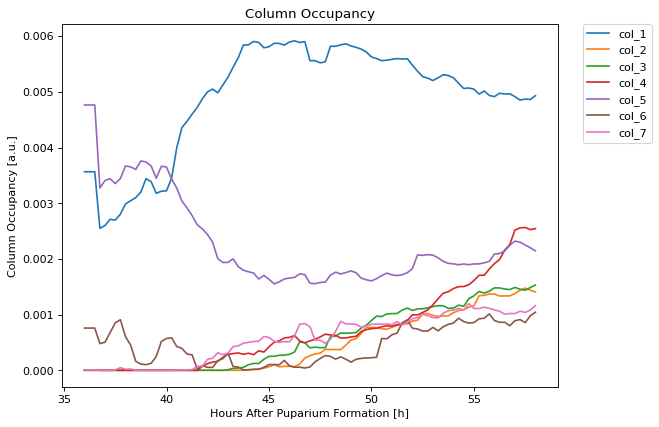

In [11]:
cols_hist = analysis.col_occupancy(stable_n, Cols, nor_fact=nor_fact, 
                                    start_t=start_age, 
                                    plot=True, save=True, 
                                    save_path=save_path, 
                                    save_file='stable_px_'+save_name)

calculating stable volume: 100%|██████████| 89/89 [00:00<00:00, 233.78it/s]


([153473,
  152622,
  150160,
  139655,
  136287,
  172600,
  164729,
  156437,
  150417,
  163854,
  153822,
  148370,
  164317,
  147656,
  141006,
  153954,
  173414,
  158370,
  163188,
  162022,
  159968,
  166710,
  169488,
  180730,
  165456,
  165479,
  174872,
  178813,
  190639,
  186932,
  178082,
  171968,
  185967,
  194476,
  187914,
  176480,
  183344,
  178974,
  184708,
  199519,
  202764,
  202157,
  201771,
  212472,
  187171,
  198760,
  196850,
  202712,
  196122,
  214875,
  210458,
  221000,
  227602,
  223598,
  232957,
  235894,
  238676,
  243062,
  240923,
  234293,
  237655,
  251952,
  255439,
  257930,
  259380,
  272012,
  258697,
  271962,
  271283,
  265114,
  278747,
  273073,
  274160,
  275536,
  286933,
  286733,
  281625,
  296041,
  287410,
  299435,
  291212,
  299480,
  299901,
  298161,
  299708,
  310417,
  304500,
  313228,
  314596],
 [152622,
  152622,
  152622,
  93783,
  93616,
  96772,
  99928,
  106768,
  108594,
  108250,
  104186,
  1

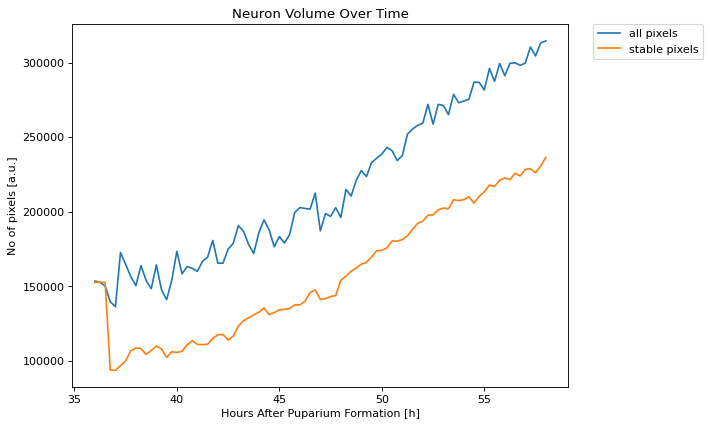

In [6]:
analysis.N_volume(neuron, stable_n, normalize=False, 
                    start_t=36, plot=True, 
                    save=True, save_path=save_path, 
                    save_file='Vol_'+save_name)

calculating tansient: 100%|██████████| 89/89 [00:00<00:00, 113.85it/s]


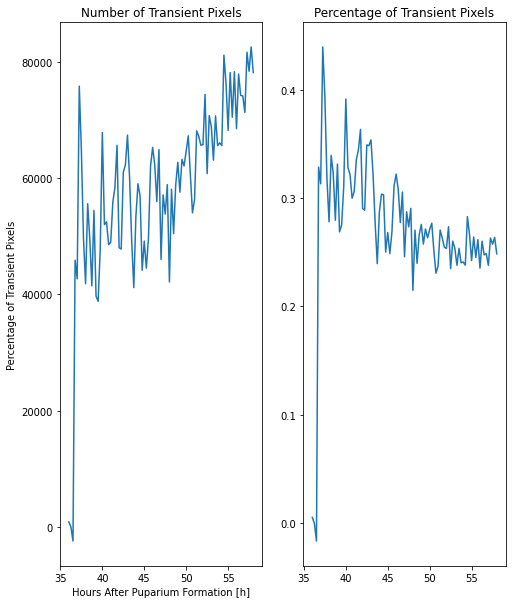

In [5]:
t, l = analysis.trans_px(neuron, stable_n, 
                        start_t=36, plot=True, 
                        save=True, save_path=save_path, 
                        save_file='transient_'+save_name)

In [25]:
img_path = '/home/tli_project/Desktop/Data/T4/neurons/seg2_211113_P36_N1_GFP.tif'
save_path = '/home/tli_project/Desktop/Data/T4/neurons/output/'

##
# start_age = 36.5
stab_limit = 4 #(No. of timepoints for stable branches calculation)
nor_fact = 1 #this is for normalizing Col_occpancy. for now there is no other option, like neuron max

if save_path[-1] != '/':
    save_path += '/'

neuron = tif.imread(img_path)
test = analysis.calculate_DGI((0,0,200,175), neuron)

/home/tli_project/Desktop/TLI_preprocessing/Work_folder/steps/utils/analysis.py:241: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  DGIs = DGIs.append(pd.DataFrame(Info,
/home/tli_project/Desktop/TLI_preprocessing/Work_folder/steps/utils/analysis.py:241: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  DGIs = DGIs.append(pd.DataFrame(Info,
/home/tli_project/Desktop/TLI_preprocessing/Work_folder/steps/utils/analysis.py:241: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  DGIs = DGIs.append(pd.DataFrame(Info,
/home/tli_project/Desktop/TLI_preprocessing/Work_folder/steps/utils/analysis.py:241: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  DGIs =

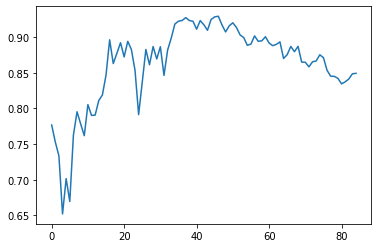

In [26]:
plt.plot(np.arange(len(test['DGI'])),test['DGI'])